In [ ]:
import pandas as pd
rel_df = pd.read_csv("/content/output_file.csv")

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
time_stopwords = [
        "now", "then", "soon", "later", "today", "yesterday",
        "tomorrow", "minute", "hour", "day", "week", "month",
        "year", "past", "future", "ago", "old", "new",
        "early", "late", "season", "seasons", "clock", "watch",
        "watching", "moment", "hourglass", "moment",
        "momentary", "period", "periods", "momentarily",
        "time", "times", "periodic", "oclock", "daily", "weekly",
        "monthly", "yearly", "quarter", "quarterly", "seasonal",
        "annually", "anniversary", "millennium", "epoch", "eras",
        "century", "centuries", "daylight", "date", "dated"
    ]

In [ ]:
unit_stopwords = [
        "percent", "percentage", "percentile", "billions", "billion",
        "millions", "million", "trillions", "trillion",
        "thousands", "thousand", "hundreds", "hundred",
        "dozen", "dozens", "tons", "ton", "kg", "kgs", "lb", "lbs",
        "oz", "ozs", "cm", "cms", "m", "mm", "ft", "ft.", "feet",
        "yards", "yard", "inches", "inch", "gallon", "gallons", "liter",
        "liters", "km", "kms", "mg", "mgs", "mile", "miles", "hour",
        "hours", "minute", "minutes", "second", "seconds", "week",
        "weeks", "month", "months", "year", "years", "day", "days",
        "hourly", "daily", "weekly", "monthly", "yearly", "annual",
        "quarterly", "annually", "anniversary", "millennium", "epoch",
        "eras", "century", "centuries", "time", "times",
        "periodic", "oclock", "daylight", "date", "dated"
    ]

In [ ]:
common_typos = [
        "tion", "ing", "ed", "ly", "es", "er", "able", "ible", "ion",
        "ment", "ful", "ness", "ous", "al", "less", "ive", "ize",
        "y", "s", "ed", "ing", "er", "est", "ly", "en", "ize", "ise",
        "able", "ible", "ion", "al", "ly", "ity", "ate", "fy", "ize","rs","per","cent",
        "might","also","like","say","add","r"

    ]


In [ ]:

stop = stopwords.words('english') + time_stopwords + unit_stopwords + common_typos
rel_df['new_content'] = rel_df['new_content'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [ ]:
def remove_proper_nouns(text):
    doc = nlp(text)
    filtered_text = ' '.join([token.text for token in doc if token.pos_ != 'PROPN'])
    return filtered_text

In [ ]:
rel_df['new_content'] = rel_df['new_content'].apply(remove_proper_nouns)

In [ ]:
import pandas as pd

def extract_ngrams(text, n):
    ngrams_list = []
    for i in range(len(text) - n + 1):
        ngrams_list.append(" ".join(text[i:i + n]))
    return ngrams_list



# Apply the extract_ngrams function on 'new_content' for bigrams (2-word combinations)
rel_df['bigrams'] = rel_df['new_content'].apply(lambda x: extract_ngrams(x.split(), 2))

# Apply the extract_ngrams function on 'new_content' for unigrams (1-word combinations)
rel_df['trigrams'] = rel_df['new_content'].apply(lambda x: extract_ngrams(x.split(), 3))

# Display the result
rel_df.head()


,Headline,Summary,Content,Category,Date_Time,type_cat,Date,assigned_topic,topic_name,new_content,bigrams,trigrams
0,"Deal scene braces for change this year, blockb...",The promise of big returns that kept global ri...,The promise of big returns that kept global ri...,"['Business News', 'News', 'Economy', 'Finance']","Jan 04, 2013, 12:30 AM",Finance,2013-01-04,1,Financial Matters,promise big return keep global risk capital in...,"[promise big, big return, return keep, keep gl...","[promise big return, big return keep, return k..."
1,"A snapshopt of India’s private equity, venture...",ET presents a snapshopt of India’s private equ...,Risk capital investors spooked by the low ret...,"['Business News', 'News', 'Economy', 'Finance']","Jan 04, 2013, 12:30 AM",Finance,2013-01-04,1,Financial Matters,risk capital investor spook low return private...,"[risk capital, capital investor, investor spoo...","[risk capital investor, capital investor spook..."
2,Cautious investment approach by private equity...,PE investors in the last one year have made sm...,Amid challenging business environment strategi...,"['Business News', 'News', 'Economy', 'Finance']","Jan 04, 2013, 10:18 AM",Finance,2013-01-04,1,Financial Matters,amid challenge business environment strategic ...,"[amid challenge, challenge business, business ...","[amid challenge business, challenge business e..."
3,TDS exempted on certain payments to reduce com...,The Revenue Department has exempted tax deduct...,NEW DELHI The Revenue Department has exempte...,"['Business News', 'News', 'Economy', 'Finance']","Jan 04, 2013, 01:34 PM",Finance,2013-01-04,1,Financial Matters,delhi revenue department exempt tax deduction ...,"[delhi revenue, revenue department, department...","[delhi revenue department, revenue department ..."
4,Gross direct tax collection up 8% in April-Dec...,The growth in net collection of wealth tax was...,NEW DELHI Led by healthy growth in personal i...,"['Business News', 'News', 'Economy', 'Finance']","Jan 04, 2013, 02:05 PM",Finance,2013-01-04,1,Financial Matters,delhi lead healthy growth personal income tax ...,"[delhi lead, lead healthy, healthy growth, gro...","[delhi lead healthy, lead healthy growth, heal..."


In [ ]:
rel_df.head()

,Headline,Summary,Content,Category,Date_Time,type_cat,Date,assigned_topic,topic_name,new_content,bigrams,trigrams
0,"Deal scene braces for change this year, blockb...",The promise of big returns that kept global ri...,The promise of big returns that kept global ri...,"['Business News', 'News', 'Economy', 'Finance']","Jan 04, 2013, 12:30 AM",Finance,2013-01-04,1,Financial Matters,promise big return keep global risk capital in...,"[promise big, big return, return keep, keep gl...","[promise big return, big return keep, return k..."
1,"A snapshopt of India’s private equity, venture...",ET presents a snapshopt of India’s private equ...,Risk capital investors spooked by the low ret...,"['Business News', 'News', 'Economy', 'Finance']","Jan 04, 2013, 12:30 AM",Finance,2013-01-04,1,Financial Matters,risk capital investor spook low return private...,"[risk capital, capital investor, investor spoo...","[risk capital investor, capital investor spook..."
2,Cautious investment approach by private equity...,PE investors in the last one year have made sm...,Amid challenging business environment strategi...,"['Business News', 'News', 'Economy', 'Finance']","Jan 04, 2013, 10:18 AM",Finance,2013-01-04,1,Financial Matters,amid challenge business environment strategic ...,"[amid challenge, challenge business, business ...","[amid challenge business, challenge business e..."
3,TDS exempted on certain payments to reduce com...,The Revenue Department has exempted tax deduct...,NEW DELHI The Revenue Department has exempte...,"['Business News', 'News', 'Economy', 'Finance']","Jan 04, 2013, 01:34 PM",Finance,2013-01-04,1,Financial Matters,delhi revenue department exempt tax deduction ...,"[delhi revenue, revenue department, department...","[delhi revenue department, revenue department ..."
4,Gross direct tax collection up 8% in April-Dec...,The growth in net collection of wealth tax was...,NEW DELHI Led by healthy growth in personal i...,"['Business News', 'News', 'Economy', 'Finance']","Jan 04, 2013, 02:05 PM",Finance,2013-01-04,1,Financial Matters,delhi lead healthy growth personal income tax ...,"[delhi lead, lead healthy, healthy growth, gro...","[delhi lead healthy, lead healthy growth, heal..."


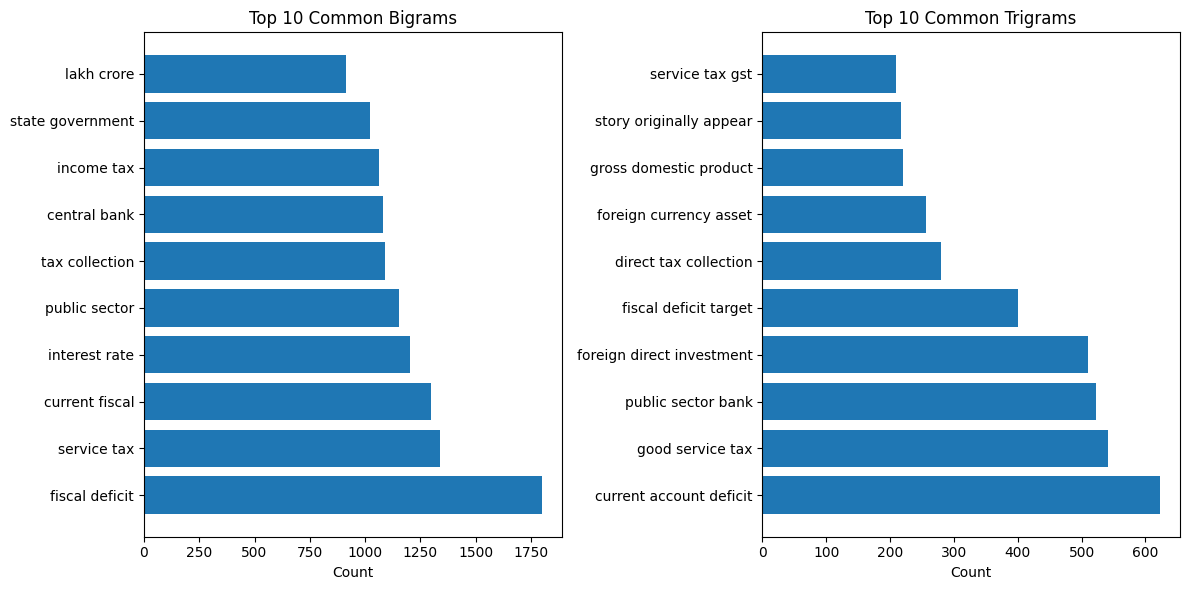

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter


# Function to flatten lists of ngrams
def flatten_ngrams(ngrams_list):
    return [ngram for sublist in ngrams_list for ngram in sublist]

# Flatten bigrams and trigrams lists
all_bigrams = flatten_ngrams(rel_df['bigrams'])
all_trigrams = flatten_ngrams(rel_df['trigrams'])

# Calculate the most common bigrams and trigrams
common_bigrams = Counter(all_bigrams).most_common(10)
common_trigrams = Counter(all_trigrams).most_common(10)

# Convert to DataFrame for plotting
common_bigrams_df = pd.DataFrame(common_bigrams, columns=['Bigram', 'Count'])
common_trigrams_df = pd.DataFrame(common_trigrams, columns=['Trigram', 'Count'])

# Plot bar plots
plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.barh(common_bigrams_df['Bigram'], common_bigrams_df['Count'])
plt.title('Top 10 Common Bigrams')
plt.xlabel('Count')

plt.subplot(122)
plt.barh(common_trigrams_df['Trigram'], common_trigrams_df['Count'])
plt.title('Top 10 Common Trigrams')
plt.xlabel('Count')

plt.tight_layout()
plt.show()


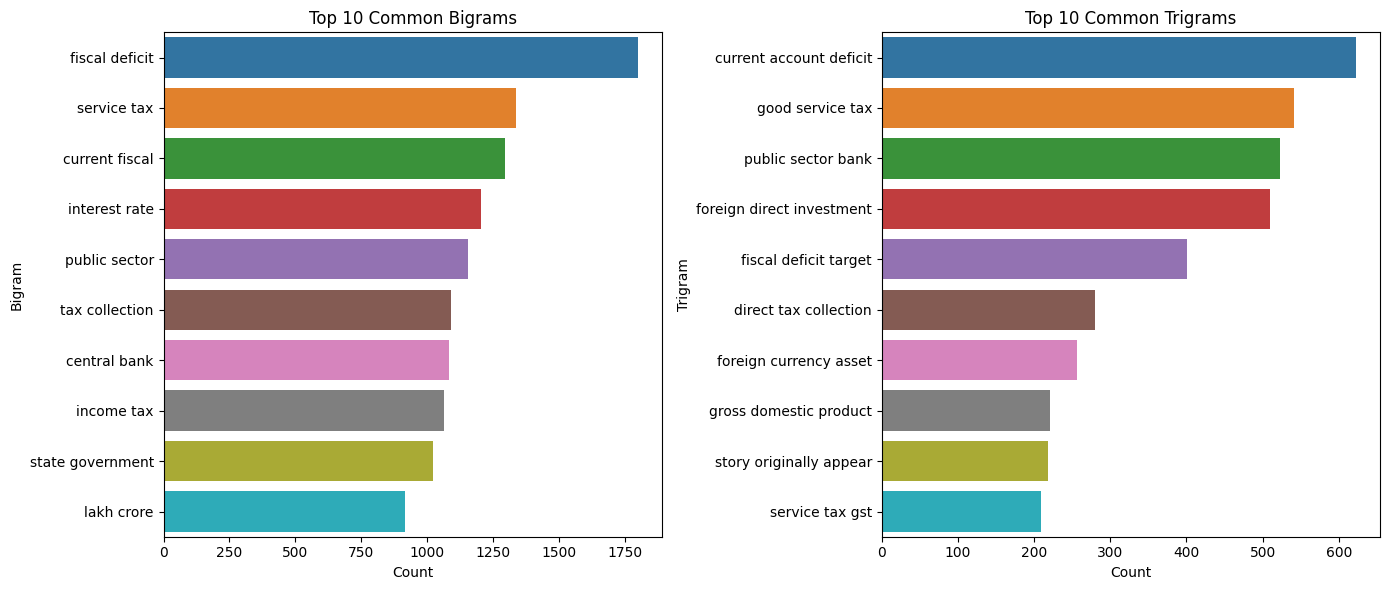

In [ ]:
import seaborn as sns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Bar plot for common bigrams
sns.barplot(x='Count', y='Bigram', data=common_bigrams_df, ax=axes[0])
axes[0].set_title('Top 10 Common Bigrams')
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Bigram')

# Bar plot for common trigrams
sns.barplot(x='Count', y='Trigram', data=common_trigrams_df, ax=axes[1])
axes[1].set_title('Top 10 Common Trigrams')
axes[1].set_xlabel('Count')
axes[1].set_ylabel('Trigram')

plt.tight_layout()
plt.show()

In [ ]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
import pandas as pd
# Initialize the Sentiment Intensity Analyzer (VADER)
vader_analyzer = SentimentIntensityAnalyzer()

# Assuming you have a DataFrame named 'rel_df' with a 'new_content' column
sentiment_scores = rel_df['new_content'].apply(lambda x: vader_analyzer.polarity_scores(x))

# Calculate the 'compound' score using the provided formula
rel_df['compound'] = [(score['pos'] - score['neg']) / (score['pos'] + score['neg']) if (score['pos'] + score['neg']) != 0 else 0 for score in sentiment_scores]

# Classify sentiments based on the 'compound' score
rel_df['sentiment'] = rel_df['compound'].apply(lambda x: 'positive' if x > 0.05 else 'negative' if x < -0.05 else 'neutral')


positive    6951
negative    1319
neutral      471
Name: sentiment, dtype: int64


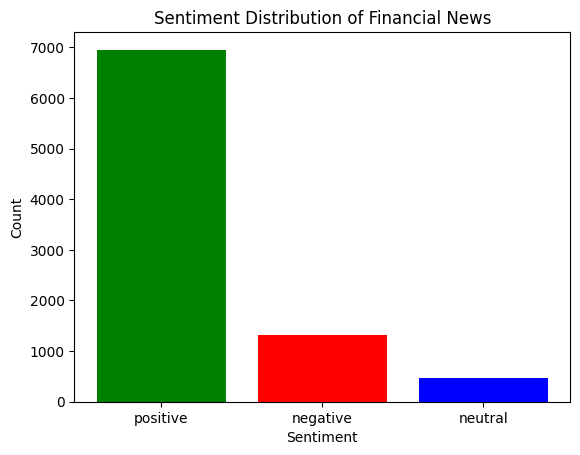

In [ ]:

# Display sentiment distribution
sentiment_counts = rel_df['sentiment'].value_counts()
print(sentiment_counts)

# Plot sentiment distribution
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['green', 'red', 'blue'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution of Financial News')
plt.show()


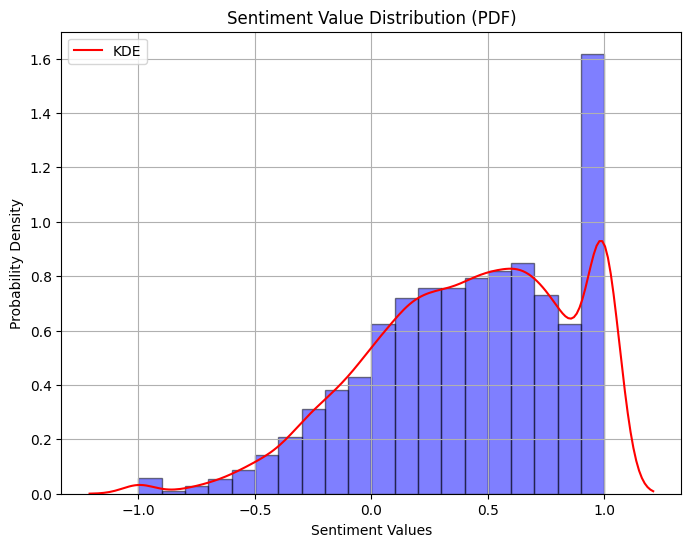

In [ ]:
sentiment_values = rel_df['compound']

# Create a PDF plot
plt.figure(figsize=(8, 6))  # Set the figure size
plt.hist(sentiment_values, bins=20, density=True, alpha=0.5, color='b', edgecolor='k')  # Histogram
sns.kdeplot(sentiment_values, color='r', label='KDE')  # Kernel Density Estimate (KDE) plot
plt.xlabel('Sentiment Values')
plt.ylabel('Probability Density')
plt.title('Sentiment Value Distribution (PDF)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import re

# Loughran and McDonald Sentiment Word Lists (https://sraf.nd.edu/textual-analysis/resources/)
lmdict = {'Negative': ['abandon', 'abandoned', 'abandoning', 'abandonment', 'abandonments', 'abandons', 'abdicated',
                       'abdicates', 'abdicating', 'abdication', 'abdications', 'aberrant', 'aberration', 'aberrational',
                       'aberrations', 'abetting', 'abnormal', 'abnormalities', 'abnormality', 'abnormally', 'abolish',
                       'abolished', 'abolishes', 'abolishing', 'abrogate', 'abrogated', 'abrogates', 'abrogating',
                       'abrogation', 'abrogations', 'abrupt', 'abruptly', 'abruptness', 'absence', 'absences',
                       'absenteeism', 'abuse', 'abused', 'abuses', 'abusing', 'abusive', 'abusively', 'abusiveness',
                       'accident', 'accidental', 'accidentally', 'accidents', 'accusation', 'accusations', 'accuse',
                       'accused', 'accuses', 'accusing', 'acquiesce', 'acquiesced', 'acquiesces', 'acquiescing',
                       'acquit', 'acquits', 'acquittal', 'acquittals', 'acquitted', 'acquitting', 'adulterate',
                       'adulterated', 'adulterating', 'adulteration', 'adulterations', 'adversarial', 'adversaries',
                       'adversary', 'adverse', 'adversely', 'adversities', 'adversity', 'aftermath', 'aftermaths',
                       'against', 'aggravate', 'aggravated', 'aggravates', 'aggravating', 'aggravation', 'aggravations',
                       'alerted', 'alerting', 'alienate', 'alienated', 'alienates', 'alienating', 'alienation',
                       'alienations', 'allegation', 'allegations', 'allege', 'alleged', 'allegedly', 'alleges',
                       'alleging', 'annoy', 'annoyance', 'annoyances', 'annoyed', 'annoying', 'annoys', 'annul',
                       'annulled', 'annulling', 'annulment', 'annulments', 'annuls', 'anomalies', 'anomalous',
                       'anomalously', 'anomaly', 'anticompetitive', 'antitrust', 'argue', 'argued', 'arguing',
                       'argument', 'argumentative', 'arguments', 'arrearage', 'arrearages', 'arrears', 'arrest',
                       'arrested', 'arrests', 'artificially', 'assault', 'assaulted', 'assaulting', 'assaults',
                       'assertions', 'attrition', 'aversely', 'backdating', 'bad', 'bail', 'bailout', 'balk', 'balked',
                       'bankrupt', 'bankruptcies', 'bankruptcy', 'bankrupted', 'bankrupting', 'bankrupts', 'bans',
                       'barred', 'barrier', 'barriers', 'bottleneck', 'bottlenecks', 'boycott', 'boycotted',
                       'boycotting', 'boycotts', 'breach', 'breached', 'breaches', 'breaching', 'break', 'breakage',
                       'breakages', 'breakdown', 'breakdowns', 'breaking', 'breaks', 'bribe', 'bribed', 'briberies',
                       'bribery', 'bribes', 'bribing', 'bridge', 'broken', 'burden', 'burdened', 'burdening', 'burdens',
                       'burdensome', 'burned', 'calamities', 'calamitous', 'calamity', 'cancel', 'canceled',
                       'canceling', 'cancellation', 'cancellations', 'cancelled', 'cancelling', 'cancels', 'careless',
                       'carelessly', 'carelessness', 'catastrophe', 'catastrophes', 'catastrophic', 'catastrophically',
                       'caution', 'cautionary', 'cautioned', 'cautioning', 'cautions', 'cease', 'ceased', 'ceases',
                       'ceasing', 'censure', 'censured', 'censures', 'censuring', 'challenge', 'challenged',
                       'challenges', 'challenging', 'chargeoffs', 'circumvent', 'circumvented', 'circumventing',
                       'circumvention', 'circumventions', 'circumvents', 'claiming', 'claims', 'clawback', 'closed',
                       'closeout', 'closeouts', 'closing', 'closings', 'closure', 'closures', 'coerce', 'coerced',
                       'coerces', 'coercing', 'coercion', 'coercive', 'collapse', 'collapsed', 'collapses',
                       'collapsing', 'collision', 'collisions', 'collude', 'colluded', 'colludes', 'colluding',
                       'collusion', 'collusions', 'collusive', 'complain', 'complained', 'complaining', 'complains',
                       'complaint', 'complaints', 'complicate', 'complicated', 'complicates', 'complicating',
                       'complication', 'complications', 'compulsion', 'concealed', 'concealing', 'concede', 'conceded',
                       'concedes', 'conceding', 'concern', 'concerned', 'concerns', 'conciliating', 'conciliation',
                       'conciliations', 'condemn', 'condemnation', 'condemnations', 'condemned', 'condemning',
                       'condemns', 'condone', 'condoned', 'confess', 'confessed', 'confesses', 'confessing',
                       'confession', 'confine', 'confined', 'confinement', 'confinements', 'confines', 'confining',
                       'confiscate', 'confiscated', 'confiscates', 'confiscating', 'confiscation', 'confiscations',
                       'conflict', 'conflicted', 'conflicting', 'conflicts', 'confront', 'confrontation',
                       'confrontational', 'confrontations', 'confronted', 'confronting', 'confronts', 'confuse',
                       'confused', 'confuses', 'confusing', 'confusingly', 'confusion', 'conspiracies', 'conspiracy',
                       'conspirator', 'conspiratorial', 'conspirators', 'conspire', 'conspired', 'conspires',
                       'conspiring', 'contempt', 'contend', 'contended', 'contending', 'contends', 'contention',
                       'contentions', 'contentious', 'contentiously', 'contested', 'contesting', 'contraction',
                       'contractions', 'contradict', 'contradicted', 'contradicting', 'contradiction', 'contradictions',
                       'contradictory', 'contradicts', 'contrary', 'controversial', 'controversies', 'controversy',
                       'convict', 'convicted', 'convicting', 'conviction', 'convictions', 'corrected', 'correcting',
                       'correction', 'corrections', 'corrects', 'corrupt', 'corrupted', 'corrupting', 'corruption',
                       'corruptions', 'corruptly', 'corruptness', 'costly', 'counterclaim', 'counterclaimed',
                       'counterclaiming', 'counterclaims', 'counterfeit', 'counterfeited', 'counterfeiter',
                       'counterfeiters', 'counterfeiting', 'counterfeits', 'countermeasure', 'countermeasures', 'crime',
                       'crimes', 'criminal', 'criminally', 'criminals', 'crises', 'crisis', 'critical', 'critically',
                       'criticism', 'criticisms', 'criticize', 'criticized', 'criticizes', 'criticizing', 'crucial',
                       'crucially', 'culpability', 'culpable', 'culpably', 'cumbersome', 'curtail', 'curtailed',
                       'curtailing', 'curtailment', 'curtailments', 'curtails', 'cut', 'cutback', 'cutbacks',
                       'cyberattack', 'cyberattacks', 'cyberbullying', 'cybercrime', 'cybercrimes', 'cybercriminal',
                       'cybercriminals', 'damage', 'damaged', 'damages', 'damaging', 'dampen', 'dampened', 'danger',
                       'dangerous', 'dangerously', 'dangers', 'deadlock', 'deadlocked', 'deadlocking', 'deadlocks',
                       'deadweight', 'deadweights', 'debarment', 'debarments', 'debarred', 'deceased', 'deceit',
                       'deceitful', 'deceitfulness', 'deceive', 'deceived', 'deceives', 'deceiving', 'deception',
                       'deceptions', 'deceptive', 'deceptively', 'decline', 'declined', 'declines', 'declining',
                       'deface', 'defaced', 'defacement', 'defamation', 'defamations', 'defamatory', 'defame',
                       'defamed', 'defames', 'defaming', 'default', 'defaulted', 'defaulting', 'defaults', 'defeat',
                       'defeated', 'defeating', 'defeats', 'defect', 'defective', 'defects', 'defend', 'defendant',
                       'defendants', 'defended', 'defending', 'defends', 'defensive', 'defer', 'deficiencies',
                       'deficiency', 'deficient', 'deficit', 'deficits', 'defraud', 'defrauded', 'defrauding',
                       'defrauds', 'defunct', 'degradation', 'degradations', 'degrade', 'degraded', 'degrades',
                       'degrading', 'delay', 'delayed', 'delaying', 'delays', 'deleterious', 'deliberate',
                       'deliberated', 'deliberately', 'delinquencies', 'delinquency', 'delinquent', 'delinquently',
                       'delinquents', 'delist', 'delisted', 'delisting', 'delists', 'demise', 'demised', 'demises',
                       'demising', 'demolish', 'demolished', 'demolishes', 'demolishing', 'demolition', 'demolitions',
                       'demote', 'demoted', 'demotes', 'demoting', 'demotion', 'demotions', 'denial', 'denials',
                       'denied', 'denies', 'denigrate', 'denigrated', 'denigrates', 'denigrating', 'denigration',
                       'deny', 'denying', 'deplete', 'depleted', 'depletes', 'depleting', 'depletion', 'depletions',
                       'deprecation', 'depress', 'depressed', 'depresses', 'depressing', 'deprivation', 'deprive',
                       'deprived', 'deprives', 'depriving', 'derelict', 'dereliction', 'derogatory', 'destabilization',
                       'destabilize', 'destabilized', 'destabilizing', 'destroy', 'destroyed', 'destroying', 'destroys',
                       'destruction', 'destructive', 'detain', 'detained', 'detention', 'detentions', 'deter',
                       'deteriorate', 'deteriorated', 'deteriorates', 'deteriorating', 'deterioration',
                       'deteriorations', 'deterred', 'deterrence', 'deterrences', 'deterrent', 'deterrents',
                       'deterring', 'deters', 'detract', 'detracted', 'detracting', 'detriment', 'detrimental',
                       'detrimentally', 'detriments', 'devalue', 'devalued', 'devalues', 'devaluing', 'devastate',
                       'devastated', 'devastating', 'devastation', 'deviate', 'deviated', 'deviates', 'deviating',
                       'deviation', 'deviations', 'devolve', 'devolved', 'devolves', 'devolving', 'difficult',
                       'difficulties', 'difficultly', 'difficulty', 'diminish', 'diminished', 'diminishes',
                       'diminishing', 'diminution', 'disadvantage', 'disadvantaged', 'disadvantageous', 'disadvantages',
                       'disaffiliation', 'disagree', 'disagreeable', 'disagreed', 'disagreeing', 'disagreement',
                       'disagreements', 'disagrees', 'disallow', 'disallowance', 'disallowances', 'disallowed',
                       'disallowing', 'disallows', 'disappear', 'disappearance', 'disappearances', 'disappeared',
                       'disappearing', 'disappears', 'disappoint', 'disappointed', 'disappointing', 'disappointingly',
                       'disappointment', 'disappointments', 'disappoints', 'disapproval', 'disapprovals', 'disapprove',
                       'disapproved', 'disapproves', 'disapproving', 'disassociates', 'disassociating',
                       'disassociation', 'disassociations', 'disaster', 'disasters', 'disastrous', 'disastrously',
                       'disavow', 'disavowal', 'disavowed', 'disavowing', 'disavows', 'disciplinary', 'disclaim',
                       'disclaimed', 'disclaimer', 'disclaimers', 'disclaiming', 'disclaims', 'disclose', 'disclosed',
                       'discloses', 'disclosing', 'discontinuance', 'discontinuances', 'discontinuation',
                       'discontinuations', 'discontinue', 'discontinued', 'discontinues', 'discontinuing', 'discourage',
                       'discouraged', 'discourages', 'discouraging', 'discredit', 'discredited', 'discrediting',
                       'discredits', 'discrepancies', 'discrepancy', 'disfavor', 'disfavored', 'disfavoring',
                       'disfavors', 'disgorge', 'disgorged', 'disgorgement', 'disgorgements', 'disgorges', 'disgorging',
                       'disgrace', 'disgraceful', 'disgracefully', 'dishonest', 'dishonestly', 'dishonesty', 'dishonor',
                       'dishonorable', 'dishonorably', 'dishonored', 'dishonoring', 'dishonors', 'disincentives',
                       'disinterested', 'disinterestedly', 'disinterestedness', 'disloyal', 'disloyally', 'disloyalty',
                       'dismal', 'dismally', 'dismiss', 'dismissal', 'dismissals', 'dismissed', 'dismisses',
                       'dismissing', 'disorderly', 'disparage', 'disparaged', 'disparagement', 'disparagements',
                       'disparages', 'disparaging', 'disparagingly', 'disparities', 'disparity', 'displace',
                       'displaced', 'displacement', 'displacements', 'displaces', 'displacing', 'dispose', 'dispossess',
                       'dispossessed', 'dispossesses', 'dispossessing', 'disproportion', 'disproportional',
                       'disproportionate', 'disproportionately', 'dispute', 'disputed', 'disputes', 'disputing',
                       'disqualification', 'disqualifications', 'disqualified', 'disqualifies', 'disqualify',
                       'disqualifying', 'disregard', 'disregarded', 'disregarding', 'disregards', 'disreputable',
                       'disrepute', 'disrupt', 'disrupted', 'disrupting', 'disruption', 'disruptions', 'disruptive',
                       'disrupts', 'dissatisfaction', 'dissatisfied', 'dissent', 'dissented', 'dissenter', 'dissenters',
                       'dissenting', 'dissents', 'dissident', 'dissidents', 'dissolution', 'dissolutions', 'distort',
                       'distorted', 'distorting', 'distortion', 'distortions', 'distorts', 'distract', 'distracted',
                       'distracting', 'distraction', 'distractions', 'distracts', 'distress', 'distressed', 'disturb',
                       'disturbance', 'disturbances', 'disturbed', 'disturbing', 'disturbs', 'diversion', 'divert',
                       'diverted', 'diverting', 'diverts', 'divest', 'divested', 'divesting', 'divestiture',
                       'divestitures', 'divestment', 'divestments', 'divests', 'divorce', 'divorced', 'divulge',
                       'divulged', 'divulges', 'divulging', 'doubt', 'doubted', 'doubtful', 'doubts', 'downgrade',
                       'downgraded', 'downgrades', 'downgrading', 'downsize', 'downsized', 'downsizes', 'downsizing',
                       'downsizings', 'downtime', 'downtimes', 'downturn', 'downturns', 'downward', 'downwards', 'drag',
                       'drastic', 'drastically', 'drawback', 'drawbacks', 'drop', 'dropped', 'drought', 'droughts', 'duress',
                       'dysfunction', 'dysfunctional', 'dysfunctions', 'easing', 'egregious', 'egregiously', 'embargo',
                       'embargoed', 'embargoes', 'embargoing', 'embarrass', 'embarrassed', 'embarrasses',
                       'embarrassing', 'embarrassment', 'embarrassments', 'embezzle', 'embezzled', 'embezzlement',
                       'embezzlements', 'embezzler', 'embezzles', 'embezzling', 'encroach', 'encroached', 'encroaches',
                       'encroaching', 'encroachment', 'encroachments', 'encumber', 'encumbered', 'encumbering',
                       'encumbers', 'encumbrance', 'encumbrances', 'endanger', 'endangered', 'endangering',
                       'endangerment', 'endangers', 'enjoin', 'enjoined', 'enjoining', 'enjoins', 'erode', 'eroded',
                       'erodes', 'eroding', 'erosion', 'erratic', 'erratically', 'erred', 'erring', 'erroneous',
                       'erroneously', 'error', 'errors', 'errs', 'escalate', 'escalated', 'escalates', 'escalating',
                       'evade', 'evaded', 'evades', 'evading', 'evasion', 'evasions', 'evasive', 'evict', 'evicted',
                       'evicting', 'eviction', 'evictions', 'evicts', 'exacerbate', 'exacerbated', 'exacerbates',
                       'exacerbating', 'exacerbation', 'exacerbations', 'exaggerate', 'exaggerated', 'exaggerates',
                       'exaggerating', 'exaggeration', 'excessive', 'excessively', 'exculpate', 'exculpated',
                       'exculpates', 'exculpating', 'exculpation', 'exculpations', 'exculpatory', 'exonerate',
                       'exonerated', 'exonerates', 'exonerating', 'exoneration', 'exonerations', 'exploit',
                       'exploitation', 'exploitations', 'exploitative', 'exploited', 'exploiting', 'exploits', 'expose',
                       'exposed', 'exposes', 'exposing', 'expropriate', 'expropriated', 'expropriates', 'expropriating',
                       'expropriation', 'expropriations', 'expulsion', 'expulsions', 'extenuating', 'fail', 'failed',
                       'failing', 'failings', 'fails', 'failure', 'failures', 'fallout', 'false', 'falsely',
                       'falsification', 'falsifications', 'falsified', 'falsifies', 'falsify', 'falsifying', 'falsity',
                       'fatalities', 'fatality', 'fatally', 'fault', 'faulted', 'faults', 'faulty', 'fear', 'fears',
                       'felonies', 'felonious', 'felony', 'fictitious', 'fined', 'fines', 'fired', 'firing', 'flaw',
                       'flawed', 'flaws', 'forbid', 'forbidden', 'forbidding', 'forbids', 'force', 'forced', 'forcing',
                       'foreclose', 'foreclosed', 'forecloses', 'foreclosing', 'foreclosure', 'foreclosures', 'forego',
                       'foregoes', 'foregone', 'forestall', 'forestalled', 'forestalling', 'forestalls', 'forfeit',
                       'forfeited', 'forfeiting', 'forfeits', 'forfeiture', 'forfeitures', 'forgers', 'forgery',
                       'fraud', 'frauds', 'fraudulence', 'fraudulent', 'fraudulently', 'frivolous', 'frivolously',
                       'frustrate', 'frustrated', 'frustrates', 'frustrating', 'frustratingly', 'frustration',
                       'frustrations', 'fugitive', 'fugitives', 'gratuitous', 'gratuitously', 'grievance', 'grievances',
                       'grossly', 'groundless', 'guilty', 'halt', 'halted', 'hamper', 'hampered', 'hampering',
                       'hampers', 'harass', 'harassed', 'harassing', 'harassment', 'hardship', 'hardships', 'harm',
                       'harmed', 'harmful', 'harmfully', 'harming', 'harms', 'harsh', 'harsher', 'harshest', 'harshly',
                       'harshness', 'hazard', 'hazardous', 'hazards', 'hinder', 'hindered', 'hindering', 'hinders',
                       'hindrance', 'hindrances', 'hostile', 'hostility', 'hurt', 'hurting', 'idle', 'idled', 'idling',
                       'ignore', 'ignored', 'ignores', 'ignoring', 'ill', 'illegal', 'illegalities', 'illegality',
                       'illegally', 'illegible', 'illicit', 'illicitly', 'illiquid', 'illiquidity', 'imbalance',
                       'imbalances', 'immature', 'immoral', 'impair', 'impaired', 'impairing', 'impairment',
                       'impairments', 'impairs', 'impasse', 'impasses', 'impede', 'impeded', 'impedes', 'impediment',
                       'impediments', 'impeding', 'impending', 'imperative', 'imperfection', 'imperfections', 'imperil',
                       'impermissible', 'implicate', 'implicated', 'implicates', 'implicating', 'impossibility',
                       'impossible', 'impound', 'impounded', 'impounding', 'impounds', 'impracticable', 'impractical',
                       'impracticalities', 'impracticality', 'imprisonment', 'improper', 'improperly', 'improprieties',
                       'impropriety', 'imprudent', 'imprudently', 'inability', 'inaccessible', 'inaccuracies',
                       'inaccuracy', 'inaccurate', 'inaccurately', 'inaction', 'inactions', 'inactivate', 'inactivated',
                       'inactivates', 'inactivating', 'inactivation', 'inactivations', 'inactivity', 'inadequacies',
                       'inadequacy', 'inadequate', 'inadequately', 'inadvertent', 'inadvertently', 'inadvisability',
                       'inadvisable', 'inappropriate', 'inappropriately', 'inattention', 'incapable', 'incapacitated',
                       'incapacity', 'incarcerate', 'incarcerated', 'incarcerates', 'incarcerating', 'incarceration',
                       'incarcerations', 'incidence', 'incidences', 'incident', 'incidents', 'incompatibilities',
                       'incompatibility', 'incompatible', 'incompetence', 'incompetency', 'incompetent',
                       'incompetently', 'incompetents', 'incomplete', 'incompletely', 'incompleteness', 'inconclusive',
                       'inconsistencies', 'inconsistency', 'inconsistent', 'inconsistently', 'inconvenience',
                       'inconveniences', 'inconvenient', 'incorrect', 'incorrectly', 'incorrectness', 'indecency',
                       'indecent', 'indefeasible', 'indefeasibly', 'indict', 'indictable', 'indicted', 'indicting',
                       'indictment', 'indictments', 'ineffective', 'ineffectively', 'ineffectiveness', 'inefficiencies',
                       'inefficiency', 'inefficient', 'inefficiently', 'ineligibility', 'ineligible', 'inequitable',
                       'inequitably', 'inequities', 'inequity', 'inevitable', 'inexperience', 'inexperienced',
                       'inferior', 'inflicted', 'infraction', 'infractions', 'infringe', 'infringed', 'infringement',
                       'infringements', 'infringes', 'infringing', 'inhibited', 'inimical', 'injunction', 'injunctions',
                       'injure', 'injured', 'injures', 'injuries', 'injuring', 'injurious', 'injury', 'inordinate',
                       'inordinately', 'inquiry', 'insecure', 'insensitive', 'insolvencies', 'insolvency', 'insolvent',
                       'instability', 'insubordination', 'insufficiency', 'insufficient', 'insufficiently',
                       'insurrection', 'insurrections', 'intentional', 'interfere', 'interfered', 'interference',
                       'interferences', 'interferes', 'interfering', 'intermittent', 'intermittently', 'interrupt',
                       'interrupted', 'interrupting', 'interruption', 'interruptions', 'interrupts', 'intimidation',
                       'intrusion', 'invalid', 'invalidate', 'invalidated', 'invalidates', 'invalidating',
                       'invalidation', 'invalidity', 'investigate', 'investigated', 'investigates', 'investigating',
                       'investigation', 'investigations', 'involuntarily', 'involuntary', 'irreconcilable',
                       'irreconcilably', 'irrecoverable', 'irrecoverably', 'irregular', 'irregularities',
                       'irregularity', 'irregularly', 'irreparable', 'irreparably', 'irreversible', 'jeopardize',
                       'jeopardized', 'justifiable', 'kickback', 'kickbacks', 'knowingly', 'lack', 'lacked', 'lacking',
                       'lackluster', 'lacks', 'lag', 'lagged', 'lagging', 'lags', 'lapse', 'lapsed', 'lapses',
                        'lapsing', 'late', 'laundering', 'layoff', 'layoffs', 'lie', 'limitation', 'limitations',
                       'lingering', 'liquidate', 'liquidated', 'liquidates', 'liquidating', 'liquidation',
                       'liquidations', 'liquidator', 'liquidators', 'litigant', 'litigants', 'litigate', 'litigated',
                       'litigates', 'litigating', 'litigation', 'litigations', 'lockout', 'lockouts', 'lose', 'loses',
                       'losing', 'loss', 'losses', 'lost', 'lying', 'malfeasance', 'malfunction', 'malfunctioned',
                       'malfunctioning', 'malfunctions', 'malice', 'malicious', 'maliciously', 'malpractice',
                       'manipulate', 'manipulated', 'manipulates', 'manipulating', 'manipulation', 'manipulations',
                       'manipulative', 'markdown', 'markdowns', 'misapplication', 'misapplications', 'misapplied',
                       'misapplies', 'misapply', 'misapplying', 'misappropriate', 'misappropriated', 'misappropriates',
                       'misappropriating', 'misappropriation', 'misappropriations', 'misbranded', 'miscalculate',
                       'miscalculated', 'miscalculates', 'miscalculating', 'miscalculation', 'miscalculations',
                       'mischaracterization', 'mischief', 'misclassification', 'misclassifications', 'misclassified',
                       'misclassify', 'miscommunication', 'misconduct', 'misdated', 'misdemeanor', 'misdemeanors',
                       'misdirected', 'mishandle', 'mishandled', 'mishandles', 'mishandling', 'misinform',
                       'misinformation', 'misinformed', 'misinforming', 'misinforms', 'misinterpret',
                       'misinterpretation', 'misinterpretations', 'misinterpreted', 'misinterpreting', 'misinterprets',
                       'misjudge', 'misjudged', 'misjudges', 'misjudging', 'misjudgment', 'misjudgments', 'mislabel',
                       'mislabeled', 'mislabeling', 'mislabelled', 'mislabels', 'mislead', 'misleading', 'misleadingly',
                       'misleads', 'misled', 'mismanage', 'mismanaged', 'mismanagement', 'mismanages', 'mismanaging',
                       'mismatch', 'mismatched', 'mismatches', 'mismatching', 'misplaced', 'misprice', 'mispricing',
                       'mispricings', 'misrepresent', 'misrepresentation', 'misrepresentations', 'misrepresented',
                       'misrepresenting', 'misrepresents', 'miss', 'missed', 'misses', 'misstate', 'misstated',
                       'misstatement', 'misstatements', 'misstates', 'misstating', 'misstep', 'missteps', 'mistake',
                       'mistaken', 'mistakenly', 'mistakes', 'mistaking', 'mistrial', 'mistrials', 'misunderstand',
                       'misunderstanding', 'misunderstandings', 'misunderstood', 'misuse', 'misused', 'misuses',
                       'misusing', 'monopolistic', 'monopolists', 'monopolization', 'monopolize', 'monopolized',
                       'monopolizes', 'monopolizing', 'monopoly', 'moratoria', 'moratorium', 'moratoriums',
                       'mothballed', 'mothballing', 'negative', 'negatively', 'negatives', 'neglect', 'neglected',
                       'neglectful', 'neglecting', 'neglects', 'negligence', 'negligences', 'negligent', 'negligently',
                       'nonattainment', 'noncompetitive', 'noncompliance', 'noncompliances', 'noncompliant',
                       'noncomplying', 'nonconforming', 'nonconformities', 'nonconformity', 'nondisclosure',
                       'nonfunctional', 'nonpayment', 'nonpayments', 'nonperformance', 'nonperformances',
                       'nonperforming', 'nonproducing', 'nonproductive', 'nonrecoverable', 'nonrenewal', 'nuisance',
                       'nuisances', 'nullification', 'nullifications', 'nullified', 'nullifies', 'nullify',
                       'nullifying', 'objected', 'objecting', 'objection', 'objectionable', 'objectionably',
                       'objections', 'obscene', 'obscenity', 'obsolescence', 'obsolete', 'obstacle', 'obstacles',
                       'obstruct', 'obstructed', 'obstructing', 'obstruction', 'obstructions', 'offence', 'offences',
                       'offend', 'offended', 'offender', 'offenders', 'offending', 'offends', 'omission', 'omissions',
                       'omit', 'omits', 'omitted', 'omitting', 'onerous', 'opportunistic', 'opportunistically',
                       'oppose', 'opposed', 'opposes', 'opposing', 'opposition', 'oppositions', 'outage', 'outages',
                       'outdated', 'outmoded', 'overage', 'overages', 'overbuild', 'overbuilding', 'overbuilds',
                       'overbuilt', 'overburden', 'overburdened', 'overburdening', 'overcapacities', 'overcapacity',
                       'overcharge', 'overcharged', 'overcharges', 'overcharging', 'overcome', 'overcomes',
                       'overcoming', 'overdue', 'overestimate', 'overestimated', 'overestimates', 'overestimating',
                       'overestimation', 'overestimations', 'overload', 'overloaded', 'overloading', 'overloads',
                       'overlook', 'overlooked', 'overlooking', 'overlooks', 'overpaid', 'overpayment', 'overpayments',
                       'overproduced', 'overproduces', 'overproducing', 'overproduction', 'overrun', 'overrunning',
                       'overruns', 'overshadow', 'overshadowed', 'overshadowing', 'overshadows', 'overstate',
                       'overstated', 'overstatement', 'overstatements', 'overstates', 'overstating', 'oversupplied',
                       'oversupplies', 'oversupply', 'oversupplying', 'overtly', 'overturn', 'overturned',
                       'overturning', 'overturns', 'overvalue', 'overvalued', 'overvaluing', 'panic', 'panics',
                       'penalize', 'penalized', 'penalizes', 'penalizing', 'penalties', 'penalty', 'peril', 'perils',
                       'perjury', 'perpetrate', 'perpetrated', 'perpetrates', 'perpetrating', 'perpetration', 'persist',
                       'persisted', 'persistence', 'persistent', 'persistently', 'persisting', 'persists', 'pervasive',
                       'pervasively', 'pervasiveness', 'petty', 'picket', 'picketed', 'picketing', 'plaintiff',
                       'plaintiffs', 'plea', 'plead', 'pleaded', 'pleading', 'pleadings', 'pleads', 'pleas', 'pled',
                       'poor', 'poorly', 'poses', 'posing', 'postpone', 'postponed', 'postponement', 'postponements',
                       'postpones', 'postponing', 'precipitated', 'precipitous', 'precipitously', 'preclude',
                       'precluded', 'precludes', 'precluding', 'predatory', 'prejudice', 'prejudiced', 'prejudices',
                       'prejudicial', 'prejudicing', 'premature', 'prematurely', 'pressing', 'pretrial', 'preventing',
                       'prevention', 'prevents', 'problem', 'problematic', 'problematical', 'problems', 'prolong',
                       'prolongation', 'prolongations', 'prolonged', 'prolonging', 'prolongs', 'prone', 'prosecute',
                       'prosecuted', 'prosecutes', 'prosecuting', 'prosecution', 'prosecutions', 'protest', 'protested',
                       'protester', 'protesters', 'protesting', 'protestor', 'protestors', 'protests', 'protracted',
                       'protraction', 'provoke', 'provoked', 'provokes', 'provoking', 'punished', 'punishes',
                       'punishing', 'punishment', 'punishments', 'punitive', 'purport', 'purported', 'purportedly',
                       'purporting', 'purports', 'question', 'questionable', 'questionably', 'questioned',
                       'questioning', 'questions', 'quit', 'quitting', 'racketeer', 'racketeering', 'rationalization',
                       'rationalizations', 'rationalize', 'rationalized', 'rationalizes', 'rationalizing',
                       'reassessment', 'reassessments', 'reassign', 'reassigned', 'reassigning', 'reassignment',
                       'reassignments', 'reassigns', 'recall', 'recalled', 'recalling', 'recalls', 'recession',
                       'recessionary', 'recessions', 'reckless', 'recklessly', 'recklessness', 'redact', 'redacted',
                       'redacting', 'redaction', 'redactions', 'redefault', 'redefaulted', 'redefaults', 'redress',
                       'redressed', 'redresses', 'redressing', 'refusal', 'refusals', 'refuse', 'refused', 'refuses',
                       'refusing', 'reject', 'rejected', 'rejecting', 'rejection', 'rejections', 'rejects',
                       'relinquish', 'relinquished', 'relinquishes', 'relinquishing', 'relinquishment',
                       'relinquishments', 'reluctance', 'reluctant', 'renegotiate', 'renegotiated', 'renegotiates',
                       'renegotiating', 'renegotiation', 'renegotiations', 'renounce', 'renounced', 'renouncement',
                       'renouncements', 'renounces', 'renouncing', 'reparation', 'reparations', 'repossessed',
                       'repossesses', 'repossessing', 'repossession', 'repossessions', 'repudiate', 'repudiated',
                       'repudiates', 'repudiating', 'repudiation', 'repudiations', 'resign', 'resignation',
                       'resignations', 'resigned', 'resigning', 'resigns', 'restate', 'restated', 'restatement',
                       'restatements', 'restates', 'restating', 'restructure', 'restructured', 'restructures',
                       'restructuring', 'restructurings', 'retaliate', 'retaliated', 'retaliates', 'retaliating',
                       'retaliation', 'retaliations', 'retaliatory', 'retribution', 'retributions', 'revocation',
                       'revocations', 'revoke', 'revoked', 'revokes', 'revoking', 'ridicule', 'ridiculed', 'ridicules',
                       'ridiculing', 'riskier', 'riskiest', 'risky', 'sabotage', 'sacrifice', 'sacrificed',
                       'sacrifices', 'sacrificial', 'sacrificing', 'scandalous', 'scandals', 'scrutinize',
                       'scrutinized', 'scrutinizes', 'scrutinizing', 'scrutiny', 'secrecy', 'seize', 'seized', 'seizes',
                       'seizing', 'sentenced', 'sentencing', 'serious', 'seriously', 'seriousness', 'setback',
                       'setbacks', 'sever', 'severe', 'severed', 'severely', 'severities', 'severity', 'sharply',
                       'shocked', 'shortage', 'shortages', 'shortfall', 'shortfalls', 'shrinkage', 'shrinkages', 'shut',
                       'shutdown', 'shutdowns', 'shuts', 'shutting', 'slander', 'slandered', 'slanderous', 'slanders',
                       'slippage', 'slippages', 'slow', 'slowdown', 'slowdowns', 'slowed', 'slower', 'slowest',
                       'slowing', 'slowly', 'slowness', 'sluggish', 'sluggishly', 'sluggishness', 'solvencies',
                       'solvency', 'spam', 'spammers', 'spamming', 'staggering', 'stagnant', 'stagnate', 'stagnated',
                       'stagnates', 'stagnating', 'stagnation', 'standstill', 'standstills', 'stolen', 'stoppage',
                       'stoppages', 'stopped', 'stopping', 'stops', 'strain', 'strained', 'straining', 'strains',
                       'stress', 'stressed', 'stresses', 'stressful', 'stressing', 'stringent', 'strong', 'subjected',
                       'subjecting', 'subjection', 'subpoena', 'subpoenaed', 'subpoenas', 'substandard', 'sue', 'sued',
                       'sues', 'suffer', 'suffered', 'suffering', 'suffers', 'suing', 'summoned', 'summoning',
                       'summons', 'summonses', 'susceptibility', 'susceptible', 'suspect', 'suspected', 'suspects',
                       'suspend', 'suspended', 'suspending', 'suspends', 'suspension', 'suspensions', 'suspicion',
                       'suspicions', 'suspicious', 'suspiciously', 'taint', 'tainted', 'tainting', 'taints', 'tampered',
                       'tense', 'terminate', 'terminated', 'terminates', 'terminating', 'termination', 'terminations',
                       'testify', 'testifying', 'threat', 'threaten', 'threatened', 'threatening', 'threatens',
                       'threats', 'tightening', 'tolerate', 'tolerated', 'tolerates', 'tolerating', 'toleration',
                       'tortuous', 'tortuously', 'tragedies', 'tragedy', 'tragic', 'tragically', 'traumatic', 'trouble',
                       'troubled', 'troubles', 'turbulence', 'turmoil', 'unable', 'unacceptable', 'unacceptably',
                       'unaccounted', 'unannounced', 'unanticipated', 'unapproved', 'unattractive', 'unauthorized',
                       'unavailability', 'unavailable', 'unavoidable', 'unavoidably', 'unaware', 'uncollectable',
                       'uncollected', 'uncollectibility', 'uncollectible', 'uncollectibles', 'uncompetitive',
                       'uncompleted', 'unconscionable', 'unconscionably', 'uncontrollable', 'uncontrollably',
                       'uncontrolled', 'uncorrected', 'uncover', 'uncovered', 'uncovering', 'uncovers', 'undeliverable',
                       'undelivered', 'undercapitalized', 'undercut', 'undercuts', 'undercutting', 'underestimate',
                       'underestimated', 'underestimates', 'underestimating', 'underestimation', 'underfunded',
                       'underinsured', 'undermine', 'undermined', 'undermines', 'undermining', 'underpaid',
                       'underpayment', 'underpayments', 'underpays', 'underperform', 'underperformance',
                       'underperformed', 'underperforming', 'underperforms', 'underproduced', 'underproduction',
                       'underreporting', 'understate', 'understated', 'understatement', 'understatements',
                       'understates', 'understating', 'underutilization', 'underutilized', 'undesirable', 'undesired',
                       'undetected', 'undetermined', 'undisclosed', 'undocumented', 'undue', 'unduly', 'uneconomic',
                       'uneconomical', 'uneconomically', 'unemployed', 'unemployment', 'unethical', 'unethically',
                       'unexcused', 'unexpected', 'unexpectedly', 'unfair', 'unfairly', 'unfavorability', 'unfavorable',
                       'unfavorably', 'unfavourable', 'unfeasible', 'unfit', 'unfitness', 'unforeseeable', 'unforeseen',
                       'unforseen', 'unfortunate', 'unfortunately', 'unfounded', 'unfriendly', 'unfulfilled',
                       'unfunded', 'uninsured', 'unintended', 'unintentional', 'unintentionally', 'unjust',
                       'unjustifiable', 'unjustifiably', 'unjustified', 'unjustly', 'unknowing', 'unknowingly',
                       'unlawful', 'unlawfully', 'unlicensed', 'unliquidated', 'unmarketable', 'unmerchantable',
                       'unmeritorious', 'unnecessarily', 'unnecessary', 'unneeded', 'unobtainable', 'unoccupied',
                       'unpaid', 'unperformed', 'unplanned', 'unpopular', 'unpredictability', 'unpredictable',
                       'unpredictably', 'unpredicted', 'unproductive', 'unprofitability', 'unprofitable', 'unqualified',
                       'unrealistic', 'unreasonable', 'unreasonableness', 'unreasonably', 'unreceptive',
                       'unrecoverable', 'unrecovered', 'unreimbursed', 'unreliable', 'unremedied', 'unreported',
                       'unresolved', 'unrest', 'unsafe', 'unsalable', 'unsaleable', 'unsatisfactory', 'unsatisfied',
                       'unsavory', 'unscheduled', 'unsellable', 'unsold', 'unsound', 'unstabilized', 'unstable',
                       'unsubstantiated', 'unsuccessful', 'unsuccessfully', 'unsuitability', 'unsuitable', 'unsuitably',
                       'unsuited', 'unsure', 'unsuspected', 'unsuspecting', 'unsustainable', 'untenable', 'untimely',
                       'untrusted', 'untruth', 'untruthful', 'untruthfully', 'untruthfulness', 'untruths', 'unusable',
                       'unwanted', 'unwarranted', 'unwelcome', 'unwilling', 'unwillingness', 'upset', 'urgency',
                       'urgent', 'usurious', 'usurp', 'usurped', 'usurping', 'usurps', 'usury', 'vandalism', 'verdict',
                       'verdicts', 'vetoed', 'victims', 'violate', 'violated', 'violates', 'violating', 'violation',
                       'violations', 'violative', 'violator', 'violators', 'violence', 'violent', 'violently',
                       'vitiate', 'vitiated', 'vitiates', 'vitiating', 'vitiation', 'voided', 'voiding', 'volatile',
                       'volatility', 'vulnerabilities', 'vulnerability', 'vulnerable', 'vulnerably', 'warn', 'warned',
                       'warning', 'warnings', 'warns', 'wasted', 'wasteful', 'wasting', 'weak', 'weaken', 'weakened',
                       'weakening', 'weakens', 'weaker', 'weakest', 'weakly', 'weakness', 'weaknesses', 'willfully',
                       'worries', 'worry', 'worrying', 'worse', 'worsen', 'worsened', 'worsening', 'worsens', 'worst',
                       'worthless', 'writedown', 'writedowns', 'writeoff', 'writeoffs', 'wrong', 'wrongdoing',
                       'wrongdoings', 'wrongful', 'wrongfully', 'wrongly',
                       'negative', 'negatives', 'fail', 'fails', 'failing', 'failure', 'weak', 'weakness', 'weaknesses',
                       'difficult', 'difficulty', 'hurdle', 'hurdles', 'obstacle', 'obstacles', 'slump', 'slumps',
                       'slumping', 'slumped', 'uncertain', 'uncertainty', 'unsettled', 'unfavorable', 'downturn',
                       'depressed', 'disappoint', 'disappoints', 'disappointing', 'disappointed', 'disappointment',
                       'risk', 'risks', 'risky', 'threat', 'threats', 'penalty', 'penalties', 'down', 'decrease',
                       'decreases', 'decreasing', 'decreased', 'decline', 'declines', 'declining', 'declined', 'fall',
                       'falls', 'falling', 'fell', 'fallen', 'drop', 'drops', 'dropping', 'dropped', 'deteriorate',
                       'deteriorates', 'deteriorating', 'deteriorated', 'worsen', 'worsens', 'worsening', 'weaken',
                       'weakens', 'weakening', 'weakened', 'worse', 'worst', 'low', 'lower', 'lowest', 'less', 'least',
                       'smaller', 'smallest', 'shrink', 'shrinks', 'shrinking', 'shrunk', 'below', 'under', 'challenge',
                       'challenges', 'challenging', 'challenged'
                      ],
          'Positive': ['able', 'abundance', 'abundant', 'acclaimed', 'accomplish', 'accomplished', 'accomplishes',
                       'accomplishing', 'accomplishment', 'accomplishments', 'achieve', 'achieved', 'achievement',
                       'achievements', 'achieves', 'achieving', 'adequately', 'advancement', 'advancements', 'advances',
                       'advancing', 'advantage', 'advantaged', 'advantageous', 'advantageously', 'advantages',
                       'alliance', 'alliances', 'assure', 'assured', 'assures', 'assuring', 'attain', 'attained',
                       'attaining', 'attainment', 'attainments', 'attains', 'attractive', 'attractiveness', 'beautiful',
                       'beautifully', 'beneficial', 'beneficially', 'benefit', 'benefited', 'benefiting', 'benefitted',
                       'benefitting', 'best', 'better', 'bolstered', 'bolstering', 'bolsters', 'boom', 'booming',
                       'boost', 'boosted', 'breakthrough', 'breakthroughs', 'brilliant', 'charitable', 'collaborate',
                       'collaborated', 'collaborates', 'collaborating', 'collaboration', 'collaborations',
                       'collaborative', 'collaborator', 'collaborators', 'compliment', 'complimentary', 'complimented',
                       'complimenting', 'compliments', 'conclusive', 'conclusively', 'conducive', 'confident',
                       'constructive', 'constructively', 'courteous', 'creative', 'creatively', 'creativeness',
                       'creativity', 'delight', 'delighted', 'delightful', 'delightfully', 'delighting', 'delights',
                       'dependability', 'dependable', 'desirable', 'desired', 'despite', 'destined', 'diligent',
                       'diligently', 'distinction', 'distinctions', 'distinctive', 'distinctively', 'distinctiveness',
                       'dream', 'easier', 'easily', 'easy', 'effective', 'efficiencies', 'efficiency', 'efficient',
                       'efficiently', 'empower', 'empowered', 'empowering', 'empowers', 'enable', 'enabled', 'enables',
                       'enabling', 'encouraged', 'encouragement', 'encourages', 'encouraging', 'enhance', 'enhanced',
                       'enhancement', 'enhancements', 'enhances', 'enhancing', 'enjoy', 'enjoyable', 'enjoyably',
                       'enjoyed', 'enjoying', 'enjoyment', 'enjoys', 'enthusiasm', 'enthusiastic', 'enthusiastically',
                       'excellence', 'excellent', 'excelling', 'excels', 'exceptional', 'exceptionally', 'excited',
                       'excitement', 'exciting', 'exclusive', 'exclusively', 'exclusiveness', 'exclusives',
                       'exclusivity', 'exemplary', 'fantastic', 'favorable', 'favorably', 'favored', 'favoring',
                       'favorite', 'favorites', 'friendly', 'gain', 'gained', 'gaining', 'gains', 'good', 'great',
                       'greater', 'greatest', 'greatly', 'greatness', 'happiest', 'happily', 'happiness', 'happy',
                       'highest', 'honor', 'honorable', 'honored', 'honoring', 'honors', 'ideal', 'impress',
                       'impressed', 'impresses', 'impressing', 'impressive', 'impressively', 'improve', 'improved',
                       'improvement', 'improvements', 'improves', 'improving', 'incredible', 'incredibly',
                       'influential', 'informative', 'ingenuity', 'innovate', 'innovated', 'innovates', 'innovating',
                       'innovation', 'innovations', 'innovative', 'innovativeness', 'innovator', 'innovators',
                       'insightful', 'inspiration', 'inspirational', 'integrity', 'invent', 'invented', 'inventing',
                       'invention', 'inventions', 'inventive', 'inventiveness', 'inventor', 'inventors', 'leadership',
                       'leading', 'loyal', 'lucrative', 'meritorious', 'opportunities', 'opportunity', 'optimistic',
                       'outperform', 'outperformed', 'outperforming', 'outperforms', 'perfect', 'perfected',
                       'perfectly', 'perfects', 'pleasant', 'pleasantly', 'pleased', 'pleasure', 'plentiful', 'popular',
                       'popularity', 'positive', 'positively', 'preeminence', 'preeminent', 'premier', 'premiere',
                       'prestige', 'prestigious', 'proactive', 'proactively', 'proficiency', 'proficient',
                       'proficiently', 'profitability', 'profitable', 'profitably', 'progress', 'progressed',
                       'progresses', 'progressing', 'prospered', 'prospering', 'prosperity', 'prosperous', 'prospers',
                       'rebound', 'rebounded', 'rebounding', 'receptive', 'regain', 'regained', 'regaining', 'resolve',
                       'revolutionize', 'revolutionized', 'revolutionizes', 'revolutionizing', 'reward', 'rewarded',
                       'rewarding', 'rewards', 'satisfaction', 'satisfactorily', 'satisfactory', 'satisfied',
                       'satisfies', 'satisfy', 'satisfying', 'smooth', 'smoothing', 'smoothly', 'smooths', 'solves',
                       'solving', 'spectacular', 'spectacularly', 'stability', 'stabilization', 'stabilizations',
                       'stabilize', 'stabilized', 'stabilizes', 'stabilizing', 'stable', 'strength', 'strengthen',
                       'strengthened', 'strengthening', 'strengthens', 'strengths', 'strong', 'stronger', 'strongest',
                        'succeed', 'succeeded', 'succeeding', 'succeeds', 'success', 'successes', 'successful',
                       'successfully', 'superior', 'surpass', 'surpassed', 'surpasses', 'surpassing', "sustainable", 'transparency',
                       'tremendous', 'tremendously', 'unmatched', 'unparalleled', 'unsurpassed', 'upturn', 'upturns',
                       'valuable', 'versatile', 'versatility', 'vibrancy', 'vibrant', 'win', 'winner', 'winners', 'winning', 'worthy',
                       'positive', 'positives', 'success', 'successes', 'successful', 'succeed', 'succeeds',
                       'succeeding', 'succeeded', 'accomplish', 'accomplishes', 'accomplishing', 'accomplished',
                       'accomplishment', 'accomplishments', 'strong', 'strength', 'strengths', 'certain', 'certainty',
                       'definite', 'solid', 'excellent', 'good', 'leading', 'achieve', 'achieves', 'achieved',
                       'achieving', 'achievement', 'achievements', 'progress', 'progressing', 'deliver', 'delivers',
                       'delivered', 'delivering', 'leader', 'leading', 'pleased', 'reward', 'rewards', 'rewarding',
                       'rewarded', 'opportunity', 'opportunities', 'enjoy', 'enjoys', 'enjoying', 'enjoyed',
                       'encouraged', 'encouraging', 'up', 'increase', 'increases', 'increasing', 'increased', 'rise',
                       'rises', 'rising', 'rose', 'risen', 'improve', 'improves', 'improving', 'improved', 'improvement',
                       'improvements', 'strengthen', 'strengthens', 'strengthening', 'strengthened', 'stronger',
                       'strongest', 'better', 'best', 'more', 'most', 'above', 'record', 'high', 'higher', 'highest',
                       'greater', 'greatest', 'larger', 'largest', 'grow', 'grows', 'growing', 'grew', 'grown', 'growth',
                       'expand', 'expands', 'expanding', 'expanded', 'expansion', 'exceed', 'exceeds', 'exceeded',
                       'exceeding', 'beat', 'beats', 'beating']
         }

negate = ["aint", "arent", "cannot", "cant", "couldnt", "darent", "didnt", "doesnt", "ain't", "aren't", "can't",
          "couldn't", "daren't", "didn't", "doesn't", "dont", "hadnt", "hasnt", "havent", "isnt", "mightnt", "mustnt",
          "neither", "don't", "hadn't", "hasn't", "haven't", "isn't", "mightn't", "mustn't", "neednt", "needn't",
          "never", "none", "nope", "nor", "not", "nothing", "nowhere", "oughtnt", "shant", "shouldnt", "wasnt",
          "werent", "oughtn't", "shan't", "shouldn't", "wasn't", "weren't", "without", "wont", "wouldnt", "won't",
          "wouldn't", "rarely", "seldom", "despite", "no", "nobody"]

In [ ]:
def negated(word):
    """
    Determine if preceding word is a negation word
    """
    if word.lower() in negate:
        return True
    else:
        return False

In [ ]:
def calculate_bigrams(input_words, word_dict):
    pos_bigrams = []
    neg_bigrams = []

    for i in range(1, len(input_words)):
        if input_words[i] in word_dict['Positive'] and input_words[i - 1] in word_dict['Positive']:
            pos_bigrams.append(input_words[i - 1] + ' ' + input_words[i])
        if input_words[i] in word_dict['Negative'] and input_words[i - 1] in word_dict['Negative']:
            neg_bigrams.append(input_words[i - 1] + ' ' + input_words[i])

    return pos_bigrams, neg_bigrams

In [ ]:
def calculate_trigrams(input_words, word_dict):
    pos_trigrams = []
    neg_trigrams = []

    for i in range(2, len(input_words)):
        if input_words[i] in word_dict['Positive'] and input_words[i - 1] in word_dict['Positive'] and input_words[i - 2] in word_dict['Positive']:
            pos_trigrams.append(input_words[i - 2] + ' ' + input_words[i - 1] + ' ' + input_words[i])
        if input_words[i] in word_dict['Negative'] and input_words[i - 1] in word_dict['Negative'] and input_words[i - 2] in word_dict['Negative']:
            neg_trigrams.append(input_words[i - 2] + ' ' + input_words[i - 1] + ' ' + input_words[i])

    return pos_trigrams, neg_trigrams

In [ ]:
def tone_count_with_negation_check(dict, article):
    """
    Count positive and negative words with negation check. Account for simple negation only for positive words.
    Simple negation is taken to be observations of one of negate words occurring within three words
    preceding a positive words.
    """
    pos_count = 0
    neg_count = 0

    pos_words = []
    neg_words = []

    pos_bigrams = []
    neg_bigrams = []

    pos_trigrams = []
    neg_trigrams = []



    input_words = re.findall(r'\b([a-zA-Z]+n\'t|[a-zA-Z]+\'s|[a-zA-Z]+)\b', article.lower())

    word_count = len(input_words)

    for i in range(0, word_count):
        if input_words[i] in dict['Negative']:
            neg_count += 1
            neg_words.append(input_words[i])
        if input_words[i] in dict['Positive']:
          if i >= 3:
                if negated(input_words[i - 1]) or negated(input_words[i - 2]) or negated(input_words[i - 3]):
                    neg_count += 1
                    neg_words.append(input_words[i] + ' (with negation)')
                else:
                    pos_count += 1
                    pos_words.append(input_words[i])
                    if i > 0:
                        pos_bigrams.append(input_words[i - 1] + ' ' + input_words[i])
          elif i == 2:
                if negated(input_words[i - 1]) or negated(input_words[i - 2]):
                    neg_count += 1
                    neg_words.append(input_words[i] + ' (with negation)')
                else:
                    pos_count += 1
                    pos_words.append(input_words[i])
                    pos_bigrams.append(input_words[i - 1] + ' ' + input_words[i])
          elif i == 1:
                if negated(input_words[i - 1]):
                    neg_count += 1
                    neg_words.append(input_words[i] + ' (with negation)')
                else:
                    pos_count += 1
                    pos_words.append(input_words[i])
                    pos_bigrams.append(input_words[i - 1] + ' ' + input_words[i])
          elif i == 0:
                pos_count += 1
                pos_words.append(input_words[i])
          pos_bigrams, neg_bigrams = calculate_bigrams(input_words, dict)
          pos_trigrams, neg_trigrams = calculate_trigrams(input_words, dict)

    results = [word_count, pos_count, neg_count, pos_words, neg_words, pos_bigrams, neg_bigrams,pos_trigrams, neg_trigrams]

    return results


In [ ]:
temp = [tone_count_with_negation_check(lmdict,x) for x in rel_df.new_content]
temp = pd.DataFrame(temp)

rel_df['wordcount'] = temp.iloc[:,0].values
rel_df['NPositiveWords'] = temp.iloc[:,1].values
rel_df['NNegativeWords'] = temp.iloc[:,2].values
rel_df['Poswords'] = temp.iloc[:,3].values
rel_df['Negwords'] = temp.iloc[:,4].values
rel_df['LM_Pos_bigrams'] = temp.iloc[:,5].values
rel_df['LM_Neg_bigrams'] = temp.iloc[:,6].values
rel_df['LM_Pos_trigrams'] = temp.iloc[:,7].values
rel_df['LM_Neg_trigrams'] = temp.iloc[:,8].values


In [ ]:

def remove_redundant_trigrams(trigram_list):
    filtered_trigrams = []
    i = 0
    while i < len(trigram_list):
        trigram = trigram_list[i]
        filtered_trigrams.append(trigram)
        # Check if the next two trigrams are the same as the current one
        while i + 2 < len(trigram_list) and trigram_list[i + 1] == trigram and trigram_list[i + 2] == trigram:
            i += 1  # Skip redundant trigrams
        i += 1
    return filtered_trigrams

# Apply the function to the 'LM_Pos_trigrams' column
rel_df['LM_Pos_trigrams'] = rel_df['LM_Pos_trigrams'].apply(remove_redundant_trigrams)
rel_df['LM_Neg_trigrams'] = rel_df['LM_Neg_trigrams'].apply(remove_redundant_trigrams)

In [ ]:
rel_df.head()

,Headline,Summary,Content,Category,Date_Time,type_cat,Date,assigned_topic,topic_name,new_content,...,sentiment,wordcount,NPositiveWords,NNegativeWords,Poswords,Negwords,LM_Pos_bigrams,LM_Neg_bigrams,LM_Pos_trigrams,LM_Neg_trigrams
0,"Deal scene braces for change this year, blockb...",The promise of big returns that kept global ri...,The promise of big returns that kept global ri...,"['Business News', 'News', 'Economy', 'Finance']","Jan 04, 2013, 12:30 AM",Finance,2013-01-04,1,Financial Matters,promise big return keep global risk capital in...,...,positive,366,15,21,"[high, great, attractive, despite, growth, del...","[risk, risk, volatile, slowdown, problem, nega...",[attractive despite],"[slowdown problem, argue danger]",[],[]
1,"A snapshopt of India’s private equity, venture...",ET presents a snapshopt of India’s private equ...,Risk capital investors spooked by the low ret...,"['Business News', 'News', 'Economy', 'Finance']","Jan 04, 2013, 12:30 AM",Finance,2013-01-04,1,Financial Matters,risk capital investor spook low return private...,...,neutral,106,2,10,"[growth, attractive]","[risk, low, lack, risk, decline, sharply, decl...",[],[],[],[]
2,Cautious investment approach by private equity...,PE investors in the last one year have made sm...,Amid challenging business environment strategi...,"['Business News', 'News', 'Economy', 'Finance']","Jan 04, 2013, 10:18 AM",Finance,2013-01-04,1,Financial Matters,amid challenge business environment strategic ...,...,positive,181,5,5,"[exceed, growth, enable, high, attractive]","[challenge, weak, fall, challenge, hurdle]",[],[],[],[]
3,TDS exempted on certain payments to reduce com...,The Revenue Department has exempted tax deduct...,NEW DELHI The Revenue Department has exempte...,"['Business News', 'News', 'Economy', 'Finance']","Jan 04, 2013, 01:34 PM",Finance,2013-01-04,1,Financial Matters,delhi revenue department exempt tax deduction ...,...,neutral,89,2,4,"[certain, positively]","[burden, burden, uncertainty, litigation]",[],[],[],[]
4,Gross direct tax collection up 8% in April-Dec...,The growth in net collection of wealth tax was...,NEW DELHI Led by healthy growth in personal i...,"['Business News', 'News', 'Economy', 'Finance']","Jan 04, 2013, 02:05 PM",Finance,2013-01-04,1,Financial Matters,delhi lead healthy growth personal income tax ...,...,neutral,139,8,8,"[growth, increase, grow, increase, increase, g...","[decline, slowdown, deficit, warning, disclose...",[],[arrest prosecution],[],[]


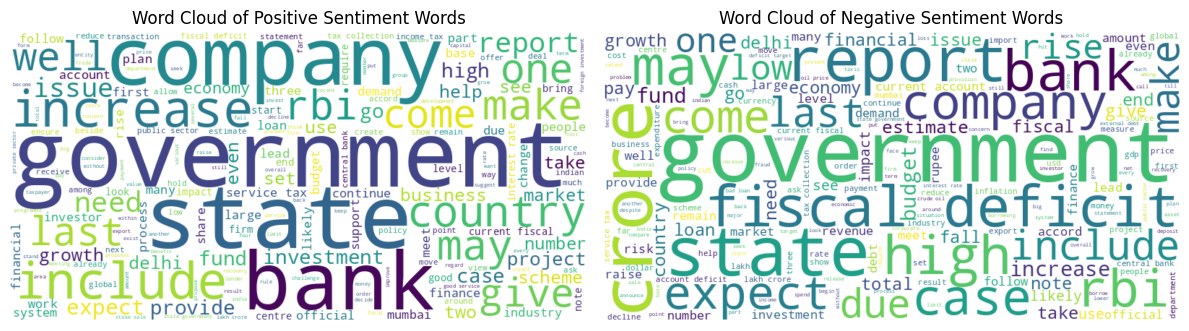

In [ ]:
from wordcloud import WordCloud
positive_words = " ".join(rel_df[rel_df['sentiment'] == 'positive']['new_content'])
negative_words = " ".join(rel_df[rel_df['sentiment'] == 'negative']['new_content'])

# Generate word cloud for positive words
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_words)

# Generate word cloud for negative words
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_words)

# Plot word clouds
plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Word Cloud of Positive Sentiment Words')
plt.axis('off')

plt.subplot(122)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Word Cloud of Negative Sentiment Words')
plt.axis('off')

plt.tight_layout()
plt.show()

<Figure size 4200x1800 with 0 Axes>

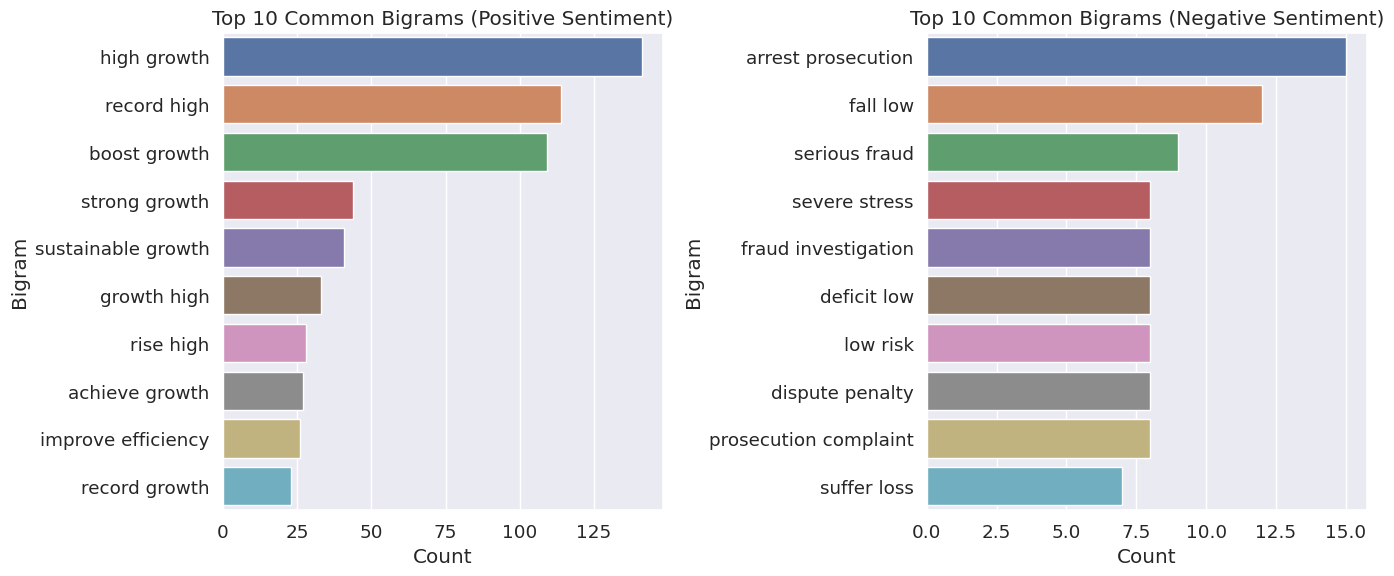

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Separate positive and negative sentiment data
positive_data = rel_df[rel_df['sentiment'] == 'positive']
negative_data = rel_df[rel_df['sentiment'] == 'negative']

# Get top common bigrams for positive sentiment
common_bigrams_positive = positive_data['LM_Pos_bigrams'].explode().value_counts().head(10)

# Get top common bigrams for negative sentiment
common_bigrams_negative = negative_data['LM_Neg_bigrams'].explode().value_counts().head(10)

# Create DataFrames for common bigrams and their counts
common_bigrams_df_positive = pd.DataFrame({'Bigram': common_bigrams_positive.index, 'Count': common_bigrams_positive.values})
common_bigrams_df_negative = pd.DataFrame({'Bigram': common_bigrams_negative.index, 'Count': common_bigrams_negative.values})


sns.set(font_scale=1.2)
plt.figure(figsize=(14, 6), dpi=300)

# Create subplots for positive and negative sentiment
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
fig.subplots_adjust(wspace=0.4)  # Adjust the value as needed

# Bar plot for common bigrams - Positive Sentiment
sns.barplot(x='Count', y='Bigram', data=common_bigrams_df_positive, ax=axes[0])
axes[0].set_title('Top 10 Common Bigrams (Positive Sentiment)')
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Bigram')
sns.barplot(x='Count', y='Bigram', data=common_bigrams_df_negative, ax=axes[1])
axes[1].set_title('Top 10 Common Bigrams (Negative Sentiment)')
axes[1].set_xlabel('Count')
axes[1].set_ylabel('Bigram')

plt.tight_layout()

# Save the plot as JPG image
plt.savefig('common_bigrams_plot.jpg')

plt.show()


<Figure size 4200x1800 with 0 Axes>

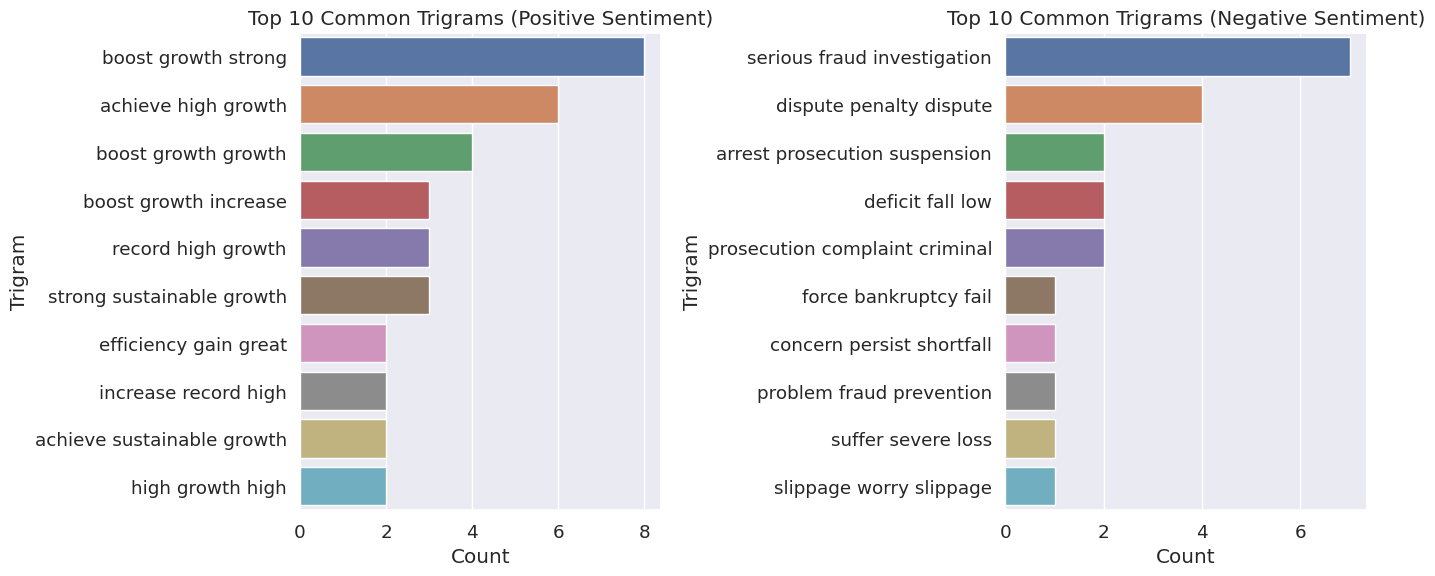

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Separate positive and negative sentiment data
positive_data = rel_df[rel_df['sentiment'] == 'positive']
negative_data = rel_df[rel_df['sentiment'] == 'negative']

# Get top common bigrams for positive sentiment
common_bigrams_positive = positive_data['LM_Pos_trigrams'].explode().value_counts().head(10)

# Get top common bigrams for negative sentiment
common_bigrams_negative = negative_data['LM_Neg_trigrams'].explode().value_counts().head(10)

# Create DataFrames for common bigrams and their counts
common_bigrams_df_positive = pd.DataFrame({'Trigram': common_bigrams_positive.index, 'Count': common_bigrams_positive.values})
common_bigrams_df_negative = pd.DataFrame({'Trigram': common_bigrams_negative.index, 'Count': common_bigrams_negative.values})


sns.set(font_scale=1.2)
plt.figure(figsize=(14, 6), dpi=300)

# Create subplots for positive and negative sentiment
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
fig.subplots_adjust(wspace=0.4)  # Adjust the value as needed

# Bar plot for common bigrams - Positive Sentiment
sns.barplot(x='Count', y='Trigram', data=common_bigrams_df_positive, ax=axes[0])
axes[0].set_title('Top 10 Common Trigrams (Positive Sentiment)')
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Trigram')
sns.barplot(x='Count', y='Trigram', data=common_bigrams_df_negative, ax=axes[1])
axes[1].set_title('Top 10 Common Trigrams (Negative Sentiment)')
axes[1].set_xlabel('Count')
axes[1].set_ylabel('Trigram')

plt.tight_layout()

# Save the plot as JPG image
plt.savefig('common_bigrams_plot.jpg')

plt.show()


In [ ]:
rel_df['NetSentiment'] = (rel_df['NPositiveWords'] - rel_df['NNegativeWords']) / (rel_df['NPositiveWords'] + rel_df['NNegativeWords'])


In [ ]:
rel_df['NetSentiment'].ffill(inplace = True)
rel_df['NetSentiment'].isna().sum()

0

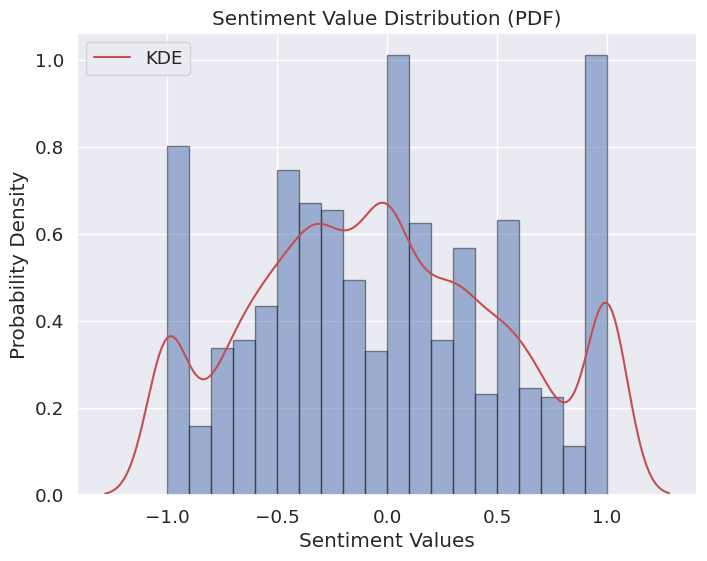

In [ ]:
sentiment_values = rel_df['NetSentiment']

# Create a PDF plot
plt.figure(figsize=(8, 6))  # Set the figure size
plt.hist(sentiment_values, bins=20, density=True, alpha=0.5, color='b', edgecolor='k')  # Histogram
sns.kdeplot(sentiment_values, color='r', label='KDE')  # Kernel Density Estimate (KDE) plot
plt.xlabel('Sentiment Values')
plt.ylabel('Probability Density')
plt.title('Sentiment Value Distribution (PDF)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
def lexicon2():

    henry_lex = {}

    henry_lex['threats']  = -1.5
    henry_lex['uncertain']  = -1.5
    henry_lex['weakened']  = -1.5
    henry_lex['obstacle']  =-1.5
    henry_lex['challenged']  = -1.5
    henry_lex['decreased']  = -1.5
    henry_lex['challenging']  =-1.5
    henry_lex['penalties']  = -1.5
    henry_lex['slumping']  = -1.5
    henry_lex['challenge']  = -1.5
    henry_lex['decreases']  = -1.5
    henry_lex['worse']  = -1.5
    henry_lex['disappointing']  = -1.5
    henry_lex['obstacles']  = -1.5
    henry_lex['worsening']  = -1.5
    henry_lex['negatives']  = -1.5
    henry_lex['risky']  = -1.5
    henry_lex['fell']  = -1.5
    henry_lex['fallen']  = -1.5
    henry_lex['risk']  = -1.5
    henry_lex['declines']  = -1.5
    henry_lex['disappoint']  = -1.5
    henry_lex['fail']  = -1.5
    henry_lex['fails']  = -1.5
    henry_lex['penalty']  = -1.5
    henry_lex['weaknesses']  = -1.5
    henry_lex['least']  = -1.5
    henry_lex['decreasing']  = -1.5
    henry_lex['slumps']  = -1.5
    henry_lex['deteriorate']  = -1.5
    henry_lex['drops']  = -1.5
    henry_lex['less']  = -1.5
    henry_lex['weaken']  = -1.5
    henry_lex['weak']  = -1.5
    henry_lex['difficulty']  = -1.5
    henry_lex['declining']  = -1.5
    henry_lex['shrunk']  = -1.5
    henry_lex['under']  = -1.5
    henry_lex['lower']  = -1.5
    henry_lex['uncertainty']  = -1.5
    henry_lex['drop']  = -1.5
    henry_lex['disappoints']  = -1.5
    henry_lex['threat']  = -1.5
    henry_lex['hurdle']  = -1.5
    henry_lex['below']  = -1.5
    henry_lex['disappointment']  = -1.5
    henry_lex['depressed']  = -1.5
    henry_lex['dropping']  = -1.5
    henry_lex['shrink']  = -1.5
    henry_lex['deteriorates']  = -1.5
    henry_lex['failing']  = -1.5
    henry_lex['disappointed']  = -1.5
    henry_lex['lowest']  = -1.5
    henry_lex['hurdles']  = -1.5
    henry_lex['challenges']  = -1.5
    henry_lex['down']  = -1.5
    henry_lex['slumped']  = -1.5
    henry_lex['shrinking']  = -1.5
    henry_lex['risks']  = -1.5
    henry_lex['unsettled']  = -1.5
    henry_lex['smallest']  = -1.5
    henry_lex['downturn']  = -1.5
    henry_lex['weakens']  = -1.5
    henry_lex['falling']  = -1.5
    henry_lex['weakness']  = -1.5
    henry_lex['slump']  = -1.5
    henry_lex['failure']  = -1.5
    henry_lex['decline']  = -1.5
    henry_lex['shrinks']  = -1.5
    henry_lex['deteriorated']  = -1.5
    henry_lex['worsens']  = -1.5
    henry_lex['difficult']  = -1.5
    henry_lex['low']  = -1.5
    henry_lex['worsen']  = -1.5
    henry_lex['decrease']  = -1.5
    henry_lex['unfavorable']  = -1.5
    henry_lex['deteriorating']  = -1.5
    henry_lex['dropped']  = -1.5
    henry_lex['falls']  = -1.5
    henry_lex['worst']  = -1.5
    henry_lex['declined']  = -1.5
    henry_lex['fall']  = -1.5
    henry_lex['negative']  = -1.5
    henry_lex['smaller']  = -1.5
    henry_lex['weakening']  = -1.5
    henry_lex['improve']  = 1.5
    henry_lex['leader']  = 1.5
    henry_lex['improves']  = 1.5
    henry_lex['strongest']  = 1.5
    henry_lex['higher']  = 1.5
    henry_lex['succeeded']  = 1.5
    henry_lex['enjoys']  = 1.5
    henry_lex['up']  = 1.5
    henry_lex['best']  = 1.5
    henry_lex['growing']  = 1.5
    henry_lex['reward']  = 1.5
    henry_lex['opportunity']  = 1.5
    henry_lex['good']  = 1.
    henry_lex['encouraged']  = 1.5
    henry_lex['expand']  = 1.5
    henry_lex['exceeding']  = 1.5
    henry_lex['expansion']  = 1.5
    henry_lex['improvement']  = 1.5
    henry_lex['increased']  = 1.5
    henry_lex['better']  = 1.5
    henry_lex['larger']  = 1.5
    henry_lex['succeed']  = 1.5
    henry_lex['achieve']  = 1.5
    henry_lex['strengthen']  = 1.5
    henry_lex['succeeds']  = 1.5
    henry_lex['rewarding']  = 1.5
    henry_lex['rewards']  = 1.5
    henry_lex['expands']  = 1.5
    henry_lex['certainty']  = 1.5
    henry_lex['accomplishing']  = 1.5
    henry_lex['grows']  = 1.5
    henry_lex['record']  = 1.5
    henry_lex['accomplishes']  = 1.5
    henry_lex['grown']  = 1.5
    henry_lex['progressing']  = 1.5
    henry_lex['greatest']  = 1.5
    henry_lex['above']  = 1.5
    henry_lex['strengthening']  = 1.5
    henry_lex['improving']  = 1.5
    henry_lex['strong']  = 1.5
    henry_lex['stronger']  = 1.5
    henry_lex['strength']  = 1.5
    henry_lex['high']  = 1.5
    henry_lex['improvements']  = 1.5
    henry_lex['solid']  = 1.5
    henry_lex['accomplish']  = 1.5
    henry_lex['rise']  = 1.5
    henry_lex['highest']  = 1.5
    henry_lex['strengthens']  = 1.5
    henry_lex['rose']  = 1.5
    henry_lex['positives']  = 1.5
    henry_lex['deliver']  = 1.5
    henry_lex['exceeded']  = 1.5
    henry_lex['greater']  = 1.5
    henry_lex['achieving']  = 1.5
    henry_lex['excellent']  = 1.5
    henry_lex['risen']  = 1.5
    henry_lex['exceed']  = 1.5
    henry_lex['grew']  = 1.5
    henry_lex['expanding']  = 1.5
    henry_lex['delivers']  = 1.5
    henry_lex['accomplished']  = 1.5
    henry_lex['enjoy']  = 1.5
    henry_lex['opportunities']  = 1.5
    henry_lex['most']  = 1.5
    henry_lex['definite']  = 1.5
    henry_lex['succeeding']  = 1.5
    henry_lex['achievements']  = 1.5
    henry_lex['rising']  = 1.5
    henry_lex['accomplishment']  = 1.5
    henry_lex['more']  = 1.5
    henry_lex['achieved']  = 1.5
    henry_lex['successes']  = 1.5
    henry_lex['enjoying']  = 1.5
    henry_lex['increasing']  = 1.5
    henry_lex['success']  = 1.5
    henry_lex['exceeds']  = 1.5
    henry_lex['certain']  = 1.5
    henry_lex['accomplishments']  = 1.5
    henry_lex['beating']  = 1.5
    henry_lex['positive']  = 1.5
    henry_lex['achieves']  = 1.5
    henry_lex['beats']  = 1.5
    henry_lex['progress']  = 1.5
    henry_lex['leading']  = 1.5
    henry_lex['grow']  = 1.5
    henry_lex['achievement']  = 1.5
    henry_lex['expanded']  = 1.5
    henry_lex['growth']  = 1.5
    henry_lex['enjoyed']  = 1.5
    henry_lex['strengthened']  = 1.5
    henry_lex['delivered']  = 1.5
    henry_lex['pleased']  = 1.5
    henry_lex['delivering']  = 1.5
    henry_lex['improved']  = 1.5
    henry_lex['successful']  = 1.5
    henry_lex['largest']  = 1.5
    henry_lex['increases']  = 1.5
    henry_lex['encouraging']  = 1.5
    henry_lex['increase']  = 1.5
    henry_lex['rises']  = 1.5
    henry_lex['strengths']  = 1.5
    henry_lex['rewarded']  = 1.5
    henry_lex['beat']  = 1.5

    return henry_lex

In [ ]:
def lexicon1():

    senti_bignomics = {}

    senti_bignomics['abandon'] 	 = -0.5
    senti_bignomics['abandonment'] 	 = -0.6
    senti_bignomics['abdicate'] 	 = -0.2
    senti_bignomics['abdication'] 	 = -0.25
    senti_bignomics['aberrant'] 	 = -0.4
    senti_bignomics['aberration'] 	 = -0.45
    senti_bignomics['aberrational'] 	 = -0.25
    senti_bignomics['abet'] 	 = -0.35
    senti_bignomics['abeyance'] 	 = -0.5
    senti_bignomics['abeyances'] 	 = -0.3
    senti_bignomics['abide'] 	 = 0.2
    senti_bignomics['able'] 	 = 0.3
    senti_bignomics['abnormal'] 	 = -0.3
    senti_bignomics['abnormality'] 	 = -0.25
    senti_bignomics['abnormally'] 	 = -0.3
    senti_bignomics['abolish'] 	 = -0.25
    senti_bignomics['abovementioned'] 	 = 0
    senti_bignomics['abrogate'] 	 = -0.1
    senti_bignomics['abrogation'] 	 = -0.35
    senti_bignomics['abrupt'] 	 = -0.3
    senti_bignomics['abruptly'] 	 = -0.2
    senti_bignomics['abruptness'] 	 = -0.4
    senti_bignomics['absence'] 	 = -0.3
    senti_bignomics['absenteeism'] 	 = -0.4
    senti_bignomics['absolve'] 	 = 0.1
    senti_bignomics['absorb'] 	 = 0.3
    senti_bignomics['abundance'] 	 = 0.75
    senti_bignomics['abundant'] 	 = 0.75
    senti_bignomics['abuse'] 	 = -0.45
    senti_bignomics['abusive'] 	 = -0.7
    senti_bignomics['abusively'] 	 = -0.8
    senti_bignomics['abusiveness'] 	 = -0.7
    senti_bignomics['accelerate'] 	 = 0.6
    senti_bignomics['accept'] 	 = 0.35
    senti_bignomics['access'] 	 = 0.3
    senti_bignomics['accession'] 	 = 0.2
    senti_bignomics['accident'] 	 = -0.3
    senti_bignomics['accidental'] 	 = -0.25
    senti_bignomics['accidentally'] 	 = -0.4
    senti_bignomics['acclaim'] 	 = 0.65
    senti_bignomics['accomplish'] 	 = 0.8
    senti_bignomics['accomplishment'] 	 = 0.7
    senti_bignomics['account'] 	 = 0
    senti_bignomics['accusation'] 	 = -0.3
    senti_bignomics['accuse'] 	 = -0.2
    senti_bignomics['achieve'] 	 = 0.65
    senti_bignomics['achievement'] 	 = 0.65
    senti_bignomics['acquiesce'] 	 = -0.15
    senti_bignomics['acquirees'] 	 = 0
    senti_bignomics['acquirer'] 	 = 0
    senti_bignomics['acquit'] 	 = 0.15
    senti_bignomics['acquittal'] 	 = 0
    senti_bignomics['acquittance'] 	 = 0.15
    senti_bignomics['acquittances'] 	 = 0.1
    senti_bignomics['act'] 	 = 0.05
    senti_bignomics['action'] 	 = 0.3
    senti_bignomics['activity'] 	 = 0.3
    senti_bignomics['actual'] 	 = 0.1
    senti_bignomics['addendum'] 	 = 0
    senti_bignomics['adequately'] 	 = 0.3
    senti_bignomics['adjourn'] 	 = 0
    senti_bignomics['adjournment'] 	 = 0
    senti_bignomics['adjudge'] 	 = 0
    senti_bignomics['adjudicate'] 	 = 0
    senti_bignomics['adjudication'] 	 = 0
    senti_bignomics['adjudicative'] 	 = 0
    senti_bignomics['adjudicator'] 	 = 0
    senti_bignomics['adjudicatory'] 	 = 0
    senti_bignomics['admissibility'] 	 = 0.2
    senti_bignomics['admissible'] 	 = 0.2
    senti_bignomics['admissibly'] 	 = 0.15
    senti_bignomics['admission'] 	 = 0.3
    senti_bignomics['adulterate'] 	 = -0.4
    senti_bignomics['adulteration'] 	 = -0.6
    senti_bignomics['advance'] 	 = 0.6
    senti_bignomics['advancement'] 	 = 0.55
    senti_bignomics['advantage'] 	 = 0.75
    senti_bignomics['advantageous'] 	 = 0.8
    senti_bignomics['advantageously'] 	 = 0.7
    senti_bignomics['adversarial'] 	 = -0.65
    senti_bignomics['adversary'] 	 = -0.35
    senti_bignomics['adverse'] 	 = -0.3
    senti_bignomics['adversely'] 	 = -0.65
    senti_bignomics['adversity'] 	 = -0.45
    senti_bignomics['affair'] 	 = -0.1
    senti_bignomics['affect'] 	 = 0
    senti_bignomics['affection'] 	 = 0.65
    senti_bignomics['affidavit'] 	 = -0.1
    senti_bignomics['aforementioned'] 	 = 0
    senti_bignomics['aforesaid'] 	 = 0
    senti_bignomics['aftermath'] 	 = -0.35
    senti_bignomics['against'] 	 = -0.25
    senti_bignomics['aggravate'] 	 = -0.4
    senti_bignomics['aggravation'] 	 = -0.4
    senti_bignomics['aggrieve'] 	 = -0.6
    senti_bignomics['agreement'] 	 = 0.5
    senti_bignomics['agricultural'] 	 = 0
    senti_bignomics['aim'] 	 = 0
    senti_bignomics['alcohol'] 	 = 0
    senti_bignomics['alert'] 	 = -0.2
    senti_bignomics['alienate'] 	 = -0.65
    senti_bignomics['alienation'] 	 = -0.45
    senti_bignomics['align'] 	 = 0.2
    senti_bignomics['allegation'] 	 = -0.25
    senti_bignomics['allege'] 	 = 0
    senti_bignomics['allegedly'] 	 = 0
    senti_bignomics['alliance'] 	 = 0.4
    senti_bignomics['allow'] 	 = 0.25
    senti_bignomics['allowance'] 	 = 0.4
    senti_bignomics['almost'] 	 = 0
    senti_bignomics['alteration'] 	 = 0
    senti_bignomics['always'] 	 = 0
    senti_bignomics['ambiguity'] 	 = -0.15
    senti_bignomics['ambiguous'] 	 = -0.1
    senti_bignomics['amend'] 	 = 0.4
    senti_bignomics['amendable'] 	 = 0.45
    senti_bignomics['amendment'] 	 = 0.15
    senti_bignomics['amount'] 	 = 0
    senti_bignomics['anger'] 	 = -0.5
    senti_bignomics['announce'] 	 = 0
    senti_bignomics['annoy'] 	 = -0.3
    senti_bignomics['annoyance'] 	 = -0.25
    senti_bignomics['annual'] 	 = 0
    senti_bignomics['annul'] 	 = -0.2
    senti_bignomics['annulment'] 	 = -0.4
    senti_bignomics['anomalous'] 	 = -0.1
    senti_bignomics['anomalously'] 	 = -0.05
    senti_bignomics['anomaly'] 	 = -0.2
    senti_bignomics['antecedent'] 	 = 0
    senti_bignomics['anticipate'] 	 = 0.25
    senti_bignomics['anticipation'] 	 = 0.1
    senti_bignomics['anticompetitive'] 	 = -0.05
    senti_bignomics['anticorruption'] 	 = 0.35
    senti_bignomics['antitrust'] 	 = -0.25
    senti_bignomics['anxiety'] 	 = -0.55
    senti_bignomics['apathy'] 	 = -0.4
    senti_bignomics['apparent'] 	 = 0.05
    senti_bignomics['apparently'] 	 = 0.05
    senti_bignomics['appeal'] 	 = 0.3
    senti_bignomics['appealable'] 	 = 0.1
    senti_bignomics['appear'] 	 = 0.1
    senti_bignomics['appellant'] 	 = 0
    senti_bignomics['appellate'] 	 = 0
    senti_bignomics['appellees'] 	 = 0
    senti_bignomics['apply'] 	 = 0
    senti_bignomics['approach'] 	 = 0
    senti_bignomics['approximate'] 	 = 0.05
    senti_bignomics['approximately'] 	 = 0
    senti_bignomics['approximation'] 	 = 0.1
    senti_bignomics['appurtenance'] 	 = 0
    senti_bignomics['appurtenant'] 	 = 0
    senti_bignomics['arbitral'] 	 = 0
    senti_bignomics['arbitrarily'] 	 = -0.1
    senti_bignomics['arbitrariness'] 	 = -0.25
    senti_bignomics['arbitrary'] 	 = -0.3
    senti_bignomics['arbitrate'] 	 = 0.1
    senti_bignomics['arbitration'] 	 = 0
    senti_bignomics['arbitrator'] 	 = 0
    senti_bignomics['argue'] 	 = -0.15
    senti_bignomics['argument'] 	 = -0.3
    senti_bignomics['argumentative'] 	 = -0.25
    senti_bignomics['array'] 	 = 0
    senti_bignomics['arrearage'] 	 = -0.2
    senti_bignomics['arrest'] 	 = -0.4
    senti_bignomics['artificially'] 	 = -0.25
    senti_bignomics['ascendancy'] 	 = 0.35
    senti_bignomics['ascendant'] 	 = 0.4
    senti_bignomics['ask'] 	 = 0
    senti_bignomics['assault'] 	 = -0.65
    senti_bignomics['assert'] 	 = 0.2
    senti_bignomics['assertable'] 	 = 0.25
    senti_bignomics['assertion'] 	 = 0.1
    senti_bignomics['asset'] 	 = 0.5
    senti_bignomics['assignation'] 	 = 0
    senti_bignomics['assume'] 	 = 0
    senti_bignomics['assumption'] 	 = 0
    senti_bignomics['assure'] 	 = 0.35
    senti_bignomics['attain'] 	 = 0.55
    senti_bignomics['attainment'] 	 = 0.3
    senti_bignomics['attest'] 	 = 0
    senti_bignomics['attestation'] 	 = 0
    senti_bignomics['attorney'] 	 = 0
    senti_bignomics['attornment'] 	 = 0
    senti_bignomics['attorns'] 	 = 0
    senti_bignomics['attract'] 	 = 0.55
    senti_bignomics['attractive'] 	 = 0.65
    senti_bignomics['attributable'] 	 = 0.3
    senti_bignomics['attribute'] 	 = 0.1
    senti_bignomics['attrition'] 	 = -0.1
    senti_bignomics['authority'] 	 = 0
    senti_bignomics['automobile'] 	 = 0
    senti_bignomics['automotive'] 	 = 0
    senti_bignomics['available'] 	 = 0.3
    senti_bignomics['average'] 	 = 0
    senti_bignomics['avoid'] 	 = -0.25
    senti_bignomics['back'] 	 = 0
    senti_bignomics['backdate'] 	 = -0.2
    senti_bignomics['backdrop'] 	 = 0
    senti_bignomics['background'] 	 = 0
    senti_bignomics['bad'] 	 = -0.4
    senti_bignomics['bail'] 	 = -0.25
    senti_bignomics['bailee'] 	 = 0
    senti_bignomics['bailiff'] 	 = 0
    senti_bignomics['bailment'] 	 = 0
    senti_bignomics['bailout'] 	 = -0.45
    senti_bignomics['balk'] 	 = -0.3
    senti_bignomics['ban'] 	 = -0.45
    senti_bignomics['bank'] 	 = 0
    senti_bignomics['bankrupt'] 	 = -0.9
    senti_bignomics['bankruptcy'] 	 = -0.9
    senti_bignomics['bar'] 	 = 0
    senti_bignomics['barrier'] 	 = -0.4
    senti_bignomics['base'] 	 = 0
    senti_bignomics['bash'] 	 = -0.3
    senti_bignomics['basic'] 	 = 0
    senti_bignomics['batter'] 	 = -0.3
    senti_bignomics['be'] 	 = 0
    senti_bignomics['bear'] 	 = -0.15
    senti_bignomics['beautiful'] 	 = 0.65
    senti_bignomics['beautifully'] 	 = 0.7
    senti_bignomics['because'] 	 = 0
    senti_bignomics['become'] 	 = 0
    senti_bignomics['bed'] 	 = 0
    senti_bignomics['believe'] 	 = 0.25
    senti_bignomics['beneficial'] 	 = 0.6
    senti_bignomics['beneficially'] 	 = 0.6
    senti_bignomics['beneficiated'] 	 = 0.3
    senti_bignomics['beneficiation'] 	 = 0.35
    senti_bignomics['benefit'] 	 = 0.7
    senti_bignomics['bill'] 	 = 0
    senti_bignomics['bind'] 	 = -0.2
    senti_bignomics['bite'] 	 = 0
    senti_bignomics['bloc'] 	 = 0
    senti_bignomics['block'] 	 = -0.35
    senti_bignomics['board'] 	 = 0
    senti_bignomics['bob'] 	 = 0
    senti_bignomics['bolster'] 	 = 0.5
    senti_bignomics['bona'] 	 = 0
    senti_bignomics['bonafide'] 	 = 0.2
    senti_bignomics['bond'] 	 = 0
    senti_bignomics['boom'] 	 = 0.8
    senti_bignomics['boost'] 	 = 0.4
    senti_bignomics['borrow'] 	 = -0.1
    senti_bignomics['bottleneck'] 	 = -0.4
    senti_bignomics['bound'] 	 = 0
    senti_bignomics['boycott'] 	 = -0.35
    senti_bignomics['brake'] 	 = -0.25
    senti_bignomics['brand'] 	 = 0
    senti_bignomics['breach'] 	 = -0.5
    senti_bignomics['break'] 	 = -0.2
    senti_bignomics['breakage'] 	 = -0.4
    senti_bignomics['breakdown'] 	 = -0.65
    senti_bignomics['breakthrough'] 	 = 0.65
    senti_bignomics['bribe'] 	 = -0.5
    senti_bignomics['bribery'] 	 = -0.6
    senti_bignomics['bridge'] 	 = 0.05
    senti_bignomics['brilliant'] 	 = 0.75
    senti_bignomics['british'] 	 = 0
    senti_bignomics['buckle'] 	 = -0.4
    senti_bignomics['buffet'] 	 = 0
    senti_bignomics['bump'] 	 = 0.25
    senti_bignomics['burden'] 	 = -0.5
    senti_bignomics['burdensome'] 	 = -0.5
    senti_bignomics['burn'] 	 = -0.4
    senti_bignomics['bust'] 	 = -0.4
    senti_bignomics['calamitous'] 	 = -0.7
    senti_bignomics['calamity'] 	 = -0.7
    senti_bignomics['calculate'] 	 = 0
    senti_bignomics['call'] 	 = 0
    senti_bignomics['calm'] 	 = 0.3
    senti_bignomics['calmness'] 	 = 0.35
    senti_bignomics['camp'] 	 = 0
    senti_bignomics['can'] 	 = 0
    senti_bignomics['cancel'] 	 = -0.4
    senti_bignomics['cancellation'] 	 = -0.45
    senti_bignomics['cap'] 	 = 0
    senti_bignomics['capacity'] 	 = 0.05
    senti_bignomics['capital'] 	 = 0.2
    senti_bignomics['car'] 	 = 0
    senti_bignomics['card'] 	 = 0
    senti_bignomics['careless'] 	 = -0.4
    senti_bignomics['carelessly'] 	 = -0.4
    senti_bignomics['carelessness'] 	 = -0.35
    senti_bignomics['carry'] 	 = 0.05
    senti_bignomics['case'] 	 = 0
    senti_bignomics['catastrophe'] 	 = -0.95
    senti_bignomics['catastrophic'] 	 = -1
    senti_bignomics['catastrophically'] 	 = -0.95
    senti_bignomics['catch'] 	 = 0
    senti_bignomics['caution'] 	 = -0.2
    senti_bignomics['cautionary'] 	 = -0.15
    senti_bignomics['cautious'] 	 = -0.1
    senti_bignomics['cautiously'] 	 = 0.1
    senti_bignomics['cautiousness'] 	 = 0
    senti_bignomics['cease'] 	 = -0.3
    senti_bignomics['censure'] 	 = -0.4
    senti_bignomics['cent'] 	 = 0
    senti_bignomics['center'] 	 = 0
    senti_bignomics['centre'] 	 = 0
    senti_bignomics['certain'] 	 = 0.2
    senti_bignomics['certainty'] 	 = 0.4
    senti_bignomics['cession'] 	 = 0
    senti_bignomics['challenge'] 	 = -0.1
    senti_bignomics['charitable'] 	 = 0.5
    senti_bignomics['charity'] 	 = 0.5
    senti_bignomics['chart'] 	 = 0
    senti_bignomics['chattel'] 	 = 0
    senti_bignomics['check'] 	 = 0.3
    senti_bignomics['chinese'] 	 = 0
    senti_bignomics['circle'] 	 = 0
    senti_bignomics['circumvent'] 	 = 0
    senti_bignomics['circumvention'] 	 = -0.2
    senti_bignomics['claim'] 	 = 0
    senti_bignomics['claimable'] 	 = 0
    senti_bignomics['claimant'] 	 = 0
    senti_bignomics['clarification'] 	 = 0.4
    senti_bignomics['clawback'] 	 = -0.3
    senti_bignomics['clawbacks'] 	 = -0.3
    senti_bignomics['clear'] 	 = 0
    senti_bignomics['clearly'] 	 = 0
    senti_bignomics['cliff'] 	 = 0
    senti_bignomics['climate'] 	 = 0
    senti_bignomics['clobber'] 	 = -0.45
    senti_bignomics['close'] 	 = -0.25
    senti_bignomics['closeout'] 	 = -0.35
    senti_bignomics['closure'] 	 = -0.5
    senti_bignomics['codicil'] 	 = 0
    senti_bignomics['codification'] 	 = 0
    senti_bignomics['codify'] 	 = 0
    senti_bignomics['coerce'] 	 = -0.65
    senti_bignomics['coercion'] 	 = -0.6
    senti_bignomics['coercive'] 	 = -0.45
    senti_bignomics['collaborate'] 	 = 0.35
    senti_bignomics['collaboration'] 	 = 0.3
    senti_bignomics['collaborative'] 	 = 0.55
    senti_bignomics['collaborator'] 	 = 0.3
    senti_bignomics['collapse'] 	 = -0.8
    senti_bignomics['collision'] 	 = -0.35
    senti_bignomics['collude'] 	 = -0.55
    senti_bignomics['collusion'] 	 = -0.6
    senti_bignomics['collusive'] 	 = -0.35
    senti_bignomics['colony'] 	 = 0
    senti_bignomics['combination'] 	 = 0
    senti_bignomics['combine'] 	 = 0
    senti_bignomics['come'] 	 = 0
    senti_bignomics['commercial'] 	 = 0
    senti_bignomics['commit'] 	 = 0.2
    senti_bignomics['commitment'] 	 = 0.3
    senti_bignomics['commodity'] 	 = 0.2
    senti_bignomics['common'] 	 = 0
    senti_bignomics['company'] 	 = 0
    senti_bignomics['comparable'] 	 = 0.2
    senti_bignomics['compare'] 	 = 0.05
    senti_bignomics['compassion'] 	 = 0.5
    senti_bignomics['compel'] 	 = 0
    senti_bignomics['compensatory'] 	 = 0.3
    senti_bignomics['competitiveness'] 	 = 0.25
    senti_bignomics['competitor'] 	 = 0
    senti_bignomics['complain'] 	 = -0.3
    senti_bignomics['complainant'] 	 = -0.25
    senti_bignomics['complaint'] 	 = -0.4
    senti_bignomics['complete'] 	 = 0.4
    senti_bignomics['complicate'] 	 = -0.4
    senti_bignomics['complication'] 	 = -0.45
    senti_bignomics['compliment'] 	 = 0.6
    senti_bignomics['complimentary'] 	 = 0.6
    senti_bignomics['comply'] 	 = 0.35
    senti_bignomics['composite'] 	 = 0
    senti_bignomics['compound'] 	 = 0
    senti_bignomics['comprise'] 	 = 0
    senti_bignomics['compulsion'] 	 = -0.05
    senti_bignomics['compulsory'] 	 = -0.2
    senti_bignomics['conceal'] 	 = -0.1
    senti_bignomics['concede'] 	 = -0.15
    senti_bignomics['conceivable'] 	 = 0.1
    senti_bignomics['conceivably'] 	 = 0
    senti_bignomics['concern'] 	 = -0.2
    senti_bignomics['conciliate'] 	 = 0.3
    senti_bignomics['conciliation'] 	 = 0.15
    senti_bignomics['conclusive'] 	 = 0.2
    senti_bignomics['conclusively'] 	 = 0.3
    senti_bignomics['condemn'] 	 = -0.5
    senti_bignomics['condemnation'] 	 = -0.5
    senti_bignomics['condition'] 	 = 0
    senti_bignomics['conditional'] 	 = 0
    senti_bignomics['conditionally'] 	 = 0
    senti_bignomics['condone'] 	 = 0.2
    senti_bignomics['conducive'] 	 = 0.35
    senti_bignomics['confess'] 	 = 0
    senti_bignomics['confession'] 	 = 0
    senti_bignomics['confident'] 	 = 0.6
    senti_bignomics['confine'] 	 = -0.45
    senti_bignomics['confinement'] 	 = -0.45
    senti_bignomics['confirm'] 	 = 0.3
    senti_bignomics['confiscate'] 	 = -0.4
    senti_bignomics['confiscation'] 	 = -0.5
    senti_bignomics['confiscatory'] 	 = -0.3
    senti_bignomics['conflict'] 	 = -0.5
    senti_bignomics['confront'] 	 = -0.1
    senti_bignomics['confrontation'] 	 = -0.45
    senti_bignomics['confrontational'] 	 = -0.5
    senti_bignomics['confuse'] 	 = -0.4
    senti_bignomics['confusingly'] 	 = -0.3
    senti_bignomics['confusion'] 	 = -0.4
    senti_bignomics['consecutive'] 	 = 0.1
    senti_bignomics['consent'] 	 = 0.3
    senti_bignomics['consider'] 	 = 0
    senti_bignomics['considerable'] 	 = 0.25
    senti_bignomics['conspiracy'] 	 = -0.35
    senti_bignomics['conspirator'] 	 = -0.4
    senti_bignomics['conspiratorial'] 	 = -0.6
    senti_bignomics['conspire'] 	 = -0.55
    senti_bignomics['constant'] 	 = 0.15
    senti_bignomics['constitute'] 	 = 0
    senti_bignomics['constitution'] 	 = 0.25
    senti_bignomics['constitutional'] 	 = 0.35
    senti_bignomics['constitutionality'] 	 = 0.2
    senti_bignomics['constitutionally'] 	 = 0.15
    senti_bignomics['constitutive'] 	 = 0.25
    senti_bignomics['constrain'] 	 = -0.3
    senti_bignomics['constraint'] 	 = -0.5
    senti_bignomics['constructive'] 	 = 0.4
    senti_bignomics['constructively'] 	 = 0.45
    senti_bignomics['construe'] 	 = 0
    senti_bignomics['consumer'] 	 = 0.1
    senti_bignomics['contain'] 	 = 0
    senti_bignomics['contempt'] 	 = -0.5
    senti_bignomics['contend'] 	 = 0
    senti_bignomics['contention'] 	 = -0.35
    senti_bignomics['contentious'] 	 = -0.3
    senti_bignomics['contentiously'] 	 = -0.2
    senti_bignomics['contest'] 	 = -0.1
    senti_bignomics['contestability'] 	 = 0.05
    senti_bignomics['contestation'] 	 = -0.15
    senti_bignomics['context'] 	 = 0
    senti_bignomics['contingency'] 	 = 0.15
    senti_bignomics['contingent'] 	 = 0.1
    senti_bignomics['contingently'] 	 = 0
    senti_bignomics['contract'] 	 = 0
    senti_bignomics['contractible'] 	 = -0.2
    senti_bignomics['contractile'] 	 = -0.1
    senti_bignomics['contraction'] 	 = -0.3
    senti_bignomics['contractual'] 	 = 0
    senti_bignomics['contractually'] 	 = 0
    senti_bignomics['contradict'] 	 = -0.4
    senti_bignomics['contradiction'] 	 = -0.3
    senti_bignomics['contradictory'] 	 = -0.45
    senti_bignomics['contrary'] 	 = -0.25
    senti_bignomics['contrast'] 	 = 0
    senti_bignomics['contravene'] 	 = -0.3
    senti_bignomics['contravention'] 	 = -0.75
    senti_bignomics['controversial'] 	 = -0.45
    senti_bignomics['controversy'] 	 = -0.5
    senti_bignomics['conventional'] 	 = 0.15
    senti_bignomics['convict'] 	 = -0.55
    senti_bignomics['conviction'] 	 = -0.25
    senti_bignomics['cool'] 	 = 0.25
    senti_bignomics['copy'] 	 = 0
    senti_bignomics['corporate'] 	 = 0
    senti_bignomics['correct'] 	 = 0.45
    senti_bignomics['correction'] 	 = 0.25
    senti_bignomics['corrupt'] 	 = -0.65
    senti_bignomics['corruption'] 	 = -0.65
    senti_bignomics['corruptly'] 	 = -0.5
    senti_bignomics['corruptness'] 	 = -0.8
    senti_bignomics['cost'] 	 = 0.1
    senti_bignomics['costly'] 	 = -0.5
    senti_bignomics['coterminous'] 	 = 0
    senti_bignomics['counsel'] 	 = 0
    senti_bignomics['counterclaim'] 	 = 0
    senti_bignomics['counterclaimed'] 	 = 0
    senti_bignomics['counterclaiming'] 	 = -0.1
    senti_bignomics['counterfeit'] 	 = -0.7
    senti_bignomics['counterfeiter'] 	 = -0.8
    senti_bignomics['countermeasure'] 	 = 0
    senti_bignomics['country'] 	 = 0
    senti_bignomics['course'] 	 = 0
    senti_bignomics['court'] 	 = 0
    senti_bignomics['courteous'] 	 = 0.55
    senti_bignomics['courtroom'] 	 = 0
    senti_bignomics['covenant'] 	 = 0
    senti_bignomics['crash'] 	 = -0.85
    senti_bignomics['creative'] 	 = 0.65
    senti_bignomics['creatively'] 	 = 0.7
    senti_bignomics['creativeness'] 	 = 0.6
    senti_bignomics['creativity'] 	 = 0.7
    senti_bignomics['crime'] 	 = -0.75
    senti_bignomics['criminal'] 	 = -0.4
    senti_bignomics['criminality'] 	 = -0.8
    senti_bignomics['criminalize'] 	 = -0.8
    senti_bignomics['criminally'] 	 = -0.5
    senti_bignomics['cripple'] 	 = -0.8
    senti_bignomics['crisis'] 	 = -0.75
    senti_bignomics['critical'] 	 = -0.2
    senti_bignomics['critically'] 	 = -0.1
    senti_bignomics['criticism'] 	 = -0.3
    senti_bignomics['criticize'] 	 = -0.3
    senti_bignomics['crop'] 	 = 0
    senti_bignomics['crossclaim'] 	 = 0
    senti_bignomics['crossroad'] 	 = -0.05
    senti_bignomics['crucial'] 	 = -0.25
    senti_bignomics['crucially'] 	 = 0
    senti_bignomics['crystallise'] 	 = 0.2
    senti_bignomics['crystallize'] 	 = 0
    senti_bignomics['culpability'] 	 = -0.25
    senti_bignomics['culpable'] 	 = -0.4
    senti_bignomics['culpably'] 	 = -0.4
    senti_bignomics['cumbersome'] 	 = -0.4
    senti_bignomics['currency'] 	 = 0
    senti_bignomics['curtail'] 	 = -0.25
    senti_bignomics['curtailment'] 	 = -0.25
    senti_bignomics['cut'] 	 = -0.25
    senti_bignomics['cutback'] 	 = -0.35
    senti_bignomics['cyberattack'] 	 = -0.8
    senti_bignomics['cyberattacks'] 	 = -0.8
    senti_bignomics['cyberbullying'] 	 = -0.8
    senti_bignomics['cybercrime'] 	 = -0.6
    senti_bignomics['cybercrimes'] 	 = -0.9
    senti_bignomics['cybercriminal'] 	 = -0.75
    senti_bignomics['cybercriminals'] 	 = -0.85
    senti_bignomics['cycle'] 	 = 0
    senti_bignomics['damage'] 	 = -0.7
    senti_bignomics['dampen'] 	 = -0.35
    senti_bignomics['danger'] 	 = -0.8
    senti_bignomics['dangerous'] 	 = -0.55
    senti_bignomics['dangerously'] 	 = -0.8
    senti_bignomics['date'] 	 = 0
    senti_bignomics['day'] 	 = 0
    senti_bignomics['daze'] 	 = -0.1
    senti_bignomics['deadlock'] 	 = -0.5
    senti_bignomics['deadweight'] 	 = -0.55
    senti_bignomics['deal'] 	 = 0.4
    senti_bignomics['debar'] 	 = -0.4
    senti_bignomics['debarment'] 	 = -0.65
    senti_bignomics['debate'] 	 = 0
    senti_bignomics['decease'] 	 = -0.3
    senti_bignomics['decedent'] 	 = 0
    senti_bignomics['deceit'] 	 = -0.6
    senti_bignomics['deceitful'] 	 = -0.75
    senti_bignomics['deceitfulness'] 	 = -0.6
    senti_bignomics['deceive'] 	 = -0.5
    senti_bignomics['decent'] 	 = 0.25
    senti_bignomics['deception'] 	 = -0.75
    senti_bignomics['deceptive'] 	 = -0.5
    senti_bignomics['deceptively'] 	 = -0.4
    senti_bignomics['decimate'] 	 = -0.4
    senti_bignomics['declarant'] 	 = 0
    senti_bignomics['declare'] 	 = 0.15
    senti_bignomics['decline'] 	 = -0.6
    senti_bignomics['decrease'] 	 = -0.3
    senti_bignomics['decree'] 	 = 0
    senti_bignomics['deep'] 	 = -0.2
    senti_bignomics['deepen'] 	 = -0.2
    senti_bignomics['deface'] 	 = -0.4
    senti_bignomics['defacement'] 	 = -0.55
    senti_bignomics['defalcation'] 	 = -0.75
    senti_bignomics['defamation'] 	 = -0.65
    senti_bignomics['defamatory'] 	 = -0.65
    senti_bignomics['defame'] 	 = -0.55
    senti_bignomics['default'] 	 = -0.3
    senti_bignomics['defeasance'] 	 = -0.3
    senti_bignomics['defeasances'] 	 = -0.4
    senti_bignomics['defease'] 	 = -0.25
    senti_bignomics['defeased'] 	 = -0.3
    senti_bignomics['defeasement'] 	 = -0.3
    senti_bignomics['defeasing'] 	 = -0.35
    senti_bignomics['defeat'] 	 = -0.75
    senti_bignomics['defect'] 	 = -0.7
    senti_bignomics['defective'] 	 = -0.7
    senti_bignomics['defectively'] 	 = -0.5
    senti_bignomics['defend'] 	 = 0
    senti_bignomics['defendable'] 	 = 0.3
    senti_bignomics['defendant'] 	 = 0
    senti_bignomics['defensive'] 	 = -0.3
    senti_bignomics['defer'] 	 = -0.2
    senti_bignomics['deference'] 	 = -0.25
    senti_bignomics['deficiency'] 	 = -0.75
    senti_bignomics['deficient'] 	 = -0.5
    senti_bignomics['deficit'] 	 = -0.45
    senti_bignomics['definitely'] 	 = 0.2
    senti_bignomics['definition'] 	 = 0
    senti_bignomics['definitively'] 	 = 0.4
    senti_bignomics['deflation'] 	 = -0.55
    senti_bignomics['defraud'] 	 = -0.45
    senti_bignomics['defunct'] 	 = -0.65
    senti_bignomics['degradation'] 	 = -0.5
    senti_bignomics['degrade'] 	 = -0.5
    senti_bignomics['delay'] 	 = -0.3
    senti_bignomics['delegable'] 	 = 0
    senti_bignomics['deleterious'] 	 = -0.6
    senti_bignomics['deliberate'] 	 = 0
    senti_bignomics['deliberately'] 	 = 0
    senti_bignomics['delight'] 	 = 0.55
    senti_bignomics['delightful'] 	 = 0.7
    senti_bignomics['delightfully'] 	 = 0.6
    senti_bignomics['delinquency'] 	 = -0.6
    senti_bignomics['delinquent'] 	 = -0.4
    senti_bignomics['delinquently'] 	 = -0.45
    senti_bignomics['delist'] 	 = -0.3
    senti_bignomics['deliver'] 	 = 0.3
    senti_bignomics['demand'] 	 = 0.1
    senti_bignomics['demise'] 	 = -0.6
    senti_bignomics['demolish'] 	 = -0.65
    senti_bignomics['demolition'] 	 = -0.5
    senti_bignomics['demote'] 	 = -0.6
    senti_bignomics['demotion'] 	 = -0.55
    senti_bignomics['demur'] 	 = -0.3
    senti_bignomics['demurrer'] 	 = -0.15
    senti_bignomics['denial'] 	 = -0.5
    senti_bignomics['denigrate'] 	 = -0.7
    senti_bignomics['denigration'] 	 = -0.45
    senti_bignomics['deny'] 	 = -0.3
    senti_bignomics['depend'] 	 = 0
    senti_bignomics['dependability'] 	 = 0.2
    senti_bignomics['dependable'] 	 = 0.65
    senti_bignomics['dependance'] 	 = -0.2
    senti_bignomics['dependant'] 	 = -0.05
    senti_bignomics['dependence'] 	 = 0
    senti_bignomics['dependency'] 	 = -0.25
    senti_bignomics['dependent'] 	 = -0.05
    senti_bignomics['deplete'] 	 = -0.5
    senti_bignomics['depletion'] 	 = -0.65
    senti_bignomics['depose'] 	 = -0.45
    senti_bignomics['deposition'] 	 = 0
    senti_bignomics['deprecation'] 	 = -0.55
    senti_bignomics['depress'] 	 = -0.7
    senti_bignomics['depression'] 	 = -0.75
    senti_bignomics['deprivation'] 	 = -0.6
    senti_bignomics['deprive'] 	 = -0.7
    senti_bignomics['derelict'] 	 = -0.6
    senti_bignomics['dereliction'] 	 = -0.5
    senti_bignomics['derive'] 	 = 0
    senti_bignomics['derogate'] 	 = -0.35
    senti_bignomics['derogation'] 	 = -0.5
    senti_bignomics['derogatory'] 	 = -0.75
    senti_bignomics['design'] 	 = 0
    senti_bignomics['designator'] 	 = 0
    senti_bignomics['desirable'] 	 = 0.65
    senti_bignomics['desire'] 	 = 0.35
    senti_bignomics['desist'] 	 = -0.35
    senti_bignomics['despair'] 	 = -0.55
    senti_bignomics['despite'] 	 = -0.1
    senti_bignomics['destabilization'] 	 = -0.8
    senti_bignomics['destabilize'] 	 = -0.65
    senti_bignomics['destine'] 	 = 0
    senti_bignomics['destroy'] 	 = -0.65
    senti_bignomics['destruction'] 	 = -0.9
    senti_bignomics['destructive'] 	 = -0.6
    senti_bignomics['detail'] 	 = 0
    senti_bignomics['detain'] 	 = -0.45
    senti_bignomics['detainer'] 	 = -0.25
    senti_bignomics['detention'] 	 = -0.6
    senti_bignomics['deter'] 	 = -0.4
    senti_bignomics['deteriorate'] 	 = -0.75
    senti_bignomics['deterioration'] 	 = -0.65
    senti_bignomics['deterrence'] 	 = -0.3
    senti_bignomics['deterrences'] 	 = -0.25
    senti_bignomics['deterrent'] 	 = -0.4
    senti_bignomics['detract'] 	 = -0.3
    senti_bignomics['detriment'] 	 = -0.6
    senti_bignomics['detrimental'] 	 = -0.55
    senti_bignomics['detrimentally'] 	 = -0.55
    senti_bignomics['devaluation'] 	 = -0.6
    senti_bignomics['devalue'] 	 = -0.4
    senti_bignomics['devastate'] 	 = -0.9
    senti_bignomics['devastation'] 	 = -0.85
    senti_bignomics['development'] 	 = 0.4
    senti_bignomics['deviate'] 	 = -0.15
    senti_bignomics['deviation'] 	 = -0.4
    senti_bignomics['devisee'] 	 = 0
    senti_bignomics['devolve'] 	 = -0.4
    senti_bignomics['dictate'] 	 = 0
    senti_bignomics['differ'] 	 = -0.1
    senti_bignomics['different'] 	 = 0
    senti_bignomics['difficult'] 	 = -0.5
    senti_bignomics['difficultly'] 	 = -0.4
    senti_bignomics['difficulty'] 	 = -0.4
    senti_bignomics['diffidence'] 	 = -0.4
    senti_bignomics['digit'] 	 = 0
    senti_bignomics['digital'] 	 = 0
    senti_bignomics['diligent'] 	 = 0.5
    senti_bignomics['diligently'] 	 = 0.45
    senti_bignomics['diminish'] 	 = -0.4
    senti_bignomics['diminution'] 	 = -0.4
    senti_bignomics['direct'] 	 = 0
    senti_bignomics['direction'] 	 = 0
    senti_bignomics['directive'] 	 = 0.05
    senti_bignomics['disadvantage'] 	 = -0.45
    senti_bignomics['disadvantageous'] 	 = -0.6
    senti_bignomics['disaffiliation'] 	 = -0.55
    senti_bignomics['disaffirm'] 	 = -0.35
    senti_bignomics['disaffirmance'] 	 = -0.5
    senti_bignomics['disaffirmed'] 	 = -0.4
    senti_bignomics['disaffirms'] 	 = -0.35
    senti_bignomics['disagree'] 	 = -0.3
    senti_bignomics['disagreeable'] 	 = -0.4
    senti_bignomics['disagreement'] 	 = -0.5
    senti_bignomics['disallow'] 	 = -0.5
    senti_bignomics['disallowance'] 	 = -0.4
    senti_bignomics['disappear'] 	 = -0.3
    senti_bignomics['disappearance'] 	 = -0.35
    senti_bignomics['disappoint'] 	 = -0.55
    senti_bignomics['disappointingly'] 	 = -0.45
    senti_bignomics['disappointment'] 	 = -0.6
    senti_bignomics['disapproval'] 	 = -0.4
    senti_bignomics['disapprove'] 	 = -0.45
    senti_bignomics['disassociate'] 	 = -0.45
    senti_bignomics['disassociation'] 	 = -0.45
    senti_bignomics['disaster'] 	 = -0.9
    senti_bignomics['disastrous'] 	 = -0.7
    senti_bignomics['disastrously'] 	 = -0.85
    senti_bignomics['disavow'] 	 = -0.45
    senti_bignomics['disavowal'] 	 = -0.4
    senti_bignomics['disciplinary'] 	 = -0.3
    senti_bignomics['disclaim'] 	 = -0.35
    senti_bignomics['disclaimer'] 	 = 0
    senti_bignomics['disclose'] 	 = -0.1
    senti_bignomics['discontinuance'] 	 = -0.5
    senti_bignomics['discontinuation'] 	 = -0.4
    senti_bignomics['discontinue'] 	 = -0.4
    senti_bignomics['discourage'] 	 = -0.3
    senti_bignomics['discredit'] 	 = -0.4
    senti_bignomics['discrepancy'] 	 = -0.55
    senti_bignomics['disfavored'] 	 = -0.65
    senti_bignomics['disfavoring'] 	 = -0.45
    senti_bignomics['disfavors'] 	 = -0.45
    senti_bignomics['disgorge'] 	 = -0.25
    senti_bignomics['disgrace'] 	 = -0.7
    senti_bignomics['disgraceful'] 	 = -0.5
    senti_bignomics['disgracefully'] 	 = -0.7
    senti_bignomics['dishonest'] 	 = -0.45
    senti_bignomics['dishonestly'] 	 = -0.75
    senti_bignomics['dishonesty'] 	 = -0.75
    senti_bignomics['dishonor'] 	 = -0.55
    senti_bignomics['dishonorable'] 	 = -0.75
    senti_bignomics['dishonorably'] 	 = -0.7
    senti_bignomics['disincentive'] 	 = -0.35
    senti_bignomics['disinterested'] 	 = -0.35
    senti_bignomics['disinterestedly'] 	 = -0.4
    senti_bignomics['disinterestedness'] 	 = -0.3
    senti_bignomics['dislike'] 	 = -0.45
    senti_bignomics['disloyal'] 	 = -0.65
    senti_bignomics['disloyally'] 	 = -0.45
    senti_bignomics['disloyalty'] 	 = -0.6
    senti_bignomics['dismal'] 	 = -0.4
    senti_bignomics['dismally'] 	 = -0.7
    senti_bignomics['dismiss'] 	 = -0.3
    senti_bignomics['dismissal'] 	 = -0.4
    senti_bignomics['disorderly'] 	 = -0.5
    senti_bignomics['disparage'] 	 = -0.4
    senti_bignomics['disparagement'] 	 = -0.5
    senti_bignomics['disparagingly'] 	 = -0.4
    senti_bignomics['disparity'] 	 = -0.55
    senti_bignomics['displace'] 	 = -0.45
    senti_bignomics['displacement'] 	 = -0.5
    senti_bignomics['disposal'] 	 = -0.4
    senti_bignomics['dispose'] 	 = -0.25
    senti_bignomics['dispositive'] 	 = -0.2
    senti_bignomics['dispossess'] 	 = -0.7
    senti_bignomics['dispossession'] 	 = -0.6
    senti_bignomics['disproportion'] 	 = -0.55
    senti_bignomics['disproportional'] 	 = -0.5
    senti_bignomics['disproportionate'] 	 = -0.4
    senti_bignomics['disproportionately'] 	 = -0.45
    senti_bignomics['dispute'] 	 = -0.3
    senti_bignomics['disqualification'] 	 = -0.6
    senti_bignomics['disqualify'] 	 = -0.4
    senti_bignomics['disregard'] 	 = -0.3
    senti_bignomics['disreputable'] 	 = -0.45
    senti_bignomics['disrepute'] 	 = -0.4
    senti_bignomics['disrupt'] 	 = -0.6
    senti_bignomics['disruption'] 	 = -0.6
    senti_bignomics['disruptive'] 	 = -0.4
    senti_bignomics['dissatisfaction'] 	 = -0.55
    senti_bignomics['dissatisfy'] 	 = -0.45
    senti_bignomics['dissent'] 	 = -0.3
    senti_bignomics['dissenter'] 	 = -0.25
    senti_bignomics['dissident'] 	 = -0.15
    senti_bignomics['dissolution'] 	 = -0.4
    senti_bignomics['distinction'] 	 = 0
    senti_bignomics['distinctive'] 	 = 0
    senti_bignomics['distinctively'] 	 = 0
    senti_bignomics['distinctiveness'] 	 = 0
    senti_bignomics['distort'] 	 = -0.5
    senti_bignomics['distortion'] 	 = -0.5
    senti_bignomics['distract'] 	 = -0.4
    senti_bignomics['distraction'] 	 = -0.3
    senti_bignomics['distraint'] 	 = -0.45
    senti_bignomics['distress'] 	 = -0.5
    senti_bignomics['disturb'] 	 = -0.4
    senti_bignomics['disturbance'] 	 = -0.4
    senti_bignomics['diverse'] 	 = 0.3
    senti_bignomics['diversion'] 	 = -0.1
    senti_bignomics['divert'] 	 = -0.1
    senti_bignomics['divest'] 	 = -0.3
    senti_bignomics['divestiture'] 	 = -0.05
    senti_bignomics['divestment'] 	 = -0.25
    senti_bignomics['divorce'] 	 = -0.45
    senti_bignomics['divulge'] 	 = -0.15
    senti_bignomics['do'] 	 = 0
    senti_bignomics['docket'] 	 = 0
    senti_bignomics['doldrum'] 	 = -0.35
    senti_bignomics['dollar'] 	 = 0.5
    senti_bignomics['domestic'] 	 = 0
    senti_bignomics['donee'] 	 = 0
    senti_bignomics['doubt'] 	 = -0.25
    senti_bignomics['doubtful'] 	 = -0.3
    senti_bignomics['down'] 	 = -0.3
    senti_bignomics['downgrade'] 	 = -0.65
    senti_bignomics['downsize'] 	 = -0.4
    senti_bignomics['downtime'] 	 = -0.3
    senti_bignomics['downturn'] 	 = -0.3
    senti_bignomics['downward'] 	 = -0.4
    senti_bignomics['downwards'] 	 = -0.5
    senti_bignomics['drag'] 	 = -0.3
    senti_bignomics['drastic'] 	 = -0.35
    senti_bignomics['drastically'] 	 = -0.15
    senti_bignomics['draw'] 	 = 0
    senti_bignomics['drawback'] 	 = -0.4
    senti_bignomics['dream'] 	 = 0.5
    senti_bignomics['drift'] 	 = 0
    senti_bignomics['drink'] 	 = 0
    senti_bignomics['drop'] 	 = -0.4
    senti_bignomics['drought'] 	 = -0.65
    senti_bignomics['drug'] 	 = 0
    senti_bignomics['due'] 	 = 0
    senti_bignomics['duly'] 	 = 0
    senti_bignomics['duress'] 	 = -0.4
    senti_bignomics['dysfunction'] 	 = -0.5
    senti_bignomics['dysfunctional'] 	 = -0.55
    senti_bignomics['early'] 	 = 0.2
    senti_bignomics['earmark'] 	 = 0
    senti_bignomics['ease'] 	 = 0.35
    senti_bignomics['easily'] 	 = 0.6
    senti_bignomics['east'] 	 = 0
    senti_bignomics['easy'] 	 = 0.65
    senti_bignomics['ebb'] 	 = -0.15
    senti_bignomics['economic'] 	 = 0
    senti_bignomics['economist'] 	 = 0
    senti_bignomics['economy'] 	 = 0
    senti_bignomics['edge'] 	 = 0
    senti_bignomics['edginess'] 	 = -0.1
    senti_bignomics['effect'] 	 = 0
    senti_bignomics['effective'] 	 = 0.6
    senti_bignomics['efficiency'] 	 = 0.55
    senti_bignomics['efficient'] 	 = 0.7
    senti_bignomics['efficiently'] 	 = 0.75
    senti_bignomics['effort'] 	 = 0.45
    senti_bignomics['egregious'] 	 = -0.8
    senti_bignomics['egregiously'] 	 = -0.7
    senti_bignomics['ejectment'] 	 = -0.35
    senti_bignomics['election'] 	 = 0.05
    senti_bignomics['electrical'] 	 = 0
    senti_bignomics['electronic'] 	 = 0
    senti_bignomics['eliminate'] 	 = -0.45
    senti_bignomics['embargo'] 	 = -0.6
    senti_bignomics['embarrass'] 	 = -0.25
    senti_bignomics['embarrassment'] 	 = -0.4
    senti_bignomics['embattled'] 	 = -0.65
    senti_bignomics['embezzle'] 	 = -0.8
    senti_bignomics['embezzlement'] 	 = -0.65
    senti_bignomics['embezzler'] 	 = -0.7
    senti_bignomics['emerge'] 	 = 0.3
    senti_bignomics['employ'] 	 = 0.4
    senti_bignomics['empower'] 	 = 0.75
    senti_bignomics['enable'] 	 = 0.25
    senti_bignomics['encourage'] 	 = 0.45
    senti_bignomics['encouragement'] 	 = 0.65
    senti_bignomics['encroach'] 	 = -0.3
    senti_bignomics['encroachment'] 	 = -0.45
    senti_bignomics['encumber'] 	 = -0.45
    senti_bignomics['encumbrance'] 	 = -0.4
    senti_bignomics['encumbrancer'] 	 = -0.3
    senti_bignomics['encumbrancers'] 	 = -0.55
    senti_bignomics['endanger'] 	 = -0.8
    senti_bignomics['endangerment'] 	 = -0.7
    senti_bignomics['endorsee'] 	 = 0
    senti_bignomics['energy'] 	 = 0.3
    senti_bignomics['enforceability'] 	 = -0.2
    senti_bignomics['enforceable'] 	 = 0
    senti_bignomics['engine'] 	 = 0
    senti_bignomics['engineer'] 	 = 0
    senti_bignomics['english'] 	 = 0
    senti_bignomics['enhance'] 	 = 0.5
    senti_bignomics['enhancement'] 	 = 0.65
    senti_bignomics['enjoin'] 	 = 0
    senti_bignomics['enjoy'] 	 = 0.5
    senti_bignomics['enjoyable'] 	 = 0.55
    senti_bignomics['enjoyably'] 	 = 0.65
    senti_bignomics['enjoyment'] 	 = 0.5
    senti_bignomics['enough'] 	 = 0
    senti_bignomics['ensure'] 	 = 0.2
    senti_bignomics['entail'] 	 = 0
    senti_bignomics['enterprise'] 	 = 0.3
    senti_bignomics['enthusiasm'] 	 = 0.6
    senti_bignomics['enthusiastic'] 	 = 0.8
    senti_bignomics['enthusiastically'] 	 = 0.65
    senti_bignomics['entire'] 	 = 0.05
    senti_bignomics['entrench'] 	 = 0.25
    senti_bignomics['equal'] 	 = 0.35
    senti_bignomics['equivalent'] 	 = 0.1
    senti_bignomics['era'] 	 = 0
    senti_bignomics['erode'] 	 = -0.4
    senti_bignomics['erosion'] 	 = -0.4
    senti_bignomics['err'] 	 = -0.35
    senti_bignomics['erratic'] 	 = -0.45
    senti_bignomics['erratically'] 	 = -0.45
    senti_bignomics['erroneous'] 	 = -0.55
    senti_bignomics['erroneously'] 	 = -0.55
    senti_bignomics['error'] 	 = -0.35
    senti_bignomics['escalate'] 	 = 0.25
    senti_bignomics['escape'] 	 = 0
    senti_bignomics['escheat'] 	 = -0.1
    senti_bignomics['escheated'] 	 = -0.3
    senti_bignomics['escrow'] 	 = 0
    senti_bignomics['escrowed'] 	 = 0
    senti_bignomics['escrowing'] 	 = 0
    senti_bignomics['escrows'] 	 = -0.05
    senti_bignomics['essential'] 	 = 0.35
    senti_bignomics['estate'] 	 = 0
    senti_bignomics['estimate'] 	 = 0.1
    senti_bignomics['estoppel'] 	 = -0.05
    senti_bignomics['ethanol'] 	 = 0
    senti_bignomics['eu'] 	 = 0
    senti_bignomics['euro'] 	 = 0
    senti_bignomics['european'] 	 = 0
    senti_bignomics['eurozone'] 	 = 0
    senti_bignomics['evade'] 	 = -0.3
    senti_bignomics['evasion'] 	 = -0.4
    senti_bignomics['evasive'] 	 = -0.4
    senti_bignomics['event'] 	 = 0
    senti_bignomics['evict'] 	 = -0.65
    senti_bignomics['eviction'] 	 = -0.65
    senti_bignomics['exacerbate'] 	 = -0.5
    senti_bignomics['exaggerate'] 	 = -0.2
    senti_bignomics['exaggeration'] 	 = -0.15
    senti_bignomics['exceed'] 	 = 0.5
    senti_bignomics['exceedance'] 	 = 0.4
    senti_bignomics['exceedence'] 	 = 0.2
    senti_bignomics['excel'] 	 = 0.75
    senti_bignomics['excellence'] 	 = 0.65
    senti_bignomics['excellent'] 	 = 0.85
    senti_bignomics['exceptional'] 	 = 0.9
    senti_bignomics['exceptionally'] 	 = 0.8
    senti_bignomics['excess'] 	 = -0.05
    senti_bignomics['excessive'] 	 = -0.3
    senti_bignomics['excessively'] 	 = -0.1
    senti_bignomics['excise'] 	 = 0.05
    senti_bignomics['excite'] 	 = 0.65
    senti_bignomics['excitement'] 	 = 0.55
    senti_bignomics['exclusive'] 	 = 0.2
    senti_bignomics['exclusively'] 	 = 0
    senti_bignomics['exclusiveness'] 	 = 0
    senti_bignomics['exclusivity'] 	 = 0.2
    senti_bignomics['exculpate'] 	 = 0.3
    senti_bignomics['exculpation'] 	 = 0
    senti_bignomics['exculpatory'] 	 = 0
    senti_bignomics['executor'] 	 = 0
    senti_bignomics['executory'] 	 = 0
    senti_bignomics['executrix'] 	 = -0.1
    senti_bignomics['executrixes'] 	 = -0.4
    senti_bignomics['exemplary'] 	 = 0.6
    senti_bignomics['exempt'] 	 = -0.1
    senti_bignomics['exonerate'] 	 = 0.5
    senti_bignomics['exoneration'] 	 = 0.2
    senti_bignomics['expect'] 	 = 0.2
    senti_bignomics['expectation'] 	 = 0.25
    senti_bignomics['experience'] 	 = 0.3
    senti_bignomics['exploit'] 	 = -0.7
    senti_bignomics['exploitation'] 	 = -0.75
    senti_bignomics['exploitative'] 	 = -0.5
    senti_bignomics['export'] 	 = 0
    senti_bignomics['exporter'] 	 = 0
    senti_bignomics['expose'] 	 = -0.2
    senti_bignomics['exposure'] 	 = 0.2
    senti_bignomics['expropriate'] 	 = -0.4
    senti_bignomics['expropriation'] 	 = -0.65
    senti_bignomics['expulsion'] 	 = -0.4
    senti_bignomics['extensive'] 	 = 0.4
    senti_bignomics['extenuate'] 	 = -0.05
    senti_bignomics['extrajudicial'] 	 = -0.5
    senti_bignomics['exuberance'] 	 = 0.65
    senti_bignomics['face'] 	 = 0
    senti_bignomics['facie'] 	 = 0
    senti_bignomics['fact'] 	 = 0
    senti_bignomics['facto'] 	 = 0
    senti_bignomics['factory'] 	 = 0
    senti_bignomics['fade'] 	 = -0.2
    senti_bignomics['fail'] 	 = -0.8
    senti_bignomics['failure'] 	 = -0.7
    senti_bignomics['fair'] 	 = 0.4
    senti_bignomics['fall'] 	 = -0.55
    senti_bignomics['fallout'] 	 = -0.6
    senti_bignomics['falsely'] 	 = -0.5
    senti_bignomics['falsification'] 	 = -0.6
    senti_bignomics['falsify'] 	 = -0.55
    senti_bignomics['falsity'] 	 = -0.5
    senti_bignomics['fantastic'] 	 = 0.9
    senti_bignomics['far'] 	 = 0
    senti_bignomics['fare'] 	 = 0.45
    senti_bignomics['fatal'] 	 = -0.8
    senti_bignomics['fatality'] 	 = -0.8
    senti_bignomics['fatally'] 	 = -0.9
    senti_bignomics['fault'] 	 = -0.4
    senti_bignomics['faulty'] 	 = -0.4
    senti_bignomics['favor'] 	 = 0.4
    senti_bignomics['favorable'] 	 = 0.5
    senti_bignomics['favorably'] 	 = 0.7
    senti_bignomics['favorite'] 	 = 0.5
    senti_bignomics['fear'] 	 = -0.55
    senti_bignomics['fearlessness'] 	 = 0.55
    senti_bignomics['felonious'] 	 = -0.65
    senti_bignomics['felony'] 	 = -0.7
    senti_bignomics['few'] 	 = -0.05
    senti_bignomics['fictitious'] 	 = -0.15
    senti_bignomics['fide'] 	 = 0
    senti_bignomics['field'] 	 = 0
    senti_bignomics['figure'] 	 = 0
    senti_bignomics['fill'] 	 = 0.15
    senti_bignomics['fin'] 	 = 0
    senti_bignomics['final'] 	 = 0
    senti_bignomics['finance'] 	 = 0.1
    senti_bignomics['financial'] 	 = 0
    senti_bignomics['find'] 	 = 0
    senti_bignomics['fine'] 	 = 0.4
    senti_bignomics['fire'] 	 = -0.05
    senti_bignomics['firm'] 	 = 0.05
    senti_bignomics['first'] 	 = 0
    senti_bignomics['fix'] 	 = 0.45
    senti_bignomics['flag'] 	 = -0.25
    senti_bignomics['flat'] 	 = 0
    senti_bignomics['flatline'] 	 = -0.55
    senti_bignomics['flaw'] 	 = -0.3
    senti_bignomics['flow'] 	 = 0.25
    senti_bignomics['fluctuate'] 	 = -0.25
    senti_bignomics['fluctuation'] 	 = -0.35
    senti_bignomics['focus'] 	 = 0.2
    senti_bignomics['follow'] 	 = 0
    senti_bignomics['food'] 	 = 0
    senti_bignomics['forbear'] 	 = 0
    senti_bignomics['forbearance'] 	 = -0.2
    senti_bignomics['forbearances'] 	 = -0.25
    senti_bignomics['forbid'] 	 = -0.4
    senti_bignomics['force'] 	 = 0
    senti_bignomics['forebear'] 	 = 0
    senti_bignomics['forebearance'] 	 = -0.2
    senti_bignomics['forecast'] 	 = 0
    senti_bignomics['foreclose'] 	 = -0.7
    senti_bignomics['foreclosure'] 	 = -0.5
    senti_bignomics['forego'] 	 = 0
    senti_bignomics['foreign'] 	 = 0
    senti_bignomics['forestall'] 	 = 0
    senti_bignomics['forfeit'] 	 = -0.45
    senti_bignomics['forfeitable'] 	 = -0.3
    senti_bignomics['forfeiture'] 	 = -0.3
    senti_bignomics['forger'] 	 = -0.4
    senti_bignomics['forgery'] 	 = -0.6
    senti_bignomics['form'] 	 = 0
    senti_bignomics['forthwith'] 	 = 0
    senti_bignomics['fraction'] 	 = 0
    senti_bignomics['fragment'] 	 = -0.25
    senti_bignomics['fragmentation'] 	 = -0.45
    senti_bignomics['framework'] 	 = 0
    senti_bignomics['fraud'] 	 = -0.65
    senti_bignomics['fraudulence'] 	 = -0.6
    senti_bignomics['fraudulent'] 	 = -0.8
    senti_bignomics['fraudulently'] 	 = -0.7
    senti_bignomics['free'] 	 = 0.3
    senti_bignomics['french'] 	 = 0
    senti_bignomics['friendly'] 	 = 0.5
    senti_bignomics['frivolous'] 	 = -0.3
    senti_bignomics['frivolously'] 	 = -0.35
    senti_bignomics['frustrate'] 	 = -0.45
    senti_bignomics['frustratingly'] 	 = -0.45
    senti_bignomics['frustration'] 	 = -0.5
    senti_bignomics['fugitive'] 	 = -0.65
    senti_bignomics['fund'] 	 = 0.3
    senti_bignomics['fundamental'] 	 = 0.35
    senti_bignomics['funk'] 	 = -0.25
    senti_bignomics['furtherance'] 	 = 0
    senti_bignomics['future'] 	 = 0
    senti_bignomics['gain'] 	 = 0.5
    senti_bignomics['game'] 	 = 0
    senti_bignomics['gauge'] 	 = 0
    senti_bignomics['general'] 	 = 0
    senti_bignomics['generation'] 	 = 0
    senti_bignomics['get'] 	 = 0
    senti_bignomics['give'] 	 = 0.35
    senti_bignomics['global'] 	 = 0
    senti_bignomics['go'] 	 = 0
    senti_bignomics['good'] 	 = 0.5
    senti_bignomics['government'] 	 = 0
    senti_bignomics['gradual'] 	 = 0.2
    senti_bignomics['grantors'] 	 = 0.05
    senti_bignomics['gratitude'] 	 = 0.55
    senti_bignomics['gratuitous'] 	 = -0.05
    senti_bignomics['gratuitously'] 	 = 0.55
    senti_bignomics['great'] 	 = 0.7
    senti_bignomics['greatly'] 	 = 0.75
    senti_bignomics['grievance'] 	 = -0.4
    senti_bignomics['grind'] 	 = -0.05
    senti_bignomics['grip'] 	 = 0
    senti_bignomics['gross'] 	 = 0
    senti_bignomics['grossly'] 	 = -0.2
    senti_bignomics['groundless'] 	 = -0.35
    senti_bignomics['group'] 	 = 0
    senti_bignomics['grow'] 	 = 0.6
    senti_bignomics['growth'] 	 = 0.7
    senti_bignomics['guilty'] 	 = -0.5
    senti_bignomics['halt'] 	 = -0.3
    senti_bignomics['hamper'] 	 = -0.6
    senti_bignomics['hand'] 	 = 0
    senti_bignomics['happen'] 	 = 0
    senti_bignomics['happily'] 	 = 0.6
    senti_bignomics['happiness'] 	 = 0.7
    senti_bignomics['happy'] 	 = 0.5
    senti_bignomics['harass'] 	 = -0.45
    senti_bignomics['harassment'] 	 = -0.7
    senti_bignomics['hard'] 	 = -0.15
    senti_bignomics['hard time'] 	 = -0.8
    senti_bignomics['hardship'] 	 = -0.5
    senti_bignomics['harm'] 	 = -0.6
    senti_bignomics['harmful'] 	 = -0.7
    senti_bignomics['harmfully'] 	 = -0.5
    senti_bignomics['harmonise'] 	 = 0.55
    senti_bignomics['harmonize'] 	 = 0.65
    senti_bignomics['harsh'] 	 = -0.65
    senti_bignomics['harshly'] 	 = -0.5
    senti_bignomics['harshness'] 	 = -0.45
    senti_bignomics['harvest'] 	 = 0.25
    senti_bignomics['hate'] 	 = -0.5
    senti_bignomics['have'] 	 = 0
    senti_bignomics['hazard'] 	 = -0.65
    senti_bignomics['hazardous'] 	 = -0.55
    senti_bignomics['head'] 	 = 0
    senti_bignomics['headwind'] 	 = -0.25
    senti_bignomics['help'] 	 = 0.25
    senti_bignomics['henceforth'] 	 = 0
    senti_bignomics['henceforward'] 	 = 0
    senti_bignomics['hereafter'] 	 = 0
    senti_bignomics['hereditaments'] 	 = 0
    senti_bignomics['herein'] 	 = 0
    senti_bignomics['heretofore'] 	 = 0
    senti_bignomics['hide'] 	 = -0.2
    senti_bignomics['high'] 	 = 0.55
    senti_bignomics['hike'] 	 = 0.4
    senti_bignomics['hinder'] 	 = -0.45
    senti_bignomics['hindrance'] 	 = -0.4
    senti_bignomics['hinge'] 	 = 0
    senti_bignomics['historical'] 	 = 0
    senti_bignomics['hold'] 	 = 0
    senti_bignomics['hollow'] 	 = -0.4
    senti_bignomics['home'] 	 = 0
    senti_bignomics['honor'] 	 = 0.55
    senti_bignomics['honorable'] 	 = 0.75
    senti_bignomics['hope'] 	 = 0.45
    senti_bignomics['hostile'] 	 = -0.6
    senti_bignomics['hostility'] 	 = -0.8
    senti_bignomics['hour'] 	 = 0
    senti_bignomics['house'] 	 = 0
    senti_bignomics['household'] 	 = 0
    senti_bignomics['humility'] 	 = 0.3
    senti_bignomics['hurt'] 	 = -0.45
    senti_bignomics['ideal'] 	 = 0.6
    senti_bignomics['idle'] 	 = -0.15
    senti_bignomics['ignore'] 	 = -0.3
    senti_bignomics['ill'] 	 = -0.3
    senti_bignomics['illegal'] 	 = -0.45
    senti_bignomics['illegality'] 	 = -0.6
    senti_bignomics['illegally'] 	 = -0.8
    senti_bignomics['illegible'] 	 = -0.3
    senti_bignomics['illicit'] 	 = -0.45
    senti_bignomics['illicitly'] 	 = -0.55
    senti_bignomics['illiquid'] 	 = -0.2
    senti_bignomics['illiquidity'] 	 = -0.5
    senti_bignomics['image'] 	 = 0
    senti_bignomics['imbalance'] 	 = -0.4
    senti_bignomics['immateriality'] 	 = -0.25
    senti_bignomics['immature'] 	 = -0.4
    senti_bignomics['immediate'] 	 = 0.2
    senti_bignomics['immoral'] 	 = -0.8
    senti_bignomics['impair'] 	 = -0.75
    senti_bignomics['impairment'] 	 = -0.45
    senti_bignomics['impasse'] 	 = -0.35
    senti_bignomics['impede'] 	 = -0.4
    senti_bignomics['impediment'] 	 = -0.4
    senti_bignomics['impend'] 	 = -0.2
    senti_bignomics['imperative'] 	 = 0.1
    senti_bignomics['imperfection'] 	 = -0.35
    senti_bignomics['imperil'] 	 = -0.4
    senti_bignomics['impermissible'] 	 = -0.35
    senti_bignomics['impleaded'] 	 = -0.3
    senti_bignomics['implicate'] 	 = -0.3
    senti_bignomics['imply'] 	 = 0
    senti_bignomics['import'] 	 = 0.3
    senti_bignomics['impose'] 	 = -0.4
    senti_bignomics['imposition'] 	 = -0.3
    senti_bignomics['impossibility'] 	 = -0.5
    senti_bignomics['impossible'] 	 = -0.3
    senti_bignomics['impound'] 	 = -0.25
    senti_bignomics['impracticable'] 	 = -0.4
    senti_bignomics['impractical'] 	 = -0.4
    senti_bignomics['impracticality'] 	 = -0.4
    senti_bignomics['imprecise'] 	 = -0.5
    senti_bignomics['imprecision'] 	 = -0.6
    senti_bignomics['impress'] 	 = 0.45
    senti_bignomics['impressive'] 	 = 0.7
    senti_bignomics['impressively'] 	 = 0.65
    senti_bignomics['imprisonment'] 	 = -0.8
    senti_bignomics['improbability'] 	 = -0.35
    senti_bignomics['improbable'] 	 = -0.3
    senti_bignomics['improper'] 	 = -0.55
    senti_bignomics['improperly'] 	 = -0.35
    senti_bignomics['impropriety'] 	 = -0.5
    senti_bignomics['improve'] 	 = 0.55
    senti_bignomics['improvement'] 	 = 0.6
    senti_bignomics['imprudent'] 	 = -0.3
    senti_bignomics['imprudently'] 	 = -0.4
    senti_bignomics['inability'] 	 = -0.45
    senti_bignomics['inaccessible'] 	 = -0.4
    senti_bignomics['inaccuracy'] 	 = -0.4
    senti_bignomics['inaccurate'] 	 = -0.6
    senti_bignomics['inaccurately'] 	 = -0.5
    senti_bignomics['inaction'] 	 = -0.65
    senti_bignomics['inactivate'] 	 = -0.3
    senti_bignomics['inactivation'] 	 = -0.3
    senti_bignomics['inactivity'] 	 = -0.5
    senti_bignomics['inadequacy'] 	 = -0.5
    senti_bignomics['inadequate'] 	 = -0.3
    senti_bignomics['inadequately'] 	 = -0.5
    senti_bignomics['inadvertent'] 	 = -0.2
    senti_bignomics['inadvertently'] 	 = -0.2
    senti_bignomics['inadvisability'] 	 = -0.4
    senti_bignomics['inadvisable'] 	 = -0.55
    senti_bignomics['inappropriate'] 	 = -0.4
    senti_bignomics['inappropriately'] 	 = -0.45
    senti_bignomics['inasmuch'] 	 = 0
    senti_bignomics['inattention'] 	 = -0.4
    senti_bignomics['incapable'] 	 = -0.4
    senti_bignomics['incapacitate'] 	 = -0.8
    senti_bignomics['incapacity'] 	 = -0.3
    senti_bignomics['incarcerate'] 	 = -0.6
    senti_bignomics['incarceration'] 	 = -0.75
    senti_bignomics['inch'] 	 = 0
    senti_bignomics['inchoate'] 	 = -0.15
    senti_bignomics['incidence'] 	 = -0.4
    senti_bignomics['incident'] 	 = -0.3
    senti_bignomics['include'] 	 = 0.2
    senti_bignomics['incompatibility'] 	 = -0.4
    senti_bignomics['incompatible'] 	 = -0.65
    senti_bignomics['incompetence'] 	 = -0.65
    senti_bignomics['incompetency'] 	 = -0.55
    senti_bignomics['incompetent'] 	 = -0.8
    senti_bignomics['incompetently'] 	 = -0.75
    senti_bignomics['incomplete'] 	 = -0.3
    senti_bignomics['incompletely'] 	 = -0.5
    senti_bignomics['inconclusive'] 	 = -0.25
    senti_bignomics['inconsistency'] 	 = -0.45
    senti_bignomics['inconsistent'] 	 = -0.4
    senti_bignomics['inconsistently'] 	 = -0.5
    senti_bignomics['incontestability'] 	 = 0
    senti_bignomics['incontestable'] 	 = -0.15
    senti_bignomics['inconvenience'] 	 = -0.4
    senti_bignomics['inconvenient'] 	 = -0.4
    senti_bignomics['incorrect'] 	 = -0.55
    senti_bignomics['incorrectly'] 	 = -0.35
    senti_bignomics['increase'] 	 = 0.65
    senti_bignomics['incredible'] 	 = 0.65
    senti_bignomics['incredibly'] 	 = 0.55
    senti_bignomics['indebted'] 	 = -0.4
    senti_bignomics['indecency'] 	 = -0.4
    senti_bignomics['indecent'] 	 = -0.4
    senti_bignomics['indefeasible'] 	 = 0
    senti_bignomics['indefeasibly'] 	 = -0.2
    senti_bignomics['indefinite'] 	 = -0.2
    senti_bignomics['indefinitely'] 	 = -0.2
    senti_bignomics['indemnification'] 	 = -0.45
    senti_bignomics['indemnify'] 	 = 0.05
    senti_bignomics['indemnity'] 	 = 0.05
    senti_bignomics['indeterminable'] 	 = -0.35
    senti_bignomics['indeterminate'] 	 = -0.4
    senti_bignomics['index'] 	 = 0
    senti_bignomics['indict'] 	 = -0.25
    senti_bignomics['indictable'] 	 = -0.7
    senti_bignomics['indictment'] 	 = -0.7
    senti_bignomics['indifference'] 	 = -0.15
    senti_bignomics['indigenous'] 	 = 0
    senti_bignomics['industrial'] 	 = 0
    senti_bignomics['industry'] 	 = 0
    senti_bignomics['ineffective'] 	 = -0.4
    senti_bignomics['ineffectively'] 	 = -0.65
    senti_bignomics['inefficiency'] 	 = -0.5
    senti_bignomics['inefficient'] 	 = -0.55
    senti_bignomics['inefficiently'] 	 = -0.6
    senti_bignomics['ineligibility'] 	 = -0.45
    senti_bignomics['ineligible'] 	 = -0.35
    senti_bignomics['inequitable'] 	 = -0.4
    senti_bignomics['inequitably'] 	 = -0.5
    senti_bignomics['inequity'] 	 = -0.6
    senti_bignomics['inevitable'] 	 = -0.15
    senti_bignomics['inexact'] 	 = -0.3
    senti_bignomics['inexperience'] 	 = -0.35
    senti_bignomics['inexperienced'] 	 = -0.4
    senti_bignomics['inferior'] 	 = -0.65
    senti_bignomics['inflation'] 	 = -0.6
    senti_bignomics['inflict'] 	 = -0.35
    senti_bignomics['influential'] 	 = 0.45
    senti_bignomics['inforce'] 	 = 0
    senti_bignomics['informative'] 	 = 0.55
    senti_bignomics['infraction'] 	 = -0.55
    senti_bignomics['infringe'] 	 = -0.5
    senti_bignomics['infringement'] 	 = -0.4
    senti_bignomics['infringer'] 	 = -0.5
    senti_bignomics['ingenuity'] 	 = 0
    senti_bignomics['inhibit'] 	 = -0.2
    senti_bignomics['inimical'] 	 = -0.65
    senti_bignomics['initial'] 	 = 0.05
    senti_bignomics['injunction'] 	 = -0.25
    senti_bignomics['injunctive'] 	 = -0.1
    senti_bignomics['injure'] 	 = -0.8
    senti_bignomics['injurious'] 	 = -0.65
    senti_bignomics['injury'] 	 = -0.4
    senti_bignomics['innovate'] 	 = 0.55
    senti_bignomics['innovation'] 	 = 0.65
    senti_bignomics['innovative'] 	 = 0.65
    senti_bignomics['innovativeness'] 	 = 0.8
    senti_bignomics['innovator'] 	 = 0.55
    senti_bignomics['inordinate'] 	 = -0.3
    senti_bignomics['inordinately'] 	 = -0.15
    senti_bignomics['inquiry'] 	 = 0
    senti_bignomics['insecure'] 	 = -0.3
    senti_bignomics['insensitive'] 	 = -0.4
    senti_bignomics['insightful'] 	 = 0.7
    senti_bignomics['insist'] 	 = 0
    senti_bignomics['insistence'] 	 = 0
    senti_bignomics['insofar'] 	 = 0
    senti_bignomics['insolvency'] 	 = -0.7
    senti_bignomics['insolvent'] 	 = -0.3
    senti_bignomics['inspiration'] 	 = 0.5
    senti_bignomics['inspirational'] 	 = 0.8
    senti_bignomics['instability'] 	 = -0.6
    senti_bignomics['instant'] 	 = 0.2
    senti_bignomics['insubordination'] 	 = -0.55
    senti_bignomics['insufficiency'] 	 = -0.7
    senti_bignomics['insufficient'] 	 = -0.45
    senti_bignomics['insufficiently'] 	 = -0.5
    senti_bignomics['insurrection'] 	 = -0.45
    senti_bignomics['intangible'] 	 = -0.25
    senti_bignomics['integrity'] 	 = 0.65
    senti_bignomics['interfere'] 	 = -0.45
    senti_bignomics['interference'] 	 = -0.45
    senti_bignomics['interlocutory'] 	 = 0
    senti_bignomics['intermittent'] 	 = 0
    senti_bignomics['intermittently'] 	 = 0
    senti_bignomics['international'] 	 = 0
    senti_bignomics['interpose'] 	 = 0
    senti_bignomics['interposition'] 	 = 0
    senti_bignomics['interrogate'] 	 = -0.35
    senti_bignomics['interrogation'] 	 = -0.3
    senti_bignomics['interrogator'] 	 = -0.3
    senti_bignomics['interrogatory'] 	 = -0.25
    senti_bignomics['interrupt'] 	 = -0.3
    senti_bignomics['interruption'] 	 = -0.5
    senti_bignomics['intestacy'] 	 = 0
    senti_bignomics['intestate'] 	 = -0.05
    senti_bignomics['intimidation'] 	 = -0.6
    senti_bignomics['introduce'] 	 = 0.25
    senti_bignomics['intrusion'] 	 = -0.55
    senti_bignomics['invalid'] 	 = -0.55
    senti_bignomics['invalidate'] 	 = -0.55
    senti_bignomics['invalidation'] 	 = -0.35
    senti_bignomics['invalidity'] 	 = -0.35
    senti_bignomics['invent'] 	 = 0.3
    senti_bignomics['invention'] 	 = 0.4
    senti_bignomics['inventive'] 	 = 0.5
    senti_bignomics['inventiveness'] 	 = 0.55
    senti_bignomics['inventor'] 	 = 0.2
    senti_bignomics['invest'] 	 = 0.3
    senti_bignomics['investigate'] 	 = 0
    senti_bignomics['investigation'] 	 = 0
    senti_bignomics['investment'] 	 = 0.35
    senti_bignomics['investor'] 	 = 0.4
    senti_bignomics['involuntarily'] 	 = -0.4
    senti_bignomics['involuntary'] 	 = -0.5
    senti_bignomics['irreconcilable'] 	 = -0.6
    senti_bignomics['irreconcilably'] 	 = -0.6
    senti_bignomics['irrecoverable'] 	 = -0.6
    senti_bignomics['irrecoverably'] 	 = -0.55
    senti_bignomics['irregular'] 	 = -0.5
    senti_bignomics['irregularity'] 	 = -0.35
    senti_bignomics['irregularly'] 	 = -0.25
    senti_bignomics['irreparable'] 	 = -0.8
    senti_bignomics['irreparably'] 	 = -0.65
    senti_bignomics['irreversible'] 	 = -0.35
    senti_bignomics['irrevocability'] 	 = -0.35
    senti_bignomics['irrevocable'] 	 = -0.4
    senti_bignomics['irrevocably'] 	 = -0.3
    senti_bignomics['issue'] 	 = -0.05
    senti_bignomics['jeopardize'] 	 = -0.55
    senti_bignomics['job'] 	 = 0
    senti_bignomics['joinder'] 	 = 0.25
    senti_bignomics['joint'] 	 = 0
    senti_bignomics['joy'] 	 = 0.5
    senti_bignomics['judge'] 	 = 0
    senti_bignomics['judicial'] 	 = 0
    senti_bignomics['judicially'] 	 = 0
    senti_bignomics['judiciary'] 	 = 0
    senti_bignomics['jump'] 	 = 0.35
    senti_bignomics['jurisdiction'] 	 = 0
    senti_bignomics['jurisdictional'] 	 = 0
    senti_bignomics['jurisprudence'] 	 = 0
    senti_bignomics['jurist'] 	 = 0
    senti_bignomics['juror'] 	 = 0
    senti_bignomics['jury'] 	 = 0
    senti_bignomics['juryman'] 	 = 0
    senti_bignomics['justice'] 	 = 0.6
    senti_bignomics['justifiable'] 	 = 0.35
    senti_bignomics['keep'] 	 = 0.15
    senti_bignomics['kickback'] 	 = -0.3
    senti_bignomics['kind'] 	 = 0.35
    senti_bignomics['knee'] 	 = 0
    senti_bignomics['know'] 	 = 0
    senti_bignomics['knowingly'] 	 = 0
    senti_bignomics['labour'] 	 = 0
    senti_bignomics['lack'] 	 = -0.4
    senti_bignomics['lackluster'] 	 = -0.4
    senti_bignomics['lag'] 	 = -0.25
    senti_bignomics['lapse'] 	 = -0.35
    senti_bignomics['last'] 	 = 0
    senti_bignomics['late'] 	 = -0.3
    senti_bignomics['launch'] 	 = 0.3
    senti_bignomics['launder'] 	 = -0.45
    senti_bignomics['law'] 	 = 0
    senti_bignomics['lawful'] 	 = 0.4
    senti_bignomics['lawfully'] 	 = 0.3
    senti_bignomics['lawfulness'] 	 = 0.25
    senti_bignomics['lawmaker'] 	 = 0
    senti_bignomics['lawmaking'] 	 = 0.05
    senti_bignomics['lawsuit'] 	 = -0.4
    senti_bignomics['lawyer'] 	 = 0
    senti_bignomics['layoff'] 	 = -0.8
    senti_bignomics['lead'] 	 = 0.4
    senti_bignomics['leader'] 	 = 0.6
    senti_bignomics['leadership'] 	 = 0.7
    senti_bignomics['lean'] 	 = -0.3
    senti_bignomics['learn'] 	 = 0.35
    senti_bignomics['leave'] 	 = -0.2
    senti_bignomics['legal'] 	 = 0.05
    senti_bignomics['legalese'] 	 = 0
    senti_bignomics['legality'] 	 = 0
    senti_bignomics['legalization'] 	 = 0
    senti_bignomics['legalize'] 	 = 0.35
    senti_bignomics['legally'] 	 = 0.1
    senti_bignomics['legatee'] 	 = 0
    senti_bignomics['legislate'] 	 = 0
    senti_bignomics['legislation'] 	 = 0
    senti_bignomics['legislative'] 	 = 0
    senti_bignomics['legislatively'] 	 = 0
    senti_bignomics['legislator'] 	 = 0
    senti_bignomics['legislature'] 	 = 0
    senti_bignomics['level'] 	 = 0
    senti_bignomics['levity'] 	 = 0.3
    senti_bignomics['libel'] 	 = -0.4
    senti_bignomics['libelous'] 	 = -0.65
    senti_bignomics['licensable'] 	 = 0
    senti_bignomics['lie'] 	 = -0.4
    senti_bignomics['life'] 	 = 0.5
    senti_bignomics['like'] 	 = 0.15
    senti_bignomics['likelihood'] 	 = 0.15
    senti_bignomics['likely'] 	 = 0.3
    senti_bignomics['limit'] 	 = -0.2
    senti_bignomics['limitation'] 	 = -0.35
    senti_bignomics['line'] 	 = 0
    senti_bignomics['linger'] 	 = 0
    senti_bignomics['liquidate'] 	 = -0.45
    senti_bignomics['liquidation'] 	 = -0.45
    senti_bignomics['liquidator'] 	 = 0
    senti_bignomics['litigant'] 	 = 0
    senti_bignomics['litigate'] 	 = 0
    senti_bignomics['litigation'] 	 = -0.15
    senti_bignomics['litigator'] 	 = 0
    senti_bignomics['litigious'] 	 = -0.3
    senti_bignomics['litigiousness'] 	 = -0.15
    senti_bignomics['live'] 	 = 0
    senti_bignomics['local'] 	 = 0
    senti_bignomics['locate'] 	 = 0
    senti_bignomics['lockout'] 	 = -0.3
    senti_bignomics['look'] 	 = 0
    senti_bignomics['lose'] 	 = -0.5
    senti_bignomics['loss'] 	 = -0.75
    senti_bignomics['lot'] 	 = 0
    senti_bignomics['love'] 	 = 0.7
    senti_bignomics['low'] 	 = -0.4
    senti_bignomics['loyal'] 	 = 0.4
    senti_bignomics['lucrative'] 	 = 0.7
    senti_bignomics['machinery'] 	 = 0
    senti_bignomics['main'] 	 = 0
    senti_bignomics['majeure'] 	 = 0
    senti_bignomics['make'] 	 = 0
    senti_bignomics['malfeasance'] 	 = -0.8
    senti_bignomics['malfunction'] 	 = -0.7
    senti_bignomics['malice'] 	 = -0.75
    senti_bignomics['malicious'] 	 = -0.9
    senti_bignomics['maliciously'] 	 = -0.8
    senti_bignomics['malpractice'] 	 = -0.6
    senti_bignomics['manage'] 	 = 0.25
    senti_bignomics['mandate'] 	 = 0
    senti_bignomics['mandatory'] 	 = 0
    senti_bignomics['manipulate'] 	 = -0.55
    senti_bignomics['manipulation'] 	 = -0.45
    senti_bignomics['manipulative'] 	 = -0.5
    senti_bignomics['manner'] 	 = 0
    senti_bignomics['manufacture'] 	 = 0.1
    senti_bignomics['many'] 	 = 0
    senti_bignomics['mark'] 	 = 0
    senti_bignomics['markdown'] 	 = 0
    senti_bignomics['market'] 	 = 0
    senti_bignomics['mass'] 	 = 0
    senti_bignomics['matter'] 	 = 0
    senti_bignomics['may'] 	 = 0
    senti_bignomics['maybe'] 	 = 0
    senti_bignomics['mean'] 	 = 0
    senti_bignomics['measure'] 	 = 0
    senti_bignomics['mediate'] 	 = 0
    senti_bignomics['mediation'] 	 = 0
    senti_bignomics['mediator'] 	 = 0
    senti_bignomics['medium'] 	 = 0
    senti_bignomics['meet'] 	 = 0
    senti_bignomics['meltdown'] 	 = -0.8
    senti_bignomics['membership'] 	 = 0
    senti_bignomics['mend'] 	 = 0.4
    senti_bignomics['meritorious'] 	 = 0.75
    senti_bignomics['middle'] 	 = 0
    senti_bignomics['midst'] 	 = 0
    senti_bignomics['migrate'] 	 = 0
    senti_bignomics['minimal'] 	 = -0.1
    senti_bignomics['mirror'] 	 = 0
    senti_bignomics['misapplication'] 	 = -0.45
    senti_bignomics['misapply'] 	 = -0.5
    senti_bignomics['misappropriate'] 	 = -0.5
    senti_bignomics['misappropriation'] 	 = -0.65
    senti_bignomics['misbranded'] 	 = -0.45
    senti_bignomics['miscalculate'] 	 = -0.5
    senti_bignomics['miscalculation'] 	 = -0.4
    senti_bignomics['mischief'] 	 = -0.45
    senti_bignomics['misclassification'] 	 = -0.35
    senti_bignomics['misclassify'] 	 = -0.4
    senti_bignomics['miscommunication'] 	 = -0.65
    senti_bignomics['misconduct'] 	 = -0.5
    senti_bignomics['misdated'] 	 = -0.25
    senti_bignomics['misdemeanor'] 	 = -0.45
    senti_bignomics['misdirect'] 	 = -0.5
    senti_bignomics['misfeasance'] 	 = -0.4
    senti_bignomics['mishandle'] 	 = -0.5
    senti_bignomics['misinform'] 	 = -0.4
    senti_bignomics['misinformation'] 	 = -0.5
    senti_bignomics['misinterpret'] 	 = -0.4
    senti_bignomics['misinterpretation'] 	 = -0.45
    senti_bignomics['misjudge'] 	 = -0.3
    senti_bignomics['misjudgment'] 	 = -0.4
    senti_bignomics['mislabel'] 	 = -0.3
    senti_bignomics['mislead'] 	 = -0.7
    senti_bignomics['misleadingly'] 	 = -0.4
    senti_bignomics['mismanage'] 	 = -0.4
    senti_bignomics['mismanagement'] 	 = -0.5
    senti_bignomics['mismatch'] 	 = -0.3
    senti_bignomics['misplace'] 	 = -0.4
    senti_bignomics['misprice'] 	 = -0.35
    senti_bignomics['mispricing'] 	 = -0.45
    senti_bignomics['misrepresent'] 	 = -0.6
    senti_bignomics['misrepresentation'] 	 = -0.5
    senti_bignomics['miss'] 	 = -0.25
    senti_bignomics['misstate'] 	 = -0.4
    senti_bignomics['misstatement'] 	 = -0.4
    senti_bignomics['misstep'] 	 = -0.3
    senti_bignomics['mistake'] 	 = -0.35
    senti_bignomics['mistakenly'] 	 = -0.35
    senti_bignomics['mistrial'] 	 = -0.3
    senti_bignomics['misunderstand'] 	 = -0.45
    senti_bignomics['misuse'] 	 = -0.4
    senti_bignomics['mix'] 	 = 0
    senti_bignomics['mobile'] 	 = 0
    senti_bignomics['mode'] 	 = 0
    senti_bignomics['model'] 	 = 0
    senti_bignomics['moderate'] 	 = 0
    senti_bignomics['modern'] 	 = 0.15
    senti_bignomics['modest'] 	 = 0.25
    senti_bignomics['moment'] 	 = 0
    senti_bignomics['momentum'] 	 = 0.4
    senti_bignomics['money'] 	 = 0.7
    senti_bignomics['monopolist'] 	 = -0.6
    senti_bignomics['monopolistic'] 	 = -0.6
    senti_bignomics['monopolization'] 	 = -0.7
    senti_bignomics['monopolize'] 	 = -0.4
    senti_bignomics['monopoly'] 	 = -0.45
    senti_bignomics['month'] 	 = 0
    senti_bignomics['monthly'] 	 = 0
    senti_bignomics['moratorium'] 	 = -0.05
    senti_bignomics['moreover'] 	 = 0
    senti_bignomics['morning'] 	 = 0
    senti_bignomics['mothball'] 	 = 0
    senti_bignomics['motion'] 	 = 0.1
    senti_bignomics['motor'] 	 = 0
    senti_bignomics['move'] 	 = 0.15
    senti_bignomics['movement'] 	 = 0.25
    senti_bignomics['much'] 	 = 0.1
    senti_bignomics['must'] 	 = 0.05
    senti_bignomics['mutandis'] 	 = 0
    senti_bignomics['name'] 	 = 0
    senti_bignomics['nation'] 	 = 0
    senti_bignomics['national'] 	 = 0
    senti_bignomics['near'] 	 = 0
    senti_bignomics['nearly'] 	 = 0
    senti_bignomics['necessitate'] 	 = 0.15
    senti_bignomics['need'] 	 = 0
    senti_bignomics['negative'] 	 = -0.55
    senti_bignomics['neglect'] 	 = -0.5
    senti_bignomics['neglectful'] 	 = -0.6
    senti_bignomics['negligence'] 	 = -0.7
    senti_bignomics['negligences'] 	 = -0.6
    senti_bignomics['negligent'] 	 = -0.8
    senti_bignomics['negligently'] 	 = -0.6
    senti_bignomics['net'] 	 = 0.2
    senti_bignomics['never'] 	 = -0.2
    senti_bignomics['new'] 	 = 0.3
    senti_bignomics['news'] 	 = 0
    senti_bignomics['next'] 	 = 0
    senti_bignomics['noncompetitive'] 	 = -0.25
    senti_bignomics['noncompliance'] 	 = -0.4
    senti_bignomics['noncompliant'] 	 = -0.6
    senti_bignomics['noncomplying'] 	 = -0.4
    senti_bignomics['nonconforming'] 	 = -0.3
    senti_bignomics['nonconformity'] 	 = -0.15
    senti_bignomics['noncontingent'] 	 = -0.2
    senti_bignomics['noncontract'] 	 = -0.05
    senti_bignomics['noncontributory'] 	 = -0.4
    senti_bignomics['nondisclosure'] 	 = 0
    senti_bignomics['nonfeasance'] 	 = -0.75
    senti_bignomics['nonfunctional'] 	 = -0.7
    senti_bignomics['nonjudicial'] 	 = 0
    senti_bignomics['nonjudicially'] 	 = -0.35
    senti_bignomics['nonpayment'] 	 = -0.55
    senti_bignomics['nonperformance'] 	 = -0.5
    senti_bignomics['nonperformances'] 	 = -0.4
    senti_bignomics['nonperforming'] 	 = -0.5
    senti_bignomics['nonproductive'] 	 = -0.5
    senti_bignomics['norm'] 	 = 0.1
    senti_bignomics['normal'] 	 = 0.1
    senti_bignomics['north'] 	 = 0
    senti_bignomics['notarial'] 	 = 0
    senti_bignomics['notarize'] 	 = 0
    senti_bignomics['notary'] 	 = 0
    senti_bignomics['note'] 	 = 0
    senti_bignomics['notwithstanding'] 	 = 0
    senti_bignomics['nudge'] 	 = 0
    senti_bignomics['nuisance'] 	 = -0.35
    senti_bignomics['nullification'] 	 = -0.3
    senti_bignomics['nullify'] 	 = -0.3
    senti_bignomics['nullity'] 	 = -0.3
    senti_bignomics['numb'] 	 = -0.05
    senti_bignomics['object'] 	 = 0
    senti_bignomics['objection'] 	 = -0.3
    senti_bignomics['objectionable'] 	 = -0.35
    senti_bignomics['objectionably'] 	 = -0.35
    senti_bignomics['obligate'] 	 = -0.15
    senti_bignomics['obligation'] 	 = 0
    senti_bignomics['obligatory'] 	 = 0
    senti_bignomics['oblige'] 	 = 0.2
    senti_bignomics['obscene'] 	 = -0.35
    senti_bignomics['obscenity'] 	 = -0.45
    senti_bignomics['obsolescence'] 	 = -0.55
    senti_bignomics['obsolete'] 	 = -0.45
    senti_bignomics['obstacle'] 	 = -0.3
    senti_bignomics['obstruct'] 	 = -0.55
    senti_bignomics['obstruction'] 	 = -0.6
    senti_bignomics['occasionally'] 	 = 0
    senti_bignomics['offence'] 	 = -0.5
    senti_bignomics['offend'] 	 = -0.3
    senti_bignomics['offender'] 	 = -0.45
    senti_bignomics['offense'] 	 = -0.45
    senti_bignomics['offeror'] 	 = 0
    senti_bignomics['office'] 	 = 0
    senti_bignomics['official'] 	 = 0.25
    senti_bignomics['oil'] 	 = 0.1
    senti_bignomics['omission'] 	 = -0.3
    senti_bignomics['omit'] 	 = -0.3
    senti_bignomics['onerous'] 	 = -0.2
    senti_bignomics['only'] 	 = 0
    senti_bignomics['operate'] 	 = 0
    senti_bignomics['operation'] 	 = 0.1
    senti_bignomics['opportunistic'] 	 = 0.15
    senti_bignomics['opportunistically'] 	 = 0.15
    senti_bignomics['opportunity'] 	 = 0.7
    senti_bignomics['oppose'] 	 = -0.3
    senti_bignomics['opposition'] 	 = -0.2
    senti_bignomics['optimistic'] 	 = 0.6
    senti_bignomics['order'] 	 = 0
    senti_bignomics['ordinarily'] 	 = 0.05
    senti_bignomics['organisation'] 	 = 0
    senti_bignomics['organization'] 	 = 0
    senti_bignomics['original'] 	 = 0
    senti_bignomics['outage'] 	 = -0.4
    senti_bignomics['outdate'] 	 = -0.3
    senti_bignomics['outlook'] 	 = 0
    senti_bignomics['outmoded'] 	 = -0.3
    senti_bignomics['outperform'] 	 = 0.65
    senti_bignomics['output'] 	 = 0
    senti_bignomics['outright'] 	 = 0
    senti_bignomics['outsource'] 	 = 0
    senti_bignomics['overage'] 	 = 0.15
    senti_bignomics['overall'] 	 = 0
    senti_bignomics['overbuild'] 	 = -0.25
    senti_bignomics['overbuilding'] 	 = -0.2
    senti_bignomics['overbuilds'] 	 = -0.25
    senti_bignomics['overbuilt'] 	 = -0.2
    senti_bignomics['overburden'] 	 = -0.55
    senti_bignomics['overcapacity'] 	 = -0.7
    senti_bignomics['overcharge'] 	 = -0.4
    senti_bignomics['overcome'] 	 = 0.6
    senti_bignomics['overdue'] 	 = -0.45
    senti_bignomics['overestimate'] 	 = -0.25
    senti_bignomics['overestimation'] 	 = -0.1
    senti_bignomics['overload'] 	 = -0.45
    senti_bignomics['overlook'] 	 = -0.3
    senti_bignomics['overpay'] 	 = -0.35
    senti_bignomics['overpayment'] 	 = -0.25
    senti_bignomics['overproduce'] 	 = -0.4
    senti_bignomics['overproduction'] 	 = -0.4
    senti_bignomics['overrule'] 	 = -0.15
    senti_bignomics['overrun'] 	 = -0.3
    senti_bignomics['overseas'] 	 = 0
    senti_bignomics['overshadow'] 	 = -0.2
    senti_bignomics['overstate'] 	 = 0
    senti_bignomics['overstatement'] 	 = -0.1
    senti_bignomics['oversupplied'] 	 = -0.35
    senti_bignomics['oversupply'] 	 = -0.15
    senti_bignomics['overtly'] 	 = -0.1
    senti_bignomics['overturn'] 	 = -0.5
    senti_bignomics['overvalue'] 	 = -0.35
    senti_bignomics['panic'] 	 = -0.65
    senti_bignomics['paper'] 	 = 0
    senti_bignomics['para'] 	 = 0
    senti_bignomics['pari'] 	 = 0
    senti_bignomics['parliament'] 	 = 0
    senti_bignomics['part'] 	 = 0
    senti_bignomics['particular'] 	 = 0
    senti_bignomics['partner'] 	 = 0.15
    senti_bignomics['passu'] 	 = 0
    senti_bignomics['past'] 	 = 0
    senti_bignomics['patentee'] 	 = 0
    senti_bignomics['pattern'] 	 = 0
    senti_bignomics['pay'] 	 = 0
    senti_bignomics['pecuniarily'] 	 = -0.05
    senti_bignomics['peer'] 	 = 0
    senti_bignomics['penal'] 	 = -0.3
    senti_bignomics['penalize'] 	 = -0.4
    senti_bignomics['penalty'] 	 = -0.5
    senti_bignomics['pend'] 	 = 0
    senti_bignomics['people'] 	 = 0
    senti_bignomics['percentage'] 	 = 0
    senti_bignomics['perfect'] 	 = 1
    senti_bignomics['perfectly'] 	 = 0.9
    senti_bignomics['perhaps'] 	 = 0
    senti_bignomics['peril'] 	 = -0.55
    senti_bignomics['period'] 	 = 0
    senti_bignomics['perjury'] 	 = -0.75
    senti_bignomics['permanent'] 	 = 0
    senti_bignomics['permissible'] 	 = 0.4
    senti_bignomics['permission'] 	 = 0.2
    senti_bignomics['permit'] 	 = 0.2
    senti_bignomics['perpetrate'] 	 = -0.4
    senti_bignomics['perpetration'] 	 = -0.45
    senti_bignomics['persist'] 	 = 0.25
    senti_bignomics['persistence'] 	 = 0.4
    senti_bignomics['persistent'] 	 = 0.4
    senti_bignomics['persistently'] 	 = 0.4
    senti_bignomics['pervasive'] 	 = -0.1
    senti_bignomics['pervasively'] 	 = -0.4
    senti_bignomics['pervasiveness'] 	 = 0
    senti_bignomics['pessimism'] 	 = -0.45
    senti_bignomics['petition'] 	 = 0
    senti_bignomics['petitioner'] 	 = 0
    senti_bignomics['petty'] 	 = -0.4
    senti_bignomics['phase'] 	 = 0
    senti_bignomics['picket'] 	 = 0
    senti_bignomics['picture'] 	 = 0
    senti_bignomics['place'] 	 = 0
    senti_bignomics['plaintiff'] 	 = 0
    senti_bignomics['plant'] 	 = 0
    senti_bignomics['play'] 	 = 0
    senti_bignomics['plea'] 	 = -0.05
    senti_bignomics['plead'] 	 = -0.1
    senti_bignomics['pleasant'] 	 = 0.6
    senti_bignomics['pleasantly'] 	 = 0.4
    senti_bignomics['please'] 	 = 0.3
    senti_bignomics['pleasure'] 	 = 0.65
    senti_bignomics['pledge'] 	 = 0.2
    senti_bignomics['plentiful'] 	 = 0.7
    senti_bignomics['plunge'] 	 = -0.7
    senti_bignomics['point'] 	 = 0.05
    senti_bignomics['policy'] 	 = 0
    senti_bignomics['poor'] 	 = -0.6
    senti_bignomics['poorly'] 	 = -0.6
    senti_bignomics['popular'] 	 = 0.45
    senti_bignomics['popularity'] 	 = 0.6
    senti_bignomics['portion'] 	 = 0
    senti_bignomics['pose'] 	 = 0
    senti_bignomics['positive'] 	 = 0.8
    senti_bignomics['positively'] 	 = 0.65
    senti_bignomics['possessory'] 	 = 0
    senti_bignomics['possibility'] 	 = 0.2
    senti_bignomics['possible'] 	 = 0.2
    senti_bignomics['possibly'] 	 = 0.15
    senti_bignomics['post'] 	 = 0
    senti_bignomics['postpone'] 	 = -0.25
    senti_bignomics['postponement'] 	 = -0.3
    senti_bignomics['potential'] 	 = 0.5
    senti_bignomics['pound'] 	 = 0
    senti_bignomics['power'] 	 = 0.4
    senti_bignomics['precaution'] 	 = 0
    senti_bignomics['precautionary'] 	 = 0.1
    senti_bignomics['precipitate'] 	 = 0.2
    senti_bignomics['precipitous'] 	 = -0.2
    senti_bignomics['precipitously'] 	 = -0.45
    senti_bignomics['preclude'] 	 = 0
    senti_bignomics['precondition'] 	 = 0
    senti_bignomics['predatory'] 	 = -0.55
    senti_bignomics['predecease'] 	 = -0.5
    senti_bignomics['predict'] 	 = 0
    senti_bignomics['predictability'] 	 = 0.25
    senti_bignomics['prediction'] 	 = 0
    senti_bignomics['predictive'] 	 = 0.25
    senti_bignomics['predictor'] 	 = 0.05
    senti_bignomics['preeminence'] 	 = 0.25
    senti_bignomics['preeminent'] 	 = 0.45
    senti_bignomics['prejudice'] 	 = -0.35
    senti_bignomics['prejudicial'] 	 = -0.3
    senti_bignomics['preliminarily'] 	 = 0
    senti_bignomics['preliminary'] 	 = 0
    senti_bignomics['premature'] 	 = -0.3
    senti_bignomics['prematurely'] 	 = -0.2
    senti_bignomics['premier'] 	 = 0.4
    senti_bignomics['premiere'] 	 = 0.3
    senti_bignomics['prepare'] 	 = 0.4
    senti_bignomics['presence'] 	 = 0
    senti_bignomics['present'] 	 = 0.1
    senti_bignomics['preset'] 	 = 0
    senti_bignomics['press'] 	 = 0
    senti_bignomics['prestige'] 	 = 0.65
    senti_bignomics['prestigious'] 	 = 0.5
    senti_bignomics['presumably'] 	 = 0
    senti_bignomics['presume'] 	 = 0
    senti_bignomics['presumption'] 	 = 0
    senti_bignomics['presumptively'] 	 = 0.05
    senti_bignomics['pretrial'] 	 = 0
    senti_bignomics['prevent'] 	 = 0
    senti_bignomics['prevention'] 	 = 0.1
    senti_bignomics['previous'] 	 = 0
    senti_bignomics['previously'] 	 = 0
    senti_bignomics['price'] 	 = 0
    senti_bignomics['prima'] 	 = 0.1
    senti_bignomics['primary'] 	 = 0.4
    senti_bignomics['private'] 	 = 0
    senti_bignomics['proactive'] 	 = 0.6
    senti_bignomics['proactively'] 	 = 0.5
    senti_bignomics['probabilistic'] 	 = 0
    senti_bignomics['probability'] 	 = 0
    senti_bignomics['probable'] 	 = 0.15
    senti_bignomics['probably'] 	 = 0
    senti_bignomics['probate'] 	 = 0
    senti_bignomics['probating'] 	 = 0
    senti_bignomics['probation'] 	 = -0.1
    senti_bignomics['probationary'] 	 = -0.4
    senti_bignomics['probationer'] 	 = -0.3
    senti_bignomics['problem'] 	 = -0.4
    senti_bignomics['problematic'] 	 = -0.5
    senti_bignomics['problematical'] 	 = -0.45
    senti_bignomics['process'] 	 = 0.1
    senti_bignomics['produce'] 	 = 0.35
    senti_bignomics['product'] 	 = 0.1
    senti_bignomics['production'] 	 = 0.45
    senti_bignomics['productive'] 	 = 0.75
    senti_bignomics['productivity'] 	 = 0.7
    senti_bignomics['proficiency'] 	 = 0.5
    senti_bignomics['proficient'] 	 = 0.6
    senti_bignomics['proficiently'] 	 = 0.65
    senti_bignomics['profit'] 	 = 0.8
    senti_bignomics['profitability'] 	 = 0.8
    senti_bignomics['profitable'] 	 = 0.95
    senti_bignomics['profitably'] 	 = 0.8
    senti_bignomics['programme'] 	 = 0
    senti_bignomics['progres'] 	 = 0.6
    senti_bignomics['progress'] 	 = 0.6
    senti_bignomics['prohibit'] 	 = -0.55
    senti_bignomics['prohibition'] 	 = -0.5
    senti_bignomics['prohibitive'] 	 = -0.3
    senti_bignomics['prohibitively'] 	 = -0.35
    senti_bignomics['prohibitory'] 	 = -0.55
    senti_bignomics['project'] 	 = 0.3
    senti_bignomics['prolong'] 	 = -0.05
    senti_bignomics['prolongation'] 	 = -0.2
    senti_bignomics['promulgate'] 	 = 0
    senti_bignomics['promulgation'] 	 = 0
    senti_bignomics['prone'] 	 = -0.05
    senti_bignomics['prop'] 	 = 0.2
    senti_bignomics['proportion'] 	 = 0
    senti_bignomics['propose'] 	 = 0.15
    senti_bignomics['prosecute'] 	 = -0.6
    senti_bignomics['prosecution'] 	 = -0.35
    senti_bignomics['prosecutor'] 	 = 0
    senti_bignomics['prosecutorial'] 	 = -0.25
    senti_bignomics['prosper'] 	 = 0.7
    senti_bignomics['prosperity'] 	 = 0.8
    senti_bignomics['prosperous'] 	 = 0.85
    senti_bignomics['protest'] 	 = -0.05
    senti_bignomics['protester'] 	 = 0
    senti_bignomics['protestor'] 	 = -0.1
    senti_bignomics['protracted'] 	 = 0
    senti_bignomics['protraction'] 	 = -0.05
    senti_bignomics['provide'] 	 = 0.3
    senti_bignomics['proviso'] 	 = 0
    senti_bignomics['provoke'] 	 = -0.45
    senti_bignomics['public'] 	 = 0
    senti_bignomics['publish'] 	 = 0
    senti_bignomics['pull'] 	 = 0
    senti_bignomics['punish'] 	 = -0.5
    senti_bignomics['punishable'] 	 = -0.4
    senti_bignomics['punishment'] 	 = -0.55
    senti_bignomics['punitive'] 	 = -0.4
    senti_bignomics['purchase'] 	 = 0.2
    senti_bignomics['purport'] 	 = 0
    senti_bignomics['purportedly'] 	 = 0
    senti_bignomics['put'] 	 = 0
    senti_bignomics['quarter'] 	 = 0
    senti_bignomics['quarterly'] 	 = 0
    senti_bignomics['quest'] 	 = 0.2
    senti_bignomics['question'] 	 = 0
    senti_bignomics['questionable'] 	 = -0.2
    senti_bignomics['questionably'] 	 = -0.15
    senti_bignomics['quit'] 	 = -0.7
    senti_bignomics['racketeer'] 	 = -0.6
    senti_bignomics['racketeering'] 	 = -0.8
    senti_bignomics['random'] 	 = 0
    senti_bignomics['randomize'] 	 = 0
    senti_bignomics['randomly'] 	 = 0
    senti_bignomics['range'] 	 = 0.1
    senti_bignomics['rare'] 	 = 0.05
    senti_bignomics['rata'] 	 = 0
    senti_bignomics['ratable'] 	 = 0
    senti_bignomics['ratably'] 	 = 0
    senti_bignomics['rate'] 	 = 0
    senti_bignomics['rationalization'] 	 = 0.1
    senti_bignomics['rationalize'] 	 = 0.4
    senti_bignomics['read'] 	 = 0
    senti_bignomics['ready'] 	 = 0.35
    senti_bignomics['realise'] 	 = 0
    senti_bignomics['realize'] 	 = 0.2
    senti_bignomics['reason'] 	 = 0
    senti_bignomics['reassess'] 	 = 0.2
    senti_bignomics['reassessment'] 	 = 0.05
    senti_bignomics['reassign'] 	 = 0
    senti_bignomics['reassignment'] 	 = 0
    senti_bignomics['rebind'] 	 = 0.2
    senti_bignomics['rebound'] 	 = 0.55
    senti_bignomics['rebut'] 	 = -0.15
    senti_bignomics['rebuttable'] 	 = -0.05
    senti_bignomics['rebuttal'] 	 = 0
    senti_bignomics['recalculate'] 	 = 0
    senti_bignomics['recalculation'] 	 = 0
    senti_bignomics['recall'] 	 = -0.1
    senti_bignomics['recap'] 	 = 0
    senti_bignomics['receipt'] 	 = 0
    senti_bignomics['receive'] 	 = 0.15
    senti_bignomics['recent'] 	 = 0
    senti_bignomics['receptive'] 	 = 0.3
    senti_bignomics['recession'] 	 = -0.8
    senti_bignomics['recessionary'] 	 = -0.75
    senti_bignomics['reckless'] 	 = -0.7
    senti_bignomics['recklessly'] 	 = -0.45
    senti_bignomics['recklessness'] 	 = -0.55
    senti_bignomics['reconsider'] 	 = 0
    senti_bignomics['record'] 	 = 0.15
    senti_bignomics['recoupable'] 	 = 0.25
    senti_bignomics['recoupment'] 	 = 0.25
    senti_bignomics['recourse'] 	 = 0.2
    senti_bignomics['recruitment'] 	 = 0.05
    senti_bignomics['rectification'] 	 = 0.4
    senti_bignomics['recusal'] 	 = -0.3
    senti_bignomics['redact'] 	 = -0.35
    senti_bignomics['redaction'] 	 = -0.3
    senti_bignomics['redactions'] 	 = -0.25
    senti_bignomics['redress'] 	 = 0.05
    senti_bignomics['reduce'] 	 = -0.2
    senti_bignomics['reduction'] 	 = -0.3
    senti_bignomics['reexamination'] 	 = 0
    senti_bignomics['reexamine'] 	 = 0.1
    senti_bignomics['referendum'] 	 = 0
    senti_bignomics['refile'] 	 = 0
    senti_bignomics['refiling'] 	 = 0.15
    senti_bignomics['refrain'] 	 = 0
    senti_bignomics['refusal'] 	 = -0.4
    senti_bignomics['refuse'] 	 = -0.25
    senti_bignomics['regain'] 	 = 0.45
    senti_bignomics['region'] 	 = 0
    senti_bignomics['regional'] 	 = 0
    senti_bignomics['register'] 	 = 0
    senti_bignomics['registration'] 	 = 0
    senti_bignomics['regulate'] 	 = 0.05
    senti_bignomics['regulation'] 	 = 0
    senti_bignomics['regulative'] 	 = 0
    senti_bignomics['regulator'] 	 = 0.1
    senti_bignomics['regulatory'] 	 = 0.1
    senti_bignomics['reinterpret'] 	 = 0
    senti_bignomics['reinterpretation'] 	 = 0
    senti_bignomics['reject'] 	 = -0.5
    senti_bignomics['rejection'] 	 = -0.65
    senti_bignomics['relate'] 	 = 0.05
    senti_bignomics['relative'] 	 = 0
    senti_bignomics['release'] 	 = 0
    senti_bignomics['relinquish'] 	 = -0.45
    senti_bignomics['reluctance'] 	 = -0.35
    senti_bignomics['reluctant'] 	 = -0.4
    senti_bignomics['remain'] 	 = 0
    senti_bignomics['remand'] 	 = 0
    senti_bignomics['remediate'] 	 = 0.25
    senti_bignomics['remediation'] 	 = 0.3
    senti_bignomics['remedy'] 	 = 0.3
    senti_bignomics['renegotiate'] 	 = 0.1
    senti_bignomics['renegotiation'] 	 = 0
    senti_bignomics['renounce'] 	 = -0.3
    senti_bignomics['renouncement'] 	 = -0.35
    senti_bignomics['reparation'] 	 = 0.55
    senti_bignomics['replace'] 	 = 0
    senti_bignomics['report'] 	 = 0
    senti_bignomics['repossess'] 	 = -0.5
    senti_bignomics['repossession'] 	 = -0.5
    senti_bignomics['represent'] 	 = 0
    senti_bignomics['repudiate'] 	 = -0.25
    senti_bignomics['repudiation'] 	 = -0.45
    senti_bignomics['requester'] 	 = 0
    senti_bignomics['require'] 	 = 0
    senti_bignomics['requirement'] 	 = 0
    senti_bignomics['reregulation'] 	 = 0.05
    senti_bignomics['rescind'] 	 = -0.25
    senti_bignomics['rescission'] 	 = -0.65
    senti_bignomics['rescue'] 	 = 0.25
    senti_bignomics['resident'] 	 = 0
    senti_bignomics['resign'] 	 = -0.45
    senti_bignomics['resignation'] 	 = -0.5
    senti_bignomics['resolve'] 	 = 0.3
    senti_bignomics['respect'] 	 = 0.55
    senti_bignomics['respond'] 	 = 0
    senti_bignomics['responsible'] 	 = 0.3
    senti_bignomics['restate'] 	 = 0
    senti_bignomics['restatement'] 	 = 0
    senti_bignomics['restitutionary'] 	 = 0.25
    senti_bignomics['restrain'] 	 = -0.25
    senti_bignomics['restraint'] 	 = -0.4
    senti_bignomics['restrict'] 	 = -0.35
    senti_bignomics['restriction'] 	 = -0.35
    senti_bignomics['restrictive'] 	 = -0.3
    senti_bignomics['restrictively'] 	 = -0.35
    senti_bignomics['restrictivenes'] 	 = -0.3
    senti_bignomics['restructure'] 	 = 0.25
    senti_bignomics['result'] 	 = 0
    senti_bignomics['resurgence'] 	 = 0.2
    senti_bignomics['resurgent'] 	 = 0.2
    senti_bignomics['retaliate'] 	 = -0.4
    senti_bignomics['retaliation'] 	 = -0.6
    senti_bignomics['retaliatory'] 	 = -0.4
    senti_bignomics['retribution'] 	 = -0.4
    senti_bignomics['retrocede'] 	 = -0.2
    senti_bignomics['retroceded'] 	 = -0.25
    senti_bignomics['return'] 	 = 0.2
    senti_bignomics['reveal'] 	 = 0.1
    senti_bignomics['reverse'] 	 = -0.3
    senti_bignomics['review'] 	 = 0
    senti_bignomics['revise'] 	 = 0.05
    senti_bignomics['revision'] 	 = 0
    senti_bignomics['revocability'] 	 = -0.15
    senti_bignomics['revocation'] 	 = -0.45
    senti_bignomics['revoke'] 	 = -0.3
    senti_bignomics['revolutionize'] 	 = 0.8
    senti_bignomics['reward'] 	 = 0.55
    senti_bignomics['ridicule'] 	 = -0.45
    senti_bignomics['rise'] 	 = 0.55
    senti_bignomics['risk'] 	 = -0.4
    senti_bignomics['riskines'] 	 = -0.55
    senti_bignomics['risky'] 	 = -0.5
    senti_bignomics['rival'] 	 = -0.3
    senti_bignomics['road'] 	 = 0
    senti_bignomics['role'] 	 = 0
    senti_bignomics['roll'] 	 = 0
    senti_bignomics['room'] 	 = 0.15
    senti_bignomics['roughly'] 	 = -0.1
    senti_bignomics['round'] 	 = 0
    senti_bignomics['route'] 	 = 0
    senti_bignomics['row'] 	 = 0
    senti_bignomics['rude'] 	 = -0.4
    senti_bignomics['rule'] 	 = 0
    senti_bignomics['rumor'] 	 = -0.2
    senti_bignomics['run'] 	 = 0
    senti_bignomics['sabotage'] 	 = -0.7
    senti_bignomics['sacrifice'] 	 = -0.3
    senti_bignomics['sacrificial'] 	 = -0.55
    senti_bignomics['sad'] 	 = -0.7
    senti_bignomics['saddle'] 	 = 0
    senti_bignomics['sadness'] 	 = -0.45
    senti_bignomics['sale'] 	 = 0.15
    senti_bignomics['same'] 	 = 0
    senti_bignomics['sap'] 	 = -0.2
    senti_bignomics['satisfaction'] 	 = 0.65
    senti_bignomics['satisfactorily'] 	 = 0.6
    senti_bignomics['satisfactory'] 	 = 0.45
    senti_bignomics['satisfy'] 	 = 0.5
    senti_bignomics['save'] 	 = 0.6
    senti_bignomics['say'] 	 = 0
    senti_bignomics['scale'] 	 = 0
    senti_bignomics['scandal'] 	 = -0.5
    senti_bignomics['scandalous'] 	 = -0.55
    senti_bignomics['scant'] 	 = -0.3
    senti_bignomics['school'] 	 = 0
    senti_bignomics['scrutinize'] 	 = -0.3
    senti_bignomics['scrutiny'] 	 = -0.3
    senti_bignomics['season'] 	 = 0
    senti_bignomics['secondary'] 	 = 0
    senti_bignomics['secrecy'] 	 = -0.1
    senti_bignomics['sector'] 	 = 0
    senti_bignomics['see'] 	 = 0
    senti_bignomics['seem'] 	 = 0
    senti_bignomics['seize'] 	 = -0.3
    senti_bignomics['seldom'] 	 = 0
    senti_bignomics['seldomly'] 	 = -0.05
    senti_bignomics['sell'] 	 = 0.15
    senti_bignomics['send'] 	 = 0
    senti_bignomics['sentence'] 	 = 0
    senti_bignomics['sentiment'] 	 = 0.1
    senti_bignomics['separate'] 	 = -0.1
    senti_bignomics['sequestrator'] 	 = -0.05
    senti_bignomics['series'] 	 = 0
    senti_bignomics['serious'] 	 = -0.05
    senti_bignomics['seriously'] 	 = 0
    senti_bignomics['seriousness'] 	 = 0
    senti_bignomics['serve'] 	 = 0
    senti_bignomics['service'] 	 = 0.15
    senti_bignomics['set'] 	 = 0
    senti_bignomics['setback'] 	 = -0.45
    senti_bignomics['settlement'] 	 = 0
    senti_bignomics['sever'] 	 = -0.45
    senti_bignomics['severable'] 	 = -0.35
    senti_bignomics['several'] 	 = 0
    senti_bignomics['severally'] 	 = 0
    senti_bignomics['severance'] 	 = -0.4
    senti_bignomics['severe'] 	 = -0.85
    senti_bignomics['severely'] 	 = -0.55
    senti_bignomics['severity'] 	 = -0.65
    senti_bignomics['shakeout'] 	 = -0.25
    senti_bignomics['shall'] 	 = 0
    senti_bignomics['shame'] 	 = -0.45
    senti_bignomics['shape'] 	 = 0
    senti_bignomics['share'] 	 = 0.1
    senti_bignomics['sharply'] 	 = 0.1
    senti_bignomics['shed'] 	 = -0.4
    senti_bignomics['shock'] 	 = -0.45
    senti_bignomics['shortage'] 	 = -0.5
    senti_bignomics['shortfall'] 	 = -0.5
    senti_bignomics['show'] 	 = 0
    senti_bignomics['shrinkage'] 	 = -0.45
    senti_bignomics['shut'] 	 = -0.2
    senti_bignomics['shutdown'] 	 = -0.55
    senti_bignomics['sign'] 	 = 0
    senti_bignomics['signal'] 	 = 0.2
    senti_bignomics['similar'] 	 = 0
    senti_bignomics['simple'] 	 = 0.15
    senti_bignomics['sink'] 	 = -0.55
    senti_bignomics['sit'] 	 = 0
    senti_bignomics['site'] 	 = 0
    senti_bignomics['size'] 	 = 0
    senti_bignomics['sizeable'] 	 = 0.1
    senti_bignomics['skill'] 	 = 0.35
    senti_bignomics['slam'] 	 = -0.3
    senti_bignomics['slander'] 	 = -0.5
    senti_bignomics['slanderous'] 	 = -0.8
    senti_bignomics['slash'] 	 = -0.55
    senti_bignomics['slice'] 	 = -0.1
    senti_bignomics['slide'] 	 = -0.3
    senti_bignomics['slight'] 	 = 0
    senti_bignomics['slip'] 	 = -0.3
    senti_bignomics['slippage'] 	 = -0.3
    senti_bignomics['slow'] 	 = -0.3
    senti_bignomics['slowdown'] 	 = -0.4
    senti_bignomics['slowly'] 	 = -0.05
    senti_bignomics['slowness'] 	 = -0.35
    senti_bignomics['sluggish'] 	 = -0.4
    senti_bignomics['sluggishly'] 	 = -0.4
    senti_bignomics['sluggishness'] 	 = -0.35
    senti_bignomics['slump'] 	 = -0.55
    senti_bignomics['small'] 	 = 0
    senti_bignomics['smash'] 	 = -0.3
    senti_bignomics['smooth'] 	 = 0.5
    senti_bignomics['smoothly'] 	 = 0.5
    senti_bignomics['soar'] 	 = 0.7
    senti_bignomics['solve'] 	 = 0.6
    senti_bignomics['solvency'] 	 = 0.25
    senti_bignomics['sometime'] 	 = 0
    senti_bignomics['sometimes'] 	 = 0
    senti_bignomics['somewhat'] 	 = 0
    senti_bignomics['somewhere'] 	 = 0
    senti_bignomics['source'] 	 = 0
    senti_bignomics['spam'] 	 = -0.4
    senti_bignomics['specific'] 	 = 0
    senti_bignomics['spectacular'] 	 = 0.85
    senti_bignomics['spectacularly'] 	 = 0.75
    senti_bignomics['speculate'] 	 = 0
    senti_bignomics['speculation'] 	 = -0.1
    senti_bignomics['speculative'] 	 = -0.15
    senti_bignomics['speculatively'] 	 = -0.05
    senti_bignomics['spend'] 	 = 0
    senti_bignomics['spike'] 	 = 0
    senti_bignomics['spin'] 	 = -0.4
    senti_bignomics['split'] 	 = -0.25
    senti_bignomics['sporadic'] 	 = -0.25
    senti_bignomics['sporadically'] 	 = -0.2
    senti_bignomics['spread'] 	 = 0
    senti_bignomics['stability'] 	 = 0.7
    senti_bignomics['stabilization'] 	 = 0.45
    senti_bignomics['stabilize'] 	 = 0.55
    senti_bignomics['stable'] 	 = 0.65
    senti_bignomics['stage'] 	 = 0
    senti_bignomics['stagger'] 	 = -0.55
    senti_bignomics['stagnant'] 	 = -0.35
    senti_bignomics['stagnate'] 	 = -0.4
    senti_bignomics['stagnation'] 	 = -0.55
    senti_bignomics['stand'] 	 = 0
    senti_bignomics['standard'] 	 = 0
    senti_bignomics['standstill'] 	 = -0.5
    senti_bignomics['state'] 	 = 0
    senti_bignomics['statute'] 	 = 0
    senti_bignomics['statutorily'] 	 = 0
    senti_bignomics['statutory'] 	 = 0
    senti_bignomics['stay'] 	 = 0
    senti_bignomics['steal'] 	 = -0.8
    senti_bignomics['sterling'] 	 = 0.1
    senti_bignomics['stick'] 	 = 0
    senti_bignomics['sticky'] 	 = -0.15
    senti_bignomics['stipulate'] 	 = 0
    senti_bignomics['stipulation'] 	 = 0
    senti_bignomics['stock'] 	 = 0
    senti_bignomics['stockpile'] 	 = 0.2
    senti_bignomics['stop'] 	 = 0
    senti_bignomics['stoppage'] 	 = -0.35
    senti_bignomics['story'] 	 = 0
    senti_bignomics['strain'] 	 = -0.4
    senti_bignomics['strength'] 	 = 0.7
    senti_bignomics['strengthen'] 	 = 0.8
    senti_bignomics['stress'] 	 = -0.5
    senti_bignomics['stressful'] 	 = -0.5
    senti_bignomics['stretch'] 	 = 0.1
    senti_bignomics['strict'] 	 = -0.3
    senti_bignomics['strictly'] 	 = -0.1
    senti_bignomics['stringent'] 	 = -0.1
    senti_bignomics['strong'] 	 = 0.55
    senti_bignomics['strongly'] 	 = 0.65
    senti_bignomics['structural'] 	 = 0.05
    senti_bignomics['subdue'] 	 = -0.3
    senti_bignomics['subject'] 	 = 0
    senti_bignomics['subjection'] 	 = -0.3
    senti_bignomics['submit'] 	 = 0
    senti_bignomics['subpoena'] 	 = 0
    senti_bignomics['subrogate'] 	 = -0.15
    senti_bignomics['subsidiary'] 	 = 0
    senti_bignomics['substandard'] 	 = -0.3
    senti_bignomics['succeed'] 	 = 0.85
    senti_bignomics['success'] 	 = 0.75
    senti_bignomics['successful'] 	 = 1
    senti_bignomics['successfully'] 	 = 0.8
    senti_bignomics['sudden'] 	 = 0
    senti_bignomics['suddenly'] 	 = 0
    senti_bignomics['sue'] 	 = -0.45
    senti_bignomics['suffer'] 	 = -0.6
    senti_bignomics['suggest'] 	 = 0.1
    senti_bignomics['sum'] 	 = 0.2
    senti_bignomics['summer'] 	 = 0
    senti_bignomics['summon'] 	 = 0.05
    senti_bignomics['superior'] 	 = 0.65
    senti_bignomics['supersede'] 	 = 0.15
    senti_bignomics['supplier'] 	 = 0
    senti_bignomics['supply'] 	 = 0.35
    senti_bignomics['suppose'] 	 = 0
    senti_bignomics['surety'] 	 = 0.25
    senti_bignomics['surge'] 	 = 0.4
    senti_bignomics['surpass'] 	 = 0.6
    senti_bignomics['surprise'] 	 = 0.3
    senti_bignomics['surround'] 	 = 0
    senti_bignomics['susceptibility'] 	 = -0.25
    senti_bignomics['susceptible'] 	 = -0.3
    senti_bignomics['suspect'] 	 = -0.25
    senti_bignomics['suspend'] 	 = -0.35
    senti_bignomics['suspension'] 	 = -0.3
    senti_bignomics['suspicion'] 	 = -0.25
    senti_bignomics['suspicious'] 	 = -0.45
    senti_bignomics['suspiciously'] 	 = -0.35
    senti_bignomics['tackle'] 	 = -0.2
    senti_bignomics['taint'] 	 = -0.55
    senti_bignomics['take'] 	 = 0
    senti_bignomics['talk'] 	 = 0
    senti_bignomics['tamper'] 	 = -0.4
    senti_bignomics['target'] 	 = 0
    senti_bignomics['tax'] 	 = 0
    senti_bignomics['tech'] 	 = 0
    senti_bignomics['technical'] 	 = 0
    senti_bignomics['teeter'] 	 = -0.3
    senti_bignomics['temporary'] 	 = 0
    senti_bignomics['tend'] 	 = 0
    senti_bignomics['tense'] 	 = -0.3
    senti_bignomics['tentative'] 	 = -0.05
    senti_bignomics['tentatively'] 	 = -0.05
    senti_bignomics['terminable'] 	 = -0.3
    senti_bignomics['terminate'] 	 = -0.55
    senti_bignomics['termination'] 	 = -0.7
    senti_bignomics['terminus'] 	 = -0.05
    senti_bignomics['territory'] 	 = 0
    senti_bignomics['test'] 	 = 0
    senti_bignomics['testify'] 	 = 0
    senti_bignomics['testimony'] 	 = 0
    senti_bignomics['thank'] 	 = 0.2
    senti_bignomics['thence'] 	 = 0
    senti_bignomics['thenceforth'] 	 = 0
    senti_bignomics['thenceforward'] 	 = 0
    senti_bignomics['thereafter'] 	 = 0
    senti_bignomics['thereat'] 	 = 0
    senti_bignomics['therefrom'] 	 = 0
    senti_bignomics['therein'] 	 = 0
    senti_bignomics['thereof'] 	 = 0
    senti_bignomics['thereto'] 	 = 0
    senti_bignomics['therewith'] 	 = 0
    senti_bignomics['thing'] 	 = 0
    senti_bignomics['think'] 	 = 0
    senti_bignomics['threat'] 	 = -0.5
    senti_bignomics['threaten'] 	 = -0.55
    senti_bignomics['threshold'] 	 = 0
    senti_bignomics['throw'] 	 = -0.3
    senti_bignomics['tick'] 	 = -0.05
    senti_bignomics['tighten'] 	 = -0.05
    senti_bignomics['tilt'] 	 = -0.2
    senti_bignomics['time'] 	 = 0
    senti_bignomics['tolerate'] 	 = 0.05
    senti_bignomics['toleration'] 	 = 0.2
    senti_bignomics['tonne'] 	 = 0
    senti_bignomics['top'] 	 = 0.5
    senti_bignomics['torrid'] 	 = -0.35
    senti_bignomics['tort'] 	 = -0.05
    senti_bignomics['tortious'] 	 = -0.55
    senti_bignomics['tortiously'] 	 = -0.5
    senti_bignomics['tortuous'] 	 = -0.6
    senti_bignomics['tortuously'] 	 = -0.45
    senti_bignomics['total'] 	 = 0
    senti_bignomics['tough'] 	 = -0.3
    senti_bignomics['track'] 	 = 0
    senti_bignomics['trade'] 	 = 0
    senti_bignomics['tragedy'] 	 = -0.8
    senti_bignomics['tragic'] 	 = -0.7
    senti_bignomics['tragically'] 	 = -0.7
    senti_bignomics['translate'] 	 = 0
    senti_bignomics['transparency'] 	 = 0.4
    senti_bignomics['traumatic'] 	 = -0.6
    senti_bignomics['treat'] 	 = 0
    senti_bignomics['tremendous'] 	 = 0.7
    senti_bignomics['tremendously'] 	 = 0.45
    senti_bignomics['tricky'] 	 = -0.2
    senti_bignomics['trigger'] 	 = -0.1
    senti_bignomics['triple'] 	 = 0
    senti_bignomics['trouble'] 	 = -0.75
    senti_bignomics['turbulence'] 	 = -0.45
    senti_bignomics['turmoil'] 	 = -0.7
    senti_bignomics['turnout'] 	 = 0.05
    senti_bignomics['turnover'] 	 = -0.35
    senti_bignomics['type'] 	 = 0
    senti_bignomics['uk'] 	 = 0
    senti_bignomics['unable'] 	 = -0.4
    senti_bignomics['unacceptable'] 	 = -0.5
    senti_bignomics['unacceptably'] 	 = -0.55
    senti_bignomics['unaccounted'] 	 = -0.3
    senti_bignomics['unaffected'] 	 = 0
    senti_bignomics['unambiguously'] 	 = 0.05
    senti_bignomics['unannounced'] 	 = -0.3
    senti_bignomics['unanticipated'] 	 = -0.2
    senti_bignomics['unappealable'] 	 = -0.5
    senti_bignomics['unapproved'] 	 = -0.6
    senti_bignomics['unattractive'] 	 = -0.45
    senti_bignomics['unauthorized'] 	 = -0.4
    senti_bignomics['unavailability'] 	 = -0.25
    senti_bignomics['unavailable'] 	 = -0.2
    senti_bignomics['unavoidable'] 	 = -0.3
    senti_bignomics['unavoidably'] 	 = -0.3
    senti_bignomics['unaware'] 	 = -0.3
    senti_bignomics['uncertain'] 	 = -0.3
    senti_bignomics['uncertainly'] 	 = -0.3
    senti_bignomics['uncertainty'] 	 = -0.35
    senti_bignomics['unchanged'] 	 = -0.15
    senti_bignomics['unclear'] 	 = -0.25
    senti_bignomics['uncollectable'] 	 = -0.35
    senti_bignomics['uncollected'] 	 = -0.3
    senti_bignomics['uncollectible'] 	 = -0.35
    senti_bignomics['uncompetitive'] 	 = -0.3
    senti_bignomics['uncompleted'] 	 = -0.35
    senti_bignomics['uncompromising'] 	 = -0.2
    senti_bignomics['unconfirmed'] 	 = -0.25
    senti_bignomics['unconscionable'] 	 = -0.5
    senti_bignomics['unconscionably'] 	 = -0.6
    senti_bignomics['unconstitutional'] 	 = -0.7
    senti_bignomics['unconstitutionality'] 	 = -0.75
    senti_bignomics['unconstitutionally'] 	 = -0.8
    senti_bignomics['uncontrollable'] 	 = -0.6
    senti_bignomics['uncontrollably'] 	 = -0.4
    senti_bignomics['uncontrolled'] 	 = -0.4
    senti_bignomics['uncorrected'] 	 = -0.5
    senti_bignomics['uncover'] 	 = 0
    senti_bignomics['undecided'] 	 = -0.3
    senti_bignomics['undefined'] 	 = -0.3
    senti_bignomics['undeliverable'] 	 = -0.55
    senti_bignomics['undelivered'] 	 = -0.45
    senti_bignomics['undercapitalized'] 	 = -0.4
    senti_bignomics['undercut'] 	 = -0.3
    senti_bignomics['underestimate'] 	 = -0.45
    senti_bignomics['underestimation'] 	 = -0.3
    senti_bignomics['underfund'] 	 = -0.4
    senti_bignomics['underinsured'] 	 = -0.35
    senti_bignomics['underlie'] 	 = -0.1
    senti_bignomics['undermine'] 	 = -0.4
    senti_bignomics['underpay'] 	 = -0.45
    senti_bignomics['underpayment'] 	 = -0.55
    senti_bignomics['underperform'] 	 = -0.4
    senti_bignomics['underperformance'] 	 = -0.35
    senti_bignomics['underproduced'] 	 = -0.5
    senti_bignomics['underproduction'] 	 = -0.55
    senti_bignomics['underreport'] 	 = -0.5
    senti_bignomics['understate'] 	 = -0.3
    senti_bignomics['understatement'] 	 = -0.1
    senti_bignomics['underutilization'] 	 = -0.4
    senti_bignomics['underutilize'] 	 = -0.4
    senti_bignomics['undesignated'] 	 = -0.2
    senti_bignomics['undesirable'] 	 = -0.5
    senti_bignomics['undesired'] 	 = -0.35
    senti_bignomics['undetectable'] 	 = -0.3
    senti_bignomics['undetected'] 	 = -0.3
    senti_bignomics['undetermined'] 	 = -0.3
    senti_bignomics['undischarged'] 	 = -0.3
    senti_bignomics['undisclosed'] 	 = -0.25
    senti_bignomics['undisputed'] 	 = 0
    senti_bignomics['undocumented'] 	 = -0.3
    senti_bignomics['undoubtedly'] 	 = 0.3
    senti_bignomics['undue'] 	 = -0.3
    senti_bignomics['unduly'] 	 = -0.3
    senti_bignomics['uneconomic'] 	 = -0.4
    senti_bignomics['uneconomical'] 	 = -0.6
    senti_bignomics['uneconomically'] 	 = -0.65
    senti_bignomics['unemployed'] 	 = -0.75
    senti_bignomics['unemployment'] 	 = -0.7
    senti_bignomics['unencumbered'] 	 = 0.55
    senti_bignomics['unenforceability'] 	 = -0.4
    senti_bignomics['unenforceable'] 	 = -0.65
    senti_bignomics['unequivocal'] 	 = -0.1
    senti_bignomics['unequivocally'] 	 = 0
    senti_bignomics['unethical'] 	 = -0.75
    senti_bignomics['unethically'] 	 = -0.8
    senti_bignomics['unexpected'] 	 = -0.1
    senti_bignomics['unexpectedly'] 	 = -0.3
    senti_bignomics['unfair'] 	 = -0.4
    senti_bignomics['unfairly'] 	 = -0.55
    senti_bignomics['unfamiliar'] 	 = -0.3
    senti_bignomics['unfamiliarity'] 	 = -0.35
    senti_bignomics['unfavorable'] 	 = -0.5
    senti_bignomics['unfavorably'] 	 = -0.4
    senti_bignomics['unfavourable'] 	 = -0.6
    senti_bignomics['unfeasible'] 	 = -0.6
    senti_bignomics['unfit'] 	 = -0.35
    senti_bignomics['unfitness'] 	 = -0.5
    senti_bignomics['unforeseeable'] 	 = -0.4
    senti_bignomics['unforeseen'] 	 = -0.3
    senti_bignomics['unforseen'] 	 = -0.35
    senti_bignomics['unfortunate'] 	 = -0.5
    senti_bignomics['unfortunately'] 	 = -0.45
    senti_bignomics['unfounded'] 	 = -0.4
    senti_bignomics['unfriendly'] 	 = -0.45
    senti_bignomics['unfulfilled'] 	 = -0.4
    senti_bignomics['unfunded'] 	 = -0.45
    senti_bignomics['unhedged'] 	 = -0.35
    senti_bignomics['unidentifiable'] 	 = -0.35
    senti_bignomics['unidentified'] 	 = -0.25
    senti_bignomics['uninsured'] 	 = -0.5
    senti_bignomics['unintended'] 	 = -0.3
    senti_bignomics['unintentional'] 	 = -0.2
    senti_bignomics['unintentionally'] 	 = -0.3
    senti_bignomics['unit'] 	 = 0
    senti_bignomics['unjust'] 	 = -0.5
    senti_bignomics['unjustifiable'] 	 = -0.65
    senti_bignomics['unjustifiably'] 	 = -0.55
    senti_bignomics['unjustified'] 	 = -0.35
    senti_bignomics['unjustly'] 	 = -0.6
    senti_bignomics['unknowing'] 	 = -0.25
    senti_bignomics['unknowingly'] 	 = -0.35
    senti_bignomics['unknown'] 	 = -0.15
    senti_bignomics['unlawful'] 	 = -0.75
    senti_bignomics['unlawfully'] 	 = -0.45
    senti_bignomics['unlawfulness'] 	 = -0.7
    senti_bignomics['unlicensed'] 	 = -0.4
    senti_bignomics['unmarketable'] 	 = -0.5
    senti_bignomics['unmatched'] 	 = -0.1
    senti_bignomics['unmerchantable'] 	 = -0.4
    senti_bignomics['unnecessarily'] 	 = -0.3
    senti_bignomics['unnecessary'] 	 = -0.3
    senti_bignomics['unneeded'] 	 = -0.3
    senti_bignomics['unobservable'] 	 = -0.35
    senti_bignomics['unobtainable'] 	 = -0.4
    senti_bignomics['unoccupied'] 	 = -0.3
    senti_bignomics['unpaid'] 	 = -0.55
    senti_bignomics['unparalleled'] 	 = 0.2
    senti_bignomics['unperformed'] 	 = -0.4
    senti_bignomics['unplanned'] 	 = -0.3
    senti_bignomics['unpopular'] 	 = -0.4
    senti_bignomics['unprecedented'] 	 = 0
    senti_bignomics['unpredictability'] 	 = -0.55
    senti_bignomics['unpredictable'] 	 = -0.3
    senti_bignomics['unpredictably'] 	 = -0.3
    senti_bignomics['unpredicted'] 	 = -0.3
    senti_bignomics['unproductive'] 	 = -0.7
    senti_bignomics['unprofitability'] 	 = -0.75
    senti_bignomics['unprofitable'] 	 = -0.75
    senti_bignomics['unproved'] 	 = -0.4
    senti_bignomics['unproven'] 	 = -0.2
    senti_bignomics['unqualified'] 	 = -0.65
    senti_bignomics['unquantifiable'] 	 = -0.35
    senti_bignomics['unquantified'] 	 = -0.15
    senti_bignomics['unrealistic'] 	 = -0.35
    senti_bignomics['unreasonable'] 	 = -0.6
    senti_bignomics['unreasonableness'] 	 = -0.55
    senti_bignomics['unreasonably'] 	 = -0.35
    senti_bignomics['unreceptive'] 	 = -0.4
    senti_bignomics['unreconciled'] 	 = -0.3
    senti_bignomics['unrecoverable'] 	 = -0.55
    senti_bignomics['unreliable'] 	 = -0.4
    senti_bignomics['unreported'] 	 = -0.3
    senti_bignomics['unresolved'] 	 = -0.6
    senti_bignomics['unrest'] 	 = -0.6
    senti_bignomics['unsafe'] 	 = -0.7
    senti_bignomics['unsalable'] 	 = -0.5
    senti_bignomics['unsaleable'] 	 = -0.4
    senti_bignomics['unsatisfactory'] 	 = -0.7
    senti_bignomics['unsatisfied'] 	 = -0.55
    senti_bignomics['unsavory'] 	 = -0.5
    senti_bignomics['unscheduled'] 	 = -0.15
    senti_bignomics['unseasonable'] 	 = -0.3
    senti_bignomics['unseasonably'] 	 = -0.3
    senti_bignomics['unsellable'] 	 = -0.45
    senti_bignomics['unsettle'] 	 = -0.3
    senti_bignomics['unsold'] 	 = -0.3
    senti_bignomics['unsound'] 	 = -0.35
    senti_bignomics['unspecific'] 	 = -0.25
    senti_bignomics['unspecified'] 	 = -0.2
    senti_bignomics['unstabilized'] 	 = -0.5
    senti_bignomics['unstable'] 	 = -0.45
    senti_bignomics['unsubstantiated'] 	 = -0.5
    senti_bignomics['unsuccessful'] 	 = -0.65
    senti_bignomics['unsuccessfully'] 	 = -0.8
    senti_bignomics['unsuitability'] 	 = -0.45
    senti_bignomics['unsuitable'] 	 = -0.5
    senti_bignomics['unsuitably'] 	 = -0.5
    senti_bignomics['unsuited'] 	 = -0.5
    senti_bignomics['unsure'] 	 = -0.2
    senti_bignomics['unsurpassed'] 	 = 0.45
    senti_bignomics['unsuspected'] 	 = -0.15
    senti_bignomics['unsuspecting'] 	 = -0.3
    senti_bignomics['unsustainable'] 	 = -0.55
    senti_bignomics['untenable'] 	 = -0.4
    senti_bignomics['untested'] 	 = -0.25
    senti_bignomics['untimely'] 	 = -0.4
    senti_bignomics['unto'] 	 = 0
    senti_bignomics['untruth'] 	 = -0.4
    senti_bignomics['untruthful'] 	 = -0.8
    senti_bignomics['untruthfully'] 	 = -0.45
    senti_bignomics['untruthfulness'] 	 = -0.6
    senti_bignomics['unusable'] 	 = -0.45
    senti_bignomics['unusual'] 	 = -0.15
    senti_bignomics['unusually'] 	 = -0.3
    senti_bignomics['unwanted'] 	 = -0.5
    senti_bignomics['unwarranted'] 	 = -0.35
    senti_bignomics['unwelcome'] 	 = -0.3
    senti_bignomics['unwilling'] 	 = -0.3
    senti_bignomics['unwillingnes'] 	 = -0.4
    senti_bignomics['unwind'] 	 = -0.1
    senti_bignomics['unwritten'] 	 = -0.15
    senti_bignomics['update'] 	 = 0.35
    senti_bignomics['upset'] 	 = -0.4
    senti_bignomics['upturn'] 	 = 0.4
    senti_bignomics['urge'] 	 = 0.3
    senti_bignomics['urgency'] 	 = -0.2
    senti_bignomics['urgent'] 	 = -0.2
    senti_bignomics['use'] 	 = 0
    senti_bignomics['usurious'] 	 = -0.75
    senti_bignomics['usurp'] 	 = -0.2
    senti_bignomics['usurpation'] 	 = -0.35
    senti_bignomics['usury'] 	 = -0.55
    senti_bignomics['vagary'] 	 = -0.25
    senti_bignomics['vague'] 	 = -0.2
    senti_bignomics['vagueness'] 	 = -0.25
    senti_bignomics['vaguenesses'] 	 = -0.3
    senti_bignomics['valuable'] 	 = 0.6
    senti_bignomics['value'] 	 = 0.3
    senti_bignomics['vandalism'] 	 = -0.55
    senti_bignomics['variability'] 	 = 0
    senti_bignomics['variable'] 	 = 0
    senti_bignomics['variably'] 	 = 0
    senti_bignomics['variance'] 	 = 0
    senti_bignomics['variant'] 	 = 0
    senti_bignomics['variation'] 	 = 0
    senti_bignomics['vary'] 	 = 0
    senti_bignomics['vehicle'] 	 = 0
    senti_bignomics['venture'] 	 = 0
    senti_bignomics['verdict'] 	 = 0
    senti_bignomics['verge'] 	 = 0
    senti_bignomics['versatile'] 	 = 0.3
    senti_bignomics['versatility'] 	 = 0.6
    senti_bignomics['veto'] 	 = 0
    senti_bignomics['vibrancy'] 	 = 0.45
    senti_bignomics['vibrant'] 	 = 0.6
    senti_bignomics['victim'] 	 = -0.65
    senti_bignomics['view'] 	 = 0
    senti_bignomics['vine'] 	 = 0
    senti_bignomics['violate'] 	 = -0.55
    senti_bignomics['violation'] 	 = -0.8
    senti_bignomics['violative'] 	 = -0.75
    senti_bignomics['violator'] 	 = -0.6
    senti_bignomics['violence'] 	 = -0.9
    senti_bignomics['violent'] 	 = -0.75
    senti_bignomics['violently'] 	 = -0.7
    senti_bignomics['virtual'] 	 = 0
    senti_bignomics['vitiate'] 	 = -0.2
    senti_bignomics['vitiation'] 	 = 0
    senti_bignomics['void'] 	 = -0.35
    senti_bignomics['volatile'] 	 = -0.8
    senti_bignomics['volatility'] 	 = -0.55
    senti_bignomics['volume'] 	 = 0.1
    senti_bignomics['vote'] 	 = 0
    senti_bignomics['vulnerability'] 	 = -0.4
    senti_bignomics['vulnerable'] 	 = -0.3
    senti_bignomics['vulnerably'] 	 = -0.45
    senti_bignomics['wage'] 	 = 0.1
    senti_bignomics['want'] 	 = 0
    senti_bignomics['warn'] 	 = -0.05
    senti_bignomics['waste'] 	 = -0.45
    senti_bignomics['wasteful'] 	 = -0.65
    senti_bignomics['watch'] 	 = 0
    senti_bignomics['water'] 	 = 0
    senti_bignomics['way'] 	 = 0
    senti_bignomics['weak'] 	 = -0.55
    senti_bignomics['weaken'] 	 = -0.35
    senti_bignomics['weakly'] 	 = -0.35
    senti_bignomics['weakness'] 	 = -0.6
    senti_bignomics['weather'] 	 = 0
    senti_bignomics['website'] 	 = 0
    senti_bignomics['weigh'] 	 = 0
    senti_bignomics['weight'] 	 = -0.05
    senti_bignomics['western'] 	 = 0
    senti_bignomics['whatever'] 	 = 0
    senti_bignomics['whatsoever'] 	 = 0
    senti_bignomics['whereabouts'] 	 = 0
    senti_bignomics['whereby'] 	 = 0
    senti_bignomics['wherefore'] 	 = 0
    senti_bignomics['wherein'] 	 = 0
    senti_bignomics['whereupon'] 	 = 0
    senti_bignomics['whistleblower'] 	 = -0.1
    senti_bignomics['whole'] 	 = 0
    senti_bignomics['whomever'] 	 = 0
    senti_bignomics['whomsoever'] 	 = 0
    senti_bignomics['widespread'] 	 = 0
    senti_bignomics['wilful'] 	 = 0.3
    senti_bignomics['will'] 	 = 0
    senti_bignomics['willful'] 	 = 0.2
    senti_bignomics['willfully'] 	 = 0
    senti_bignomics['willfulness'] 	 = 0.35
    senti_bignomics['win'] 	 = 0.85
    senti_bignomics['wind'] 	 = 0
    senti_bignomics['winner'] 	 = 0.85
    senti_bignomics['wither'] 	 = -0.3
    senti_bignomics['witness'] 	 = 0
    senti_bignomics['work'] 	 = 0.15
    senti_bignomics['workforce'] 	 = 0.05
    senti_bignomics['world'] 	 = 0
    senti_bignomics['worldwide'] 	 = 0
    senti_bignomics['worry'] 	 = -0.3
    senti_bignomics['worsen'] 	 = -0.65
    senti_bignomics['worthless'] 	 = -0.6
    senti_bignomics['worthy'] 	 = 0.5
    senti_bignomics['writ'] 	 = 0
    senti_bignomics['write'] 	 = 0
    senti_bignomics['writedown'] 	 = -0.2
    senti_bignomics['writeoff'] 	 = -0.1
    senti_bignomics['writeoffs'] 	 = 0
    senti_bignomics['wrong'] 	 = -0.6
    senti_bignomics['wrongdoing'] 	 = -0.6
    senti_bignomics['wrongful'] 	 = -0.6
    senti_bignomics['wrongfully'] 	 = -0.45
    senti_bignomics['wrongly'] 	 = -0.55
    senti_bignomics['year'] 	 = 0
    senti_bignomics['yearly'] 	 = 0
    senti_bignomics['yield'] 	 = 0
    senti_bignomics['zone'] 	 = 0
    senti_bignomics['abate'] 	 = -0.2
    senti_bignomics['abatement'] 	 = 0
    senti_bignomics['ability'] 	 = 0.1
    senti_bignomics['abject'] 	 = -0.15
    senti_bignomics['abort'] 	 = -0.5
    senti_bignomics['aborted'] 	 = -0.45
    senti_bignomics['abortive'] 	 = -0.5
    senti_bignomics['abound'] 	 = 0.45
    senti_bignomics['above'] 	 = 0.5
    senti_bignomics['abreast'] 	 = 0.25
    senti_bignomics['absent'] 	 = -0.25
    senti_bignomics['absolute'] 	 = 0.2
    senti_bignomics['absorption'] 	 = 0.25
    senti_bignomics['abstain'] 	 = 0
    senti_bignomics['absurd'] 	 = -0.45
    senti_bignomics['absurdity'] 	 = -0.4
    senti_bignomics['abused'] 	 = -0.9
    senti_bignomics['abuzz'] 	 = 0.4
    senti_bignomics['abysmal'] 	 = -0.55
    senti_bignomics['abyss'] 	 = -0.45
    senti_bignomics['accelerated'] 	 = 0.6
    senti_bignomics['acceleration'] 	 = 0.5
    senti_bignomics['accentuate'] 	 = 0.35
    senti_bignomics['acceptable'] 	 = 0.45
    senti_bignomics['acceptance'] 	 = 0.35
    senti_bignomics['accessibility'] 	 = 0.5
    senti_bignomics['accessible'] 	 = 0.4
    senti_bignomics['acclaimed'] 	 = 0.5
    senti_bignomics['accolade'] 	 = 0.5
    senti_bignomics['accommodate'] 	 = 0.45
    senti_bignomics['accommodative'] 	 = 0.55
    senti_bignomics['accompany'] 	 = 0
    senti_bignomics['accomplice'] 	 = -0.3
    senti_bignomics['accord'] 	 = 0.3
    senti_bignomics['accordance'] 	 = 0.25
    senti_bignomics['accountability'] 	 = 0.4
    senti_bignomics['accountable'] 	 = 0.4
    senti_bignomics['accredit'] 	 = 0.45
    senti_bignomics['accrue'] 	 = 0.5
    senti_bignomics['accumulate'] 	 = 0.35
    senti_bignomics['accuracy'] 	 = 0.95
    senti_bignomics['accurate'] 	 = 0.5
    senti_bignomics['accustom'] 	 = 0.2
    senti_bignomics['achievable'] 	 = 0.45
    senti_bignomics['acid'] 	 = -0.3
    senti_bignomics['acknowledge'] 	 = 0.5
    senti_bignomics['acknowledgment'] 	 = 0.65
    senti_bignomics['acquire'] 	 = 0.65
    senti_bignomics['acrimonious'] 	 = -0.5
    senti_bignomics['activate'] 	 = 0.4
    senti_bignomics['active'] 	 = 0.35
    senti_bignomics['acumen'] 	 = 0.55
    senti_bignomics['acute'] 	 = -0.25
    senti_bignomics['adamant'] 	 = 0.6
    senti_bignomics['adaptation'] 	 = 0.4
    senti_bignomics['adaptive'] 	 = 0.7
    senti_bignomics['add'] 	 = 0.4
    senti_bignomics['addict'] 	 = -0.5
    senti_bignomics['addiction'] 	 = -0.5
    senti_bignomics['addictive'] 	 = -0.35
    senti_bignomics['addition'] 	 = 0.3
    senti_bignomics['additional'] 	 = 0.4
    senti_bignomics['addled'] 	 = -0.35
    senti_bignomics['adept'] 	 = 0.4
    senti_bignomics['adequacy'] 	 = 0.2
    senti_bignomics['adequate'] 	 = 0.2
    senti_bignomics['adhere'] 	 = 0.1
    senti_bignomics['adherence'] 	 = 0.35
    senti_bignomics['adjoin'] 	 = 0.2
    senti_bignomics['adjunct'] 	 = 0.05
    senti_bignomics['adjust'] 	 = 0.2
    senti_bignomics['adjustable'] 	 = 0.35
    senti_bignomics['adjustment'] 	 = 0.05
    senti_bignomics['admirable'] 	 = 0.5
    senti_bignomics['admire'] 	 = 0.35
    senti_bignomics['admired'] 	 = 0.7
    senti_bignomics['admirer'] 	 = 0.35
    senti_bignomics['admonish'] 	 = -0.2
    senti_bignomics['adopter'] 	 = 0.1
    senti_bignomics['adore'] 	 = 0.6
    senti_bignomics['adorn'] 	 = 0.5
    senti_bignomics['adrift'] 	 = -0.3
    senti_bignomics['adroit'] 	 = 0.25
    senti_bignomics['advanced'] 	 = 0.5
    senti_bignomics['advent'] 	 = 0
    senti_bignomics['adventurous'] 	 = 0.7
    senti_bignomics['advice'] 	 = 0.3
    senti_bignomics['advise'] 	 = 0.2
    senti_bignomics['affectionate'] 	 = 0.55
    senti_bignomics['affirm'] 	 = 0.4
    senti_bignomics['affirmative'] 	 = 0.5
    senti_bignomics['afflict'] 	 = -0.25
    senti_bignomics['affluent'] 	 = 0.8
    senti_bignomics['afford'] 	 = 0.5
    senti_bignomics['affordability'] 	 = 0.75
    senti_bignomics['affordable'] 	 = 0.6
    senti_bignomics['afraid'] 	 = -0.5
    senti_bignomics['aftershock'] 	 = -0.65
    senti_bignomics['aged'] 	 = -0.35
    senti_bignomics['aggregate'] 	 = -0.25
    senti_bignomics['aggression'] 	 = -0.25
    senti_bignomics['aggressive'] 	 = -0.45
    senti_bignomics['aghast'] 	 = -0.55
    senti_bignomics['agile'] 	 = 0.3
    senti_bignomics['agility'] 	 = 0.55
    senti_bignomics['aging'] 	 = -0.25
    senti_bignomics['agitate'] 	 = -0.6
    senti_bignomics['agonize'] 	 = -0.65
    senti_bignomics['agonizing'] 	 = -0.45
    senti_bignomics['agony'] 	 = -0.75
    senti_bignomics['agree'] 	 = 0.65
    senti_bignomics['agreeable'] 	 = 0.5
    senti_bignomics['aid'] 	 = 0.6
    senti_bignomics['ail'] 	 = -0.45
    senti_bignomics['ailing'] 	 = -0.3
    senti_bignomics['ailment'] 	 = -0.25
    senti_bignomics['akin'] 	 = 0
    senti_bignomics['alarm'] 	 = -0.15
    senti_bignomics['alarmed'] 	 = -0.3
    senti_bignomics['alarming'] 	 = -0.35
    senti_bignomics['alien'] 	 = -0.15
    senti_bignomics['alignment'] 	 = 0.4
    senti_bignomics['alive'] 	 = 0.5
    senti_bignomics['allegiance'] 	 = 0.4
    senti_bignomics['alleviate'] 	 = 0.3
    senti_bignomics['allocate'] 	 = 0.2
    senti_bignomics['allocation'] 	 = 0.2
    senti_bignomics['allot'] 	 = 0.2
    senti_bignomics['allowable'] 	 = 0.2
    senti_bignomics['alluring'] 	 = 0.45
    senti_bignomics['ally'] 	 = 0.05
    senti_bignomics['almighty'] 	 = 0.65
    senti_bignomics['aloof'] 	 = -0.1
    senti_bignomics['altered'] 	 = 0
    senti_bignomics['alternate'] 	 = 0.05
    senti_bignomics['alternative'] 	 = 0.2
    senti_bignomics['amalgamate'] 	 = 0
    senti_bignomics['amass'] 	 = 0.25
    senti_bignomics['amateur'] 	 = -0.25
    senti_bignomics['amateurish'] 	 = -0.45
    senti_bignomics['amazed'] 	 = 0.65
    senti_bignomics['amazement'] 	 = 0.6
    senti_bignomics['amazing'] 	 = 0.75
    senti_bignomics['ambition'] 	 = 0.7
    senti_bignomics['ambitious'] 	 = 0.65
    senti_bignomics['ambush'] 	 = -0.65
    senti_bignomics['ameliorate'] 	 = 0.4
    senti_bignomics['amenable'] 	 = 0.6
    senti_bignomics['amenity'] 	 = 0.4
    senti_bignomics['amiable'] 	 = 0.7
    senti_bignomics['amicable'] 	 = 0.4
    senti_bignomics['ammunition'] 	 = 0.4
    senti_bignomics['amoral'] 	 = -0.35
    senti_bignomics['amortization'] 	 = -0.1
    senti_bignomics['amortize'] 	 = 0.15
    senti_bignomics['ample'] 	 = 0.6
    senti_bignomics['amplify'] 	 = 0.5
    senti_bignomics['amusement'] 	 = 0.35
    senti_bignomics['amusing'] 	 = 0.4
    senti_bignomics['anachronism'] 	 = -0.3
    senti_bignomics['anachronistic'] 	 = 0
    senti_bignomics['anarchic'] 	 = -0.45
    senti_bignomics['anathema'] 	 = -0.4
    senti_bignomics['ancillary'] 	 = 0.05
    senti_bignomics['anecdotal'] 	 = -0.45
    senti_bignomics['anemic'] 	 = -0.35
    senti_bignomics['angry'] 	 = -0.5
    senti_bignomics['angst'] 	 = -0.4
    senti_bignomics['anguish'] 	 = -0.55
    senti_bignomics['animate'] 	 = 0.35
    senti_bignomics['annex'] 	 = 0.6
    senti_bignomics['annihilate'] 	 = -0.6
    senti_bignomics['annualize'] 	 = 0
    senti_bignomics['antagonize'] 	 = -0.4
    senti_bignomics['antibody'] 	 = 0.15
    senti_bignomics['antidote'] 	 = 0.75
    senti_bignomics['antidumping'] 	 = 0.3
    senti_bignomics['antiquated'] 	 = -0.2
    senti_bignomics['antique'] 	 = 0.05
    senti_bignomics['anxious'] 	 = -0.2
    senti_bignomics['apex'] 	 = 0.25
    senti_bignomics['aplomb'] 	 = 0.45
    senti_bignomics['apologize'] 	 = 0.2
    senti_bignomics['apology'] 	 = 0
    senti_bignomics['appall'] 	 = -0.5
    senti_bignomics['appalling'] 	 = -0.4
    senti_bignomics['appease'] 	 = 0.3
    senti_bignomics['appetite'] 	 = 0
    senti_bignomics['applaud'] 	 = 0.35
    senti_bignomics['applause'] 	 = 0.45
    senti_bignomics['appreciable'] 	 = 0.35
    senti_bignomics['appreciate'] 	 = 0.55
    senti_bignomics['appreciation'] 	 = 0.55
    senti_bignomics['appreciative'] 	 = 0.6
    senti_bignomics['apprehend'] 	 = 0
    senti_bignomics['apprehension'] 	 = 0.05
    senti_bignomics['apprehensive'] 	 = -0.35
    senti_bignomics['appropriate'] 	 = 0.6
    senti_bignomics['appropriation'] 	 = 0
    senti_bignomics['approval'] 	 = 0.4
    senti_bignomics['approve'] 	 = 0.45
    senti_bignomics['apt'] 	 = -0.05
    senti_bignomics['arcane'] 	 = 0
    senti_bignomics['archaic'] 	 = -0.55
    senti_bignomics['ardent'] 	 = 0.6
    senti_bignomics['arduous'] 	 = -0.5
    senti_bignomics['arid'] 	 = -0.05
    senti_bignomics['arise'] 	 = 0.25
    senti_bignomics['armor'] 	 = 0.25
    senti_bignomics['armored'] 	 = 0.45
    senti_bignomics['arouse'] 	 = 0.5
    senti_bignomics['arrear'] 	 = -0.25
    senti_bignomics['arrogance'] 	 = -0.4
    senti_bignomics['arrogant'] 	 = -0.65
    senti_bignomics['art'] 	 = 0.15
    senti_bignomics['artificial'] 	 = -0.45
    senti_bignomics['ascend'] 	 = 0.5
    senti_bignomics['ascent'] 	 = 0.55
    senti_bignomics['ashamed'] 	 = -0.6
    senti_bignomics['aspiration'] 	 = 0.6
    senti_bignomics['aspirational'] 	 = 0.65
    senti_bignomics['aspiring'] 	 = 0.35
    senti_bignomics['assail'] 	 = -0.45
    senti_bignomics['assemble'] 	 = 0.35
    senti_bignomics['assertive'] 	 = 0.25
    senti_bignomics['assignment'] 	 = 0.2
    senti_bignomics['associated'] 	 = 0
    senti_bignomics['assorted'] 	 = 0.05
    senti_bignomics['assuage'] 	 = 0.25
    senti_bignomics['assured'] 	 = 0.35
    senti_bignomics['astonish'] 	 = 0.45
    senti_bignomics['astonishing'] 	 = 0.55
    senti_bignomics['astonishment'] 	 = 0.45
    senti_bignomics['astounding'] 	 = 0.75
    senti_bignomics['astute'] 	 = 0.35
    senti_bignomics['atomic'] 	 = 0
    senti_bignomics['atrocious'] 	 = -0.6
    senti_bignomics['atrophy'] 	 = -0.3
    senti_bignomics['attainable'] 	 = 0.45
    senti_bignomics['attempt'] 	 = 0.35
    senti_bignomics['attend'] 	 = 0.2
    senti_bignomics['attention'] 	 = 0.5
    senti_bignomics['attentive'] 	 = 0.5
    senti_bignomics['attraction'] 	 = 0.6
    senti_bignomics['attractiveness'] 	 = 0.65
    senti_bignomics['attune'] 	 = 0.35
    senti_bignomics['attuned'] 	 = 0.2
    senti_bignomics['atypical'] 	 = 0
    senti_bignomics['audacious'] 	 = 0.1
    senti_bignomics['audit'] 	 = -0.15
    senti_bignomics['augment'] 	 = 0.35
    senti_bignomics['augur'] 	 = 0
    senti_bignomics['aura'] 	 = 0.05
    senti_bignomics['auspicious'] 	 = 0.45
    senti_bignomics['austere'] 	 = -0.05
    senti_bignomics['austerity'] 	 = 0
    senti_bignomics['authentic'] 	 = 0.6
    senti_bignomics['authoritarian'] 	 = 0
    senti_bignomics['autocratic'] 	 = -0.4
    senti_bignomics['automate'] 	 = 0.5
    senti_bignomics['autonomous'] 	 = 0.15
    senti_bignomics['autonomy'] 	 = 0.4
    senti_bignomics['auxiliary'] 	 = 0.45
    senti_bignomics['availability'] 	 = 0.6
    senti_bignomics['avalanche'] 	 = -0.5
    senti_bignomics['avaricious'] 	 = -0.6
    senti_bignomics['averse'] 	 = -0.35
    senti_bignomics['aversion'] 	 = -0.5
    senti_bignomics['avert'] 	 = 0.15
    senti_bignomics['avid'] 	 = 0.45
    senti_bignomics['avoidable'] 	 = 0.1
    senti_bignomics['avoidance'] 	 = -0.35
    senti_bignomics['await'] 	 = 0
    senti_bignomics['awake'] 	 = 0.2
    senti_bignomics['awakening'] 	 = 0.35
    senti_bignomics['award'] 	 = 0.5
    senti_bignomics['aware'] 	 = 0.4
    senti_bignomics['awareness'] 	 = 0.45
    senti_bignomics['awash'] 	 = -0.2
    senti_bignomics['awe'] 	 = 0.55
    senti_bignomics['awesome'] 	 = 0.95
    senti_bignomics['awful'] 	 = -0.5
    senti_bignomics['awkward'] 	 = -0.35
    senti_bignomics['backbone'] 	 = 0.4
    senti_bignomics['backbreaking'] 	 = -0.6
    senti_bignomics['backer'] 	 = 0.4
    senti_bignomics['backfire'] 	 = -0.75
    senti_bignomics['backlash'] 	 = -0.5
    senti_bignomics['backlog'] 	 = -0.3
    senti_bignomics['backtrack'] 	 = -0.3
    senti_bignomics['backup'] 	 = 0.35
    senti_bignomics['backward'] 	 = -0.4
    senti_bignomics['baffle'] 	 = -0.4
    senti_bignomics['baffling'] 	 = -0.45
    senti_bignomics['bait'] 	 = -0.2
    senti_bignomics['baking'] 	 = 0
    senti_bignomics['balance'] 	 = 0.5
    senti_bignomics['balanced'] 	 = 0.35
    senti_bignomics['bald'] 	 = -0.2
    senti_bignomics['bandit'] 	 = -0.45
    senti_bignomics['bane'] 	 = -0.35
    senti_bignomics['bang'] 	 = 0.35
    senti_bignomics['banish'] 	 = -0.4
    senti_bignomics['bankable'] 	 = 0.7
    senti_bignomics['bankroll'] 	 = 0.55
    senti_bignomics['barbaric'] 	 = -0.65
    senti_bignomics['bare'] 	 = -0.25
    senti_bignomics['bargain'] 	 = 0.45
    senti_bignomics['bargaining'] 	 = 0.4
    senti_bignomics['barge'] 	 = -0.3
    senti_bignomics['barrage'] 	 = -0.35
    senti_bignomics['barren'] 	 = -0.3
    senti_bignomics['barricade'] 	 = -0.2
    senti_bignomics['baseless'] 	 = -0.4
    senti_bignomics['batten'] 	 = 0
    senti_bignomics['battered'] 	 = -0.55
    senti_bignomics['battering'] 	 = -0.65
    senti_bignomics['battle'] 	 = -0.4
    senti_bignomics['battlefield'] 	 = -0.35
    senti_bignomics['battleground'] 	 = -0.35
    senti_bignomics['bearer'] 	 = 0
    senti_bignomics['beast'] 	 = -0.45
    senti_bignomics['beat'] 	 = 0
    senti_bignomics['beating'] 	 = -0.55
    senti_bignomics['beautify'] 	 = 0.5
    senti_bignomics['beauty'] 	 = 0.55
    senti_bignomics['becalm'] 	 = 0
    senti_bignomics['bedevil'] 	 = -0.25
    senti_bignomics['bedfellow'] 	 = 0
    senti_bignomics['beefy'] 	 = 0.5
    senti_bignomics['befall'] 	 = -0.35
    senti_bignomics['befit'] 	 = 0.3
    senti_bignomics['begrudge'] 	 = -0.4
    senti_bignomics['beguiling'] 	 = 0
    senti_bignomics['behave'] 	 = 0.45
    senti_bignomics['beholden'] 	 = 0
    senti_bignomics['belated'] 	 = -0.1
    senti_bignomics['belch'] 	 = -0.25
    senti_bignomics['beleaguered'] 	 = -0.35
    senti_bignomics['belie'] 	 = -0.5
    senti_bignomics['believable'] 	 = 0.55
    senti_bignomics['belittle'] 	 = -0.45
    senti_bignomics['belligerent'] 	 = -0.5
    senti_bignomics['bellow'] 	 = -0.2
    senti_bignomics['bellwether'] 	 = 0
    senti_bignomics['belonging'] 	 = 0.1
    senti_bignomics['beloved'] 	 = 0.6
    senti_bignomics['bemoan'] 	 = -0.15
    senti_bignomics['bend'] 	 = 0
    senti_bignomics['benevolent'] 	 = 0.5
    senti_bignomics['benighted'] 	 = -0.65
    senti_bignomics['benign'] 	 = 0.35
    senti_bignomics['bequest'] 	 = 0.25
    senti_bignomics['berate'] 	 = -0.05
    senti_bignomics['bereft'] 	 = -0.45
    senti_bignomics['berth'] 	 = 0
    senti_bignomics['beset'] 	 = -0.35
    senti_bignomics['besiege'] 	 = -0.5
    senti_bignomics['bespoke'] 	 = 0
    senti_bignomics['bestow'] 	 = 0.4
    senti_bignomics['bestseller'] 	 = 0.75
    senti_bignomics['betray'] 	 = -0.5
    senti_bignomics['betrayal'] 	 = -0.8
    senti_bignomics['beware'] 	 = -0.4
    senti_bignomics['bewilder'] 	 = -0.4
    senti_bignomics['bewildering'] 	 = -0.35
    senti_bignomics['bias'] 	 = -0.45
    senti_bignomics['bicker'] 	 = -0.45
    senti_bignomics['bidder'] 	 = 0
    senti_bignomics['bidding'] 	 = 0.2
    senti_bignomics['big'] 	 = 0.75
    senti_bignomics['bilk'] 	 = -0.4
    senti_bignomics['binge'] 	 = 0.2
    senti_bignomics['bitter'] 	 = -0.5
    senti_bignomics['bitterness'] 	 = -0.45
    senti_bignomics['bittersweet'] 	 = -0.2
    senti_bignomics['bizarre'] 	 = -0.4
    senti_bignomics['blacken'] 	 = -0.4
    senti_bignomics['blacklist'] 	 = -0.8
    senti_bignomics['blackmail'] 	 = -0.9
    senti_bignomics['blackout'] 	 = -0.4
    senti_bignomics['blackspot'] 	 = -0.55
    senti_bignomics['blame'] 	 = -0.6
    senti_bignomics['bland'] 	 = -0.35
    senti_bignomics['blank'] 	 = 0
    senti_bignomics['blare'] 	 = -0.25
    senti_bignomics['blast'] 	 = 0
    senti_bignomics['blatant'] 	 = -0.05
    senti_bignomics['blazing'] 	 = 0.45
    senti_bignomics['bleak'] 	 = -0.5
    senti_bignomics['bleed'] 	 = -0.5
    senti_bignomics['blended'] 	 = 0.1
    senti_bignomics['bless'] 	 = 0.75
    senti_bignomics['blessing'] 	 = 0.8
    senti_bignomics['blight'] 	 = -0.45
    senti_bignomics['blighted'] 	 = -0.4
    senti_bignomics['blind'] 	 = -0.4
    senti_bignomics['blindside'] 	 = -0.5
    senti_bignomics['blink'] 	 = -0.1
    senti_bignomics['blip'] 	 = -0.2
    senti_bignomics['blissful'] 	 = 0.7
    senti_bignomics['blistering'] 	 = -0.3
    senti_bignomics['blitz'] 	 = 0.2
    senti_bignomics['bloat'] 	 = -0.35
    senti_bignomics['bloated'] 	 = -0.45
    senti_bignomics['blockade'] 	 = -0.55
    senti_bignomics['blood'] 	 = -0.1
    senti_bignomics['bloodbath'] 	 = -0.7
    senti_bignomics['bloody'] 	 = -0.65
    senti_bignomics['bloom'] 	 = 0.6
    senti_bignomics['blossom'] 	 = 0.65
    senti_bignomics['blot'] 	 = -0.3
    senti_bignomics['blow'] 	 = -0.45
    senti_bignomics['blowout'] 	 = 0.45
    senti_bignomics['bludgeon'] 	 = -0.05
    senti_bignomics['bluff'] 	 = -0.4
    senti_bignomics['blunder'] 	 = -0.6
    senti_bignomics['blunt'] 	 = -0.25
    senti_bignomics['blur'] 	 = -0.25
    senti_bignomics['boast'] 	 = 0.2
    senti_bignomics['bode'] 	 = 0
    senti_bignomics['bodied'] 	 = 0
    senti_bignomics['bog'] 	 = -0.45
    senti_bignomics['boggling'] 	 = 0
    senti_bignomics['bogus'] 	 = -0.5
    senti_bignomics['boil'] 	 = -0.1
    senti_bignomics['boisterous'] 	 = 0.3
    senti_bignomics['bombshell'] 	 = -0.5
    senti_bignomics['bonanza'] 	 = 0.45
    senti_bignomics['bonus'] 	 = 0.8
    senti_bignomics['boon'] 	 = 0.15
    senti_bignomics['bootleg'] 	 = -0.35
    senti_bignomics['border'] 	 = 0
    senti_bignomics['borderless'] 	 = 0.1
    senti_bignomics['borderline'] 	 = -0.45
    senti_bignomics['bored'] 	 = -0.45
    senti_bignomics['boring'] 	 = -0.4
    senti_bignomics['borrowing'] 	 = 0.1
    senti_bignomics['boss'] 	 = 0
    senti_bignomics['botch'] 	 = -0.35
    senti_bignomics['botched'] 	 = -0.6
    senti_bignomics['bother'] 	 = -0.3
    senti_bignomics['bothersome'] 	 = -0.5
    senti_bignomics['bottom'] 	 = -0.25
    senti_bignomics['bottomless'] 	 = -0.4
    senti_bignomics['bounce'] 	 = 0.35
    senti_bignomics['bouncy'] 	 = -0.05
    senti_bignomics['bounty'] 	 = 0
    senti_bignomics['bout'] 	 = 0
    senti_bignomics['bouyant'] 	 = 0.25
    senti_bignomics['brace'] 	 = 0.1
    senti_bignomics['brag'] 	 = -0.3
    senti_bignomics['brandish'] 	 = 0.15
    senti_bignomics['brash'] 	 = -0.4
    senti_bignomics['brave'] 	 = 0.65
    senti_bignomics['brawl'] 	 = -0.5
    senti_bignomics['breadth'] 	 = 0
    senti_bignomics['breakeven'] 	 = 0.3
    senti_bignomics['breakup'] 	 = -0.3
    senti_bignomics['breath'] 	 = 0
    senti_bignomics['breathe'] 	 = 0.25
    senti_bignomics['breather'] 	 = 0.25
    senti_bignomics['breathless'] 	 = 0
    senti_bignomics['breathtaking'] 	 = 0.7
    senti_bignomics['breed'] 	 = 0.15
    senti_bignomics['brexit'] 	 = -0.3
    senti_bignomics['bright'] 	 = 0.45
    senti_bignomics['brighten'] 	 = 0.7
    senti_bignomics['brim'] 	 = 0.5
    senti_bignomics['brink'] 	 = -0.05
    senti_bignomics['brisk'] 	 = 0.3
    senti_bignomics['brittle'] 	 = -0.4
    senti_bignomics['broad'] 	 = 0.35
    senti_bignomics['broaden'] 	 = 0.4
    senti_bignomics['brokered'] 	 = 0.2
    senti_bignomics['brooding'] 	 = -0.35
    senti_bignomics['browbeat'] 	 = -0.45
    senti_bignomics['bruise'] 	 = -0.4
    senti_bignomics['brunt'] 	 = -0.4
    senti_bignomics['brutal'] 	 = -0.6
    senti_bignomics['brutalize'] 	 = -0.75
    senti_bignomics['bubble'] 	 = 0
    senti_bignomics['buck'] 	 = 0.3
    senti_bignomics['bud'] 	 = 0.35
    senti_bignomics['budge'] 	 = -0.2
    senti_bignomics['buff'] 	 = 0.35
    senti_bignomics['buffer'] 	 = 0.3
    senti_bignomics['bug'] 	 = -0.3
    senti_bignomics['build'] 	 = 0.4
    senti_bignomics['builder'] 	 = 0
    senti_bignomics['buildup'] 	 = 0.15
    senti_bignomics['bulge'] 	 = 0
    senti_bignomics['bulk'] 	 = 0.2
    senti_bignomics['bulky'] 	 = 0
    senti_bignomics['bulldoze'] 	 = -0.35
    senti_bignomics['bulldozer'] 	 = -0.1
    senti_bignomics['bullish'] 	 = -0.35
    senti_bignomics['bully'] 	 = -0.45
    senti_bignomics['bullying'] 	 = -0.75
    senti_bignomics['bum'] 	 = -0.5
    senti_bignomics['bumbling'] 	 = -0.55
    senti_bignomics['bumpy'] 	 = -0.4
    senti_bignomics['bungle'] 	 = -0.55
    senti_bignomics['buoyancy'] 	 = 0.1
    senti_bignomics['buoyant'] 	 = 0.45
    senti_bignomics['bureaucracy'] 	 = -0.1
    senti_bignomics['bureaucrat'] 	 = 0
    senti_bignomics['burgeon'] 	 = 0.35
    senti_bignomics['burglar'] 	 = -0.7
    senti_bignomics['burglarize'] 	 = -0.5
    senti_bignomics['burgle'] 	 = -0.7
    senti_bignomics['burnish'] 	 = 0
    senti_bignomics['burst'] 	 = -0.35
    senti_bignomics['bursting'] 	 = -0.2
    senti_bignomics['bury'] 	 = -0.25
    senti_bignomics['business'] 	 = 0.3
    senti_bignomics['businesses'] 	 = 0
    senti_bignomics['busted'] 	 = -0.4
    senti_bignomics['bustling'] 	 = 0.5
    senti_bignomics['busy'] 	 = 0.2
    senti_bignomics['buy'] 	 = 0.35
    senti_bignomics['buyback'] 	 = 0.1
    senti_bignomics['buyout'] 	 = -0.1
    senti_bignomics['bypass'] 	 = 0
    senti_bignomics['byword'] 	 = 0.1
    senti_bignomics['cagey'] 	 = 0
    senti_bignomics['cajole'] 	 = 0
    senti_bignomics['calibrate'] 	 = 0.25
    senti_bignomics['cancer'] 	 = -0.45
    senti_bignomics['candid'] 	 = 0.3
    senti_bignomics['cannibalize'] 	 = -0.6
    senti_bignomics['canny'] 	 = 0.3
    senti_bignomics['capability'] 	 = 0.4
    senti_bignomics['capable'] 	 = 0.6
    senti_bignomics['capitalism'] 	 = 0
    senti_bignomics['capitulate'] 	 = -0.35
    senti_bignomics['capped'] 	 = 0.3
    senti_bignomics['capricious'] 	 = -0.45
    senti_bignomics['capsize'] 	 = -0.4
    senti_bignomics['captivate'] 	 = 0.35
    senti_bignomics['captivating'] 	 = 0.6
    senti_bignomics['captive'] 	 = 0
    senti_bignomics['capture'] 	 = 0.1
    senti_bignomics['care'] 	 = 0.3
    senti_bignomics['careful'] 	 = 0.65
    senti_bignomics['caricature'] 	 = 0
    senti_bignomics['caring'] 	 = 0.75
    senti_bignomics['carnage'] 	 = -0.6
    senti_bignomics['carve'] 	 = 0
    senti_bignomics['cash'] 	 = 0.9
    senti_bignomics['caste'] 	 = 0.25
    senti_bignomics['castigate'] 	 = -0.15
    senti_bignomics['casual'] 	 = 0.2
    senti_bignomics['casualised'] 	 = -0.35
    senti_bignomics['casualty'] 	 = -0.5
    senti_bignomics['cataclysmic'] 	 = -0.55
    senti_bignomics['catalyst'] 	 = 0.1
    senti_bignomics['catalyze'] 	 = 0.15
    senti_bignomics['catapult'] 	 = 0.6
    senti_bignomics['cater'] 	 = 0.15
    senti_bignomics['cause'] 	 = 0
    senti_bignomics['cavernous'] 	 = -0.05
    senti_bignomics['ceaseless'] 	 = 0.1
    senti_bignomics['cede'] 	 = -0.25
    senti_bignomics['celebrated'] 	 = 0.65
    senti_bignomics['celebration'] 	 = 0.75
    senti_bignomics['celebratory'] 	 = 0.55
    senti_bignomics['censor'] 	 = 0
    senti_bignomics['centralize'] 	 = 0.15
    senti_bignomics['ceremony'] 	 = 0
    senti_bignomics['chagrin'] 	 = -0.3
    senti_bignomics['champion'] 	 = 0.7
    senti_bignomics['chance'] 	 = 0.55
    senti_bignomics['chancy'] 	 = -0.45
    senti_bignomics['change'] 	 = 0.45
    senti_bignomics['changeover'] 	 = 0
    senti_bignomics['chaos'] 	 = -0.65
    senti_bignomics['chaotic'] 	 = -0.7
    senti_bignomics['charge'] 	 = 0
    senti_bignomics['charging'] 	 = -0.05
    senti_bignomics['charismatic'] 	 = 0.6
    senti_bignomics['charm'] 	 = 0.5
    senti_bignomics['charred'] 	 = -0.25
    senti_bignomics['chasten'] 	 = -0.15
    senti_bignomics['chastise'] 	 = -0.35
    senti_bignomics['cheap'] 	 = -0.2
    senti_bignomics['cheapen'] 	 = -0.45
    senti_bignomics['cheat'] 	 = -0.55
    senti_bignomics['cheating'] 	 = -0.7
    senti_bignomics['cheer'] 	 = 0.6
    senti_bignomics['cherish'] 	 = 0.7
    senti_bignomics['chide'] 	 = -0.4
    senti_bignomics['chill'] 	 = -0.05
    senti_bignomics['chilled'] 	 = -0.1
    senti_bignomics['chilling'] 	 = 0.2
    senti_bignomics['chilly'] 	 = -0.15
    senti_bignomics['choke'] 	 = -0.6
    senti_bignomics['choose'] 	 = 0.35
    senti_bignomics['choosy'] 	 = -0.25
    senti_bignomics['chop'] 	 = -0.15
    senti_bignomics['choppy'] 	 = -0.5
    senti_bignomics['chronic'] 	 = -0.55
    senti_bignomics['circumspect'] 	 = -0.25
    senti_bignomics['civil'] 	 = 0.25
    senti_bignomics['clamber'] 	 = -0.3
    senti_bignomics['clamor'] 	 = -0.05
    senti_bignomics['clamp'] 	 = -0.05
    senti_bignomics['clampdown'] 	 = 0
    senti_bignomics['clandestine'] 	 = -0.4
    senti_bignomics['clarify'] 	 = 0.6
    senti_bignomics['clarity'] 	 = 0.5
    senti_bignomics['clash'] 	 = -0.5
    senti_bignomics['classify'] 	 = 0.15
    senti_bignomics['classy'] 	 = 0.6
    senti_bignomics['claw'] 	 = -0.35
    senti_bignomics['clean'] 	 = 0.5
    senti_bignomics['cleaning'] 	 = 0.3
    senti_bignomics['cleanup'] 	 = 0.4
    senti_bignomics['clever'] 	 = 0.45
    senti_bignomics['climax'] 	 = 0.55
    senti_bignomics['climb'] 	 = 0.55
    senti_bignomics['climbdown'] 	 = -0.25
    senti_bignomics['clinch'] 	 = 0.1
    senti_bignomics['cling'] 	 = -0.05
    senti_bignomics['clog'] 	 = -0.4
    senti_bignomics['cloud'] 	 = 0.15
    senti_bignomics['cloudy'] 	 = -0.25
    senti_bignomics['clueless'] 	 = -0.35
    senti_bignomics['clumsy'] 	 = -0.35
    senti_bignomics['clunky'] 	 = -0.35
    senti_bignomics['clutch'] 	 = -0.1
    senti_bignomics['clutter'] 	 = -0.55
    senti_bignomics['cluttered'] 	 = -0.3
    senti_bignomics['coalesce'] 	 = 0.2
    senti_bignomics['cocky'] 	 = -0.5
    senti_bignomics['coddle'] 	 = 0
    senti_bignomics['coffer'] 	 = 0
    senti_bignomics['coherent'] 	 = 0.6
    senti_bignomics['cohesion'] 	 = 0.4
    senti_bignomics['cohesive'] 	 = 0.2
    senti_bignomics['coincide'] 	 = 0.2
    senti_bignomics['cold'] 	 = -0.2
    senti_bignomics['collapsed'] 	 = -1
    senti_bignomics['collateral'] 	 = 0
    senti_bignomics['collateralize'] 	 = 0.25
    senti_bignomics['collectivize'] 	 = 0.4
    senti_bignomics['collector'] 	 = 0
    senti_bignomics['collide'] 	 = -0.4
    senti_bignomics['colored'] 	 = 0
    senti_bignomics['colorful'] 	 = 0.4
    senti_bignomics['colossal'] 	 = 0.65
    senti_bignomics['colossus'] 	 = 0.4
    senti_bignomics['comatose'] 	 = -0.4
    senti_bignomics['comb'] 	 = 0.05
    senti_bignomics['combat'] 	 = -0.35
    senti_bignomics['combative'] 	 = 0
    senti_bignomics['combined'] 	 = 0.3
    senti_bignomics['comfort'] 	 = 0.7
    senti_bignomics['comfortable'] 	 = 0.5
    senti_bignomics['comic'] 	 = 0.15
    senti_bignomics['command'] 	 = 0.35
    senti_bignomics['commemorate'] 	 = 0.5
    senti_bignomics['commence'] 	 = 0.35
    senti_bignomics['commend'] 	 = 0.25
    senti_bignomics['commendable'] 	 = 0.65
    senti_bignomics['commercialize'] 	 = 0.1
    senti_bignomics['commingle'] 	 = 0
    senti_bignomics['commoditize'] 	 = 0
    senti_bignomics['companies'] 	 = 0
    senti_bignomics['companion'] 	 = 0.65
    senti_bignomics['compassionate'] 	 = 0.75
    senti_bignomics['compensate'] 	 = 0.7
    senti_bignomics['compensation'] 	 = 0.55
    senti_bignomics['compete'] 	 = 0.15
    senti_bignomics['competent'] 	 = 0.55
    senti_bignomics['competition'] 	 = 0
    senti_bignomics['competitive'] 	 = 0.05
    senti_bignomics['complacency'] 	 = -0.1
    senti_bignomics['complacent'] 	 = 0
    senti_bignomics['complex'] 	 = 0
    senti_bignomics['complexity'] 	 = 0
    senti_bignomics['compliant'] 	 = 0.4
    senti_bignomics['complicit'] 	 = -0.5
    senti_bignomics['comprehend'] 	 = 0.25
    senti_bignomics['comprehensive'] 	 = 0.4
    senti_bignomics['compromise'] 	 = -0.2
    senti_bignomics['compulsive'] 	 = -0.25
    senti_bignomics['computerized'] 	 = 0.15
    senti_bignomics['concentrate'] 	 = 0.4
    senti_bignomics['concentrated'] 	 = 0.05
    senti_bignomics['concentration'] 	 = 0.35
    senti_bignomics['conceptualize'] 	 = 0.15
    senti_bignomics['concerted'] 	 = 0.4
    senti_bignomics['concession'] 	 = 0.35
    senti_bignomics['concessional'] 	 = 0.2
    senti_bignomics['conciliatory'] 	 = 0.3
    senti_bignomics['conclude'] 	 = 0.25
    senti_bignomics['concur'] 	 = 0.15
    senti_bignomics['confer'] 	 = 0.05
    senti_bignomics['confide'] 	 = 0.3
    senti_bignomics['confidence'] 	 = 0.6
    senti_bignomics['confirmation'] 	 = 0.25
    senti_bignomics['conflicting'] 	 = -0.5
    senti_bignomics['conform'] 	 = 0.3
    senti_bignomics['confound'] 	 = 0.15
    senti_bignomics['congenial'] 	 = 0.4
    senti_bignomics['congested'] 	 = -0.4
    senti_bignomics['congestion'] 	 = -0.6
    senti_bignomics['congratulate'] 	 = 0.55
    senti_bignomics['congregate'] 	 = 0.35
    senti_bignomics['conjure'] 	 = 0.2
    senti_bignomics['connection'] 	 = 0.4
    senti_bignomics['conquer'] 	 = 0.5
    senti_bignomics['conscientious'] 	 = 0.25
    senti_bignomics['conscious'] 	 = 0.5
    senti_bignomics['consciousness'] 	 = 0.45
    senti_bignomics['consensual'] 	 = 0.5
    senti_bignomics['consensus'] 	 = 0.4
    senti_bignomics['consequence'] 	 = -0.5
    senti_bignomics['conservative'] 	 = 0.3
    senti_bignomics['conserve'] 	 = 0.5
    senti_bignomics['consideration'] 	 = 0.45
    senti_bignomics['consistent'] 	 = 0.55
    senti_bignomics['consolation'] 	 = 0.3
    senti_bignomics['consolidate'] 	 = 0.2
    senti_bignomics['consolidated'] 	 = 0.35
    senti_bignomics['consolidation'] 	 = 0.35
    senti_bignomics['conspicuous'] 	 = -0.3
    senti_bignomics['consternation'] 	 = -0.45
    senti_bignomics['constituent'] 	 = 0.2
    senti_bignomics['constrict'] 	 = -0.3
    senti_bignomics['construct'] 	 = 0.2
    senti_bignomics['construction'] 	 = 0.35
    senti_bignomics['consume'] 	 = 0.35
    senti_bignomics['consumption'] 	 = 0.05
    senti_bignomics['contact'] 	 = 0.2
    senti_bignomics['contagion'] 	 = -0.85
    senti_bignomics['contagious'] 	 = -0.6
    senti_bignomics['containerize'] 	 = 0
    senti_bignomics['contamination'] 	 = -0.85
    senti_bignomics['contemplate'] 	 = 0.15
    senti_bignomics['contender'] 	 = 0.05
    senti_bignomics['content'] 	 = 0.1
    senti_bignomics['contented'] 	 = 0.45
    senti_bignomics['continual'] 	 = 0.2
    senti_bignomics['continuation'] 	 = 0.55
    senti_bignomics['continuity'] 	 = 0.3
    senti_bignomics['continuous'] 	 = 0.45
    senti_bignomics['contractionary'] 	 = -0.1
    senti_bignomics['contrarian'] 	 = -0.3
    senti_bignomics['contribute'] 	 = 0.4
    senti_bignomics['contribution'] 	 = 0.5
    senti_bignomics['contrive'] 	 = -0.4
    senti_bignomics['contrived'] 	 = -0.35
    senti_bignomics['control'] 	 = 0.2
    senti_bignomics['controlling'] 	 = 0.1
    senti_bignomics['conundrum'] 	 = -0.45
    senti_bignomics['convene'] 	 = 0
    senti_bignomics['convenience'] 	 = 0.35
    senti_bignomics['convenient'] 	 = 0.45
    senti_bignomics['converge'] 	 = 0.6
    senti_bignomics['convergence'] 	 = 0.15
    senti_bignomics['convince'] 	 = 0.15
    senti_bignomics['convinced'] 	 = 0.35
    senti_bignomics['convincing'] 	 = 0.55
    senti_bignomics['convivial'] 	 = 0
    senti_bignomics['convoluted'] 	 = -0.5
    senti_bignomics['convulse'] 	 = -0.4
    senti_bignomics['cooling'] 	 = 0.2
    senti_bignomics['cooperate'] 	 = 0.7
    senti_bignomics['cooperation'] 	 = 0.7
    senti_bignomics['cooperative'] 	 = 0.35
    senti_bignomics['coordinate'] 	 = 0.45
    senti_bignomics['copious'] 	 = 0.6
    senti_bignomics['copycat'] 	 = -0.35
    senti_bignomics['corrective'] 	 = 0.35
    senti_bignomics['correctness'] 	 = 0.45
    senti_bignomics['corrosive'] 	 = -0.7
    senti_bignomics['cosmetic'] 	 = 0.15
    senti_bignomics['cosmopolitan'] 	 = 0.25
    senti_bignomics['cosset'] 	 = -0.1
    senti_bignomics['cough'] 	 = -0.4
    senti_bignomics['counseling'] 	 = 0.55
    senti_bignomics['countenance'] 	 = 0.4
    senti_bignomics['counteract'] 	 = 0.2
    senti_bignomics['counterattack'] 	 = -0.3
    senti_bignomics['countercyclical'] 	 = -0.3
    senti_bignomics['counterproductive'] 	 = -0.65
    senti_bignomics['countersuit'] 	 = -0.35
    senti_bignomics['countervail'] 	 = 0.15
    senti_bignomics['countless'] 	 = 0.15
    senti_bignomics['coup'] 	 = -0.35
    senti_bignomics['courage'] 	 = 0.65
    senti_bignomics['courageous'] 	 = 0.8
    senti_bignomics['courtesy'] 	 = 0.45
    senti_bignomics['covert'] 	 = 0
    senti_bignomics['coveted'] 	 = 0.5
    senti_bignomics['coy'] 	 = 0
    senti_bignomics['cozy'] 	 = 0.3
    senti_bignomics['crackdown'] 	 = -0.45
    senti_bignomics['crackle'] 	 = -0.3
    senti_bignomics['craftsmanship'] 	 = 0.6
    senti_bignomics['cramp'] 	 = -0.2
    senti_bignomics['cramped'] 	 = -0.3
    senti_bignomics['crappy'] 	 = -0.6
    senti_bignomics['crass'] 	 = -0.4
    senti_bignomics['crave'] 	 = 0.1
    senti_bignomics['crawl'] 	 = -0.2
    senti_bignomics['craze'] 	 = -0.1
    senti_bignomics['crazed'] 	 = -0.45
    senti_bignomics['crazy'] 	 = -0.4
    senti_bignomics['creak'] 	 = -0.35
    senti_bignomics['creaky'] 	 = -0.45
    senti_bignomics['crease'] 	 = -0.15
    senti_bignomics['creature'] 	 = 0
    senti_bignomics['credibility'] 	 = 0.6
    senti_bignomics['credible'] 	 = 0.55
    senti_bignomics['credit'] 	 = 0.4
    senti_bignomics['creditable'] 	 = 0.4
    senti_bignomics['creditworthiness'] 	 = 0.55
    senti_bignomics['creditworthy'] 	 = 0.55
    senti_bignomics['creep'] 	 = -0.4
    senti_bignomics['creepy'] 	 = -0.6
    senti_bignomics['cremate'] 	 = -0.6
    senti_bignomics['crest'] 	 = 0.4
    senti_bignomics['crippling'] 	 = -0.5
    senti_bignomics['crisp'] 	 = 0.45
    senti_bignomics['critic'] 	 = -0.4
    senti_bignomics['critique'] 	 = 0.05
    senti_bignomics['crony'] 	 = 0
    senti_bignomics['crook'] 	 = -0.7
    senti_bignomics['crooked'] 	 = -0.45
    senti_bignomics['crowded'] 	 = -0.4
    senti_bignomics['crown'] 	 = 0.75
    senti_bignomics['crucify'] 	 = -0.55
    senti_bignomics['cruel'] 	 = -0.75
    senti_bignomics['crumble'] 	 = -0.75
    senti_bignomics['crummy'] 	 = -0.45
    senti_bignomics['crumple'] 	 = -0.5
    senti_bignomics['crunch'] 	 = -0.3
    senti_bignomics['crusade'] 	 = 0.35
    senti_bignomics['crush'] 	 = -0.05
    senti_bignomics['crutch'] 	 = -0.2
    senti_bignomics['cry'] 	 = -0.4
    senti_bignomics['cue'] 	 = 0.05
    senti_bignomics['cull'] 	 = -0.3
    senti_bignomics['culminate'] 	 = 0.4
    senti_bignomics['culprit'] 	 = -0.5
    senti_bignomics['cultivate'] 	 = 0.6
    senti_bignomics['curb'] 	 = -0.15
    senti_bignomics['cure'] 	 = 0.6
    senti_bignomics['curious'] 	 = 0.15
    senti_bignomics['curse'] 	 = -0.7
    senti_bignomics['cushion'] 	 = 0.55
    senti_bignomics['cushy'] 	 = 0.3
    senti_bignomics['cute'] 	 = 0.5
    senti_bignomics['cutthroat'] 	 = -0.6
    senti_bignomics['cutting'] 	 = -0.25
    senti_bignomics['cyclical'] 	 = 0.2
    senti_bignomics['cyclicality'] 	 = -0.05
    senti_bignomics['cynical'] 	 = -0.7
    senti_bignomics['cynicism'] 	 = -0.25
    senti_bignomics['dabble'] 	 = 0.1
    senti_bignomics['daft'] 	 = -0.1
    senti_bignomics['dam'] 	 = 0
    senti_bignomics['damn'] 	 = -0.55
    senti_bignomics['damned'] 	 = -0.6
    senti_bignomics['damning'] 	 = -0.7
    senti_bignomics['damp'] 	 = -0.3
    senti_bignomics['damped'] 	 = -0.25
    senti_bignomics['damper'] 	 = -0.3
    senti_bignomics['dangle'] 	 = -0.05
    senti_bignomics['dare'] 	 = 0
    senti_bignomics['daring'] 	 = 0.35
    senti_bignomics['darken'] 	 = -0.35
    senti_bignomics['darkness'] 	 = -0.3
    senti_bignomics['darling'] 	 = 0.3
    senti_bignomics['darn'] 	 = -0.35
    senti_bignomics['dash'] 	 = 0
    senti_bignomics['daunt'] 	 = -0.35
    senti_bignomics['daunting'] 	 = -0.35
    senti_bignomics['dawn'] 	 = 0
    senti_bignomics['dazzle'] 	 = 0.5
    senti_bignomics['dazzling'] 	 = 0.7
    senti_bignomics['deactivate'] 	 = -0.45
    senti_bignomics['deadbeat'] 	 = -0.55
    senti_bignomics['deadly'] 	 = -0.6
    senti_bignomics['deaf'] 	 = -0.45
    senti_bignomics['dearth'] 	 = -0.5
    senti_bignomics['debacle'] 	 = -0.45
    senti_bignomics['debenture'] 	 = 0
    senti_bignomics['debilitating'] 	 = -0.45
    senti_bignomics['debit'] 	 = 0
    senti_bignomics['debris'] 	 = -0.35
    senti_bignomics['debtor'] 	 = -0.35
    senti_bignomics['decadent'] 	 = 0
    senti_bignomics['decay'] 	 = -0.65
    senti_bignomics['decaying'] 	 = -0.8
    senti_bignomics['decelerate'] 	 = -0.4
    senti_bignomics['deceleration'] 	 = -0.2
    senti_bignomics['decency'] 	 = 0.4
    senti_bignomics['decentralize'] 	 = -0.1
    senti_bignomics['decisive'] 	 = 0.4
    senti_bignomics['decliner'] 	 = -0.45
    senti_bignomics['decontrol'] 	 = -0.2
    senti_bignomics['decrepit'] 	 = -0.8
    senti_bignomics['decriminalize'] 	 = 0.5
    senti_bignomics['dedicate'] 	 = 0.35
    senti_bignomics['dedicated'] 	 = 0.3
    senti_bignomics['dedication'] 	 = 0.5
    senti_bignomics['deduction'] 	 = -0.2
    senti_bignomics['defaulted'] 	 = -0.4
    senti_bignomics['defection'] 	 = -0.4
    senti_bignomics['defiance'] 	 = -0.4
    senti_bignomics['defiant'] 	 = -0.35
    senti_bignomics['define'] 	 = 0.25
    senti_bignomics['definitive'] 	 = 0.65
    senti_bignomics['deflate'] 	 = -0.45
    senti_bignomics['deflationary'] 	 = -0.55
    senti_bignomics['deflect'] 	 = -0.3
    senti_bignomics['defray'] 	 = 0
    senti_bignomics['deft'] 	 = 0.25
    senti_bignomics['defuse'] 	 = 0.45
    senti_bignomics['defy'] 	 = -0.4
    senti_bignomics['degenerate'] 	 = -0.4
    senti_bignomics['deindustrialization'] 	 = -0.4
    senti_bignomics['delete'] 	 = -0.2
    senti_bignomics['delicacy'] 	 = 0.1
    senti_bignomics['delicate'] 	 = 0
    senti_bignomics['delicious'] 	 = 0.5
    senti_bignomics['delighted'] 	 = 0.55
    senti_bignomics['delude'] 	 = -0.55
    senti_bignomics['deluge'] 	 = 0.3
    senti_bignomics['delusion'] 	 = -0.6
    senti_bignomics['deluxe'] 	 = 0.5
    senti_bignomics['demanding'] 	 = 0.05
    senti_bignomics['demeaning'] 	 = -0.6
    senti_bignomics['democratic'] 	 = 0
    senti_bignomics['democratize'] 	 = -0.1
    senti_bignomics['demon'] 	 = -0.1
    senti_bignomics['demonize'] 	 = -0.5
    senti_bignomics['demonstrate'] 	 = 0.4
    senti_bignomics['demoralize'] 	 = -0.8
    senti_bignomics['demoralized'] 	 = -0.7
    senti_bignomics['demystify'] 	 = 0.1
    senti_bignomics['denounce'] 	 = -0.3
    senti_bignomics['dense'] 	 = -0.4
    senti_bignomics['depleted'] 	 = -0.75
    senti_bignomics['deplorable'] 	 = -0.7
    senti_bignomics['deplore'] 	 = -0.35
    senti_bignomics['deployment'] 	 = 0.1
    senti_bignomics['deposit'] 	 = 0.2
    senti_bignomics['depreciate'] 	 = -0.45
    senti_bignomics['depreciation'] 	 = -0.5
    senti_bignomics['depth'] 	 = 0
    senti_bignomics['derail'] 	 = -0.7
    senti_bignomics['deregulate'] 	 = -0.35
    senti_bignomics['deregulated'] 	 = -0.4
    senti_bignomics['deregulatory'] 	 = -0.7
    senti_bignomics['deride'] 	 = -0.45
    senti_bignomics['derisory'] 	 = -0.45
    senti_bignomics['derivative'] 	 = -0.1
    senti_bignomics['descend'] 	 = -0.4
    senti_bignomics['descent'] 	 = -0.35
    senti_bignomics['deserted'] 	 = -0.6
    senti_bignomics['deserve'] 	 = 0.4
    senti_bignomics['desperate'] 	 = -0.6
    senti_bignomics['desperation'] 	 = -0.5
    senti_bignomics['despicable'] 	 = -0.55
    senti_bignomics['despise'] 	 = -0.55
    senti_bignomics['destitute'] 	 = -0.5
    senti_bignomics['desultory'] 	 = -0.25
    senti_bignomics['determinant'] 	 = 0.3
    senti_bignomics['determination'] 	 = 0.75
    senti_bignomics['determine'] 	 = 0
    senti_bignomics['detest'] 	 = -0.3
    senti_bignomics['detractor'] 	 = -0.25
    senti_bignomics['detritus'] 	 = -0.3
    senti_bignomics['develop'] 	 = 0.3
    senti_bignomics['developed'] 	 = 0.45
    senti_bignomics['devil'] 	 = -0.8
    senti_bignomics['devious'] 	 = -0.6
    senti_bignomics['devise'] 	 = 0.1
    senti_bignomics['devoid'] 	 = -0.3
    senti_bignomics['devote'] 	 = 0.5
    senti_bignomics['dialog'] 	 = 0.25
    senti_bignomics['diamond'] 	 = 0.55
    senti_bignomics['dicey'] 	 = -0.3
    senti_bignomics['die'] 	 = -0.95
    senti_bignomics['diet'] 	 = 0
    senti_bignomics['difference'] 	 = 0.2
    senti_bignomics['differentiate'] 	 = 0.5
    senti_bignomics['dig'] 	 = 0
    senti_bignomics['dignified'] 	 = 0.6
    senti_bignomics['dignity'] 	 = 0.6
    senti_bignomics['dilapidated'] 	 = -0.75
    senti_bignomics['dilemma'] 	 = -0.3
    senti_bignomics['diligence'] 	 = 0.75
    senti_bignomics['dilute'] 	 = -0.3
    senti_bignomics['diluted'] 	 = -0.35
    senti_bignomics['dilution'] 	 = -0.3
    senti_bignomics['dim'] 	 = -0.25
    senti_bignomics['diminutive'] 	 = -0.3
    senti_bignomics['dingy'] 	 = -0.4
    senti_bignomics['dint'] 	 = -0.35
    senti_bignomics['dip'] 	 = -0.35
    senti_bignomics['dire'] 	 = -0.3
    senti_bignomics['directional'] 	 = 0.35
    senti_bignomics['dirt'] 	 = -0.55
    senti_bignomics['dirty'] 	 = -0.8
    senti_bignomics['disaffected'] 	 = -0.4
    senti_bignomics['disarray'] 	 = -0.65
    senti_bignomics['disbelief'] 	 = -0.5
    senti_bignomics['disbursement'] 	 = 0.2
    senti_bignomics['discard'] 	 = -0.3
    senti_bignomics['discern'] 	 = 0.1
    senti_bignomics['discernible'] 	 = 0.1
    senti_bignomics['discharge'] 	 = -0.3
    senti_bignomics['disciplined'] 	 = 0.15
    senti_bignomics['disclosure'] 	 = 0
    senti_bignomics['discomfort'] 	 = -0.5
    senti_bignomics['discontent'] 	 = -0.45
    senti_bignomics['discontented'] 	 = -0.5
    senti_bignomics['discontinued'] 	 = -0.6
    senti_bignomics['discount'] 	 = 0.2
    senti_bignomics['discredited'] 	 = -0.5
    senti_bignomics['discreet'] 	 = 0.1
    senti_bignomics['discrete'] 	 = 0
    senti_bignomics['discretion'] 	 = 0
    senti_bignomics['discriminate'] 	 = -0.8
    senti_bignomics['discrimination'] 	 = -0.7
    senti_bignomics['discriminatory'] 	 = -0.7
    senti_bignomics['discuss'] 	 = 0.25
    senti_bignomics['disdain'] 	 = -0.5
    senti_bignomics['disease'] 	 = -0.65
    senti_bignomics['disenchanted'] 	 = -0.3
    senti_bignomics['disenfranchise'] 	 = -0.4
    senti_bignomics['disgraced'] 	 = -0.55
    senti_bignomics['disgruntle'] 	 = -0.6
    senti_bignomics['disgruntled'] 	 = -0.8
    senti_bignomics['disguise'] 	 = -0.4
    senti_bignomics['disgust'] 	 = -0.55
    senti_bignomics['disgusting'] 	 = -0.6
    senti_bignomics['disillusioned'] 	 = -0.55
    senti_bignomics['disinflation'] 	 = -0.4
    senti_bignomics['disinflationary'] 	 = -0.5
    senti_bignomics['disingenuous'] 	 = -0.6
    senti_bignomics['disintegrate'] 	 = -0.6
    senti_bignomics['disinvest'] 	 = -0.45
    senti_bignomics['disinvestment'] 	 = -0.45
    senti_bignomics['disjointed'] 	 = -0.3
    senti_bignomics['dismantle'] 	 = -0.45
    senti_bignomics['dismantling'] 	 = -0.4
    senti_bignomics['dismay'] 	 = -0.4
    senti_bignomics['dismayed'] 	 = -0.35
    senti_bignomics['dismember'] 	 = -0.65
    senti_bignomics['dismissive'] 	 = -0.5
    senti_bignomics['disorganized'] 	 = -0.6
    senti_bignomics['disparate'] 	 = -0.25
    senti_bignomics['dispel'] 	 = -0.2
    senti_bignomics['dispensation'] 	 = 0
    senti_bignomics['dispense'] 	 = 0.1
    senti_bignomics['disperse'] 	 = 0.05
    senti_bignomics['dispiriting'] 	 = -0.4
    senti_bignomics['displease'] 	 = -0.6
    senti_bignomics['displeasure'] 	 = -0.4
    senti_bignomics['disposable'] 	 = -0.3
    senti_bignomics['disprove'] 	 = -0.25
    senti_bignomics['disputed'] 	 = -0.2
    senti_bignomics['disrepair'] 	 = -0.5
    senti_bignomics['dissatisfied'] 	 = -0.5
    senti_bignomics['dissect'] 	 = 0
    senti_bignomics['disservice'] 	 = -0.55
    senti_bignomics['dissimilar'] 	 = -0.05
    senti_bignomics['dissipate'] 	 = -0.15
    senti_bignomics['dissolve'] 	 = -0.3
    senti_bignomics['dissuade'] 	 = -0.25
    senti_bignomics['distance'] 	 = 0
    senti_bignomics['distasteful'] 	 = -0.5
    senti_bignomics['distinct'] 	 = 0.2
    senti_bignomics['distinguishable'] 	 = 0.4
    senti_bignomics['distinguished'] 	 = 0.4
    senti_bignomics['distracted'] 	 = -0.35
    senti_bignomics['distraught'] 	 = -0.65
    senti_bignomics['distressing'] 	 = -0.8
    senti_bignomics['distributable'] 	 = 0.2
    senti_bignomics['distribute'] 	 = 0.55
    senti_bignomics['distributive'] 	 = 0.1
    senti_bignomics['distrust'] 	 = -0.55
    senti_bignomics['ditch'] 	 = -0.35
    senti_bignomics['dither'] 	 = -0.25
    senti_bignomics['dive'] 	 = -0.3
    senti_bignomics['diverge'] 	 = 0
    senti_bignomics['divergent'] 	 = 0
    senti_bignomics['diversification'] 	 = 0.5
    senti_bignomics['diversified'] 	 = 0.4
    senti_bignomics['diversify'] 	 = 0.35
    senti_bignomics['diversity'] 	 = -0.1
    senti_bignomics['divide'] 	 = -0.05
    senti_bignomics['dividend'] 	 = 0
    senti_bignomics['diving'] 	 = 0
    senti_bignomics['division'] 	 = 0
    senti_bignomics['dizzy'] 	 = -0.25
    senti_bignomics['dizzying'] 	 = -0.35
    senti_bignomics['docile'] 	 = 0
    senti_bignomics['dodge'] 	 = 0
    senti_bignomics['dodgy'] 	 = -0.45
    senti_bignomics['dogged'] 	 = -0.45
    senti_bignomics['doldrums'] 	 = -0.5
    senti_bignomics['dole'] 	 = 0.35
    senti_bignomics['domain'] 	 = 0.15
    senti_bignomics['dominance'] 	 = 0.2
    senti_bignomics['dominant'] 	 = 0.35
    senti_bignomics['dominate'] 	 = 0.3
    senti_bignomics['domination'] 	 = -0.15
    senti_bignomics['donate'] 	 = 0.45
    senti_bignomics['donation'] 	 = 0.55
    senti_bignomics['donor'] 	 = 0.6
    senti_bignomics['doomed'] 	 = -0.65
    senti_bignomics['dormant'] 	 = -0.15
    senti_bignomics['double'] 	 = 0.65
    senti_bignomics['dour'] 	 = -0.25
    senti_bignomics['douse'] 	 = -0.05
    senti_bignomics['dowdy'] 	 = -0.4
    senti_bignomics['downbeat'] 	 = -0.35
    senti_bignomics['downdraft'] 	 = -0.4
    senti_bignomics['downfall'] 	 = -0.6
    senti_bignomics['downgrading'] 	 = -0.55
    senti_bignomics['downmarket'] 	 = -0.45
    senti_bignomics['downplay'] 	 = -0.4
    senti_bignomics['downside'] 	 = -0.45
    senti_bignomics['downtrend'] 	 = -0.45
    senti_bignomics['downtrodden'] 	 = -0.6
    senti_bignomics['dowry'] 	 = -0.1
    senti_bignomics['drab'] 	 = -0.2
    senti_bignomics['draconian'] 	 = -0.45
    senti_bignomics['drain'] 	 = -0.4
    senti_bignomics['dramatic'] 	 = -0.3
    senti_bignomics['dramatize'] 	 = -0.5
    senti_bignomics['dread'] 	 = -0.65
    senti_bignomics['dreaded'] 	 = -0.5
    senti_bignomics['dreadful'] 	 = -0.5
    senti_bignomics['dreary'] 	 = -0.4
    senti_bignomics['drench'] 	 = -0.4
    senti_bignomics['dribble'] 	 = -0.35
    senti_bignomics['drill'] 	 = -0.2
    senti_bignomics['drinking'] 	 = 0
    senti_bignomics['drool'] 	 = -0.25
    senti_bignomics['droop'] 	 = -0.4
    senti_bignomics['dropping'] 	 = -0.7
    senti_bignomics['drown'] 	 = -0.85
    senti_bignomics['drubbing'] 	 = -0.5
    senti_bignomics['dry'] 	 = -0.3
    senti_bignomics['dub'] 	 = 0
    senti_bignomics['dubious'] 	 = -0.4
    senti_bignomics['dud'] 	 = -0.65
    senti_bignomics['dull'] 	 = -0.45
    senti_bignomics['dumb'] 	 = -0.75
    senti_bignomics['dummy'] 	 = -0.45
    senti_bignomics['dump'] 	 = -0.45
    senti_bignomics['dupe'] 	 = -0.7
    senti_bignomics['durable'] 	 = 0.3
    senti_bignomics['dust'] 	 = -0.35
    senti_bignomics['dusty'] 	 = -0.3
    senti_bignomics['dwindle'] 	 = -0.5
    senti_bignomics['dynamism'] 	 = 0.5
    senti_bignomics['dynasty'] 	 = 0
    senti_bignomics['eager'] 	 = 0.6
    senti_bignomics['eagerness'] 	 = 0.3
    senti_bignomics['earn'] 	 = 0.65
    senti_bignomics['earnest'] 	 = 0.4
    senti_bignomics['earning'] 	 = 0.75
    senti_bignomics['earthquake'] 	 = -0.5
    senti_bignomics['easement'] 	 = 0.25
    senti_bignomics['ebullient'] 	 = 0.7
    senti_bignomics['eccentric'] 	 = -0.15
    senti_bignomics['eclectic'] 	 = 0.4
    senti_bignomics['eclipse'] 	 = 0
    senti_bignomics['ecstatic'] 	 = 0.65
    senti_bignomics['edged'] 	 = 0.4
    senti_bignomics['edgy'] 	 = -0.25
    senti_bignomics['edit'] 	 = -0.1
    senti_bignomics['educated'] 	 = 0.75
    senti_bignomics['educational'] 	 = 0.45
    senti_bignomics['eerie'] 	 = -0.5
    senti_bignomics['effectiveness'] 	 = 0.5
    senti_bignomics['effervescent'] 	 = 0.75
    senti_bignomics['efficacy'] 	 = 0.5
    senti_bignomics['effortless'] 	 = 0.8
    senti_bignomics['egalitarian'] 	 = 0.5
    senti_bignomics['eject'] 	 = -0.35
    senti_bignomics['electrify'] 	 = 0.6
    senti_bignomics['elegant'] 	 = 0.6
    senti_bignomics['elementary'] 	 = 0
    senti_bignomics['elevate'] 	 = 0.45
    senti_bignomics['elevated'] 	 = 0.5
    senti_bignomics['elevation'] 	 = 0.4
    senti_bignomics['elicit'] 	 = 0.1
    senti_bignomics['elitist'] 	 = 0
    senti_bignomics['elude'] 	 = 0.15
    senti_bignomics['elusive'] 	 = -0.3
    senti_bignomics['emasculate'] 	 = -0.65
    senti_bignomics['embark'] 	 = 0.25
    senti_bignomics['emblematic'] 	 = 0.4
    senti_bignomics['embolden'] 	 = 0.25
    senti_bignomics['embrace'] 	 = 0.55
    senti_bignomics['embroil'] 	 = -0.65
    senti_bignomics['emergence'] 	 = 0.4
    senti_bignomics['emergency'] 	 = -0.3
    senti_bignomics['emerging'] 	 = 0.3
    senti_bignomics['emigrate'] 	 = 0
    senti_bignomics['eminent'] 	 = 0.2
    senti_bignomics['emit'] 	 = 0
    senti_bignomics['emotion'] 	 = 0
    senti_bignomics['emotional'] 	 = -0.25
    senti_bignomics['emotive'] 	 = -0.05
    senti_bignomics['emphasize'] 	 = 0.4
    senti_bignomics['emphatic'] 	 = 0.35
    senti_bignomics['employable'] 	 = 0.55
    senti_bignomics['employment'] 	 = 0.95
    senti_bignomics['empt'] 	 = -0.4
    senti_bignomics['emptive'] 	 = 0
    senti_bignomics['enchanting'] 	 = 0.7
    senti_bignomics['encompass'] 	 = 0.05
    senti_bignomics['encrust'] 	 = 0
    senti_bignomics['end'] 	 = -0.3
    senti_bignomics['endeavor'] 	 = 0.35
    senti_bignomics['endemic'] 	 = -0.5
    senti_bignomics['endless'] 	 = 0
    senti_bignomics['endorse'] 	 = 0.5
    senti_bignomics['endorsement'] 	 = 0.7
    senti_bignomics['endow'] 	 = 0.25
    senti_bignomics['endowment'] 	 = 0.5
    senti_bignomics['endure'] 	 = 0.35
    senti_bignomics['enduring'] 	 = 0.65
    senti_bignomics['enemy'] 	 = -0.6
    senti_bignomics['energetic'] 	 = 0.75
    senti_bignomics['energize'] 	 = 0.6
    senti_bignomics['enfeebled'] 	 = -0.6
    senti_bignomics['enforce'] 	 = -0.3
    senti_bignomics['enforcement'] 	 = 0
    senti_bignomics['engage'] 	 = 0.25
    senti_bignomics['engaging'] 	 = 0
    senti_bignomics['engender'] 	 = 0.4
    senti_bignomics['engrossing'] 	 = 0
    senti_bignomics['engulf'] 	 = -0.35
    senti_bignomics['enlarge'] 	 = 0.5
    senti_bignomics['enlarged'] 	 = 0.2
    senti_bignomics['enlighten'] 	 = 0.5
    senti_bignomics['enliven'] 	 = 0.7
    senti_bignomics['enmesh'] 	 = -0.35
    senti_bignomics['enormous'] 	 = 0.85
    senti_bignomics['enrage'] 	 = -0.5
    senti_bignomics['enrich'] 	 = 0.5
    senti_bignomics['enriched'] 	 = 0.55
    senti_bignomics['ensconce'] 	 = 0.6
    senti_bignomics['enshrine'] 	 = 0.6
    senti_bignomics['ensnare'] 	 = -0.1
    senti_bignomics['entangle'] 	 = -0.5
    senti_bignomics['entangled'] 	 = -0.2
    senti_bignomics['enter'] 	 = 0.3
    senti_bignomics['entertain'] 	 = 0.35
    senti_bignomics['entertaining'] 	 = 0.6
    senti_bignomics['entertainment'] 	 = 0.45
    senti_bignomics['enthuse'] 	 = 0.4
    senti_bignomics['enthusiast'] 	 = 0.35
    senti_bignomics['entice'] 	 = 0.65
    senti_bignomics['enticement'] 	 = 0.6
    senti_bignomics['enticing'] 	 = 0.45
    senti_bignomics['entrant'] 	 = 0.25
    senti_bignomics['entrust'] 	 = 0.45
    senti_bignomics['entry'] 	 = 0
    senti_bignomics['enviable'] 	 = 0.1
    senti_bignomics['envious'] 	 = -0.3
    senti_bignomics['envision'] 	 = 0.4
    senti_bignomics['envy'] 	 = -0.4
    senti_bignomics['ephemeral'] 	 = -0.25
    senti_bignomics['epic'] 	 = 0.75
    senti_bignomics['epidemic'] 	 = -1
    senti_bignomics['episodic'] 	 = 0
    senti_bignomics['equality'] 	 = 0.6
    senti_bignomics['equalize'] 	 = 0.45
    senti_bignomics['equate'] 	 = 0.1
    senti_bignomics['equilibrium'] 	 = 0.25
    senti_bignomics['equip'] 	 = 0.45
    senti_bignomics['equipment'] 	 = 0
    senti_bignomics['equitable'] 	 = 0.3
    senti_bignomics['eradicate'] 	 = -0.45
    senti_bignomics['erect'] 	 = 0.7
    senti_bignomics['errant'] 	 = -0.1
    senti_bignomics['eruption'] 	 = -0.45
    senti_bignomics['escalation'] 	 = 0.3
    senti_bignomics['eschew'] 	 = -0.35
    senti_bignomics['esoteric'] 	 = 0
    senti_bignomics['essence'] 	 = 0.5
    senti_bignomics['establish'] 	 = 0.35
    senti_bignomics['established'] 	 = 0.55
    senti_bignomics['esteem'] 	 = 0.45
    senti_bignomics['esteemed'] 	 = 0.45
    senti_bignomics['esthetic'] 	 = 0.05
    senti_bignomics['eternal'] 	 = 0.1
    senti_bignomics['ethic'] 	 = 0.7
    senti_bignomics['ethical'] 	 = 0.6
    senti_bignomics['euphoria'] 	 = 0.55
    senti_bignomics['euphoric'] 	 = 0.3
    senti_bignomics['evacuate'] 	 = -0.3
    senti_bignomics['evacuee'] 	 = 0
    senti_bignomics['evaluate'] 	 = 0.1
    senti_bignomics['evaporate'] 	 = -0.35
    senti_bignomics['evergreen'] 	 = 0.55
    senti_bignomics['evident'] 	 = 0.35
    senti_bignomics['evil'] 	 = -0.8
    senti_bignomics['evoke'] 	 = 0
    senti_bignomics['evolution'] 	 = 0.25
    senti_bignomics['evolutionary'] 	 = 0.4
    senti_bignomics['evolve'] 	 = 0.5
    senti_bignomics['exact'] 	 = 0.35
    senti_bignomics['exacting'] 	 = 0
    senti_bignomics['exalt'] 	 = 0.35
    senti_bignomics['exalted'] 	 = 0.5
    senti_bignomics['examinership'] 	 = 0.2
    senti_bignomics['exasperated'] 	 = -0.65
    senti_bignomics['excerpt'] 	 = 0
    senti_bignomics['exchequer'] 	 = 0
    senti_bignomics['exciting'] 	 = 0.75
    senti_bignomics['exclude'] 	 = -0.35
    senti_bignomics['exclusion'] 	 = -0.4
    senti_bignomics['excruciating'] 	 = -0.7
    senti_bignomics['execute'] 	 = 0.2
    senti_bignomics['execution'] 	 = 0
    senti_bignomics['exhaust'] 	 = -0.4
    senti_bignomics['exhausted'] 	 = -0.45
    senti_bignomics['exhausting'] 	 = -0.5
    senti_bignomics['exhaustion'] 	 = -0.45
    senti_bignomics['exhaustive'] 	 = -0.25
    senti_bignomics['exhilarating'] 	 = 0.35
    senti_bignomics['exhort'] 	 = -0.15
    senti_bignomics['exhume'] 	 = -0.15
    senti_bignomics['exile'] 	 = -0.6
    senti_bignomics['exodus'] 	 = -0.9
    senti_bignomics['exorbitant'] 	 = -0.2
    senti_bignomics['exorcize'] 	 = -0.05
    senti_bignomics['exotic'] 	 = 0.05
    senti_bignomics['expand'] 	 = 0.35
    senti_bignomics['expansion'] 	 = 0.75
    senti_bignomics['expansionary'] 	 = 0.6
    senti_bignomics['expansionist'] 	 = 0.2
    senti_bignomics['expansive'] 	 = 0.45
    senti_bignomics['expedient'] 	 = -0.25
    senti_bignomics['expedite'] 	 = 0.3
    senti_bignomics['expel'] 	 = -0.4
    senti_bignomics['expendable'] 	 = 0.1
    senti_bignomics['expenditure'] 	 = 0.05
    senti_bignomics['expensive'] 	 = -0.35
    senti_bignomics['experienced'] 	 = 0.3
    senti_bignomics['expert'] 	 = 0.55
    senti_bignomics['expiration'] 	 = -0.3
    senti_bignomics['expire'] 	 = -0.4
    senti_bignomics['expiry'] 	 = -0.25
    senti_bignomics['explain'] 	 = 0
    senti_bignomics['explicit'] 	 = -0.6
    senti_bignomics['explode'] 	 = 0.45
    senti_bignomics['exploitable'] 	 = -0.6
    senti_bignomics['explosion'] 	 = -0.6
    senti_bignomics['explosive'] 	 = 0.05
    senti_bignomics['exponential'] 	 = 0.5
    senti_bignomics['express'] 	 = 0.3
    senti_bignomics['expression'] 	 = 0.2
    senti_bignomics['expressive'] 	 = 0.4
    senti_bignomics['extend'] 	 = 0.35
    senti_bignomics['extent'] 	 = 0.15
    senti_bignomics['exterminating'] 	 = -0.4
    senti_bignomics['extinction'] 	 = -0.8
    senti_bignomics['extinguish'] 	 = -0.4
    senti_bignomics['extol'] 	 = 0.55
    senti_bignomics['extort'] 	 = -0.5
    senti_bignomics['extortion'] 	 = -0.8
    senti_bignomics['extortionate'] 	 = -0.55
    senti_bignomics['extra'] 	 = 0.7
    senti_bignomics['extractive'] 	 = 0.25
    senti_bignomics['extraordinary'] 	 = 0.75
    senti_bignomics['extrapolate'] 	 = 0
    senti_bignomics['extravagance'] 	 = 0.6
    senti_bignomics['extravagant'] 	 = 0.6
    senti_bignomics['extreme'] 	 = -0.05
    senti_bignomics['extremism'] 	 = -0.5
    senti_bignomics['extremist'] 	 = -0.1
    senti_bignomics['extricate'] 	 = 0.3
    senti_bignomics['exuberant'] 	 = 0.55
    senti_bignomics['exude'] 	 = 0.3
    senti_bignomics['eyed'] 	 = 0
    senti_bignomics['eyesore'] 	 = -0.6
    senti_bignomics['fabled'] 	 = -0.15
    senti_bignomics['fabulous'] 	 = 0.8
    senti_bignomics['faceless'] 	 = -0.4
    senti_bignomics['facility'] 	 = 0
    senti_bignomics['factual'] 	 = 0.7
    senti_bignomics['fad'] 	 = -0.1
    senti_bignomics['fading'] 	 = -0.4
    senti_bignomics['failed'] 	 = -0.75
    senti_bignomics['fairness'] 	 = 0.55
    senti_bignomics['faith'] 	 = 0.75
    senti_bignomics['faithful'] 	 = 0.7
    senti_bignomics['fake'] 	 = -0.5
    senti_bignomics['faller'] 	 = -0.25
    senti_bignomics['falloff'] 	 = -0.4
    senti_bignomics['falter'] 	 = -0.5
    senti_bignomics['faltering'] 	 = -0.45
    senti_bignomics['fame'] 	 = 0.65
    senti_bignomics['famed'] 	 = 0.35
    senti_bignomics['famous'] 	 = 0.6
    senti_bignomics['fan'] 	 = 0.3
    senti_bignomics['fanciful'] 	 = 0.5
    senti_bignomics['fancy'] 	 = 0.6
    senti_bignomics['fantasy'] 	 = 0.25
    senti_bignomics['farce'] 	 = -0.4
    senti_bignomics['farcical'] 	 = -0.4
    senti_bignomics['fascinating'] 	 = 0.65
    senti_bignomics['fascination'] 	 = 0.75
    senti_bignomics['fashion'] 	 = 0.15
    senti_bignomics['fashionable'] 	 = 0.65
    senti_bignomics['fashioned'] 	 = 0.4
    senti_bignomics['fast'] 	 = 0.4
    senti_bignomics['faster'] 	 = 0.2
    senti_bignomics['fastest'] 	 = 0.6
    senti_bignomics['fastgrowing'] 	 = 0.75
    senti_bignomics['fastidious'] 	 = 0.4
    senti_bignomics['fat'] 	 = -0.05
    senti_bignomics['fate'] 	 = 0.2
    senti_bignomics['fated'] 	 = 0.2
    senti_bignomics['fateful'] 	 = 0.45
    senti_bignomics['fatigue'] 	 = -0.4
    senti_bignomics['fatten'] 	 = 0.3
    senti_bignomics['faux'] 	 = -0.4
    senti_bignomics['favored'] 	 = 0.65
    senti_bignomics['favoritism'] 	 = 0
    senti_bignomics['faze'] 	 = -0.15
    senti_bignomics['fearful'] 	 = -0.8
    senti_bignomics['feasibility'] 	 = 0.35
    senti_bignomics['feasible'] 	 = 0.35
    senti_bignomics['feast'] 	 = 0.55
    senti_bignomics['feat'] 	 = 0.45
    senti_bignomics['febrile'] 	 = -0.2
    senti_bignomics['feckless'] 	 = -0.75
    senti_bignomics['feeble'] 	 = -0.3
    senti_bignomics['feel'] 	 = 0
    senti_bignomics['feelgood'] 	 = 0.5
    senti_bignomics['feeling'] 	 = 0
    senti_bignomics['feisty'] 	 = -0.1
    senti_bignomics['fell'] 	 = -0.4
    senti_bignomics['fend'] 	 = 0.5
    senti_bignomics['ferment'] 	 = 0.2
    senti_bignomics['ferocious'] 	 = -0.4
    senti_bignomics['ferocity'] 	 = 0
    senti_bignomics['fertile'] 	 = 0.4
    senti_bignomics['fervent'] 	 = 0.15
    senti_bignomics['fervor'] 	 = -0.05
    senti_bignomics['fester'] 	 = -0.55
    senti_bignomics['festoon'] 	 = 0
    senti_bignomics['fete'] 	 = 0.15
    senti_bignomics['feud'] 	 = -0.45
    senti_bignomics['fever'] 	 = -0.45
    senti_bignomics['fevered'] 	 = -0.4
    senti_bignomics['feverish'] 	 = -0.35
    senti_bignomics['fiasco'] 	 = -0.55
    senti_bignomics['fickle'] 	 = -0.3
    senti_bignomics['fictional'] 	 = -0.2
    senti_bignomics['fiddly'] 	 = -0.35
    senti_bignomics['fiduciary'] 	 = 0.4
    senti_bignomics['fierce'] 	 = -0.25
    senti_bignomics['fight'] 	 = -0.2
    senti_bignomics['fighter'] 	 = 0.35
    senti_bignomics['fighting'] 	 = -0.5
    senti_bignomics['fillip'] 	 = 0.05
    senti_bignomics['filthy'] 	 = -0.6
    senti_bignomics['finale'] 	 = 0.35
    senti_bignomics['finalize'] 	 = 0.65
    senti_bignomics['financing'] 	 = 0.4
    senti_bignomics['finding'] 	 = 0.3
    senti_bignomics['finesse'] 	 = 0.4
    senti_bignomics['finished'] 	 = 0
    senti_bignomics['finishing'] 	 = 0
    senti_bignomics['firepower'] 	 = 0.3
    senti_bignomics['firing'] 	 = -0.8
    senti_bignomics['fishy'] 	 = -0.6
    senti_bignomics['fisted'] 	 = -0.15
    senti_bignomics['fit'] 	 = 0
    senti_bignomics['fitful'] 	 = -0.25
    senti_bignomics['fixing'] 	 = 0.6
    senti_bignomics['fizzle'] 	 = -0.3
    senti_bignomics['flabby'] 	 = -0.45
    senti_bignomics['flagging'] 	 = -0.15
    senti_bignomics['flagrant'] 	 = -0.2
    senti_bignomics['flailing'] 	 = -0.35
    senti_bignomics['flair'] 	 = 0.2
    senti_bignomics['flaky'] 	 = -0.5
    senti_bignomics['flamboyant'] 	 = -0.15
    senti_bignomics['flame'] 	 = -0.45
    senti_bignomics['flare'] 	 = 0.4
    senti_bignomics['flash'] 	 = 0.05
    senti_bignomics['flashy'] 	 = 0.4
    senti_bignomics['flatten'] 	 = -0.2
    senti_bignomics['flatter'] 	 = 0.5
    senti_bignomics['flattering'] 	 = 0.65
    senti_bignomics['flattish'] 	 = -0.3
    senti_bignomics['flavor'] 	 = 0.4
    senti_bignomics['flawless'] 	 = 0.85
    senti_bignomics['fledgling'] 	 = -0.05
    senti_bignomics['flee'] 	 = -0.55
    senti_bignomics['fleece'] 	 = -0.15
    senti_bignomics['flex'] 	 = 0.25
    senti_bignomics['flexibility'] 	 = 0.55
    senti_bignomics['flexible'] 	 = 0.45
    senti_bignomics['flick'] 	 = 0
    senti_bignomics['flicker'] 	 = 0
    senti_bignomics['flight'] 	 = 0
    senti_bignomics['flimsy'] 	 = -0.4
    senti_bignomics['flinch'] 	 = -0.4
    senti_bignomics['flip'] 	 = 0
    senti_bignomics['flirt'] 	 = 0.05
    senti_bignomics['flit'] 	 = 0
    senti_bignomics['flock'] 	 = 0.05
    senti_bignomics['flog'] 	 = -0.25
    senti_bignomics['flood'] 	 = -0.45
    senti_bignomics['flooded'] 	 = -0.25
    senti_bignomics['floored'] 	 = -0.2
    senti_bignomics['flop'] 	 = -0.3
    senti_bignomics['flourish'] 	 = 0.7
    senti_bignomics['flout'] 	 = -0.4
    senti_bignomics['fluent'] 	 = 0.5
    senti_bignomics['fluffy'] 	 = 0.3
    senti_bignomics['flung'] 	 = 0
    senti_bignomics['flunk'] 	 = -0.5
    senti_bignomics['flush'] 	 = -0.25
    senti_bignomics['fob'] 	 = -0.05
    senti_bignomics['focal'] 	 = 0.05
    senti_bignomics['foe'] 	 = -0.4
    senti_bignomics['fog'] 	 = -0.25
    senti_bignomics['foist'] 	 = -0.45
    senti_bignomics['fold'] 	 = -0.3
    senti_bignomics['folksy'] 	 = -0.1
    senti_bignomics['folly'] 	 = -0.7
    senti_bignomics['foment'] 	 = -0.15
    senti_bignomics['fond'] 	 = 0.4
    senti_bignomics['fondness'] 	 = 0.45
    senti_bignomics['fool'] 	 = -0.75
    senti_bignomics['foolhardy'] 	 = -0.5
    senti_bignomics['foolish'] 	 = -0.3
    senti_bignomics['footed'] 	 = 0.1
    senti_bignomics['foothold'] 	 = 0.2
    senti_bignomics['footloose'] 	 = 0
    senti_bignomics['foray'] 	 = -0.1
    senti_bignomics['forceful'] 	 = -0.5
    senti_bignomics['foreclosed'] 	 = -0.9
    senti_bignomics['forefront'] 	 = 0.55
    senti_bignomics['foreground'] 	 = 0.1
    senti_bignomics['foremost'] 	 = 0.3
    senti_bignomics['foresee'] 	 = 0.6
    senti_bignomics['foreseeable'] 	 = 0.2
    senti_bignomics['foreshadow'] 	 = 0.55
    senti_bignomics['foresight'] 	 = 0.15
    senti_bignomics['foretell'] 	 = 0
    senti_bignomics['forge'] 	 = 0
    senti_bignomics['forget'] 	 = -0.4
    senti_bignomics['forgive'] 	 = 0.7
    senti_bignomics['forgiveness'] 	 = 0.45
    senti_bignomics['forgiving'] 	 = 0.6
    senti_bignomics['forgo'] 	 = -0.15
    senti_bignomics['forgone'] 	 = -0.25
    senti_bignomics['formalize'] 	 = 0.4
    senti_bignomics['formidable'] 	 = 0.2
    senti_bignomics['formulaic'] 	 = 0
    senti_bignomics['forsake'] 	 = -0.3
    senti_bignomics['forswear'] 	 = -0.2
    senti_bignomics['fortified'] 	 = 0.7
    senti_bignomics['fortify'] 	 = 0.4
    senti_bignomics['fortress'] 	 = 0.35
    senti_bignomics['fortunate'] 	 = 0.7
    senti_bignomics['fortune'] 	 = 0.5
    senti_bignomics['fossilized'] 	 = -0.05
    senti_bignomics['foster'] 	 = 0.35
    senti_bignomics['foul'] 	 = -0.4
    senti_bignomics['foundry'] 	 = 0
    senti_bignomics['fractious'] 	 = -0.25
    senti_bignomics['fracture'] 	 = -0.45
    senti_bignomics['fractured'] 	 = -0.5
    senti_bignomics['fracturing'] 	 = -0.5
    senti_bignomics['fragile'] 	 = -0.6
    senti_bignomics['fragility'] 	 = -0.3
    senti_bignomics['fragmentary'] 	 = -0.2
    senti_bignomics['frail'] 	 = -0.65
    senti_bignomics['frantic'] 	 = -0.35
    senti_bignomics['fraught'] 	 = -0.5
    senti_bignomics['freefall'] 	 = 0
    senti_bignomics['freehold'] 	 = 0.15
    senti_bignomics['freer'] 	 = 0.15
    senti_bignomics['freeze'] 	 = -0.2
    senti_bignomics['freezing'] 	 = -0.5
    senti_bignomics['frenetic'] 	 = -0.2
    senti_bignomics['frenzied'] 	 = -0.25
    senti_bignomics['frenzy'] 	 = -0.35
    senti_bignomics['fresh'] 	 = 0.15
    senti_bignomics['fret'] 	 = -0.35
    senti_bignomics['friction'] 	 = -0.35
    senti_bignomics['frictionless'] 	 = 0.35
    senti_bignomics['friend'] 	 = 0.65
    senti_bignomics['friendless'] 	 = -0.55
    senti_bignomics['friendship'] 	 = 0.95
    senti_bignomics['fright'] 	 = -0.4
    senti_bignomics['frighten'] 	 = -0.45
    senti_bignomics['frightening'] 	 = -0.7
    senti_bignomics['frill'] 	 = -0.2
    senti_bignomics['frisky'] 	 = -0.3
    senti_bignomics['frontline'] 	 = 0.5
    senti_bignomics['frontrunner'] 	 = 0.55
    senti_bignomics['frothy'] 	 = -0.05
    senti_bignomics['frown'] 	 = -0.4
    senti_bignomics['frugal'] 	 = 0
    senti_bignomics['frugality'] 	 = -0.35
    senti_bignomics['fruitful'] 	 = 0.75
    senti_bignomics['fruition'] 	 = 0.6
    senti_bignomics['fruitless'] 	 = -0.65
    senti_bignomics['fry'] 	 = -0.25
    senti_bignomics['fudge'] 	 = -0.4
    senti_bignomics['fuelled'] 	 = 0.35
    senti_bignomics['fulfill'] 	 = 0.45
    senti_bignomics['full'] 	 = 0.5
    senti_bignomics['fumble'] 	 = -0.7
    senti_bignomics['fun'] 	 = 0.7
    senti_bignomics['functioning'] 	 = 0.65
    senti_bignomics['funding'] 	 = 0.65
    senti_bignomics['fundraising'] 	 = 0.6
    senti_bignomics['fungible'] 	 = -0.15
    senti_bignomics['funky'] 	 = -0.05
    senti_bignomics['funny'] 	 = 0.4
    senti_bignomics['furious'] 	 = -0.2
    senti_bignomics['furnishing'] 	 = 0.3
    senti_bignomics['fury'] 	 = -0.45
    senti_bignomics['fuse'] 	 = 0.05
    senti_bignomics['fuss'] 	 = -0.2
    senti_bignomics['fussy'] 	 = -0.35
    senti_bignomics['fusty'] 	 = -0.2
    senti_bignomics['futile'] 	 = -0.35
    senti_bignomics['fuzzy'] 	 = -0.3
    senti_bignomics['gainful'] 	 = 0.45
    senti_bignomics['gallop'] 	 = 0
    senti_bignomics['galvanize'] 	 = 0.2
    senti_bignomics['gambling'] 	 = -0.3
    senti_bignomics['gargantuan'] 	 = 0.6
    senti_bignomics['gasp'] 	 = -0.3
    senti_bignomics['gaudy'] 	 = -0.25
    senti_bignomics['gazing'] 	 = 0.4
    senti_bignomics['gdp'] 	 = 0.2
    senti_bignomics['gem'] 	 = 0.3
    senti_bignomics['generate'] 	 = 0.6
    senti_bignomics['generative'] 	 = 0.6
    senti_bignomics['generosity'] 	 = 0.7
    senti_bignomics['generous'] 	 = 0.6
    senti_bignomics['genius'] 	 = 0.7
    senti_bignomics['genteel'] 	 = 0.5
    senti_bignomics['gentle'] 	 = 0.5
    senti_bignomics['gentlemanly'] 	 = 0.7
    senti_bignomics['gentrification'] 	 = 0.15
    senti_bignomics['genuine'] 	 = 0.7
    senti_bignomics['ghastly'] 	 = -0.65
    senti_bignomics['giant'] 	 = 0.4
    senti_bignomics['giddy'] 	 = 0.3
    senti_bignomics['gift'] 	 = 0.9
    senti_bignomics['gifted'] 	 = 0.7
    senti_bignomics['gigantic'] 	 = 0.5
    senti_bignomics['gilt'] 	 = 0
    senti_bignomics['gird'] 	 = 0
    senti_bignomics['giveaway'] 	 = 0.4
    senti_bignomics['giveback'] 	 = 0.25
    senti_bignomics['glacial'] 	 = -0.25
    senti_bignomics['glad'] 	 = 0.65
    senti_bignomics['glamor'] 	 = 0.5
    senti_bignomics['glamorous'] 	 = 0.6
    senti_bignomics['glaring'] 	 = -0.3
    senti_bignomics['gleam'] 	 = 0.65
    senti_bignomics['glean'] 	 = 0.3
    senti_bignomics['glimmer'] 	 = 0.45
    senti_bignomics['glisten'] 	 = 0.6
    senti_bignomics['glitch'] 	 = -0.3
    senti_bignomics['glitter'] 	 = 0.35
    senti_bignomics['glitz'] 	 = 0.4
    senti_bignomics['glitzy'] 	 = 0.3
    senti_bignomics['globalized'] 	 = 0.35
    senti_bignomics['gloom'] 	 = -0.55
    senti_bignomics['gloomy'] 	 = -0.4
    senti_bignomics['glorified'] 	 = 0.65
    senti_bignomics['glory'] 	 = 0.75
    senti_bignomics['gloss'] 	 = -0.1
    senti_bignomics['glossy'] 	 = 0.5
    senti_bignomics['glow'] 	 = 0.55
    senti_bignomics['glue'] 	 = 0.1
    senti_bignomics['glum'] 	 = -0.4
    senti_bignomics['glut'] 	 = -0.15
    senti_bignomics['glutted'] 	 = -0.45
    senti_bignomics['goal'] 	 = 0.7
    senti_bignomics['gobble'] 	 = -0.05
    senti_bignomics['godsend'] 	 = 0.95
    senti_bignomics['golden'] 	 = 0.55
    senti_bignomics['goldmine'] 	 = 0.9
    senti_bignomics['goodwill'] 	 = 0.5
    senti_bignomics['goofy'] 	 = -0.15
    senti_bignomics['gouge'] 	 = -0.6
    senti_bignomics['grab'] 	 = 0
    senti_bignomics['grace'] 	 = 0.3
    senti_bignomics['graceful'] 	 = 0.65
    senti_bignomics['gracious'] 	 = 0.6
    senti_bignomics['graft'] 	 = 0
    senti_bignomics['grail'] 	 = 0.3
    senti_bignomics['grandeur'] 	 = 0.4
    senti_bignomics['grandiose'] 	 = 0.3
    senti_bignomics['grant'] 	 = 0.35
    senti_bignomics['grapple'] 	 = -0.3
    senti_bignomics['grasp'] 	 = 0.35
    senti_bignomics['grateful'] 	 = 0.65
    senti_bignomics['gratify'] 	 = 0.5
    senti_bignomics['grave'] 	 = -0.8
    senti_bignomics['gravitate'] 	 = 0.6
    senti_bignomics['gravity'] 	 = 0
    senti_bignomics['gray'] 	 = 0
    senti_bignomics['grease'] 	 = 0
    senti_bignomics['greatness'] 	 = 0.7
    senti_bignomics['greed'] 	 = -0.45
    senti_bignomics['greedy'] 	 = -0.8
    senti_bignomics['greet'] 	 = 0.2
    senti_bignomics['gridlock'] 	 = -0.35
    senti_bignomics['grief'] 	 = -0.5
    senti_bignomics['grieving'] 	 = -0.7
    senti_bignomics['grievous'] 	 = -0.45
    senti_bignomics['grim'] 	 = -0.35
    senti_bignomics['gripe'] 	 = -0.4
    senti_bignomics['gripping'] 	 = 0.2
    senti_bignomics['grisly'] 	 = -0.8
    senti_bignomics['grit'] 	 = 0.35
    senti_bignomics['gritty'] 	 = -0.4
    senti_bignomics['groan'] 	 = -0.25
    senti_bignomics['groom'] 	 = 0.2
    senti_bignomics['groove'] 	 = 0.5
    senti_bignomics['groovy'] 	 = 0.55
    senti_bignomics['grope'] 	 = 0
    senti_bignomics['grove'] 	 = 0
    senti_bignomics['growing'] 	 = 0.45
    senti_bignomics['grubby'] 	 = -0.5
    senti_bignomics['grudging'] 	 = -0.3
    senti_bignomics['grueling'] 	 = -0.6
    senti_bignomics['gruesome'] 	 = -0.8
    senti_bignomics['grumble'] 	 = -0.5
    senti_bignomics['grungy'] 	 = -0.4
    senti_bignomics['guaranteed'] 	 = 0.75
    senti_bignomics['guard'] 	 = 0.5
    senti_bignomics['guidance'] 	 = 0.5
    senti_bignomics['guide'] 	 = 0.25
    senti_bignomics['guideline'] 	 = 0.2
    senti_bignomics['guilt'] 	 = -0.45
    senti_bignomics['gullible'] 	 = -0.55
    senti_bignomics['gush'] 	 = 0
    senti_bignomics['gut'] 	 = -0.4
    senti_bignomics['gutsy'] 	 = 0.1
    senti_bignomics['guzzling'] 	 = -0.3
    senti_bignomics['gyrate'] 	 = 0
    senti_bignomics['haggle'] 	 = -0.1
    senti_bignomics['hail'] 	 = 0.4
    senti_bignomics['hammer'] 	 = -0.3
    senti_bignomics['handcuff'] 	 = -0.35
    senti_bignomics['handicap'] 	 = -0.6
    senti_bignomics['handicapped'] 	 = -0.45
    senti_bignomics['handling'] 	 = 0
    senti_bignomics['handsome'] 	 = 0.8
    senti_bignomics['hangover'] 	 = -0.5
    senti_bignomics['haphazard'] 	 = -0.6
    senti_bignomics['hapless'] 	 = -0.35
    senti_bignomics['harbinger'] 	 = -0.1
    senti_bignomics['hardball'] 	 = -0.4
    senti_bignomics['harden'] 	 = -0.4
    senti_bignomics['harder'] 	 = -0.35
    senti_bignomics['hardline'] 	 = -0.35
    senti_bignomics['hardworking'] 	 = 0.7
    senti_bignomics['harmless'] 	 = 0.5
    senti_bignomics['harmonious'] 	 = 0.4
    senti_bignomics['harmonized'] 	 = 0.65
    senti_bignomics['harmony'] 	 = 0.65
    senti_bignomics['harness'] 	 = 0.5
    senti_bignomics['harrowing'] 	 = -0.4
    senti_bignomics['harvesting'] 	 = 0.5
    senti_bignomics['hassle'] 	 = -0.45
    senti_bignomics['haste'] 	 = -0.15
    senti_bignomics['hasten'] 	 = -0.05
    senti_bignomics['hasty'] 	 = -0.35
    senti_bignomics['hatch'] 	 = 0
    senti_bignomics['haul'] 	 = 0.05
    senti_bignomics['haunting'] 	 = -0.45
    senti_bignomics['havoc'] 	 = -0.55
    senti_bignomics['hawk'] 	 = 0
    senti_bignomics['hawkish'] 	 = -0.3
    senti_bignomics['haze'] 	 = -0.25
    senti_bignomics['hazy'] 	 = -0.35
    senti_bignomics['headache'] 	 = -0.6
    senti_bignomics['headhunter'] 	 = 0
    senti_bignomics['headlong'] 	 = 0.1
    senti_bignomics['headway'] 	 = 0.4
    senti_bignomics['heady'] 	 = 0
    senti_bignomics['heal'] 	 = 0.5
    senti_bignomics['healing'] 	 = 0.65
    senti_bignomics['health'] 	 = 0.55
    senti_bignomics['healthful'] 	 = 0.5
    senti_bignomics['healthy'] 	 = 0.7
    senti_bignomics['heart'] 	 = 0.8
    senti_bignomics['heartbeat'] 	 = 0.2
    senti_bignomics['heartbreaking'] 	 = -0.5
    senti_bignomics['hearted'] 	 = 0.65
    senti_bignomics['hearten'] 	 = 0.45
    senti_bignomics['heartfelt'] 	 = 0.7
    senti_bignomics['heartless'] 	 = -0.65
    senti_bignomics['hearty'] 	 = 0.45
    senti_bignomics['heat'] 	 = -0.25
    senti_bignomics['heating'] 	 = -0.1
    senti_bignomics['heatwave'] 	 = -0.2
    senti_bignomics['heave'] 	 = -0.35
    senti_bignomics['heavenly'] 	 = 0.6
    senti_bignomics['heavy'] 	 = -0.2
    senti_bignomics['heavyweight'] 	 = 0
    senti_bignomics['heck'] 	 = -0.05
    senti_bignomics['hectic'] 	 = -0.4
    senti_bignomics['hedging'] 	 = 0
    senti_bignomics['heel'] 	 = 0
    senti_bignomics['height'] 	 = 0.35
    senti_bignomics['heighten'] 	 = 0.2
    senti_bignomics['heightened'] 	 = 0.45
    senti_bignomics['hell'] 	 = -0.9
    senti_bignomics['hellish'] 	 = -0.8
    senti_bignomics['helpful'] 	 = 0.75
    senti_bignomics['helpless'] 	 = -0.4
    senti_bignomics['hemorrhage'] 	 = -0.6
    senti_bignomics['hemorrhaging'] 	 = -0.8
    senti_bignomics['herald'] 	 = 0.05
    senti_bignomics['hero'] 	 = 0.9
    senti_bignomics['heroic'] 	 = 0.7
    senti_bignomics['hesitant'] 	 = -0.5
    senti_bignomics['hesitate'] 	 = -0.3
    senti_bignomics['hesitation'] 	 = -0.3
    senti_bignomics['hew'] 	 = 0
    senti_bignomics['heyday'] 	 = 0.15
    senti_bignomics['hiatus'] 	 = -0.3
    senti_bignomics['hibernation'] 	 = -0.1
    senti_bignomics['hiccup'] 	 = -0.3
    senti_bignomics['hidebound'] 	 = -0.3
    senti_bignomics['hideous'] 	 = -0.55
    senti_bignomics['hierarchy'] 	 = -0.1
    senti_bignomics['higher'] 	 = 0.5
    senti_bignomics['highflying'] 	 = 0.55
    senti_bignomics['highlight'] 	 = 0.35
    senti_bignomics['hijack'] 	 = -0.55
    senti_bignomics['hijacking'] 	 = -0.8
    senti_bignomics['hiring'] 	 = 0.4
    senti_bignomics['hit'] 	 = -0.45
    senti_bignomics['hitch'] 	 = 0.2
    senti_bignomics['hoard'] 	 = -0.2
    senti_bignomics['hoax'] 	 = -0.5
    senti_bignomics['hobble'] 	 = -0.3
    senti_bignomics['hobbled'] 	 = -0.3
    senti_bignomics['hoist'] 	 = 0.35
    senti_bignomics['holding'] 	 = 0
    senti_bignomics['homespun'] 	 = 0.15
    senti_bignomics['honest'] 	 = 0.75
    senti_bignomics['honesty'] 	 = 0.65
    senti_bignomics['honeymoon'] 	 = 0.25
    senti_bignomics['hoodwink'] 	 = -0.5
    senti_bignomics['hoopla'] 	 = 0
    senti_bignomics['hopeful'] 	 = 0.45
    senti_bignomics['hopeless'] 	 = -0.7
    senti_bignomics['horrendous'] 	 = -0.75
    senti_bignomics['horrible'] 	 = -0.8
    senti_bignomics['horrific'] 	 = -0.9
    senti_bignomics['horrified'] 	 = -0.7
    senti_bignomics['horrifying'] 	 = -0.75
    senti_bignomics['horror'] 	 = -0.65
    senti_bignomics['hostage'] 	 = -0.4
    senti_bignomics['hot'] 	 = 0
    senti_bignomics['hotbed'] 	 = -0.3
    senti_bignomics['hound'] 	 = -0.2
    senti_bignomics['huddle'] 	 = 0.3
    senti_bignomics['huge'] 	 = 0.4
    senti_bignomics['hulking'] 	 = -0.05
    senti_bignomics['humanity'] 	 = 0.5
    senti_bignomics['humble'] 	 = 0.45
    senti_bignomics['humbling'] 	 = 0.25
    senti_bignomics['humdrum'] 	 = -0.05
    senti_bignomics['humiliating'] 	 = -0.8
    senti_bignomics['humiliation'] 	 = -0.75
    senti_bignomics['humongous'] 	 = 0.65
    senti_bignomics['humor'] 	 = 0.5
    senti_bignomics['hump'] 	 = -0.05
    senti_bignomics['hung'] 	 = -0.35
    senti_bignomics['hunger'] 	 = -0.1
    senti_bignomics['hungry'] 	 = 0
    senti_bignomics['hunt'] 	 = 0
    senti_bignomics['hurdle'] 	 = -0.25
    senti_bignomics['hurricane'] 	 = -0.65
    senti_bignomics['hurried'] 	 = -0.3
    senti_bignomics['hurry'] 	 = 0
    senti_bignomics['hurtle'] 	 = -0.25
    senti_bignomics['hustle'] 	 = 0.25
    senti_bignomics['hype'] 	 = 0.15
    senti_bignomics['hyper'] 	 = 0.25
    senti_bignomics['hyperactive'] 	 = 0.5
    senti_bignomics['hypercompetitive'] 	 = 0
    senti_bignomics['hyperinflation'] 	 = -0.55
    senti_bignomics['hypocritical'] 	 = -0.65
    senti_bignomics['hypothecate'] 	 = 0.1
    senti_bignomics['hysteria'] 	 = -0.35
    senti_bignomics['hysterical'] 	 = -0.5
    senti_bignomics['iconic'] 	 = 0.6
    senti_bignomics['idea'] 	 = 0.4
    senti_bignomics['idealistic'] 	 = 0.45
    senti_bignomics['idiosyncratic'] 	 = 0
    senti_bignomics['idled'] 	 = -0.15
    senti_bignomics['idyllic'] 	 = 0
    senti_bignomics['iffy'] 	 = -0.35
    senti_bignomics['ignite'] 	 = 0.3
    senti_bignomics['illegitimate'] 	 = -0.8
    senti_bignomics['illness'] 	 = -0.5
    senti_bignomics['illogical'] 	 = -0.55
    senti_bignomics['illuminate'] 	 = 0.2
    senti_bignomics['illusion'] 	 = -0.3
    senti_bignomics['illusory'] 	 = 0
    senti_bignomics['illustrious'] 	 = 0.55
    senti_bignomics['imaginable'] 	 = 0.2
    senti_bignomics['imaginative'] 	 = 0.6
    senti_bignomics['imbalanced'] 	 = -0.55
    senti_bignomics['imbue'] 	 = 0.1
    senti_bignomics['immense'] 	 = 0.25
    senti_bignomics['imminent'] 	 = 0.05
    senti_bignomics['immune'] 	 = 0.75
    senti_bignomics['immunize'] 	 = 0.45
    senti_bignomics['impact'] 	 = 0
    senti_bignomics['impartial'] 	 = -0.15
    senti_bignomics['impassioned'] 	 = 0.5
    senti_bignomics['impatient'] 	 = -0.5
    senti_bignomics['impeachment'] 	 = -0.8
    senti_bignomics['impeccable'] 	 = 0.7
    senti_bignomics['impel'] 	 = -0.2
    senti_bignomics['impenetrable'] 	 = 0.45
    senti_bignomics['imperfect'] 	 = -0.45
    senti_bignomics['imperial'] 	 = 0.3
    senti_bignomics['imperiled'] 	 = -0.65
    senti_bignomics['impersonal'] 	 = -0.35
    senti_bignomics['impervious'] 	 = 0.2
    senti_bignomics['impetus'] 	 = 0.25
    senti_bignomics['impinge'] 	 = -0.6
    senti_bignomics['implacable'] 	 = -0.05
    senti_bignomics['implement'] 	 = 0.55
    senti_bignomics['implicit'] 	 = -0.25
    senti_bignomics['implode'] 	 = -0.75
    senti_bignomics['implore'] 	 = 0.1
    senti_bignomics['implosion'] 	 = -0.75
    senti_bignomics['importance'] 	 = 0.7
    senti_bignomics['important'] 	 = 0.6
    senti_bignomics['impotent'] 	 = -0.55
    senti_bignomics['impoverish'] 	 = -0.1
    senti_bignomics['impoverished'] 	 = -0.4
    senti_bignomics['impregnable'] 	 = 0.6
    senti_bignomics['impresario'] 	 = 0
    senti_bignomics['impressed'] 	 = 0.65
    senti_bignomics['impromptu'] 	 = 0
    senti_bignomics['impulse'] 	 = 0.15
    senti_bignomics['impunity'] 	 = -0.45
    senti_bignomics['imputed'] 	 = 0
    senti_bignomics['inactive'] 	 = -0.5
    senti_bignomics['incarnation'] 	 = 0.2
    senti_bignomics['incendiary'] 	 = -0.55
    senti_bignomics['incentive'] 	 = 0.5
    senti_bignomics['incentivise'] 	 = 0.35
    senti_bignomics['incentivize'] 	 = 0.2
    senti_bignomics['inception'] 	 = 0
    senti_bignomics['incessant'] 	 = -0.4
    senti_bignomics['incestuous'] 	 = -0.65
    senti_bignomics['incipient'] 	 = 0
    senti_bignomics['incite'] 	 = 0.3
    senti_bignomics['incline'] 	 = 0.05
    senti_bignomics['inclined'] 	 = 0.2
    senti_bignomics['inclusive'] 	 = 0.1
    senti_bignomics['income'] 	 = 0.6
    senti_bignomics['incomprehensible'] 	 = -0.6
    senti_bignomics['inconceivable'] 	 = -0.4
    senti_bignomics['incorporate'] 	 = 0.45
    senti_bignomics['increased'] 	 = 0.65
    senti_bignomics['increment'] 	 = 0.05
    senti_bignomics['incriminating'] 	 = -0.8
    senti_bignomics['incumbent'] 	 = -0.1
    senti_bignomics['incur'] 	 = 0
    senti_bignomics['incursion'] 	 = -0.25
    senti_bignomics['indebtedness'] 	 = -0.15
    senti_bignomics['indefatigable'] 	 = 0.15
    senti_bignomics['indefensible'] 	 = -0.45
    senti_bignomics['indicate'] 	 = 0
    senti_bignomics['indifferent'] 	 = -0.2
    senti_bignomics['indigent'] 	 = -0.3
    senti_bignomics['indignant'] 	 = -0.4
    senti_bignomics['indignity'] 	 = -0.7
    senti_bignomics['indirect'] 	 = -0.15
    senti_bignomics['indiscriminate'] 	 = 0
    senti_bignomics['indispensable'] 	 = 0.55
    senti_bignomics['induce'] 	 = 0.15
    senti_bignomics['inducement'] 	 = 0
    senti_bignomics['indulge'] 	 = 0.3
    senti_bignomics['indulgence'] 	 = 0.2
    senti_bignomics['indulgent'] 	 = 0.25
    senti_bignomics['industrious'] 	 = 0.45
    senti_bignomics['ineffectual'] 	 = -0.45
    senti_bignomics['inelastic'] 	 = -0.15
    senti_bignomics['inept'] 	 = -0.25
    senti_bignomics['inequality'] 	 = -0.45
    senti_bignomics['inert'] 	 = -0.25
    senti_bignomics['inertia'] 	 = 0
    senti_bignomics['inescapable'] 	 = -0.1
    senti_bignomics['inexhaustible'] 	 = 0.5
    senti_bignomics['inexorable'] 	 = -0.3
    senti_bignomics['inexpensive'] 	 = 0.25
    senti_bignomics['inexplicable'] 	 = -0.35
    senti_bignomics['infamous'] 	 = -0.4
    senti_bignomics['infant'] 	 = 0.15
    senti_bignomics['infect'] 	 = -0.65
    senti_bignomics['infected'] 	 = -0.75
    senti_bignomics['infection'] 	 = -0.75
    senti_bignomics['infest'] 	 = -0.4
    senti_bignomics['infiltrate'] 	 = -0.1
    senti_bignomics['infinite'] 	 = 0.55
    senti_bignomics['inflame'] 	 = -0.4
    senti_bignomics['inflate'] 	 = -0.05
    senti_bignomics['inflated'] 	 = -0.1
    senti_bignomics['inflationary'] 	 = -0.4
    senti_bignomics['inflexible'] 	 = -0.4
    senti_bignomics['inflow'] 	 = 0.45
    senti_bignomics['influence'] 	 = 0.3
    senti_bignomics['inform'] 	 = 0.4
    senti_bignomics['information'] 	 = 0.2
    senti_bignomics['infrequent'] 	 = -0.3
    senti_bignomics['infuriate'] 	 = -0.5
    senti_bignomics['ingenious'] 	 = 0.7
    senti_bignomics['ingrained'] 	 = -0.15
    senti_bignomics['inheritance'] 	 = 0.65
    senti_bignomics['inhibitor'] 	 = -0.25
    senti_bignomics['inhospitable'] 	 = -0.5
    senti_bignomics['iniquitous'] 	 = -0.55
    senti_bignomics['initiative'] 	 = 0.45
    senti_bignomics['injured'] 	 = -0.6
    senti_bignomics['injustice'] 	 = -0.65
    senti_bignomics['inky'] 	 = -0.05
    senti_bignomics['inmate'] 	 = -0.3
    senti_bignomics['innocent'] 	 = 0.4
    senti_bignomics['innumerable'] 	 = 0.4
    senti_bignomics['inquest'] 	 = 0
    senti_bignomics['inquire'] 	 = 0.2
    senti_bignomics['insane'] 	 = -0.55
    senti_bignomics['insatiable'] 	 = -0.1
    senti_bignomics['insecurity'] 	 = -0.5
    senti_bignomics['insert'] 	 = 0
    senti_bignomics['insidious'] 	 = -0.75
    senti_bignomics['insight'] 	 = 0.6
    senti_bignomics['insignificant'] 	 = -0.45
    senti_bignomics['insinuate'] 	 = 0
    senti_bignomics['insistent'] 	 = 0.2
    senti_bignomics['inspire'] 	 = 0.7
    senti_bignomics['inspiring'] 	 = 0.65
    senti_bignomics['install'] 	 = 0
    senti_bignomics['instigate'] 	 = -0.4
    senti_bignomics['instill'] 	 = 0.25
    senti_bignomics['instinctive'] 	 = 0.25
    senti_bignomics['insulate'] 	 = 0.3
    senti_bignomics['insulated'] 	 = 0.15
    senti_bignomics['insult'] 	 = -0.7
    senti_bignomics['insurgent'] 	 = -0.25
    senti_bignomics['insurmountable'] 	 = -0.6
    senti_bignomics['intact'] 	 = 0.45
    senti_bignomics['intake'] 	 = 0.3
    senti_bignomics['integration'] 	 = 0.5
    senti_bignomics['intelligent'] 	 = 0.9
    senti_bignomics['intense'] 	 = -0.2
    senti_bignomics['intensify'] 	 = 0.35
    senti_bignomics['intensity'] 	 = 0.1
    senti_bignomics['intensive'] 	 = 0.3
    senti_bignomics['intent'] 	 = 0.35
    senti_bignomics['interactive'] 	 = 0.55
    senti_bignomics['intercontinental'] 	 = 0.3
    senti_bignomics['interdependent'] 	 = 0
    senti_bignomics['interest'] 	 = 0.25
    senti_bignomics['interesting'] 	 = 0.55
    senti_bignomics['intermediation'] 	 = 0.7
    senti_bignomics['interminable'] 	 = -0.3
    senti_bignomics['internationalize'] 	 = 0.4
    senti_bignomics['internationalized'] 	 = 0.2
    senti_bignomics['interrelated'] 	 = 0.2
    senti_bignomics['intertwine'] 	 = 0
    senti_bignomics['intervene'] 	 = -0.1
    senti_bignomics['intervention'] 	 = 0.4
    senti_bignomics['intimidate'] 	 = -0.5
    senti_bignomics['intimidating'] 	 = -0.4
    senti_bignomics['intolerable'] 	 = -0.6
    senti_bignomics['intoxicating'] 	 = 0.1
    senti_bignomics['intractable'] 	 = -0.35
    senti_bignomics['intransigent'] 	 = -0.2
    senti_bignomics['intricacy'] 	 = 0.1
    senti_bignomics['intrigue'] 	 = 0.4
    senti_bignomics['intriguing'] 	 = 0.4
    senti_bignomics['intrude'] 	 = -0.55
    senti_bignomics['intrusive'] 	 = -0.45
    senti_bignomics['intuitive'] 	 = 0.5
    senti_bignomics['inundate'] 	 = -0.1
    senti_bignomics['invading'] 	 = -0.4
    senti_bignomics['invaluable'] 	 = 0.1
    senti_bignomics['invasion'] 	 = -0.4
    senti_bignomics['invasive'] 	 = -0.5
    senti_bignomics['inventory'] 	 = 0.1
    senti_bignomics['inversion'] 	 = -0.1
    senti_bignomics['invert'] 	 = 0.1
    senti_bignomics['investigative'] 	 = 0.05
    senti_bignomics['investing'] 	 = 0.55
    senti_bignomics['invigorate'] 	 = 0.8
    senti_bignomics['invigorating'] 	 = 0.9
    senti_bignomics['invincible'] 	 = 0.75
    senti_bignomics['invite'] 	 = 0.35
    senti_bignomics['invoke'] 	 = -0.1
    senti_bignomics['invulnerable'] 	 = 0.55
    senti_bignomics['inward'] 	 = 0.5
    senti_bignomics['iron'] 	 = 0.35
    senti_bignomics['ironclad'] 	 = 0.2
    senti_bignomics['irony'] 	 = 0
    senti_bignomics['irrational'] 	 = -0.45
    senti_bignomics['irrelevant'] 	 = -0.35
    senti_bignomics['irreplaceable'] 	 = 0
    senti_bignomics['irrepressible'] 	 = -0.3
    senti_bignomics['irresistible'] 	 = 0.75
    senti_bignomics['irresponsible'] 	 = -0.7
    senti_bignomics['irreverent'] 	 = -0.25
    senti_bignomics['irritant'] 	 = -0.4
    senti_bignomics['irritate'] 	 = -0.6
    senti_bignomics['irritated'] 	 = -0.4
    senti_bignomics['irritating'] 	 = -0.65
    senti_bignomics['irritation'] 	 = -0.5
    senti_bignomics['isolate'] 	 = -0.35
    senti_bignomics['isolated'] 	 = -0.5
    senti_bignomics['isolation'] 	 = -0.25
    senti_bignomics['issuance'] 	 = 0.45
    senti_bignomics['itch'] 	 = 0.1
    senti_bignomics['itemized'] 	 = 0.4
    senti_bignomics['iterate'] 	 = 0.05
    senti_bignomics['itinerant'] 	 = 0
    senti_bignomics['jackpot'] 	 = 0.75
    senti_bignomics['jaded'] 	 = -0.4
    senti_bignomics['jawbone'] 	 = 0
    senti_bignomics['jeopardy'] 	 = -0.7
    senti_bignomics['jettison'] 	 = 0
    senti_bignomics['jewel'] 	 = 0.5
    senti_bignomics['jingle'] 	 = 0
    senti_bignomics['jitter'] 	 = -0.3
    senti_bignomics['jittery'] 	 = -0.3
    senti_bignomics['jobless'] 	 = -0.85
    senti_bignomics['joblessness'] 	 = -0.7
    senti_bignomics['jockey'] 	 = 0
    senti_bignomics['jolt'] 	 = 0.05
    senti_bignomics['jostle'] 	 = -0.05
    senti_bignomics['joyful'] 	 = 0.75
    senti_bignomics['jubilant'] 	 = 0.6
    senti_bignomics['judicious'] 	 = 0.45
    senti_bignomics['juggernaut'] 	 = 0.5
    senti_bignomics['juicy'] 	 = 0.4
    senti_bignomics['jumble'] 	 = 0
    senti_bignomics['jumpstart'] 	 = 0.3
    senti_bignomics['jumpy'] 	 = -0.35
    senti_bignomics['juncture'] 	 = 0
    senti_bignomics['junk'] 	 = -0.35
    senti_bignomics['justify'] 	 = 0.5
    senti_bignomics['keel'] 	 = -0.3
    senti_bignomics['keen'] 	 = 0.35
    senti_bignomics['kick'] 	 = 0
    senti_bignomics['kickstart'] 	 = 0.3
    senti_bignomics['kill'] 	 = -0.7
    senti_bignomics['killer'] 	 = -0.9
    senti_bignomics['killing'] 	 = -1
    senti_bignomics['kilter'] 	 = -0.2
    senti_bignomics['kindle'] 	 = 0.2
    senti_bignomics['kindness'] 	 = 0.5
    senti_bignomics['king'] 	 = 0.5
    senti_bignomics['kink'] 	 = -0.2
    senti_bignomics['kiss'] 	 = 0.2
    senti_bignomics['knack'] 	 = 0.3
    senti_bignomics['knell'] 	 = 0
    senti_bignomics['knit'] 	 = 0.05
    senti_bignomics['labor'] 	 = 0.1
    senti_bignomics['laborious'] 	 = -0.25
    senti_bignomics['labyrinthine'] 	 = -0.45
    senti_bignomics['ladder'] 	 = 0.05
    senti_bignomics['laggard'] 	 = -0.6
    senti_bignomics['lambast'] 	 = -0.4
    senti_bignomics['lambaste'] 	 = -0.2
    senti_bignomics['lame'] 	 = -0.55
    senti_bignomics['lament'] 	 = -0.25
    senti_bignomics['lamentable'] 	 = -0.55
    senti_bignomics['landless'] 	 = -0.35
    senti_bignomics['landmark'] 	 = 0.4
    senti_bignomics['landscaped'] 	 = 0.5
    senti_bignomics['languid'] 	 = -0.15
    senti_bignomics['languish'] 	 = -0.4
    senti_bignomics['languishing'] 	 = -0.3
    senti_bignomics['lap'] 	 = 0.1
    senti_bignomics['large'] 	 = 0.6
    senti_bignomics['largess'] 	 = 0.5
    senti_bignomics['largest'] 	 = 0.55
    senti_bignomics['lash'] 	 = -0.4
    senti_bignomics['lasting'] 	 = 0.55
    senti_bignomics['latch'] 	 = 0.3
    senti_bignomics['latent'] 	 = 0.1
    senti_bignomics['laud'] 	 = 0.35
    senti_bignomics['laugh'] 	 = 0.65
    senti_bignomics['laughable'] 	 = -0.35
    senti_bignomics['launching'] 	 = 0.15
    senti_bignomics['lavish'] 	 = 0.35
    senti_bignomics['lawless'] 	 = -0.55
    senti_bignomics['lax'] 	 = -0.25
    senti_bignomics['lay'] 	 = -0.3
    senti_bignomics['lazy'] 	 = -0.8
    senti_bignomics['leak'] 	 = -0.35
    senti_bignomics['leakage'] 	 = -0.7
    senti_bignomics['leaky'] 	 = -0.35
    senti_bignomics['leap'] 	 = 0.75
    senti_bignomics['leapfrog'] 	 = 0.5
    senti_bignomics['learning'] 	 = 0.55
    senti_bignomics['least'] 	 = -0.2
    senti_bignomics['leech'] 	 = -0.7
    senti_bignomics['leery'] 	 = -0.55
    senti_bignomics['leeway'] 	 = 0.5
    senti_bignomics['leftover'] 	 = 0.05
    senti_bignomics['legendary'] 	 = 0.6
    senti_bignomics['legit'] 	 = 0.5
    senti_bignomics['legitimize'] 	 = 0.55
    senti_bignomics['leisurely'] 	 = 0.2
    senti_bignomics['lend'] 	 = 0.1
    senti_bignomics['lending'] 	 = 0.1
    senti_bignomics['lengthen'] 	 = 0.3
    senti_bignomics['lengthy'] 	 = -0.05
    senti_bignomics['leniency'] 	 = 0.15
    senti_bignomics['lenient'] 	 = 0.3
    senti_bignomics['lens'] 	 = 0
    senti_bignomics['less'] 	 = -0.25
    senti_bignomics['lessen'] 	 = 0
    senti_bignomics['lethal'] 	 = -0.85
    senti_bignomics['lethargic'] 	 = -0.35
    senti_bignomics['lethargy'] 	 = -0.4
    senti_bignomics['leverage'] 	 = 0.3
    senti_bignomics['leveraged'] 	 = 0.45
    senti_bignomics['levy'] 	 = -0.2
    senti_bignomics['liable'] 	 = -0.1
    senti_bignomics['liaison'] 	 = 0
    senti_bignomics['liberalize'] 	 = 0.3
    senti_bignomics['liberalized'] 	 = 0.35
    senti_bignomics['liberate'] 	 = 0.5
    senti_bignomics['liberty'] 	 = 0.3
    senti_bignomics['libor'] 	 = 0
    senti_bignomics['license'] 	 = 0.15
    senti_bignomics['licensing'] 	 = 0.1
    senti_bignomics['lick'] 	 = 0
    senti_bignomics['lifeblood'] 	 = 0.7
    senti_bignomics['lifeless'] 	 = -0.85
    senti_bignomics['lifesaving'] 	 = 0.8
    senti_bignomics['lift'] 	 = 0.35
    senti_bignomics['lifting'] 	 = 0.45
    senti_bignomics['lighten'] 	 = 0.25
    senti_bignomics['likable'] 	 = 0.5
    senti_bignomics['limbo'] 	 = -0.35
    senti_bignomics['limelight'] 	 = 0.5
    senti_bignomics['limitless'] 	 = 0.55
    senti_bignomics['limp'] 	 = -0.3
    senti_bignomics['linchpin'] 	 = 0.1
    senti_bignomics['lineup'] 	 = 0.15
    senti_bignomics['linkage'] 	 = 0
    senti_bignomics['liquefy'] 	 = 0
    senti_bignomics['liquid'] 	 = 0.1
    senti_bignomics['listless'] 	 = -0.45
    senti_bignomics['little'] 	 = -0.05
    senti_bignomics['livable'] 	 = 0.5
    senti_bignomics['lively'] 	 = 0.6
    senti_bignomics['liven'] 	 = 0.3
    senti_bignomics['living'] 	 = 0.35
    senti_bignomics['load'] 	 = 0.1
    senti_bignomics['loan'] 	 = 0
    senti_bignomics['loath'] 	 = -0.3
    senti_bignomics['loathe'] 	 = -0.55
    senti_bignomics['lobbying'] 	 = 0
    senti_bignomics['localize'] 	 = 0.25
    senti_bignomics['localized'] 	 = 0.1
    senti_bignomics['lock'] 	 = -0.05
    senti_bignomics['lockstep'] 	 = 0
    senti_bignomics['lofty'] 	 = 0.05
    senti_bignomics['loggerhead'] 	 = -0.3
    senti_bignomics['lonely'] 	 = -0.65
    senti_bignomics['longer'] 	 = -0.1
    senti_bignomics['longevity'] 	 = 0.7
    senti_bignomics['lookout'] 	 = 0.05
    senti_bignomics['loom'] 	 = -0.45
    senti_bignomics['loophole'] 	 = -0.15
    senti_bignomics['loose'] 	 = -0.35
    senti_bignomics['loosen'] 	 = -0.3
    senti_bignomics['loosening'] 	 = -0.35
    senti_bignomics['loot'] 	 = -0.5
    senti_bignomics['lopsided'] 	 = -0.35
    senti_bignomics['loser'] 	 = -0.95
    senti_bignomics['loth'] 	 = -0.4
    senti_bignomics['loud'] 	 = 0.4
    senti_bignomics['louder'] 	 = -0.1
    senti_bignomics['lousy'] 	 = -0.7
    senti_bignomics['lovely'] 	 = 0.9
    senti_bignomics['loving'] 	 = 0.55
    senti_bignomics['lower'] 	 = -0.25
    senti_bignomics['lowering'] 	 = -0.2
    senti_bignomics['lowly'] 	 = -0.4
    senti_bignomics['lowpaid'] 	 = -0.5
    senti_bignomics['loyalty'] 	 = 0.8
    senti_bignomics['luck'] 	 = 0.5
    senti_bignomics['lucky'] 	 = 0.55
    senti_bignomics['ludicrous'] 	 = -0.45
    senti_bignomics['lukewarm'] 	 = -0.25
    senti_bignomics['lull'] 	 = -0.2
    senti_bignomics['luminary'] 	 = 0.55
    senti_bignomics['lump'] 	 = -0.15
    senti_bignomics['lumpy'] 	 = -0.3
    senti_bignomics['lurch'] 	 = -0.45
    senti_bignomics['lure'] 	 = 0
    senti_bignomics['lurk'] 	 = -0.4
    senti_bignomics['lush'] 	 = 0.35
    senti_bignomics['luster'] 	 = 0.3
    senti_bignomics['luxurious'] 	 = 0.8
    senti_bignomics['luxury'] 	 = 0.55
    senti_bignomics['macho'] 	 = 0.4
    senti_bignomics['mad'] 	 = -0.45
    senti_bignomics['maelstrom'] 	 = -0.3
    senti_bignomics['magic'] 	 = 0.6
    senti_bignomics['magical'] 	 = 0.5
    senti_bignomics['magnificent'] 	 = 0.9
    senti_bignomics['magnify'] 	 = 0.4
    senti_bignomics['magnitude'] 	 = 0.35
    senti_bignomics['maim'] 	 = -0.5
    senti_bignomics['maintain'] 	 = 0.25
    senti_bignomics['maintenance'] 	 = 0.5
    senti_bignomics['majestic'] 	 = 0.6
    senti_bignomics['makeover'] 	 = 0.2
    senti_bignomics['malaise'] 	 = -0.5
    senti_bignomics['malign'] 	 = -0.7
    senti_bignomics['manageable'] 	 = 0.4
    senti_bignomics['mangle'] 	 = -0.6
    senti_bignomics['mania'] 	 = -0.4
    senti_bignomics['manic'] 	 = -0.35
    senti_bignomics['manifest'] 	 = 0.5
    senti_bignomics['manufacturer'] 	 = 0.45
    senti_bignomics['manufacturing'] 	 = 0.2
    senti_bignomics['marginal'] 	 = 0.25
    senti_bignomics['marginalize'] 	 = 0
    senti_bignomics['marker'] 	 = 0.05
    senti_bignomics['marketable'] 	 = 0.6
    senti_bignomics['markup'] 	 = -0.05
    senti_bignomics['marvel'] 	 = 0.35
    senti_bignomics['marvelous'] 	 = 0.8
    senti_bignomics['mask'] 	 = -0.25
    senti_bignomics['masked'] 	 = -0.25
    senti_bignomics['masquerade'] 	 = -0.3
    senti_bignomics['massacre'] 	 = -0.6
    senti_bignomics['massive'] 	 = 0.3
    senti_bignomics['masterful'] 	 = 0.8
    senti_bignomics['masterly'] 	 = 0.55
    senti_bignomics['masterpiece'] 	 = 0.75
    senti_bignomics['mature'] 	 = 0.7
    senti_bignomics['maturity'] 	 = 0.5
    senti_bignomics['maximize'] 	 = 0.6
    senti_bignomics['maximum'] 	 = 0.6
    senti_bignomics['mayhem'] 	 = -0.85
    senti_bignomics['meager'] 	 = -0.2
    senti_bignomics['meander'] 	 = 0
    senti_bignomics['meaning'] 	 = 0.5
    senti_bignomics['meaningless'] 	 = -0.55
    senti_bignomics['meantime'] 	 = 0
    senti_bignomics['measly'] 	 = -0.4
    senti_bignomics['measured'] 	 = 0
    senti_bignomics['mechanized'] 	 = 0
    senti_bignomics['meddle'] 	 = -0.4
    senti_bignomics['mediocre'] 	 = -0.4
    senti_bignomics['mediocrity'] 	 = -0.35
    senti_bignomics['mega'] 	 = 0.7
    senti_bignomics['melancholy'] 	 = -0.15
    senti_bignomics['melodramatic'] 	 = -0.55
    senti_bignomics['melt'] 	 = -0.35
    senti_bignomics['memorable'] 	 = 0.55
    senti_bignomics['memorandum'] 	 = 0.45
    senti_bignomics['menacing'] 	 = -0.5
    senti_bignomics['menial'] 	 = -0.2
    senti_bignomics['mercenary'] 	 = -0.25
    senti_bignomics['merciless'] 	 = -0.35
    senti_bignomics['mercurial'] 	 = 0
    senti_bignomics['mercy'] 	 = 0
    senti_bignomics['merge'] 	 = 0
    senti_bignomics['merit'] 	 = 0.75
    senti_bignomics['meritocratic'] 	 = 0
    senti_bignomics['merry'] 	 = 0.65
    senti_bignomics['mess'] 	 = -0.65
    senti_bignomics['messy'] 	 = -0.4
    senti_bignomics['meticulous'] 	 = 0.65
    senti_bignomics['mettle'] 	 = 0
    senti_bignomics['middling'] 	 = 0
    senti_bignomics['midrange'] 	 = 0
    senti_bignomics['mighty'] 	 = 0.8
    senti_bignomics['migration'] 	 = 0.2
    senti_bignomics['mild'] 	 = 0.25
    senti_bignomics['militancy'] 	 = -0.4
    senti_bignomics['minded'] 	 = 0.35
    senti_bignomics['mindful'] 	 = 0.45
    senti_bignomics['mindless'] 	 = -0.4
    senti_bignomics['mindset'] 	 = 0
    senti_bignomics['minimize'] 	 = 0.05
    senti_bignomics['minor'] 	 = -0.1
    senti_bignomics['minus'] 	 = -0.15
    senti_bignomics['minuscule'] 	 = -0.35
    senti_bignomics['miracle'] 	 = 0.7
    senti_bignomics['miraculous'] 	 = 0.95
    senti_bignomics['mirage'] 	 = -0.45
    senti_bignomics['mire'] 	 = -0.5
    senti_bignomics['mired'] 	 = -0.5
    senti_bignomics['misallocate'] 	 = -0.45
    senti_bignomics['misbehave'] 	 = -0.6
    senti_bignomics['mischaracterize'] 	 = -0.35
    senti_bignomics['misdeed'] 	 = -0.5
    senti_bignomics['miserable'] 	 = -0.6
    senti_bignomics['miserly'] 	 = -0.45
    senti_bignomics['misery'] 	 = -0.65
    senti_bignomics['misfire'] 	 = -0.45
    senti_bignomics['misfortune'] 	 = -0.45
    senti_bignomics['misgiving'] 	 = -0.4
    senti_bignomics['mishap'] 	 = -0.5
    senti_bignomics['mismanaged'] 	 = -0.8
    senti_bignomics['misperceive'] 	 = -0.4
    senti_bignomics['misread'] 	 = -0.4
    senti_bignomics['misreport'] 	 = -0.45
    senti_bignomics['mistreat'] 	 = -0.55
    senti_bignomics['mistrust'] 	 = -0.65
    senti_bignomics['mitigate'] 	 = 0.05
    senti_bignomics['moan'] 	 = -0.45
    senti_bignomics['mobilize'] 	 = 0.55
    senti_bignomics['mock'] 	 = -0.45
    senti_bignomics['modernisation'] 	 = 0.4
    senti_bignomics['modernization'] 	 = 0.3
    senti_bignomics['modernize'] 	 = 0.5
    senti_bignomics['modernized'] 	 = 0.25
    senti_bignomics['modicum'] 	 = 0.25
    senti_bignomics['modification'] 	 = 0.15
    senti_bignomics['modulate'] 	 = 0.4
    senti_bignomics['mollify'] 	 = 0.05
    senti_bignomics['momentous'] 	 = 0.5
    senti_bignomics['monetise'] 	 = 0.15
    senti_bignomics['monetize'] 	 = 0.25
    senti_bignomics['moneymaking'] 	 = 0.45
    senti_bignomics['monitoring'] 	 = 0
    senti_bignomics['monster'] 	 = -0.45
    senti_bignomics['monstrous'] 	 = -0.45
    senti_bignomics['monumental'] 	 = 0.45
    senti_bignomics['mood'] 	 = 0
    senti_bignomics['moody'] 	 = -0.35
    senti_bignomics['moot'] 	 = -0.4
    senti_bignomics['moral'] 	 = 0.35
    senti_bignomics['morass'] 	 = -0.35
    senti_bignomics['moribund'] 	 = -0.4
    senti_bignomics['mortal'] 	 = 0
    senti_bignomics['mortgage'] 	 = 0
    senti_bignomics['motivate'] 	 = 0.6
    senti_bignomics['motivated'] 	 = 0.8
    senti_bignomics['motivation'] 	 = 0.55
    senti_bignomics['motley'] 	 = 0
    senti_bignomics['mound'] 	 = -0.15
    senti_bignomics['mount'] 	 = 0.3
    senti_bignomics['mover'] 	 = 0
    senti_bignomics['muck'] 	 = -0.4
    senti_bignomics['mucky'] 	 = -0.3
    senti_bignomics['mud'] 	 = -0.35
    senti_bignomics['muddle'] 	 = -0.35
    senti_bignomics['muddled'] 	 = -0.25
    senti_bignomics['muddy'] 	 = -0.4
    senti_bignomics['mull'] 	 = 0
    senti_bignomics['multiply'] 	 = 0.5
    senti_bignomics['multitude'] 	 = 0.6
    senti_bignomics['mummified'] 	 = -0.25
    senti_bignomics['munch'] 	 = 0
    senti_bignomics['mundane'] 	 = -0.25
    senti_bignomics['murder'] 	 = -1
    senti_bignomics['murky'] 	 = -0.7
    senti_bignomics['muscular'] 	 = 0.6
    senti_bignomics['muse'] 	 = 0.35
    senti_bignomics['muster'] 	 = 0
    senti_bignomics['mutate'] 	 = 0
    senti_bignomics['mute'] 	 = -0.25
    senti_bignomics['muted'] 	 = -0.25
    senti_bignomics['mutilate'] 	 = -0.7
    senti_bignomics['myopic'] 	 = -0.1
    senti_bignomics['myriad'] 	 = 0.5
    senti_bignomics['mysterious'] 	 = 0
    senti_bignomics['mystery'] 	 = 0.15
    senti_bignomics['mystique'] 	 = 0.6
    senti_bignomics['myth'] 	 = -0.05
    senti_bignomics['nab'] 	 = 0
    senti_bignomics['nadir'] 	 = -0.5
    senti_bignomics['nag'] 	 = -0.5
    senti_bignomics['nagging'] 	 = -0.4
    senti_bignomics['nail'] 	 = 0.2
    senti_bignomics['naive'] 	 = -0.4
    senti_bignomics['nameless'] 	 = -0.3
    senti_bignomics['narrow'] 	 = -0.2
    senti_bignomics['narrowing'] 	 = -0.4
    senti_bignomics['nascent'] 	 = 0.15
    senti_bignomics['nasty'] 	 = -0.75
    senti_bignomics['naughty'] 	 = -0.4
    senti_bignomics['neat'] 	 = 0.6
    senti_bignomics['nebulous'] 	 = -0.3
    senti_bignomics['necessary'] 	 = 0.4
    senti_bignomics['necessity'] 	 = 0.45
    senti_bignomics['needless'] 	 = -0.35
    senti_bignomics['needy'] 	 = -0.2
    senti_bignomics['nefarious'] 	 = -0.4
    senti_bignomics['negate'] 	 = -0.35
    senti_bignomics['negligible'] 	 = -0.4
    senti_bignomics['negotiable'] 	 = 0.45
    senti_bignomics['negotiate'] 	 = 0.5
    senti_bignomics['negotiating'] 	 = 0.45
    senti_bignomics['negotiation'] 	 = 0.5
    senti_bignomics['nerve'] 	 = 0
    senti_bignomics['nervous'] 	 = -0.35
    senti_bignomics['nervousness'] 	 = -0.4
    senti_bignomics['nervy'] 	 = -0.4
    senti_bignomics['nest'] 	 = 0.15
    senti_bignomics['nestle'] 	 = 0
    senti_bignomics['neurotic'] 	 = -0.4
    senti_bignomics['neutral'] 	 = 0
    senti_bignomics['neutrality'] 	 = 0
    senti_bignomics['neutralize'] 	 = 0
    senti_bignomics['nice'] 	 = 0.35
    senti_bignomics['nifty'] 	 = 0.55
    senti_bignomics['nightmare'] 	 = -0.8
    senti_bignomics['nil'] 	 = -0.15
    senti_bignomics['nimble'] 	 = 0.3
    senti_bignomics['nip'] 	 = -0.05
    senti_bignomics['noble'] 	 = 0.6
    senti_bignomics['noise'] 	 = -0.25
    senti_bignomics['noisy'] 	 = -0.35
    senti_bignomics['non-performing'] 	 = -0.35
    senti_bignomics['noncompete'] 	 = -0.05
    senti_bignomics['nondurable'] 	 = -0.35
    senti_bignomics['nonessential'] 	 = -0.4
    senti_bignomics['nonexistent'] 	 = -0.3
    senti_bignomics['normalize'] 	 = 0.55
    senti_bignomics['nosedive'] 	 = -0.85
    senti_bignomics['notable'] 	 = 0.5
    senti_bignomics['notorious'] 	 = 0
    senti_bignomics['novel'] 	 = 0.35
    senti_bignomics['nuanced'] 	 = 0.45
    senti_bignomics['numerous'] 	 = 0.1
    senti_bignomics['nurture'] 	 = 0.6
    senti_bignomics['obesity'] 	 = -0.6
    senti_bignomics['obey'] 	 = 0.35
    senti_bignomics['obliterate'] 	 = -0.55
    senti_bignomics['oblivion'] 	 = -0.7
    senti_bignomics['obscure'] 	 = -0.25
    senti_bignomics['obscurity'] 	 = -0.2
    senti_bignomics['obsess'] 	 = -0.3
    senti_bignomics['obsessed'] 	 = -0.35
    senti_bignomics['obsession'] 	 = -0.25
    senti_bignomics['obsessive'] 	 = -0.45
    senti_bignomics['obtain'] 	 = 0.65
    senti_bignomics['obvious'] 	 = 0
    senti_bignomics['occupation'] 	 = 0
    senti_bignomics['occupier'] 	 = 0
    senti_bignomics['oddity'] 	 = -0.25
    senti_bignomics['odious'] 	 = -0.8
    senti_bignomics['off'] 	 = -0.35
    senti_bignomics['offbeat'] 	 = 0
    senti_bignomics['offensive'] 	 = -0.65
    senti_bignomics['offer'] 	 = 0.35
    senti_bignomics['offing'] 	 = 0.05
    senti_bignomics['offload'] 	 = -0.1
    senti_bignomics['offseason'] 	 = 0
    senti_bignomics['offset'] 	 = -0.05
    senti_bignomics['offshore'] 	 = 0
    senti_bignomics['oily'] 	 = -0.25
    senti_bignomics['okay'] 	 = 0.25
    senti_bignomics['old'] 	 = -0.3
    senti_bignomics['oligopoly'] 	 = -0.2
    senti_bignomics['omnipresent'] 	 = 0.05
    senti_bignomics['onslaught'] 	 = -0.6
    senti_bignomics['opaque'] 	 = -0.35
    senti_bignomics['open'] 	 = 0.45
    senti_bignomics['opening'] 	 = 0.5
    senti_bignomics['openness'] 	 = 0.45
    senti_bignomics['operatic'] 	 = 0
    senti_bignomics['opponent'] 	 = -0.15
    senti_bignomics['opposite'] 	 = -0.2
    senti_bignomics['oppress'] 	 = -0.5
    senti_bignomics['oppressive'] 	 = -0.7
    senti_bignomics['optimal'] 	 = 0.5
    senti_bignomics['optimism'] 	 = 0.7
    senti_bignomics['optimize'] 	 = 0.6
    senti_bignomics['optimum'] 	 = 0.9
    senti_bignomics['option'] 	 = 0.45
    senti_bignomics['opulent'] 	 = 0.8
    senti_bignomics['orchestrate'] 	 = 0
    senti_bignomics['orderly'] 	 = 0.45
    senti_bignomics['orders'] 	 = 0.05
    senti_bignomics['organized'] 	 = 0.5
    senti_bignomics['orientate'] 	 = 0.15
    senti_bignomics['originate'] 	 = 0.1
    senti_bignomics['oscillate'] 	 = 0
    senti_bignomics['ostensible'] 	 = 0
    senti_bignomics['oust'] 	 = -0.4
    senti_bignomics['ouster'] 	 = -0.3
    senti_bignomics['outbid'] 	 = -0.2
    senti_bignomics['outbreak'] 	 = -0.75
    senti_bignomics['outburst'] 	 = -0.55
    senti_bignomics['outcome'] 	 = 0
    senti_bignomics['outcry'] 	 = -0.4
    senti_bignomics['outdo'] 	 = -0.1
    senti_bignomics['outflank'] 	 = -0.05
    senti_bignomics['outflow'] 	 = 0.2
    senti_bignomics['outgoing'] 	 = 0.3
    senti_bignomics['outgrow'] 	 = 0.35
    senti_bignomics['outgrowth'] 	 = 0
    senti_bignomics['outlandish'] 	 = -0.55
    senti_bignomics['outlast'] 	 = 0.3
    senti_bignomics['outlaw'] 	 = -0.35
    senti_bignomics['outlier'] 	 = -0.1
    senti_bignomics['outlying'] 	 = 0
    senti_bignomics['outmaneuver'] 	 = 0.35
    senti_bignomics['outnumber'] 	 = -0.3
    senti_bignomics['outpace'] 	 = 0.4
    senti_bignomics['outrage'] 	 = -0.7
    senti_bignomics['outraged'] 	 = -0.7
    senti_bignomics['outrageous'] 	 = -0.35
    senti_bignomics['outrank'] 	 = 0.25
    senti_bignomics['outrun'] 	 = 0.45
    senti_bignomics['outsell'] 	 = 0.7
    senti_bignomics['outsize'] 	 = -0.05
    senti_bignomics['outsized'] 	 = -0.25
    senti_bignomics['outsmart'] 	 = 0.25
    senti_bignomics['outsourcing'] 	 = 0.05
    senti_bignomics['outspend'] 	 = -0.15
    senti_bignomics['outspent'] 	 = 0.05
    senti_bignomics['outstanding'] 	 = 0.75
    senti_bignomics['outstrip'] 	 = -0.25
    senti_bignomics['outweigh'] 	 = -0.1
    senti_bignomics['outwit'] 	 = 0.4
    senti_bignomics['overarching'] 	 = -0.15
    senti_bignomics['overbearing'] 	 = -0.55
    senti_bignomics['overbill'] 	 = -0.7
    senti_bignomics['overblown'] 	 = -0.4
    senti_bignomics['overbought'] 	 = -0.3
    senti_bignomics['overcharging'] 	 = -0.5
    senti_bignomics['overcrowded'] 	 = -0.4
    senti_bignomics['overcrowding'] 	 = -0.35
    senti_bignomics['overdo'] 	 = -0.4
    senti_bignomics['overdose'] 	 = -0.65
    senti_bignomics['overdraft'] 	 = -0.5
    senti_bignomics['overdrawn'] 	 = -0.45
    senti_bignomics['overdrive'] 	 = 0.35
    senti_bignomics['overexpand'] 	 = -0.4
    senti_bignomics['overexpose'] 	 = -0.4
    senti_bignomics['overextend'] 	 = -0.35
    senti_bignomics['overextended'] 	 = -0.3
    senti_bignomics['overfunded'] 	 = -0.1
    senti_bignomics['overgrown'] 	 = -0.35
    senti_bignomics['overhaul'] 	 = 0.2
    senti_bignomics['overheat'] 	 = -0.45
    senti_bignomics['overheated'] 	 = -0.4
    senti_bignomics['overlap'] 	 = 0.05
    senti_bignomics['overlapping'] 	 = -0.1
    senti_bignomics['overleveraged'] 	 = -0.5
    senti_bignomics['overpower'] 	 = 0.25
    senti_bignomics['overprice'] 	 = -0.5
    senti_bignomics['overpriced'] 	 = -0.35
    senti_bignomics['overpromise'] 	 = -0.3
    senti_bignomics['overreach'] 	 = -0.35
    senti_bignomics['overreact'] 	 = -0.6
    senti_bignomics['overregulate'] 	 = -0.2
    senti_bignomics['override'] 	 = 0
    senti_bignomics['oversaturated'] 	 = -0.3
    senti_bignomics['oversee'] 	 = 0.1
    senti_bignomics['oversell'] 	 = -0.35
    senti_bignomics['overshoot'] 	 = -0.3
    senti_bignomics['oversight'] 	 = 0.6
    senti_bignomics['oversize'] 	 = -0.05
    senti_bignomics['oversized'] 	 = -0.3
    senti_bignomics['overspend'] 	 = -0.6
    senti_bignomics['overstaffed'] 	 = -0.45
    senti_bignomics['overstated'] 	 = -0.2
    senti_bignomics['overstep'] 	 = -0.4
    senti_bignomics['overstock'] 	 = -0.5
    senti_bignomics['overstretch'] 	 = -0.35
    senti_bignomics['overstretched'] 	 = -0.4
    senti_bignomics['oversubscribed'] 	 = -0.2
    senti_bignomics['overt'] 	 = 0.3
    senti_bignomics['overtake'] 	 = 0
    senti_bignomics['overtax'] 	 = -0.65
    senti_bignomics['overthrow'] 	 = -0.35
    senti_bignomics['overvaluation'] 	 = -0.45
    senti_bignomics['overweight'] 	 = -0.4
    senti_bignomics['overwhelm'] 	 = -0.35
    senti_bignomics['overwhelmed'] 	 = -0.5
    senti_bignomics['overwhelming'] 	 = -0.4
    senti_bignomics['overwork'] 	 = -0.5
    senti_bignomics['overworked'] 	 = -0.45
    senti_bignomics['overwrought'] 	 = -0.4
    senti_bignomics['overzealous'] 	 = -0.3
    senti_bignomics['owe'] 	 = -0.1
    senti_bignomics['paced'] 	 = 0.4
    senti_bignomics['pacify'] 	 = 0.15
    senti_bignomics['packed'] 	 = -0.15
    senti_bignomics['padded'] 	 = 0.3
    senti_bignomics['pain'] 	 = -0.75
    senti_bignomics['painful'] 	 = -0.55
    senti_bignomics['painless'] 	 = 0
    senti_bignomics['painstaking'] 	 = -0.45
    senti_bignomics['pal'] 	 = 0.3
    senti_bignomics['palatable'] 	 = 0.2
    senti_bignomics['pale'] 	 = -0.1
    senti_bignomics['palpable'] 	 = 0.3
    senti_bignomics['paltry'] 	 = -0.4
    senti_bignomics['pamper'] 	 = 0.4
    senti_bignomics['pampered'] 	 = 0.35
    senti_bignomics['panache'] 	 = 0
    senti_bignomics['pandemic'] 	 = -0.7
    senti_bignomics['pander'] 	 = -0.2
    senti_bignomics['panicked'] 	 = -0.8
    senti_bignomics['panicky'] 	 = -0.65
    senti_bignomics['pant'] 	 = -0.1
    senti_bignomics['parachute'] 	 = 0.15
    senti_bignomics['paralysis'] 	 = -0.55
    senti_bignomics['paralyze'] 	 = -0.4
    senti_bignomics['paralyzed'] 	 = -0.6
    senti_bignomics['paramount'] 	 = 0.4
    senti_bignomics['parlous'] 	 = -0.4
    senti_bignomics['participate'] 	 = 0.6
    senti_bignomics['participation'] 	 = 0.5
    senti_bignomics['partnership'] 	 = 0.1
    senti_bignomics['passion'] 	 = 0.5
    senti_bignomics['passionate'] 	 = 0.75
    senti_bignomics['passive'] 	 = 0
    senti_bignomics['patch'] 	 = 0.35
    senti_bignomics['patchy'] 	 = -0.4
    senti_bignomics['pathetic'] 	 = -0.65
    senti_bignomics['patience'] 	 = 0.5
    senti_bignomics['patient'] 	 = 0.15
    senti_bignomics['patriotism'] 	 = 0.2
    senti_bignomics['patronage'] 	 = 0.35
    senti_bignomics['patronize'] 	 = -0.35
    senti_bignomics['paucity'] 	 = -0.45
    senti_bignomics['pause'] 	 = 0
    senti_bignomics['payoff'] 	 = 0.35
    senti_bignomics['payout'] 	 = 0.1
    senti_bignomics['peace'] 	 = 0.7
    senti_bignomics['peaceful'] 	 = 0.7
    senti_bignomics['peak'] 	 = 0.9
    senti_bignomics['peculiar'] 	 = -0.2
    senti_bignomics['peddling'] 	 = 0
    senti_bignomics['pedigree'] 	 = 0.55
    senti_bignomics['peel'] 	 = 0
    senti_bignomics['peerage'] 	 = 0
    senti_bignomics['peg'] 	 = 0
    senti_bignomics['penetrate'] 	 = 0.25
    senti_bignomics['penetration'] 	 = 0.3
    senti_bignomics['penniless'] 	 = -1
    senti_bignomics['perceive'] 	 = 0.05
    senti_bignomics['perception'] 	 = 0.35
    senti_bignomics['perfection'] 	 = 0.6
    senti_bignomics['perform'] 	 = 0.6
    senti_bignomics['performer'] 	 = 0.55
    senti_bignomics['performing'] 	 = 0.55
    senti_bignomics['perilous'] 	 = -0.25
    senti_bignomics['peripheral'] 	 = 0
    senti_bignomics['perish'] 	 = -0.8
    senti_bignomics['perishable'] 	 = -0.3
    senti_bignomics['perk'] 	 = 0.45
    senti_bignomics['perky'] 	 = 0.3
    senti_bignomics['permeate'] 	 = 0.25
    senti_bignomics['pernicious'] 	 = -0.5
    senti_bignomics['perpetual'] 	 = 0.3
    senti_bignomics['perpetuate'] 	 = 0.05
    senti_bignomics['perplex'] 	 = -0.2
    senti_bignomics['persecute'] 	 = -0.45
    senti_bignomics['persevere'] 	 = 0.4
    senti_bignomics['personalize'] 	 = 0.4
    senti_bignomics['persuade'] 	 = 0.2
    senti_bignomics['persuasion'] 	 = 0.3
    senti_bignomics['persuasive'] 	 = 0.4
    senti_bignomics['pervade'] 	 = -0.15
    senti_bignomics['perverse'] 	 = -0.3
    senti_bignomics['pesky'] 	 = -0.4
    senti_bignomics['pessimistic'] 	 = -0.6
    senti_bignomics['pest'] 	 = -0.35
    senti_bignomics['phantom'] 	 = -0.25
    senti_bignomics['phenomenal'] 	 = 0.8
    senti_bignomics['philanthropic'] 	 = 0.7
    senti_bignomics['phony'] 	 = -0.7
    senti_bignomics['pick'] 	 = 0.15
    senti_bignomics['picking'] 	 = 0
    senti_bignomics['picky'] 	 = -0.5
    senti_bignomics['picturesque'] 	 = 0.65
    senti_bignomics['piecemeal'] 	 = -0.1
    senti_bignomics['piercing'] 	 = -0.25
    senti_bignomics['pilfer'] 	 = -0.4
    senti_bignomics['piling'] 	 = -0.05
    senti_bignomics['pillage'] 	 = -0.5
    senti_bignomics['pillar'] 	 = 0.4
    senti_bignomics['pimp'] 	 = -0.35
    senti_bignomics['pinch'] 	 = -0.5
    senti_bignomics['pioneer'] 	 = 0.55
    senti_bignomics['pioneering'] 	 = 0.4
    senti_bignomics['pique'] 	 = -0.25
    senti_bignomics['piracy'] 	 = -0.35
    senti_bignomics['pit'] 	 = -0.15
    senti_bignomics['pitch'] 	 = 0.1
    senti_bignomics['pitfall'] 	 = -0.5
    senti_bignomics['pitiful'] 	 = -0.7
    senti_bignomics['pittance'] 	 = -0.3
    senti_bignomics['pity'] 	 = -0.5
    senti_bignomics['pivot'] 	 = 0
    senti_bignomics['placate'] 	 = 0.05
    senti_bignomics['placid'] 	 = -0.1
    senti_bignomics['plague'] 	 = -0.5
    senti_bignomics['plain'] 	 = 0
    senti_bignomics['plateau'] 	 = -0.15
    senti_bignomics['plausible'] 	 = 0.2
    senti_bignomics['pleasing'] 	 = 0.7
    senti_bignomics['plenty'] 	 = 0.5
    senti_bignomics['plight'] 	 = -0.2
    senti_bignomics['plod'] 	 = -0.3
    senti_bignomics['plodding'] 	 = -0.3
    senti_bignomics['plow'] 	 = -0.1
    senti_bignomics['ploy'] 	 = -0.4
    senti_bignomics['pluck'] 	 = -0.05
    senti_bignomics['plucky'] 	 = 0.2
    senti_bignomics['plug'] 	 = 0.1
    senti_bignomics['plummet'] 	 = -0.8
    senti_bignomics['plump'] 	 = 0.25
    senti_bignomics['plunder'] 	 = -0.65
    senti_bignomics['plunk'] 	 = -0.4
    senti_bignomics['plus'] 	 = 0.5
    senti_bignomics['poach'] 	 = -0.15
    senti_bignomics['poignant'] 	 = -0.45
    senti_bignomics['pointless'] 	 = -0.5
    senti_bignomics['poise'] 	 = 0.3
    senti_bignomics['poison'] 	 = -0.8
    senti_bignomics['poisoning'] 	 = -0.9
    senti_bignomics['poking'] 	 = 0
    senti_bignomics['polarize'] 	 = -0.1
    senti_bignomics['policing'] 	 = 0.15
    senti_bignomics['policyholder'] 	 = 0.3
    senti_bignomics['polish'] 	 = 0.55
    senti_bignomics['polished'] 	 = 0.55
    senti_bignomics['polite'] 	 = 0.5
    senti_bignomics['polluted'] 	 = -0.65
    senti_bignomics['polluting'] 	 = -0.75
    senti_bignomics['ponder'] 	 = 0
    senti_bignomics['ponderous'] 	 = -0.15
    senti_bignomics['pooling'] 	 = 0.4
    senti_bignomics['popularize'] 	 = 0.4
    senti_bignomics['populate'] 	 = 0.2
    senti_bignomics['portend'] 	 = -0.1
    senti_bignomics['possess'] 	 = 0.05
    senti_bignomics['possession'] 	 = 0.15
    senti_bignomics['potency'] 	 = 0.35
    senti_bignomics['potent'] 	 = 0.3
    senti_bignomics['pounce'] 	 = -0.25
    senti_bignomics['pour'] 	 = 0.15
    senti_bignomics['poverty'] 	 = -0.6
    senti_bignomics['powered'] 	 = 0.7
    senti_bignomics['powerful'] 	 = 0.55
    senti_bignomics['powerhouse'] 	 = 0.6
    senti_bignomics['powerless'] 	 = -0.5
    senti_bignomics['practical'] 	 = 0.55
    senti_bignomics['practice'] 	 = 0.4
    senti_bignomics['praise'] 	 = 0.75
    senti_bignomics['pray'] 	 = 0.35
    senti_bignomics['preannounce'] 	 = 0.2
    senti_bignomics['prearrange'] 	 = 0.2
    senti_bignomics['precarious'] 	 = -0.4
    senti_bignomics['precious'] 	 = 0.6
    senti_bignomics['precipice'] 	 = 0
    senti_bignomics['precise'] 	 = 0.6
    senti_bignomics['precision'] 	 = 0.7
    senti_bignomics['predate'] 	 = 0
    senti_bignomics['predator'] 	 = -0.8
    senti_bignomics['predicament'] 	 = -0.3
    senti_bignomics['predictable'] 	 = 0.5
    senti_bignomics['predominant'] 	 = 0.15
    senti_bignomics['predominate'] 	 = 0.4
    senti_bignomics['preempt'] 	 = 0
    senti_bignomics['preemptive'] 	 = 0.15
    senti_bignomics['prefer'] 	 = 0
    senti_bignomics['preferable'] 	 = 0.4
    senti_bignomics['preferential'] 	 = 0.05
    senti_bignomics['preferred'] 	 = 0.6
    senti_bignomics['premium'] 	 = 0.4
    senti_bignomics['preoccupation'] 	 = -0.05
    senti_bignomics['preoccupy'] 	 = 0
    senti_bignomics['prepayment'] 	 = 0.25
    senti_bignomics['preposterous'] 	 = -0.5
    senti_bignomics['preretirement'] 	 = 0.05
    senti_bignomics['presage'] 	 = -0.25
    senti_bignomics['preserve'] 	 = 0.75
    senti_bignomics['pressing'] 	 = 0
    senti_bignomics['pressure'] 	 = -0.3
    senti_bignomics['pressured'] 	 = -0.4
    senti_bignomics['pressurize'] 	 = -0.05
    senti_bignomics['pretend'] 	 = -0.75
    senti_bignomics['pretentious'] 	 = -0.35
    senti_bignomics['pretext'] 	 = -0.05
    senti_bignomics['pretty'] 	 = 0.6
    senti_bignomics['prevail'] 	 = 0.7
    senti_bignomics['prevalent'] 	 = 0.45
    senti_bignomics['preventive'] 	 = 0.45
    senti_bignomics['preview'] 	 = 0.2
    senti_bignomics['prey'] 	 = -0.4
    senti_bignomics['priceless'] 	 = 0.55
    senti_bignomics['pricey'] 	 = -0.5
    senti_bignomics['prick'] 	 = -0.2
    senti_bignomics['prickly'] 	 = -0.5
    senti_bignomics['pricy'] 	 = -0.45
    senti_bignomics['pride'] 	 = 0.4
    senti_bignomics['prim'] 	 = 0.25
    senti_bignomics['primate'] 	 = 0.1
    senti_bignomics['principle'] 	 = 0.2
    senti_bignomics['prioritize'] 	 = 0.35
    senti_bignomics['priority'] 	 = 0.45
    senti_bignomics['prise'] 	 = 0.3
    senti_bignomics['prison'] 	 = -0.5
    senti_bignomics['prisoner'] 	 = -0.55
    senti_bignomics['pristine'] 	 = 0.7
    senti_bignomics['privatization'] 	 = 0
    senti_bignomics['privatize'] 	 = 0
    senti_bignomics['privilege'] 	 = 0.5
    senti_bignomics['privileged'] 	 = 0.5
    senti_bignomics['prize'] 	 = 0.5
    senti_bignomics['probe'] 	 = -0.2
    senti_bignomics['proceed'] 	 = 0.2
    senti_bignomics['procure'] 	 = 0.2
    senti_bignomics['prodding'] 	 = 0
    senti_bignomics['prodigious'] 	 = 0.4
    senti_bignomics['producer'] 	 = 0.1
    senti_bignomics['profess'] 	 = 0
    senti_bignomics['professional'] 	 = 0.7
    senti_bignomics['profiteer'] 	 = 0.15
    senti_bignomics['profiteering'] 	 = -0.4
    senti_bignomics['profitless'] 	 = -0.55
    senti_bignomics['profligate'] 	 = -0.5
    senti_bignomics['profound'] 	 = 0.55
    senti_bignomics['profusion'] 	 = 0.45
    senti_bignomics['progression'] 	 = 0.75
    senti_bignomics['progressive'] 	 = 0.7
    senti_bignomics['proliferate'] 	 = 0.5
    senti_bignomics['proliferation'] 	 = 0.7
    senti_bignomics['prolific'] 	 = 0.4
    senti_bignomics['prominence'] 	 = 0.5
    senti_bignomics['prominent'] 	 = 0.35
    senti_bignomics['promised'] 	 = 0.5
    senti_bignomics['promising'] 	 = 0.55
    senti_bignomics['promote'] 	 = 0.35
    senti_bignomics['promotion'] 	 = 0.35
    senti_bignomics['promotional'] 	 = 0.35
    senti_bignomics['pronounce'] 	 = 0
    senti_bignomics['propaganda'] 	 = -0.45
    senti_bignomics['propagating'] 	 = 0.45
    senti_bignomics['propel'] 	 = 0.8
    senti_bignomics['propensity'] 	 = 0
    senti_bignomics['proportionate'] 	 = 0.4
    senti_bignomics['proposition'] 	 = 0
    senti_bignomics['prospect'] 	 = 0.45
    senti_bignomics['prospective'] 	 = 0.45
    senti_bignomics['protection'] 	 = 0.55
    senti_bignomics['protectionism'] 	 = 0.4
    senti_bignomics['protectionist'] 	 = 0.45
    senti_bignomics['protective'] 	 = 0.4
    senti_bignomics['protestation'] 	 = -0.1
    senti_bignomics['protract'] 	 = 0
    senti_bignomics['proud'] 	 = 0.95
    senti_bignomics['provider'] 	 = 0.4
    senti_bignomics['provincial'] 	 = 0
    senti_bignomics['provocation'] 	 = -0.65
    senti_bignomics['provocative'] 	 = -0.55
    senti_bignomics['prowess'] 	 = 0.4
    senti_bignomics['prowl'] 	 = -0.05
    senti_bignomics['prudence'] 	 = 0.35
    senti_bignomics['prudent'] 	 = 0.2
    senti_bignomics['prudential'] 	 = 0.35
    senti_bignomics['prune'] 	 = -0.15
    senti_bignomics['pry'] 	 = -0.35
    senti_bignomics['publicize'] 	 = 0.2
    senti_bignomics['pullback'] 	 = -0.3
    senti_bignomics['pullout'] 	 = -0.25
    senti_bignomics['pulse'] 	 = 0
    senti_bignomics['pummel'] 	 = -0.85
    senti_bignomics['punchy'] 	 = 0.3
    senti_bignomics['puncture'] 	 = -0.3
    senti_bignomics['puny'] 	 = -0.35
    senti_bignomics['pure'] 	 = 0.55
    senti_bignomics['purge'] 	 = -0.6
    senti_bignomics['purported'] 	 = 0
    senti_bignomics['purpose'] 	 = 0.3
    senti_bignomics['purposeful'] 	 = 0.65
    senti_bignomics['purr'] 	 = 0.55
    senti_bignomics['pursue'] 	 = 0.3
    senti_bignomics['push'] 	 = 0
    senti_bignomics['pushy'] 	 = -0.5
    senti_bignomics['puzzle'] 	 = 0
    senti_bignomics['quadruple'] 	 = 0.55
    senti_bignomics['quagmire'] 	 = -0.35
    senti_bignomics['quaint'] 	 = 0.2
    senti_bignomics['quake'] 	 = -0.55
    senti_bignomics['qualified'] 	 = 0.7
    senti_bignomics['quality'] 	 = 0.75
    senti_bignomics['qualm'] 	 = -0.1
    senti_bignomics['quandary'] 	 = -0.4
    senti_bignomics['quarry'] 	 = 0
    senti_bignomics['quash'] 	 = -0.5
    senti_bignomics['queasy'] 	 = -0.45
    senti_bignomics['quell'] 	 = -0.25
    senti_bignomics['quench'] 	 = 0.3
    senti_bignomics['questioning'] 	 = -0.1
    senti_bignomics['queue'] 	 = 0
    senti_bignomics['quibble'] 	 = -0.25
    senti_bignomics['quick'] 	 = 0.3
    senti_bignomics['quicken'] 	 = 0.3
    senti_bignomics['quicker'] 	 = 0.4
    senti_bignomics['quiescent'] 	 = 0
    senti_bignomics['quiet'] 	 = -0.15
    senti_bignomics['quip'] 	 = 0
    senti_bignomics['quirky'] 	 = 0.25
    senti_bignomics['rack'] 	 = -0.25
    senti_bignomics['racy'] 	 = -0.4
    senti_bignomics['radical'] 	 = 0.3
    senti_bignomics['rage'] 	 = -0.5
    senti_bignomics['ragged'] 	 = -0.45
    senti_bignomics['raid'] 	 = -0.7
    senti_bignomics['raise'] 	 = 0.4
    senti_bignomics['raising'] 	 = 0.5
    senti_bignomics['rally'] 	 = 0.3
    senti_bignomics['rambling'] 	 = -0.25
    senti_bignomics['rampage'] 	 = -0.4
    senti_bignomics['rampant'] 	 = 0
    senti_bignomics['ransack'] 	 = -0.75
    senti_bignomics['ransom'] 	 = -0.45
    senti_bignomics['rapacious'] 	 = -0.2
    senti_bignomics['rapid'] 	 = 0.45
    senti_bignomics['rarefied'] 	 = 0.3
    senti_bignomics['rarity'] 	 = 0.3
    senti_bignomics['rash'] 	 = -0.5
    senti_bignomics['rat'] 	 = -0.55
    senti_bignomics['rational'] 	 = 0.3
    senti_bignomics['rationing'] 	 = -0.05
    senti_bignomics['raucous'] 	 = -0.45
    senti_bignomics['raunchy'] 	 = -0.65
    senti_bignomics['ravage'] 	 = -0.4
    senti_bignomics['rave'] 	 = 0.2
    senti_bignomics['ravishing'] 	 = 0.45
    senti_bignomics['raw'] 	 = 0.05
    senti_bignomics['ray'] 	 = 0.25
    senti_bignomics['raze'] 	 = -0.05
    senti_bignomics['razor'] 	 = -0.15
    senti_bignomics['reach'] 	 = 0.2
    senti_bignomics['react'] 	 = 0.2
    senti_bignomics['reaction'] 	 = 0
    senti_bignomics['reactionary'] 	 = -0.1
    senti_bignomics['reactivate'] 	 = 0.3
    senti_bignomics['reactive'] 	 = 0.3
    senti_bignomics['readiness'] 	 = 0.25
    senti_bignomics['readjust'] 	 = 0.35
    senti_bignomics['reaffirm'] 	 = 0.35
    senti_bignomics['real'] 	 = 0.3
    senti_bignomics['realign'] 	 = 0.3
    senti_bignomics['reallocate'] 	 = 0.35
    senti_bignomics['realm'] 	 = 0.1
    senti_bignomics['reap'] 	 = 0.35
    senti_bignomics['reappraise'] 	 = 0.1
    senti_bignomics['rearrange'] 	 = 0.05
    senti_bignomics['reasonable'] 	 = 0.6
    senti_bignomics['reasoning'] 	 = 0.4
    senti_bignomics['reassurance'] 	 = 0.5
    senti_bignomics['reassure'] 	 = 0.4
    senti_bignomics['reassuring'] 	 = 0.5
    senti_bignomics['reawaken'] 	 = 0.4
    senti_bignomics['rebalance'] 	 = 0.3
    senti_bignomics['rebate'] 	 = 0.55
    senti_bignomics['rebel'] 	 = -0.4
    senti_bignomics['rebellion'] 	 = -0.75
    senti_bignomics['rebellious'] 	 = -0.4
    senti_bignomics['rebirth'] 	 = 0.1
    senti_bignomics['reboot'] 	 = 0.35
    senti_bignomics['reborn'] 	 = 0.4
    senti_bignomics['rebuff'] 	 = -0.35
    senti_bignomics['rebuilding'] 	 = 0.65
    senti_bignomics['rebuke'] 	 = -0.45
    senti_bignomics['recalcitrant'] 	 = -0.5
    senti_bignomics['recalibrate'] 	 = 0.3
    senti_bignomics['recapitalize'] 	 = 0.55
    senti_bignomics['recast'] 	 = 0
    senti_bignomics['recede'] 	 = -0.4
    senti_bignomics['recertify'] 	 = 0.4
    senti_bignomics['recess'] 	 = 0
    senti_bignomics['recharge'] 	 = 0.45
    senti_bignomics['reclaim'] 	 = 0.35
    senti_bignomics['reclusive'] 	 = -0.35
    senti_bignomics['recognition'] 	 = 0.7
    senti_bignomics['recognizable'] 	 = 0.4
    senti_bignomics['recoil'] 	 = -0.25
    senti_bignomics['recommence'] 	 = 0.2
    senti_bignomics['recommend'] 	 = 0.55
    senti_bignomics['recompense'] 	 = 0.3
    senti_bignomics['reconcile'] 	 = 0.4
    senti_bignomics['reconciliation'] 	 = 0.5
    senti_bignomics['reconfigure'] 	 = 0.15
    senti_bignomics['reconnect'] 	 = 0.45
    senti_bignomics['reconstitute'] 	 = 0.45
    senti_bignomics['reconstruct'] 	 = 0.35
    senti_bignomics['reconstruction'] 	 = 0.4
    senti_bignomics['recoup'] 	 = 0.35
    senti_bignomics['recover'] 	 = 0.6
    senti_bignomics['recoverable'] 	 = 0.5
    senti_bignomics['recovery'] 	 = 0.65
    senti_bignomics['recreational'] 	 = 0.45
    senti_bignomics['recruit'] 	 = 0.35
    senti_bignomics['recruiting'] 	 = 0.2
    senti_bignomics['rectify'] 	 = 0.3
    senti_bignomics['recuperate'] 	 = 0.1
    senti_bignomics['recur'] 	 = 0
    senti_bignomics['recurring'] 	 = 0.15
    senti_bignomics['recycle'] 	 = 0.2
    senti_bignomics['recycling'] 	 = 0.55
    senti_bignomics['red'] 	 = -0.35
    senti_bignomics['redeem'] 	 = 0.35
    senti_bignomics['redefine'] 	 = 0.35
    senti_bignomics['redemption'] 	 = 0.45
    senti_bignomics['redeploy'] 	 = 0.25
    senti_bignomics['redesign'] 	 = 0.4
    senti_bignomics['redevelop'] 	 = 0.45
    senti_bignomics['redevelopment'] 	 = 0.45
    senti_bignomics['redistribute'] 	 = 0.55
    senti_bignomics['redouble'] 	 = 0.3
    senti_bignomics['reduced'] 	 = -0.4
    senti_bignomics['redundancy'] 	 = -0.3
    senti_bignomics['redundant'] 	 = -0.5
    senti_bignomics['reel'] 	 = 0.45
    senti_bignomics['reestablish'] 	 = 0.4
    senti_bignomics['reevaluate'] 	 = 0.4
    senti_bignomics['refill'] 	 = 0.1
    senti_bignomics['refinance'] 	 = 0.5
    senti_bignomics['refinancing'] 	 = 0.25
    senti_bignomics['refined'] 	 = 0.45
    senti_bignomics['refinement'] 	 = 0.35
    senti_bignomics['refining'] 	 = 0.55
    senti_bignomics['reflate'] 	 = 0.55
    senti_bignomics['reflect'] 	 = 0
    senti_bignomics['reflective'] 	 = 0.2
    senti_bignomics['refloat'] 	 = 0.35
    senti_bignomics['refocus'] 	 = 0.15
    senti_bignomics['refresh'] 	 = 0.65
    senti_bignomics['refuge'] 	 = -0.05
    senti_bignomics['refund'] 	 = 0.05
    senti_bignomics['refundable'] 	 = 0.4
    senti_bignomics['refurbish'] 	 = 0.3
    senti_bignomics['refurbishment'] 	 = 0.25
    senti_bignomics['refute'] 	 = -0.2
    senti_bignomics['regenerate'] 	 = 0.4
    senti_bignomics['regime'] 	 = 0.3
    senti_bignomics['regressive'] 	 = -0.45
    senti_bignomics['regret'] 	 = -0.6
    senti_bignomics['regrettable'] 	 = -0.6
    senti_bignomics['regular'] 	 = 0.1
    senti_bignomics['regularity'] 	 = 0.2
    senti_bignomics['rehab'] 	 = -0.4
    senti_bignomics['rehabilitate'] 	 = 0.3
    senti_bignomics['rehabilitation'] 	 = 0.4
    senti_bignomics['rehire'] 	 = 0.4
    senti_bignomics['reigniting'] 	 = 0.7
    senti_bignomics['reimburse'] 	 = 0.3
    senti_bignomics['reimbursement'] 	 = 0.45
    senti_bignomics['reinforce'] 	 = 0.25
    senti_bignomics['reinforcement'] 	 = 0.4
    senti_bignomics['reinstate'] 	 = 0.4
    senti_bignomics['reinvent'] 	 = 0.35
    senti_bignomics['reinvest'] 	 = 0.45
    senti_bignomics['reinvestment'] 	 = 0.2
    senti_bignomics['reinvigorate'] 	 = 0.65
    senti_bignomics['reinvigorated'] 	 = 0.45
    senti_bignomics['rejoice'] 	 = 0.7
    senti_bignomics['rekindle'] 	 = 0.5
    senti_bignomics['relapse'] 	 = -0.5
    senti_bignomics['relaunch'] 	 = 0.4
    senti_bignomics['relax'] 	 = 0.5
    senti_bignomics['relaxation'] 	 = 0.5
    senti_bignomics['relaxed'] 	 = 0.45
    senti_bignomics['relegate'] 	 = 0.1
    senti_bignomics['relent'] 	 = -0.15
    senti_bignomics['relentless'] 	 = 0.55
    senti_bignomics['relevance'] 	 = 0.35
    senti_bignomics['relevant'] 	 = 0.35
    senti_bignomics['reliability'] 	 = 0.55
    senti_bignomics['reliable'] 	 = 0.8
    senti_bignomics['reliance'] 	 = 0.05
    senti_bignomics['reliant'] 	 = 0.2
    senti_bignomics['relief'] 	 = 0.3
    senti_bignomics['relieve'] 	 = 0.5
    senti_bignomics['relish'] 	 = 0.3
    senti_bignomics['relist'] 	 = 0.3
    senti_bignomics['rely'] 	 = 0.25
    senti_bignomics['remark'] 	 = 0
    senti_bignomics['remarkable'] 	 = 0.5
    senti_bignomics['remedial'] 	 = 0.3
    senti_bignomics['reminiscent'] 	 = 0
    senti_bignomics['remit'] 	 = 0.15
    senti_bignomics['remnant'] 	 = 0.2
    senti_bignomics['remodel'] 	 = 0.45
    senti_bignomics['remodeling'] 	 = 0.4
    senti_bignomics['remote'] 	 = 0.05
    senti_bignomics['remount'] 	 = 0.15
    senti_bignomics['remove'] 	 = -0.25
    senti_bignomics['remunerate'] 	 = 0.2
    senti_bignomics['remuneration'] 	 = 0.35
    senti_bignomics['renaissance'] 	 = 0.65
    senti_bignomics['render'] 	 = 0.15
    senti_bignomics['rendition'] 	 = 0
    senti_bignomics['renege'] 	 = -0.5
    senti_bignomics['renew'] 	 = 0.35
    senti_bignomics['renewable'] 	 = 0.6
    senti_bignomics['renewed'] 	 = 0.4
    senti_bignomics['renown'] 	 = 0.45
    senti_bignomics['renowned'] 	 = 0.6
    senti_bignomics['reopen'] 	 = 0.3
    senti_bignomics['reorder'] 	 = 0.1
    senti_bignomics['reorganize'] 	 = 0.4
    senti_bignomics['repair'] 	 = 0.35
    senti_bignomics['repay'] 	 = 0.2
    senti_bignomics['repayment'] 	 = 0.35
    senti_bignomics['repeal'] 	 = -0.1
    senti_bignomics['repel'] 	 = -0.2
    senti_bignomics['repercussion'] 	 = -0.65
    senti_bignomics['repertory'] 	 = 0.05
    senti_bignomics['repetitive'] 	 = -0.2
    senti_bignomics['replenish'] 	 = 0.45
    senti_bignomics['replete'] 	 = -0.05
    senti_bignomics['reported'] 	 = 0.3
    senti_bignomics['repress'] 	 = -0.35
    senti_bignomics['repressed'] 	 = -0.55
    senti_bignomics['repression'] 	 = -0.4
    senti_bignomics['repressive'] 	 = -0.45
    senti_bignomics['reprieve'] 	 = -0.15
    senti_bignomics['reprimand'] 	 = -0.45
    senti_bignomics['reprisal'] 	 = -0.05
    senti_bignomics['reprocess'] 	 = 0.05
    senti_bignomics['repurchase'] 	 = 0.55
    senti_bignomics['reputable'] 	 = 0.5
    senti_bignomics['reputational'] 	 = 0.1
    senti_bignomics['repute'] 	 = 0.15
    senti_bignomics['resale'] 	 = 0.25
    senti_bignomics['rescheduling'] 	 = 0
    senti_bignomics['resell'] 	 = 0.05
    senti_bignomics['resemble'] 	 = 0.2
    senti_bignomics['resent'] 	 = -0.45
    senti_bignomics['resentful'] 	 = -0.5
    senti_bignomics['resentment'] 	 = -0.65
    senti_bignomics['reserve'] 	 = 0.45
    senti_bignomics['reservoir'] 	 = 0.3
    senti_bignomics['reset'] 	 = 0
    senti_bignomics['resettle'] 	 = 0.25
    senti_bignomics['reshape'] 	 = 0.45
    senti_bignomics['reshuffling'] 	 = 0
    senti_bignomics['resilience'] 	 = 0.65
    senti_bignomics['resilient'] 	 = 0.3
    senti_bignomics['resist'] 	 = -0.3
    senti_bignomics['resistance'] 	 = -0.15
    senti_bignomics['resistant'] 	 = -0.3
    senti_bignomics['resolution'] 	 = 0.35
    senti_bignomics['resonant'] 	 = 0.4
    senti_bignomics['resounding'] 	 = 0.45
    senti_bignomics['resource'] 	 = 0.25
    senti_bignomics['resourceful'] 	 = 0.4
    senti_bignomics['respectability'] 	 = 0.55
    senti_bignomics['respectable'] 	 = 0.65
    senti_bignomics['respected'] 	 = 0.65
    senti_bignomics['respectful'] 	 = 0.7
    senti_bignomics['respite'] 	 = 0.2
    senti_bignomics['responsibility'] 	 = 0.55
    senti_bignomics['responsive'] 	 = 0.45
    senti_bignomics['rest'] 	 = 0.2
    senti_bignomics['restart'] 	 = 0.3
    senti_bignomics['restitution'] 	 = 0.35
    senti_bignomics['restive'] 	 = -0.25
    senti_bignomics['restless'] 	 = -0.4
    senti_bignomics['restock'] 	 = 0.55
    senti_bignomics['resurge'] 	 = 0.55
    senti_bignomics['resurrect'] 	 = 0.45
    senti_bignomics['resuscitate'] 	 = 0.45
    senti_bignomics['retail'] 	 = 0.25
    senti_bignomics['retailer'] 	 = 0
    senti_bignomics['retain'] 	 = 0.3
    senti_bignomics['retard'] 	 = -0.9
    senti_bignomics['reticent'] 	 = -0.2
    senti_bignomics['retirement'] 	 = 0.15
    senti_bignomics['retool'] 	 = 0
    senti_bignomics['retooling'] 	 = 0.3
    senti_bignomics['retort'] 	 = 0
    senti_bignomics['retract'] 	 = -0.3
    senti_bignomics['retrain'] 	 = 0.15
    senti_bignomics['retraining'] 	 = 0.1
    senti_bignomics['retreat'] 	 = -0.3
    senti_bignomics['retrench'] 	 = -0.2
    senti_bignomics['retrenchment'] 	 = -0.45
    senti_bignomics['retrieve'] 	 = 0.45
    senti_bignomics['reunite'] 	 = 0.6
    senti_bignomics['revaluation'] 	 = 0.5
    senti_bignomics['revalue'] 	 = 0.3
    senti_bignomics['revamp'] 	 = 0.5
    senti_bignomics['revamping'] 	 = 0.3
    senti_bignomics['revel'] 	 = 0.25
    senti_bignomics['revenge'] 	 = -0.65
    senti_bignomics['revenue'] 	 = 0.4
    senti_bignomics['reverberate'] 	 = 0
    senti_bignomics['revere'] 	 = 0.6
    senti_bignomics['reversal'] 	 = -0.25
    senti_bignomics['revert'] 	 = -0.1
    senti_bignomics['revile'] 	 = -0.1
    senti_bignomics['revitalize'] 	 = 0.45
    senti_bignomics['revitalized'] 	 = 0.6
    senti_bignomics['revive'] 	 = 0.4
    senti_bignomics['revolt'] 	 = -0.35
    senti_bignomics['revolution'] 	 = 0.4
    senti_bignomics['revolving'] 	 = 0.35
    senti_bignomics['rewire'] 	 = 0.05
    senti_bignomics['rhythmic'] 	 = 0.45
    senti_bignomics['rich'] 	 = 0.55
    senti_bignomics['rickety'] 	 = -0.3
    senti_bignomics['rid'] 	 = -0.2
    senti_bignomics['riddle'] 	 = -0.25
    senti_bignomics['ride'] 	 = 0.05
    senti_bignomics['ridiculous'] 	 = -0.55
    senti_bignomics['rife'] 	 = -0.3
    senti_bignomics['rifle'] 	 = -0.25
    senti_bignomics['right'] 	 = 0.75
    senti_bignomics['righteous'] 	 = 0.75
    senti_bignomics['rightful'] 	 = 0.3
    senti_bignomics['rigid'] 	 = -0.35
    senti_bignomics['rigor'] 	 = -0.25
    senti_bignomics['rigorous'] 	 = 0.45
    senti_bignomics['rile'] 	 = -0.35
    senti_bignomics['ringfence'] 	 = 0.25
    senti_bignomics['riot'] 	 = -0.5
    senti_bignomics['rioting'] 	 = -0.55
    senti_bignomics['rip'] 	 = -0.4
    senti_bignomics['ripe'] 	 = 0.35
    senti_bignomics['ripen'] 	 = 0.45
    senti_bignomics['ripple'] 	 = -0.05
    senti_bignomics['rising'] 	 = 0.75
    senti_bignomics['riskiness'] 	 = -0.5
    senti_bignomics['rivalry'] 	 = -0.3
    senti_bignomics['rive'] 	 = -0.2
    senti_bignomics['rivet'] 	 = 0.1
    senti_bignomics['roar'] 	 = 0.5
    senti_bignomics['roaring'] 	 = 0.3
    senti_bignomics['rob'] 	 = -0.5
    senti_bignomics['robbery'] 	 = -0.6
    senti_bignomics['robust'] 	 = 0.6
    senti_bignomics['rocket'] 	 = 0.6
    senti_bignomics['rocky'] 	 = -0.3
    senti_bignomics['rod'] 	 = 0
    senti_bignomics['rollback'] 	 = 0
    senti_bignomics['rollercoaster'] 	 = -0.3
    senti_bignomics['rollout'] 	 = 0.25
    senti_bignomics['rollover'] 	 = 0.25
    senti_bignomics['romance'] 	 = 0.4
    senti_bignomics['romantic'] 	 = 0.4
    senti_bignomics['roomy'] 	 = 0.3
    senti_bignomics['roost'] 	 = -0.45
    senti_bignomics['rosy'] 	 = 0.4
    senti_bignomics['rot'] 	 = -0.7
    senti_bignomics['rotten'] 	 = -0.65
    senti_bignomics['rouse'] 	 = 0.1
    senti_bignomics['rousing'] 	 = 0.25
    senti_bignomics['routine'] 	 = 0.25
    senti_bignomics['rubbish'] 	 = -0.5
    senti_bignomics['rubble'] 	 = -0.25
    senti_bignomics['rudderless'] 	 = -0.3
    senti_bignomics['rudimentary'] 	 = -0.4
    senti_bignomics['ruffle'] 	 = -0.25
    senti_bignomics['rugged'] 	 = -0.35
    senti_bignomics['ruin'] 	 = -0.7
    senti_bignomics['runaway'] 	 = -0.3
    senti_bignomics['rundown'] 	 = -0.45
    senti_bignomics['runup'] 	 = 0.2
    senti_bignomics['runway'] 	 = 0.1
    senti_bignomics['rupture'] 	 = -0.5
    senti_bignomics['rush'] 	 = 0
    senti_bignomics['rust'] 	 = -0.4
    senti_bignomics['rusted'] 	 = -0.5
    senti_bignomics['ruthless'] 	 = -0.65
    senti_bignomics['sack'] 	 = -0.35
    senti_bignomics['sacking'] 	 = -0.65
    senti_bignomics['sacred'] 	 = 0.3
    senti_bignomics['safe'] 	 = 0.55
    senti_bignomics['safeguard'] 	 = 0.45
    senti_bignomics['safety'] 	 = 0.6
    senti_bignomics['sag'] 	 = -0.5
    senti_bignomics['sake'] 	 = 0.2
    senti_bignomics['salable'] 	 = 0.6
    senti_bignomics['salary'] 	 = 0.25
    senti_bignomics['sales'] 	 = 0.3
    senti_bignomics['salesforce'] 	 = -0.1
    senti_bignomics['salute'] 	 = 0.35
    senti_bignomics['salvage'] 	 = -0.3
    senti_bignomics['salvation'] 	 = 0.5
    senti_bignomics['sanction'] 	 = -0.3
    senti_bignomics['sane'] 	 = 0.3
    senti_bignomics['sanguine'] 	 = -0.25
    senti_bignomics['sate'] 	 = 0.1
    senti_bignomics['saturate'] 	 = -0.4
    senti_bignomics['saturated'] 	 = -0.35
    senti_bignomics['saturation'] 	 = -0.45
    senti_bignomics['savage'] 	 = -0.45
    senti_bignomics['savior'] 	 = 0.5
    senti_bignomics['savvy'] 	 = 0.2
    senti_bignomics['scam'] 	 = -0.55
    senti_bignomics['scapegoat'] 	 = -0.5
    senti_bignomics['scarce'] 	 = -0.6
    senti_bignomics['scarcity'] 	 = -0.55
    senti_bignomics['scare'] 	 = -0.5
    senti_bignomics['scared'] 	 = -0.5
    senti_bignomics['scary'] 	 = -0.5
    senti_bignomics['scathing'] 	 = -0.45
    senti_bignomics['scent'] 	 = 0.2
    senti_bignomics['scheduled'] 	 = 0
    senti_bignomics['schizophrenic'] 	 = -0.55
    senti_bignomics['scholarship'] 	 = 0.3
    senti_bignomics['sclerotic'] 	 = -0.35
    senti_bignomics['scold'] 	 = -0.5
    senti_bignomics['scoop'] 	 = 0.25
    senti_bignomics['scope'] 	 = 0.2
    senti_bignomics['scorch'] 	 = -0.25
    senti_bignomics['score'] 	 = 0.4
    senti_bignomics['scoring'] 	 = 0.55
    senti_bignomics['scorn'] 	 = -0.35
    senti_bignomics['scourge'] 	 = -0.5
    senti_bignomics['scramble'] 	 = -0.35
    senti_bignomics['scrap'] 	 = -0.4
    senti_bignomics['scrape'] 	 = -0.2
    senti_bignomics['scrapping'] 	 = -0.35
    senti_bignomics['scrappy'] 	 = -0.4
    senti_bignomics['scratch'] 	 = 0.1
    senti_bignomics['scream'] 	 = -0.25
    senti_bignomics['screech'] 	 = -0.3
    senti_bignomics['screw'] 	 = -0.15
    senti_bignomics['scribble'] 	 = -0.4
    senti_bignomics['scrimp'] 	 = -0.3
    senti_bignomics['scrounge'] 	 = -0.05
    senti_bignomics['scrub'] 	 = 0
    senti_bignomics['scruffy'] 	 = -0.35
    senti_bignomics['scrupulous'] 	 = 0.45
    senti_bignomics['scupper'] 	 = -0.1
    senti_bignomics['scurry'] 	 = -0.25
    senti_bignomics['scuttle'] 	 = 0
    senti_bignomics['seam'] 	 = 0
    senti_bignomics['searing'] 	 = -0.15
    senti_bignomics['seasoned'] 	 = 0.55
    senti_bignomics['seating'] 	 = 0.05
    senti_bignomics['secretive'] 	 = -0.5
    senti_bignomics['secure'] 	 = 0.75
    senti_bignomics['securitised'] 	 = 0.45
    senti_bignomics['securitization'] 	 = 0.2
    senti_bignomics['securitize'] 	 = 0.35
    senti_bignomics['sedate'] 	 = -0.3
    senti_bignomics['seductive'] 	 = 0.3
    senti_bignomics['seedy'] 	 = -0.35
    senti_bignomics['seeming'] 	 = 0
    senti_bignomics['seesaw'] 	 = -0.4
    senti_bignomics['seethe'] 	 = -0.35
    senti_bignomics['segmented'] 	 = 0
    senti_bignomics['segregate'] 	 = -0.3
    senti_bignomics['segregated'] 	 = -0.7
    senti_bignomics['seismic'] 	 = 0.55
    senti_bignomics['selfish'] 	 = -0.45
    senti_bignomics['sellout'] 	 = -0.25
    senti_bignomics['sensation'] 	 = 0.25
    senti_bignomics['sensational'] 	 = 0.7
    senti_bignomics['sensibility'] 	 = 0.5
    senti_bignomics['sensible'] 	 = 0.45
    senti_bignomics['sensitive'] 	 = -0.05
    senti_bignomics['sensitivity'] 	 = 0.15
    senti_bignomics['sentimental'] 	 = 0.1
    senti_bignomics['servant'] 	 = -0.35
    senti_bignomics['serviceable'] 	 = 0.45
    senti_bignomics['settle'] 	 = 0.35
    senti_bignomics['shade'] 	 = 0
    senti_bignomics['shadow'] 	 = -0.15
    senti_bignomics['shadowy'] 	 = -0.4
    senti_bignomics['shady'] 	 = -0.5
    senti_bignomics['shake'] 	 = -0.3
    senti_bignomics['shakeup'] 	 = -0.4
    senti_bignomics['shaky'] 	 = -0.55
    senti_bignomics['shallow'] 	 = -0.4
    senti_bignomics['sham'] 	 = -0.8
    senti_bignomics['shamble'] 	 = -0.45
    senti_bignomics['shambolic'] 	 = -0.5
    senti_bignomics['shameful'] 	 = -0.8
    senti_bignomics['shameless'] 	 = -0.4
    senti_bignomics['sharp'] 	 = -0.35
    senti_bignomics['sharpen'] 	 = 0.3
    senti_bignomics['shatter'] 	 = -0.7
    senti_bignomics['shave'] 	 = 0
    senti_bignomics['sheer'] 	 = -0.05
    senti_bignomics['shell'] 	 = 0
    senti_bignomics['shelter'] 	 = 0.5
    senti_bignomics['sheltered'] 	 = 0.35
    senti_bignomics['shelve'] 	 = -0.05
    senti_bignomics['shield'] 	 = 0.35
    senti_bignomics['shift'] 	 = 0.25
    senti_bignomics['shimmer'] 	 = 0.7
    senti_bignomics['shine'] 	 = 0.4
    senti_bignomics['shingled'] 	 = 0
    senti_bignomics['shiny'] 	 = 0.45
    senti_bignomics['shipwreck'] 	 = -0.8
    senti_bignomics['shirk'] 	 = -0.75
    senti_bignomics['shiver'] 	 = -0.3
    senti_bignomics['shocking'] 	 = -0.3
    senti_bignomics['shoddy'] 	 = -0.5
    senti_bignomics['shoot'] 	 = 0.5
    senti_bignomics['shooting'] 	 = -0.9
    senti_bignomics['shorn'] 	 = -0.2
    senti_bignomics['short'] 	 = -0.2
    senti_bignomics['shortcoming'] 	 = -0.4
    senti_bignomics['shorten'] 	 = -0.1
    senti_bignomics['shortsighted'] 	 = -0.5
    senti_bignomics['shot'] 	 = -0.35
    senti_bignomics['shove'] 	 = -0.35
    senti_bignomics['showdown'] 	 = -0.1
    senti_bignomics['shower'] 	 = -0.1
    senti_bignomics['shred'] 	 = -0.1
    senti_bignomics['shredder'] 	 = -0.7
    senti_bignomics['shrewd'] 	 = -0.5
    senti_bignomics['shrift'] 	 = 0
    senti_bignomics['shrill'] 	 = -0.1
    senti_bignomics['shrine'] 	 = 0.4
    senti_bignomics['shrink'] 	 = -0.45
    senti_bignomics['shrivel'] 	 = -0.35
    senti_bignomics['shroud'] 	 = -0.3
    senti_bignomics['shrug'] 	 = -0.2
    senti_bignomics['shrunken'] 	 = -0.5
    senti_bignomics['shudder'] 	 = -0.4
    senti_bignomics['shuffle'] 	 = 0.05
    senti_bignomics['shun'] 	 = -0.5
    senti_bignomics['shuttered'] 	 = -0.4
    senti_bignomics['shy'] 	 = -0.25
    senti_bignomics['sick'] 	 = -0.55
    senti_bignomics['sicken'] 	 = -0.5
    senti_bignomics['sickening'] 	 = -0.5
    senti_bignomics['sickly'] 	 = -0.5
    senti_bignomics['sickness'] 	 = -0.4
    senti_bignomics['sidestep'] 	 = -0.15
    senti_bignomics['siege'] 	 = -0.55
    senti_bignomics['sift'] 	 = 0
    senti_bignomics['sigh'] 	 = 0
    senti_bignomics['sighted'] 	 = 0.1
    senti_bignomics['significance'] 	 = 0.45
    senti_bignomics['significant'] 	 = 0.55
    senti_bignomics['silence'] 	 = 0
    senti_bignomics['silent'] 	 = -0.05
    senti_bignomics['silly'] 	 = -0.4
    senti_bignomics['simmer'] 	 = -0.2
    senti_bignomics['simplicity'] 	 = 0.4
    senti_bignomics['simplify'] 	 = 0.45
    senti_bignomics['simplistic'] 	 = 0.15
    senti_bignomics['simulate'] 	 = 0.2
    senti_bignomics['simultaneous'] 	 = 0.3
    senti_bignomics['sin'] 	 = -0.8
    senti_bignomics['sincere'] 	 = 0.75
    senti_bignomics['sinecure'] 	 = 0.15
    senti_bignomics['sinister'] 	 = -0.55
    senti_bignomics['sizable'] 	 = 0.45
    senti_bignomics['sizzling'] 	 = 0.55
    senti_bignomics['skeletal'] 	 = -0.15
    senti_bignomics['skeptic'] 	 = -0.4
    senti_bignomics['skeptical'] 	 = -0.35
    senti_bignomics['skepticism'] 	 = -0.4
    senti_bignomics['sketchy'] 	 = -0.4
    senti_bignomics['skew'] 	 = 0
    senti_bignomics['skewed'] 	 = -0.3
    senti_bignomics['skid'] 	 = -0.2
    senti_bignomics['skillful'] 	 = 0.75
    senti_bignomics['skim'] 	 = -0.3
    senti_bignomics['skimp'] 	 = -0.4
    senti_bignomics['skimpy'] 	 = -0.45
    senti_bignomics['skinny'] 	 = -0.25
    senti_bignomics['skip'] 	 = -0.05
    senti_bignomics['skittish'] 	 = -0.3
    senti_bignomics['skyrocket'] 	 = 0.5
    senti_bignomics['slack'] 	 = -0.4
    senti_bignomics['slacken'] 	 = -0.25
    senti_bignomics['slackened'] 	 = -0.4
    senti_bignomics['slant'] 	 = -0.35
    senti_bignomics['slap'] 	 = -0.25
    senti_bignomics['slaughter'] 	 = -0.35
    senti_bignomics['slave'] 	 = -0.85
    senti_bignomics['slay'] 	 = -0.15
    senti_bignomics['slaying'] 	 = -0.3
    senti_bignomics['sleazy'] 	 = -0.6
    senti_bignomics['sledgehammer'] 	 = -0.1
    senti_bignomics['sleek'] 	 = 0.35
    senti_bignomics['sleepy'] 	 = -0.15
    senti_bignomics['slender'] 	 = -0.45
    senti_bignomics['slew'] 	 = -0.25
    senti_bignomics['slick'] 	 = -0.5
    senti_bignomics['slim'] 	 = -0.45
    senti_bignomics['slippery'] 	 = -0.3
    senti_bignomics['slipshod'] 	 = -0.25
    senti_bignomics['slither'] 	 = -0.15
    senti_bignomics['slog'] 	 = -0.2
    senti_bignomics['slop'] 	 = -0.6
    senti_bignomics['slope'] 	 = -0.2
    senti_bignomics['sloppy'] 	 = -0.6
    senti_bignomics['slouch'] 	 = -0.4
    senti_bignomics['slough'] 	 = -0.45
    senti_bignomics['slowing'] 	 = -0.5
    senti_bignomics['slug'] 	 = -0.55
    senti_bignomics['slum'] 	 = -0.45
    senti_bignomics['slumber'] 	 = -0.35
    senti_bignomics['slung'] 	 = -0.2
    senti_bignomics['sly'] 	 = -0.3
    senti_bignomics['smack'] 	 = -0.2
    senti_bignomics['smallish'] 	 = -0.15
    senti_bignomics['smart'] 	 = 0.6
    senti_bignomics['smarten'] 	 = 0.4
    senti_bignomics['smear'] 	 = -0.4
    senti_bignomics['smell'] 	 = -0.15
    senti_bignomics['smile'] 	 = 0.7
    senti_bignomics['smokescreen'] 	 = -0.3
    senti_bignomics['smolder'] 	 = -0.25
    senti_bignomics['smuggling'] 	 = -0.6
    senti_bignomics['snaffle'] 	 = -0.3
    senti_bignomics['snag'] 	 = -0.3
    senti_bignomics['snap'] 	 = -0.2
    senti_bignomics['snappy'] 	 = 0.05
    senti_bignomics['snare'] 	 = -0.3
    senti_bignomics['snarl'] 	 = -0.3
    senti_bignomics['snatch'] 	 = 0
    senti_bignomics['sneak'] 	 = -0.3
    senti_bignomics['sneaky'] 	 = -0.4
    senti_bignomics['sneer'] 	 = -0.4
    senti_bignomics['sneeze'] 	 = -0.05
    senti_bignomics['sniff'] 	 = -0.05
    senti_bignomics['snip'] 	 = -0.25
    senti_bignomics['snub'] 	 = -0.35
    senti_bignomics['soak'] 	 = 0
    senti_bignomics['sober'] 	 = 0.75
    senti_bignomics['sobering'] 	 = 0.25
    senti_bignomics['sock'] 	 = 0.05
    senti_bignomics['soft'] 	 = -0.05
    senti_bignomics['soften'] 	 = -0.2
    senti_bignomics['softness'] 	 = -0.05
    senti_bignomics['soggy'] 	 = -0.5
    senti_bignomics['solace'] 	 = 0.5
    senti_bignomics['solemn'] 	 = 0
    senti_bignomics['solicitation'] 	 = -0.4
    senti_bignomics['solid'] 	 = 0.45
    senti_bignomics['solidarity'] 	 = 0.5
    senti_bignomics['solidify'] 	 = 0.4
    senti_bignomics['solitary'] 	 = -0.2
    senti_bignomics['solution'] 	 = 0.4
    senti_bignomics['solvent'] 	 = 0.55
    senti_bignomics['soothe'] 	 = 0.65
    senti_bignomics['soothing'] 	 = 0.4
    senti_bignomics['sop'] 	 = -0.15
    senti_bignomics['sophistication'] 	 = 0.7
    senti_bignomics['sordid'] 	 = -0.45
    senti_bignomics['sore'] 	 = -0.4
    senti_bignomics['sorrow'] 	 = -0.5
    senti_bignomics['soulless'] 	 = -0.8
    senti_bignomics['sound'] 	 = 0.15
    senti_bignomics['sounding'] 	 = 0.25
    senti_bignomics['soundness'] 	 = 0.3
    senti_bignomics['sour'] 	 = -0.55
    senti_bignomics['soured'] 	 = -0.45
    senti_bignomics['sow'] 	 = 0
    senti_bignomics['spanking'] 	 = -0.3
    senti_bignomics['spark'] 	 = 0.6
    senti_bignomics['sparkling'] 	 = 0.6
    senti_bignomics['sparse'] 	 = -0.2
    senti_bignomics['spat'] 	 = -0.15
    senti_bignomics['spate'] 	 = -0.3
    senti_bignomics['spawn'] 	 = 0.05
    senti_bignomics['special'] 	 = 0.75
    senti_bignomics['specialist'] 	 = 0.45
    senti_bignomics['specialize'] 	 = 0.45
    senti_bignomics['specie'] 	 = 0.1
    senti_bignomics['specify'] 	 = 0.15
    senti_bignomics['specter'] 	 = -0.1
    senti_bignomics['speed'] 	 = 0.5
    senti_bignomics['speedy'] 	 = 0.45
    senti_bignomics['spell'] 	 = 0.05
    senti_bignomics['spending'] 	 = 0.15
    senti_bignomics['spew'] 	 = -0.4
    senti_bignomics['spicy'] 	 = 0
    senti_bignomics['spiral'] 	 = -0.45
    senti_bignomics['spiraling'] 	 = -0.35
    senti_bignomics['spirited'] 	 = 0.6
    senti_bignomics['spit'] 	 = -0.45
    senti_bignomics['spite'] 	 = -0.4
    senti_bignomics['splash'] 	 = 0
    senti_bignomics['splashy'] 	 = -0.2
    senti_bignomics['splendid'] 	 = 0.6
    senti_bignomics['splicing'] 	 = 0
    senti_bignomics['splinter'] 	 = -0.55
    senti_bignomics['splurge'] 	 = 0.15
    senti_bignomics['spoil'] 	 = -0.5
    senti_bignomics['sponsoring'] 	 = 0.65
    senti_bignomics['spontaneous'] 	 = 0.55
    senti_bignomics['spoof'] 	 = -0.4
    senti_bignomics['spook'] 	 = -0.4
    senti_bignomics['spotless'] 	 = 0.5
    senti_bignomics['spotlight'] 	 = 0.7
    senti_bignomics['sprawl'] 	 = -0.3
    senti_bignomics['spree'] 	 = 0.25
    senti_bignomics['sprightly'] 	 = 0.55
    senti_bignomics['sprinkle'] 	 = 0.25
    senti_bignomics['sprout'] 	 = 0.55
    senti_bignomics['spur'] 	 = 0
    senti_bignomics['spurious'] 	 = -0.25
    senti_bignomics['spurn'] 	 = -0.4
    senti_bignomics['spurt'] 	 = 0.35
    senti_bignomics['sputter'] 	 = -0.25
    senti_bignomics['sputtering'] 	 = -0.5
    senti_bignomics['spy'] 	 = -0.25
    senti_bignomics['squabble'] 	 = -0.3
    senti_bignomics['squalid'] 	 = -0.3
    senti_bignomics['squander'] 	 = -0.4
    senti_bignomics['squash'] 	 = -0.3
    senti_bignomics['squeak'] 	 = 0.05
    senti_bignomics['squeal'] 	 = -0.55
    senti_bignomics['squeeze'] 	 = -0.2
    senti_bignomics['squelch'] 	 = -0.3
    senti_bignomics['squirm'] 	 = -0.25
    senti_bignomics['stab'] 	 = -0.5
    senti_bignomics['stagflation'] 	 = -0.8
    senti_bignomics['staggered'] 	 = -0.35
    senti_bignomics['staid'] 	 = 0
    senti_bignomics['stain'] 	 = -0.4
    senti_bignomics['stale'] 	 = -0.25
    senti_bignomics['stalemate'] 	 = -0.25
    senti_bignomics['stall'] 	 = -0.25
    senti_bignomics['stalwart'] 	 = 0.95
    senti_bignomics['stamina'] 	 = 0.45
    senti_bignomics['stampede'] 	 = -0.55
    senti_bignomics['stanch'] 	 = -0.2
    senti_bignomics['standby'] 	 = 0
    senti_bignomics['standing'] 	 = 0.2
    senti_bignomics['standoff'] 	 = -0.2
    senti_bignomics['stardom'] 	 = 0.65
    senti_bignomics['stare'] 	 = -0.2
    senti_bignomics['stark'] 	 = 0
    senti_bignomics['startling'] 	 = -0.3
    senti_bignomics['starve'] 	 = -0.75
    senti_bignomics['stash'] 	 = 0.3
    senti_bignomics['stately'] 	 = 0.55
    senti_bignomics['statewide'] 	 = 0
    senti_bignomics['static'] 	 = -0.1
    senti_bignomics['staunch'] 	 = 0.55
    senti_bignomics['stead'] 	 = 0
    senti_bignomics['steadfast'] 	 = 0.5
    senti_bignomics['steady'] 	 = 0.35
    senti_bignomics['stealth'] 	 = 0.3
    senti_bignomics['stealthy'] 	 = 0.4
    senti_bignomics['steamy'] 	 = -0.1
    senti_bignomics['steep'] 	 = -0.4
    senti_bignomics['steer'] 	 = 0.25
    senti_bignomics['stellar'] 	 = 0.6
    senti_bignomics['stem'] 	 = 0
    senti_bignomics['steppingstone'] 	 = 0.35
    senti_bignomics['sterile'] 	 = 0
    senti_bignomics['sterilize'] 	 = 0.3
    senti_bignomics['stern'] 	 = -0.45
    senti_bignomics['stiff'] 	 = -0.4
    senti_bignomics['stiffen'] 	 = -0.15
    senti_bignomics['stifle'] 	 = -0.35
    senti_bignomics['stigma'] 	 = -0.1
    senti_bignomics['stigmatize'] 	 = -0.5
    senti_bignomics['still'] 	 = 0
    senti_bignomics['stilt'] 	 = 0.1
    senti_bignomics['stilted'] 	 = -0.25
    senti_bignomics['stimulant'] 	 = 0.4
    senti_bignomics['stimulate'] 	 = 0.5
    senti_bignomics['stimulating'] 	 = 0.7
    senti_bignomics['stimulation'] 	 = 0.75
    senti_bignomics['stimulative'] 	 = 0.25
    senti_bignomics['stimulus'] 	 = 0.8
    senti_bignomics['sting'] 	 = -0.6
    senti_bignomics['stinging'] 	 = -0.3
    senti_bignomics['stingy'] 	 = -0.45
    senti_bignomics['stink'] 	 = -0.4
    senti_bignomics['stir'] 	 = 0.35
    senti_bignomics['stockmarket'] 	 = 0.2
    senti_bignomics['stodgy'] 	 = -0.45
    senti_bignomics['stoic'] 	 = 0
    senti_bignomics['stoke'] 	 = 0.25
    senti_bignomics['stolid'] 	 = 0.4
    senti_bignomics['stomp'] 	 = -0.15
    senti_bignomics['stonking'] 	 = 0.1
    senti_bignomics['stoop'] 	 = -0.35
    senti_bignomics['stopgap'] 	 = -0.3
    senti_bignomics['storm'] 	 = -0.35
    senti_bignomics['stormy'] 	 = -0.45
    senti_bignomics['stout'] 	 = 0.15
    senti_bignomics['straddle'] 	 = 0.05
    senti_bignomics['straight'] 	 = 0.2
    senti_bignomics['straighten'] 	 = 0.35
    senti_bignomics['straightforward'] 	 = 0.6
    senti_bignomics['strait'] 	 = -0.3
    senti_bignomics['straitened'] 	 = -0.3
    senti_bignomics['straitjacket'] 	 = -0.5
    senti_bignomics['strange'] 	 = -0.3
    senti_bignomics['strangle'] 	 = -0.75
    senti_bignomics['stranglehold'] 	 = -0.4
    senti_bignomics['strap'] 	 = -0.1
    senti_bignomics['strategic'] 	 = 0.5
    senti_bignomics['strategize'] 	 = 0.6
    senti_bignomics['strategy'] 	 = 0.25
    senti_bignomics['stratospheric'] 	 = 0.8
    senti_bignomics['stray'] 	 = -0.4
    senti_bignomics['strengthening'] 	 = 0.8
    senti_bignomics['strenuous'] 	 = -0.45
    senti_bignomics['strew'] 	 = -0.1
    senti_bignomics['stricken'] 	 = -0.4
    senti_bignomics['stride'] 	 = 0.4
    senti_bignomics['strident'] 	 = -0.35
    senti_bignomics['strife'] 	 = -0.55
    senti_bignomics['strike'] 	 = -0.4
    senti_bignomics['striker'] 	 = -0.35
    senti_bignomics['striking'] 	 = -0.25
    senti_bignomics['strip'] 	 = -0.35
    senti_bignomics['stripe'] 	 = 0
    senti_bignomics['strive'] 	 = 0.55
    senti_bignomics['stroke'] 	 = -0.05
    senti_bignomics['stronghold'] 	 = 0.5
    senti_bignomics['structured'] 	 = 0.2
    senti_bignomics['struggle'] 	 = -0.55
    senti_bignomics['stubborn'] 	 = -0.5
    senti_bignomics['stuck'] 	 = -0.45
    senti_bignomics['stud'] 	 = 0
    senti_bignomics['stuffy'] 	 = -0.3
    senti_bignomics['stumble'] 	 = -0.4
    senti_bignomics['stump'] 	 = -0.05
    senti_bignomics['stun'] 	 = -0.4
    senti_bignomics['stunned'] 	 = 0
    senti_bignomics['stunning'] 	 = 0.8
    senti_bignomics['stunt'] 	 = -0.2
    senti_bignomics['stupendous'] 	 = 0.85
    senti_bignomics['stupid'] 	 = -0.8
    senti_bignomics['stupidity'] 	 = -0.75
    senti_bignomics['sturdy'] 	 = 0.4
    senti_bignomics['stutter'] 	 = -0.4
    senti_bignomics['stuttering'] 	 = -0.4
    senti_bignomics['stylish'] 	 = 0.55
    senti_bignomics['stymie'] 	 = -0.25
    senti_bignomics['subdued'] 	 = -0.05
    senti_bignomics['submerge'] 	 = -0.05
    senti_bignomics['subordinated'] 	 = -0.15
    senti_bignomics['subprime'] 	 = 0.35
    senti_bignomics['subside'] 	 = 0.2
    senti_bignomics['subsidize'] 	 = 0.4
    senti_bignomics['subsidized'] 	 = 0.4
    senti_bignomics['subsidy'] 	 = 0.35
    senti_bignomics['subsist'] 	 = 0
    senti_bignomics['substance'] 	 = 0
    senti_bignomics['substantial'] 	 = 0.5
    senti_bignomics['substantiate'] 	 = 0.5
    senti_bignomics['substantive'] 	 = 0.35
    senti_bignomics['substitution'] 	 = 0.15
    senti_bignomics['subtle'] 	 = 0
    senti_bignomics['subvert'] 	 = -0.35
    senti_bignomics['succumb'] 	 = -0.35
    senti_bignomics['sufferer'] 	 = -0.35
    senti_bignomics['suffering'] 	 = -0.5
    senti_bignomics['sufficiency'] 	 = 0.25
    senti_bignomics['sufficient'] 	 = 0.65
    senti_bignomics['suffocate'] 	 = -0.6
    senti_bignomics['sugary'] 	 = -0.1
    senti_bignomics['suggestion'] 	 = 0.15
    senti_bignomics['suggestive'] 	 = 0
    senti_bignomics['suit'] 	 = 0
    senti_bignomics['suitability'] 	 = 0.4
    senti_bignomics['suitable'] 	 = 0.5
    senti_bignomics['sully'] 	 = -0.35
    senti_bignomics['summit'] 	 = 0.05
    senti_bignomics['sumptuous'] 	 = 0.75
    senti_bignomics['sunny'] 	 = 0.45
    senti_bignomics['sunrise'] 	 = 0.6
    senti_bignomics['sunset'] 	 = 0
    senti_bignomics['sunshine'] 	 = 0.6
    senti_bignomics['super'] 	 = 0.7
    senti_bignomics['superb'] 	 = 0.9
    senti_bignomics['supercharge'] 	 = 0.45
    senti_bignomics['supercharged'] 	 = 0.45
    senti_bignomics['superficial'] 	 = -0.3
    senti_bignomics['superfluous'] 	 = -0.15
    senti_bignomics['superheat'] 	 = -0.15
    senti_bignomics['superiority'] 	 = 0.3
    senti_bignomics['superlative'] 	 = 0.65
    senti_bignomics['superlow'] 	 = -0.35
    senti_bignomics['supermarket'] 	 = 0.45
    senti_bignomics['supersized'] 	 = 0.65
    senti_bignomics['supersonic'] 	 = 0.6
    senti_bignomics['supervise'] 	 = 0.2
    senti_bignomics['supplant'] 	 = -0.05
    senti_bignomics['supplement'] 	 = 0.6
    senti_bignomics['support'] 	 = 0.55
    senti_bignomics['supportive'] 	 = 0.7
    senti_bignomics['suppress'] 	 = -0.6
    senti_bignomics['supreme'] 	 = 0.75
    senti_bignomics['supremo'] 	 = 0.45
    senti_bignomics['surcharge'] 	 = -0.3
    senti_bignomics['sure'] 	 = 0.15
    senti_bignomics['surgery'] 	 = 0
    senti_bignomics['surgical'] 	 = 0
    senti_bignomics['surging'] 	 = 0.5
    senti_bignomics['surmount'] 	 = 0.4
    senti_bignomics['surplus'] 	 = 0.45
    senti_bignomics['surprising'] 	 = 0.25
    senti_bignomics['surreal'] 	 = 0.35
    senti_bignomics['surrender'] 	 = -0.45
    senti_bignomics['surreptitious'] 	 = -0.1
    senti_bignomics['surtax'] 	 = -0.1
    senti_bignomics['survival'] 	 = 0.65
    senti_bignomics['survive'] 	 = 0.75
    senti_bignomics['survivor'] 	 = 0.6
    senti_bignomics['sustain'] 	 = 0.25
    senti_bignomics['sustainable'] 	 = 0.45
    senti_bignomics['sustained'] 	 = 0.5
    senti_bignomics['sustaining'] 	 = 0.5
    senti_bignomics['swagger'] 	 = 0.25
    senti_bignomics['swallow'] 	 = -0.5
    senti_bignomics['swamp'] 	 = -0.35
    senti_bignomics['swank'] 	 = -0.1
    senti_bignomics['swanky'] 	 = 0.25
    senti_bignomics['swap'] 	 = 0
    senti_bignomics['swashbuckling'] 	 = 0
    senti_bignomics['swath'] 	 = 0
    senti_bignomics['sway'] 	 = 0
    senti_bignomics['swear'] 	 = 0
    senti_bignomics['sweat'] 	 = -0.15
    senti_bignomics['sweatshop'] 	 = -0.7
    senti_bignomics['sweaty'] 	 = 0
    senti_bignomics['sweeping'] 	 = 0
    senti_bignomics['sweeten'] 	 = 0.5
    senti_bignomics['sweetener'] 	 = 0.3
    senti_bignomics['swell'] 	 = 0.4
    senti_bignomics['swift'] 	 = 0.5
    senti_bignomics['swindle'] 	 = -0.45
    senti_bignomics['swing'] 	 = 0
    senti_bignomics['swipe'] 	 = -0.1
    senti_bignomics['swirl'] 	 = -0.1
    senti_bignomics['swollen'] 	 = -0.4
    senti_bignomics['swoon'] 	 = 0.15
    senti_bignomics['swoop'] 	 = -0.05
    senti_bignomics['sword'] 	 = 0
    senti_bignomics['sympathetic'] 	 = 0.35
    senti_bignomics['sympathy'] 	 = 0.4
    senti_bignomics['symptom'] 	 = -0.2
    senti_bignomics['syndicated'] 	 = 0.2
    senti_bignomics['syndication'] 	 = 0.1
    senti_bignomics['synergy'] 	 = 0.5
    senti_bignomics['taboo'] 	 = -0.45
    senti_bignomics['tactical'] 	 = 0.55
    senti_bignomics['tailspin'] 	 = -0.5
    senti_bignomics['takeoff'] 	 = 0.3
    senti_bignomics['takeover'] 	 = 0.05
    senti_bignomics['talent'] 	 = 0.6
    senti_bignomics['talented'] 	 = 0.55
    senti_bignomics['tame'] 	 = 0.1
    senti_bignomics['tamp'] 	 = -0.1
    senti_bignomics['tangible'] 	 = 0.6
    senti_bignomics['tangled'] 	 = -0.45
    senti_bignomics['tantalizing'] 	 = 0.4
    senti_bignomics['taper'] 	 = -0.6
    senti_bignomics['tardy'] 	 = -0.4
    senti_bignomics['targeted'] 	 = 0.4
    senti_bignomics['tariff'] 	 = -0.05
    senti_bignomics['tarnish'] 	 = -0.55
    senti_bignomics['tarnished'] 	 = -0.75
    senti_bignomics['tasteful'] 	 = 0.5
    senti_bignomics['tasty'] 	 = 0.5
    senti_bignomics['tatter'] 	 = -0.5
    senti_bignomics['tattered'] 	 = -0.6
    senti_bignomics['tatty'] 	 = -0.4
    senti_bignomics['taut'] 	 = 0
    senti_bignomics['taxable'] 	 = 0
    senti_bignomics['teach'] 	 = 0.25
    senti_bignomics['tear'] 	 = -0.45
    senti_bignomics['teasing'] 	 = -0.45
    senti_bignomics['technological'] 	 = 0.55
    senti_bignomics['tedious'] 	 = -0.35
    senti_bignomics['teeming'] 	 = 0
    senti_bignomics['temper'] 	 = -0.25
    senti_bignomics['tempt'] 	 = -0.05
    senti_bignomics['temptation'] 	 = -0.15
    senti_bignomics['tempting'] 	 = 0.25
    senti_bignomics['tenacious'] 	 = -0.5
    senti_bignomics['tension'] 	 = -0.5
    senti_bignomics['tentacle'] 	 = -0.05
    senti_bignomics['tenuous'] 	 = -0.35
    senti_bignomics['tepid'] 	 = -0.2
    senti_bignomics['terrible'] 	 = -0.65
    senti_bignomics['terrific'] 	 = 0.65
    senti_bignomics['terrified'] 	 = -0.75
    senti_bignomics['terrifying'] 	 = -0.8
    senti_bignomics['terrorize'] 	 = -0.8
    senti_bignomics['terse'] 	 = -0.5
    senti_bignomics['testing'] 	 = 0
    senti_bignomics['tether'] 	 = -0.45
    senti_bignomics['textured'] 	 = 0.2
    senti_bignomics['thankless'] 	 = -0.55
    senti_bignomics['thatched'] 	 = 0
    senti_bignomics['thaw'] 	 = -0.05
    senti_bignomics['theft'] 	 = -0.55
    senti_bignomics['therapeutic'] 	 = 0.4
    senti_bignomics['thick'] 	 = 0.1
    senti_bignomics['thicket'] 	 = -0.15
    senti_bignomics['thief'] 	 = -0.55
    senti_bignomics['thin'] 	 = -0.3
    senti_bignomics['thirsty'] 	 = -0.05
    senti_bignomics['thorn'] 	 = -0.45
    senti_bignomics['thorny'] 	 = -0.5
    senti_bignomics['thorough'] 	 = 0.4
    senti_bignomics['thoughtful'] 	 = 0.45
    senti_bignomics['thrall'] 	 = -0.3
    senti_bignomics['thrash'] 	 = -0.45
    senti_bignomics['threadbare'] 	 = -0.25
    senti_bignomics['threatening'] 	 = -0.65
    senti_bignomics['thrift'] 	 = 0
    senti_bignomics['thrifty'] 	 = 0.2
    senti_bignomics['thrill'] 	 = 0.4
    senti_bignomics['thriller'] 	 = -0.3
    senti_bignomics['thrilling'] 	 = 0.5
    senti_bignomics['thrive'] 	 = 0.6
    senti_bignomics['thriving'] 	 = 0.8
    senti_bignomics['throe'] 	 = -0.5
    senti_bignomics['throng'] 	 = 0.05
    senti_bignomics['throttle'] 	 = 0.15
    senti_bignomics['throwaway'] 	 = -0.35
    senti_bignomics['throwback'] 	 = 0
    senti_bignomics['thud'] 	 = -0.4
    senti_bignomics['thug'] 	 = -0.5
    senti_bignomics['thump'] 	 = -0.45
    senti_bignomics['thunder'] 	 = -0.15
    senti_bignomics['thwart'] 	 = -0.35
    senti_bignomics['tickle'] 	 = 0.3
    senti_bignomics['tidy'] 	 = 0.5
    senti_bignomics['tiered'] 	 = 0.05
    senti_bignomics['tight'] 	 = -0.25
    senti_bignomics['tightening'] 	 = 0
    senti_bignomics['tightrope'] 	 = -0.4
    senti_bignomics['timely'] 	 = 0.4
    senti_bignomics['timid'] 	 = -0.4
    senti_bignomics['tinker'] 	 = -0.05
    senti_bignomics['tiny'] 	 = -0.3
    senti_bignomics['tipped'] 	 = 0.35
    senti_bignomics['tire'] 	 = -0.35
    senti_bignomics['tired'] 	 = -0.4
    senti_bignomics['tireless'] 	 = 0
    senti_bignomics['tiresome'] 	 = -0.4
    senti_bignomics['titanic'] 	 = -0.45
    senti_bignomics['toehold'] 	 = 0
    senti_bignomics['toil'] 	 = -0.4
    senti_bignomics['tolerable'] 	 = 0.35
    senti_bignomics['tolerance'] 	 = 0.45
    senti_bignomics['tolerant'] 	 = 0.1
    senti_bignomics['toll'] 	 = -0.3
    senti_bignomics['tomb'] 	 = -0.4
    senti_bignomics['toned'] 	 = 0.25
    senti_bignomics['tonic'] 	 = 0.2
    senti_bignomics['topple'] 	 = -0.4
    senti_bignomics['torch'] 	 = -0.1
    senti_bignomics['torment'] 	 = -0.6
    senti_bignomics['torpedo'] 	 = -0.35
    senti_bignomics['torpid'] 	 = -0.4
    senti_bignomics['torpor'] 	 = -0.25
    senti_bignomics['torture'] 	 = -0.6
    senti_bignomics['totter'] 	 = -0.3
    senti_bignomics['touchdown'] 	 = 0.8
    senti_bignomics['touchy'] 	 = -0.35
    senti_bignomics['toughen'] 	 = -0.05
    senti_bignomics['tow'] 	 = -0.05
    senti_bignomics['toxic'] 	 = -0.65
    senti_bignomics['tradeable'] 	 = 0.4
    senti_bignomics['trafficking'] 	 = -0.85
    senti_bignomics['trample'] 	 = -0.5
    senti_bignomics['tranquil'] 	 = 0.4
    senti_bignomics['transformational'] 	 = 0.55
    senti_bignomics['transformative'] 	 = 0.45
    senti_bignomics['transgression'] 	 = -0.65
    senti_bignomics['transitory'] 	 = 0.3
    senti_bignomics['transmit'] 	 = 0.1
    senti_bignomics['transparent'] 	 = 0.1
    senti_bignomics['trash'] 	 = -0.55
    senti_bignomics['trauma'] 	 = -0.65
    senti_bignomics['traumatize'] 	 = -0.8
    senti_bignomics['traumatized'] 	 = -0.7
    senti_bignomics['travail'] 	 = -0.4
    senti_bignomics['treacherous'] 	 = -0.8
    senti_bignomics['treasure'] 	 = 0.55
    senti_bignomics['treasured'] 	 = 0.7
    senti_bignomics['treatment'] 	 = 0.45
    senti_bignomics['treaty'] 	 = 0.25
    senti_bignomics['treble'] 	 = 0.3
    senti_bignomics['tremble'] 	 = -0.4
    senti_bignomics['tremor'] 	 = -0.5
    senti_bignomics['trench'] 	 = -0.15
    senti_bignomics['trendy'] 	 = 0.5
    senti_bignomics['trepidation'] 	 = -0.4
    senti_bignomics['trickle'] 	 = -0.1
    senti_bignomics['triumph'] 	 = 0.85
    senti_bignomics['triumphant'] 	 = 0.85
    senti_bignomics['trivial'] 	 = -0.2
    senti_bignomics['trot'] 	 = -0.1
    senti_bignomics['troublesome'] 	 = -0.55
    senti_bignomics['troubling'] 	 = -0.5
    senti_bignomics['trough'] 	 = -0.05
    senti_bignomics['trounce'] 	 = -0.1
    senti_bignomics['trove'] 	 = 0.35
    senti_bignomics['truce'] 	 = 0.7
    senti_bignomics['trudge'] 	 = -0.45
    senti_bignomics['trundle'] 	 = -0.3
    senti_bignomics['trust'] 	 = 0.45
    senti_bignomics['trusted'] 	 = 0.55
    senti_bignomics['trustworthy'] 	 = 0.65
    senti_bignomics['truth'] 	 = 0.3
    senti_bignomics['truthful'] 	 = 0.6
    senti_bignomics['try'] 	 = 0.1
    senti_bignomics['tsunami'] 	 = -0.6
    senti_bignomics['tug'] 	 = -0.25
    senti_bignomics['tumble'] 	 = -0.4
    senti_bignomics['tumbledown'] 	 = -0.3
    senti_bignomics['tumult'] 	 = -0.35
    senti_bignomics['tumultuous'] 	 = -0.3
    senti_bignomics['turbine'] 	 = 0
    senti_bignomics['turbocharged'] 	 = 0.5
    senti_bignomics['turbulent'] 	 = -0.35
    senti_bignomics['turn'] 	 = 0.25
    senti_bignomics['turnaround'] 	 = 0.5
    senti_bignomics['tussle'] 	 = -0.35
    senti_bignomics['tutelage'] 	 = 0.45
    senti_bignomics['tweak'] 	 = 0.1
    senti_bignomics['twist'] 	 = -0.15
    senti_bignomics['twisted'] 	 = -0.4
    senti_bignomics['twitch'] 	 = -0.05
    senti_bignomics['twitchy'] 	 = -0.3
    senti_bignomics['tyrannical'] 	 = -0.7
    senti_bignomics['tyranny'] 	 = -0.45
    senti_bignomics['ubiquitous'] 	 = 0.05
    senti_bignomics['ugly'] 	 = -0.65
    senti_bignomics['ultimate'] 	 = 0.6
    senti_bignomics['ultra'] 	 = 0.4
    senti_bignomics['ultraloose'] 	 = -0.2
    senti_bignomics['ultralow'] 	 = -0.35
    senti_bignomics['unaccountable'] 	 = -0.6
    senti_bignomics['unaccustomed'] 	 = -0.4
    senti_bignomics['unaffordable'] 	 = -0.6
    senti_bignomics['unaltered'] 	 = 0
    senti_bignomics['unanimous'] 	 = 0.15
    senti_bignomics['unanswered'] 	 = -0.3
    senti_bignomics['unappealing'] 	 = -0.7
    senti_bignomics['unassailable'] 	 = 0.15
    senti_bignomics['unassuming'] 	 = -0.05
    senti_bignomics['unattainable'] 	 = -0.8
    senti_bignomics['unaudited'] 	 = -0.45
    senti_bignomics['unbalanced'] 	 = -0.4
    senti_bignomics['unbearable'] 	 = -0.7
    senti_bignomics['unbeatable'] 	 = 0.55
    senti_bignomics['unbelievable'] 	 = 0.05
    senti_bignomics['unbiased'] 	 = 0.55
    senti_bignomics['unblemished'] 	 = 0.7
    senti_bignomics['unblock'] 	 = 0.3
    senti_bignomics['unbridled'] 	 = 0.65
    senti_bignomics['unbroken'] 	 = 0.6
    senti_bignomics['unburden'] 	 = 0.45
    senti_bignomics['uncanny'] 	 = 0
    senti_bignomics['uncharacteristic'] 	 = -0.4
    senti_bignomics['uncharted'] 	 = -0.25
    senti_bignomics['uncomfortable'] 	 = -0.4
    senti_bignomics['uncommitted'] 	 = -0.7
    senti_bignomics['uncommon'] 	 = -0.1
    senti_bignomics['uncomplicated'] 	 = 0.5
    senti_bignomics['unconcerned'] 	 = -0.4
    senti_bignomics['unconditional'] 	 = 0.3
    senti_bignomics['unconscious'] 	 = -0.7
    senti_bignomics['unconsolidated'] 	 = -0.35
    senti_bignomics['unconventional'] 	 = 0
    senti_bignomics['unconvinced'] 	 = -0.4
    senti_bignomics['unconvincing'] 	 = -0.4
    senti_bignomics['uncooperative'] 	 = -0.4
    senti_bignomics['undamaged'] 	 = 0.65
    senti_bignomics['undemanding'] 	 = -0.4
    senti_bignomics['undemocratic'] 	 = -0.5
    senti_bignomics['undeniable'] 	 = 0.1
    senti_bignomics['underappreciated'] 	 = -0.65
    senti_bignomics['underbid'] 	 = -0.15
    senti_bignomics['undercapitalised'] 	 = -0.35
    senti_bignomics['undercount'] 	 = -0.3
    senti_bignomics['undercover'] 	 = -0.3
    senti_bignomics['underdeveloped'] 	 = -0.6
    senti_bignomics['underdog'] 	 = 0.05
    senti_bignomics['underemployed'] 	 = -0.7
    senti_bignomics['underemployment'] 	 = -0.6
    senti_bignomics['underfinanced'] 	 = -0.75
    senti_bignomics['underfunding'] 	 = -0.55
    senti_bignomics['undergird'] 	 = -0.1
    senti_bignomics['undergo'] 	 = 0
    senti_bignomics['underinvest'] 	 = -0.5
    senti_bignomics['underplay'] 	 = -0.4
    senti_bignomics['underprice'] 	 = -0.4
    senti_bignomics['underpriced'] 	 = -0.2
    senti_bignomics['underpricing'] 	 = -0.35
    senti_bignomics['underrated'] 	 = -0.35
    senti_bignomics['underreported'] 	 = -0.75
    senti_bignomics['undersell'] 	 = -0.4
    senti_bignomics['underserved'] 	 = -0.4
    senti_bignomics['undershoot'] 	 = -0.25
    senti_bignomics['understaffed'] 	 = -0.55
    senti_bignomics['understandable'] 	 = 0.4
    senti_bignomics['understanding'] 	 = 0.5
    senti_bignomics['undertake'] 	 = 0.15
    senti_bignomics['undertaking'] 	 = -0.15
    senti_bignomics['underused'] 	 = -0.05
    senti_bignomics['underutilisation'] 	 = -0.5
    senti_bignomics['undervalue'] 	 = -0.25
    senti_bignomics['undervalued'] 	 = -0.6
    senti_bignomics['underwater'] 	 = 0
    senti_bignomics['underweight'] 	 = -0.3
    senti_bignomics['underwrite'] 	 = 0
    senti_bignomics['undeserved'] 	 = -0.5
    senti_bignomics['undeveloped'] 	 = -0.55
    senti_bignomics['undiscovered'] 	 = -0.35
    senti_bignomics['undistinguished'] 	 = -0.4
    senti_bignomics['undistributed'] 	 = 0.15
    senti_bignomics['undoubted'] 	 = 0.4
    senti_bignomics['unearned'] 	 = -0.3
    senti_bignomics['unearth'] 	 = 0
    senti_bignomics['unease'] 	 = -0.4
    senti_bignomics['uneasy'] 	 = -0.2
    senti_bignomics['uneducated'] 	 = -0.55
    senti_bignomics['unending'] 	 = 0.15
    senti_bignomics['unenthusiastic'] 	 = -0.4
    senti_bignomics['unenviable'] 	 = -0.25
    senti_bignomics['unequal'] 	 = -0.5
    senti_bignomics['unexciting'] 	 = -0.45
    senti_bignomics['unexercised'] 	 = -0.3
    senti_bignomics['unexplained'] 	 = -0.4
    senti_bignomics['unfashionable'] 	 = -0.4
    senti_bignomics['unfettered'] 	 = 0.45
    senti_bignomics['unfilled'] 	 = -0.45
    senti_bignomics['unfinished'] 	 = -0.45
    senti_bignomics['unfocused'] 	 = -0.4
    senti_bignomics['unfold'] 	 = 0.05
    senti_bignomics['unforgettable'] 	 = 0.25
    senti_bignomics['unforgiving'] 	 = -0.6
    senti_bignomics['unfreeze'] 	 = 0.5
    senti_bignomics['unfulfilling'] 	 = -0.55
    senti_bignomics['ungeared'] 	 = -0.35
    senti_bignomics['unglamorous'] 	 = -0.4
    senti_bignomics['unguaranteed'] 	 = -0.55
    senti_bignomics['unhappiness'] 	 = -0.6
    senti_bignomics['unhappy'] 	 = -0.6
    senti_bignomics['unharmed'] 	 = 0.45
    senti_bignomics['unhealthy'] 	 = -0.55
    senti_bignomics['unheard'] 	 = -0.35
    senti_bignomics['unheated'] 	 = -0.35
    senti_bignomics['unhelpful'] 	 = -0.7
    senti_bignomics['unified'] 	 = 0.75
    senti_bignomics['uniform'] 	 = 0.4
    senti_bignomics['uniformed'] 	 = 0
    senti_bignomics['unimaginable'] 	 = -0.15
    senti_bignomics['unimaginative'] 	 = -0.55
    senti_bignomics['unimportant'] 	 = -0.35
    senti_bignomics['unimpressed'] 	 = -0.5
    senti_bignomics['unimpressive'] 	 = -0.45
    senti_bignomics['uninhabited'] 	 = 0
    senti_bignomics['uninspired'] 	 = -0.35
    senti_bignomics['uninspiring'] 	 = -0.6
    senti_bignomics['uninterested'] 	 = -0.4
    senti_bignomics['uninterrupted'] 	 = 0.55
    senti_bignomics['unionize'] 	 = 0.05
    senti_bignomics['unison'] 	 = 0.15
    senti_bignomics['universal'] 	 = 0.55
    senti_bignomics['unleash'] 	 = 0.1
    senti_bignomics['unlikely'] 	 = -0.4
    senti_bignomics['unlimited'] 	 = 0.4
    senti_bignomics['unlisted'] 	 = -0.15
    senti_bignomics['unload'] 	 = 0.25
    senti_bignomics['unlock'] 	 = 0.2
    senti_bignomics['unlocked'] 	 = 0.4
    senti_bignomics['unloved'] 	 = -0.8
    senti_bignomics['unlucky'] 	 = -0.5
    senti_bignomics['unmanageable'] 	 = -0.45
    senti_bignomics['unmask'] 	 = -0.1
    senti_bignomics['unmet'] 	 = -0.2
    senti_bignomics['unmistakable'] 	 = 0.5
    senti_bignomics['unmoved'] 	 = 0
    senti_bignomics['unnamed'] 	 = 0
    senti_bignomics['unnerving'] 	 = -0.55
    senti_bignomics['unpalatable'] 	 = -0.75
    senti_bignomics['unpleasant'] 	 = -0.55
    senti_bignomics['unprepared'] 	 = -0.35
    senti_bignomics['unpretentious'] 	 = 0.4
    senti_bignomics['unpromising'] 	 = -0.5
    senti_bignomics['unprotected'] 	 = -0.5
    senti_bignomics['unquenchable'] 	 = -0.3
    senti_bignomics['unrated'] 	 = 0
    senti_bignomics['unravel'] 	 = -0.5
    senti_bignomics['unrealized'] 	 = -0.4
    senti_bignomics['unrecognizable'] 	 = -0.35
    senti_bignomics['unregulated'] 	 = -0.45
    senti_bignomics['unrelated'] 	 = -0.1
    senti_bignomics['unrelenting'] 	 = -0.55
    senti_bignomics['unremarkable'] 	 = -0.35
    senti_bignomics['unremitting'] 	 = -0.3
    senti_bignomics['unresponsive'] 	 = -0.5
    senti_bignomics['unrestrained'] 	 = 0.4
    senti_bignomics['unrestricted'] 	 = 0.3
    senti_bignomics['unrewarding'] 	 = -0.4
    senti_bignomics['unrivaled'] 	 = 0.3
    senti_bignomics['unruly'] 	 = -0.7
    senti_bignomics['unsatisfying'] 	 = -0.55
    senti_bignomics['unscathed'] 	 = 0.4
    senti_bignomics['unscrupulous'] 	 = -0.45
    senti_bignomics['unsecured'] 	 = -0.3
    senti_bignomics['unseemly'] 	 = -0.3
    senti_bignomics['unseen'] 	 = -0.2
    senti_bignomics['unsentimental'] 	 = -0.3
    senti_bignomics['unsettling'] 	 = -0.6
    senti_bignomics['unsightly'] 	 = -0.55
    senti_bignomics['unskilled'] 	 = -0.35
    senti_bignomics['unsolicited'] 	 = -0.2
    senti_bignomics['unsophisticated'] 	 = -0.3
    senti_bignomics['unspectacular'] 	 = -0.55
    senti_bignomics['unspent'] 	 = 0.6
    senti_bignomics['unspoken'] 	 = -0.05
    senti_bignomics['unsteady'] 	 = -0.35
    senti_bignomics['unstoppable'] 	 = 0.1
    senti_bignomics['unsubsidised'] 	 = -0.3
    senti_bignomics['unsubsidized'] 	 = 0.05
    senti_bignomics['untangle'] 	 = 0.35
    senti_bignomics['untapped'] 	 = 0.2
    senti_bignomics['unthinkable'] 	 = -0.3
    senti_bignomics['untold'] 	 = -0.4
    senti_bignomics['untouchable'] 	 = 0.25
    senti_bignomics['untouched'] 	 = 0
    senti_bignomics['untrained'] 	 = -0.5
    senti_bignomics['untried'] 	 = 0
    senti_bignomics['unused'] 	 = -0.15
    senti_bignomics['unveil'] 	 = 0.3
    senti_bignomics['unviable'] 	 = -0.5
    senti_bignomics['unwavering'] 	 = 0.2
    senti_bignomics['unwieldy'] 	 = -0.4
    senti_bignomics['unwillingness'] 	 = -0.5
    senti_bignomics['unwise'] 	 = -0.7
    senti_bignomics['unworkable'] 	 = -0.7
    senti_bignomics['unworthy'] 	 = -0.45
    senti_bignomics['unyielding'] 	 = -0.15
    senti_bignomics['upbeat'] 	 = 0.6
    senti_bignomics['upcoming'] 	 = 0
    senti_bignomics['upend'] 	 = 0.05
    senti_bignomics['upgrade'] 	 = 0.5
    senti_bignomics['upgrading'] 	 = 0.5
    senti_bignomics['upheaval'] 	 = -0.45
    senti_bignomics['uphill'] 	 = 0.7
    senti_bignomics['uphold'] 	 = 0.45
    senti_bignomics['upkeep'] 	 = 0.55
    senti_bignomics['uplift'] 	 = 0.55
    senti_bignomics['uplifting'] 	 = 0.6
    senti_bignomics['upmarket'] 	 = 0.4
    senti_bignomics['upper'] 	 = 0.25
    senti_bignomics['uprat'] 	 = -0.15
    senti_bignomics['upright'] 	 = 0.7
    senti_bignomics['uprising'] 	 = 0.35
    senti_bignomics['uproar'] 	 = 0.05
    senti_bignomics['uproot'] 	 = -0.3
    senti_bignomics['upscale'] 	 = 0.55
    senti_bignomics['upside'] 	 = 0.3
    senti_bignomics['upstanding'] 	 = 0.7
    senti_bignomics['upstart'] 	 = 0.5
    senti_bignomics['upsurge'] 	 = 0.6
    senti_bignomics['upswing'] 	 = 0.45
    senti_bignomics['uptick'] 	 = 0.25
    senti_bignomics['upward'] 	 = 0.55
    senti_bignomics['urging'] 	 = 0.25
    senti_bignomics['useful'] 	 = 0.45
    senti_bignomics['usefulness'] 	 = 0.5
    senti_bignomics['useless'] 	 = -0.6
    senti_bignomics['utility'] 	 = 0.05
    senti_bignomics['utilization'] 	 = 0.55
    senti_bignomics['utmost'] 	 = 0.45
    senti_bignomics['utopian'] 	 = 0.65
    senti_bignomics['utter'] 	 = -0.05
    senti_bignomics['vacancy'] 	 = 0.3
    senti_bignomics['vain'] 	 = -0.3
    senti_bignomics['valiant'] 	 = 0.65
    senti_bignomics['valid'] 	 = 0.45
    senti_bignomics['validate'] 	 = 0.55
    senti_bignomics['validity'] 	 = 0.25
    senti_bignomics['vandalize'] 	 = -0.7
    senti_bignomics['vanguard'] 	 = 0.3
    senti_bignomics['vanquish'] 	 = -0.45
    senti_bignomics['variety'] 	 = 0.25
    senti_bignomics['vast'] 	 = 0.3
    senti_bignomics['vaunted'] 	 = 0.45
    senti_bignomics['veer'] 	 = 0
    senti_bignomics['veiled'] 	 = -0.25
    senti_bignomics['veneer'] 	 = 0
    senti_bignomics['venerable'] 	 = 0.7
    senti_bignomics['venerate'] 	 = 0.65
    senti_bignomics['vengeance'] 	 = -0.6
    senti_bignomics['vent'] 	 = -0.05
    senti_bignomics['verify'] 	 = 0.35
    senti_bignomics['veritable'] 	 = 0.3
    senti_bignomics['verve'] 	 = 0.4
    senti_bignomics['vested'] 	 = 0.2
    senti_bignomics['vex'] 	 = -0.45
    senti_bignomics['vexing'] 	 = -0.25
    senti_bignomics['viability'] 	 = 0.4
    senti_bignomics['viable'] 	 = 0.45
    senti_bignomics['vicious'] 	 = -0.5
    senti_bignomics['victimize'] 	 = -0.65
    senti_bignomics['victorious'] 	 = 0.7
    senti_bignomics['victory'] 	 = 0.75
    senti_bignomics['vie'] 	 = 0
    senti_bignomics['vigilant'] 	 = 0.6
    senti_bignomics['vigor'] 	 = 0.25
    senti_bignomics['vigorous'] 	 = 0.15
    senti_bignomics['vilify'] 	 = -0.45
    senti_bignomics['villain'] 	 = -0.7
    senti_bignomics['vindicate'] 	 = -0.1
    senti_bignomics['vindication'] 	 = -0.3
    senti_bignomics['virtuous'] 	 = 0.6
    senti_bignomics['virulent'] 	 = -0.7
    senti_bignomics['virus'] 	 = -0.8
    senti_bignomics['visceral'] 	 = 0
    senti_bignomics['visibility'] 	 = 0.4
    senti_bignomics['visible'] 	 = 0.2
    senti_bignomics['visionary'] 	 = 0.4
    senti_bignomics['vital'] 	 = 0.65
    senti_bignomics['vitality'] 	 = 0.6
    senti_bignomics['vivid'] 	 = 0.45
    senti_bignomics['vociferous'] 	 = -0.45
    senti_bignomics['vogue'] 	 = 0.3
    senti_bignomics['voracious'] 	 = -0.2
    senti_bignomics['wacky'] 	 = -0.15
    senti_bignomics['wade'] 	 = 0
    senti_bignomics['wag'] 	 = 0
    senti_bignomics['wager'] 	 = -0.2
    senti_bignomics['wail'] 	 = -0.4
    senti_bignomics['waive'] 	 = 0.4
    senti_bignomics['waiver'] 	 = 0.35
    senti_bignomics['wake'] 	 = 0.4
    senti_bignomics['walkout'] 	 = -0.2
    senti_bignomics['wall'] 	 = 0
    senti_bignomics['walled'] 	 = -0.2
    senti_bignomics['wallop'] 	 = -0.4
    senti_bignomics['wallow'] 	 = -0.4
    senti_bignomics['wan'] 	 = -0.1
    senti_bignomics['wand'] 	 = 0
    senti_bignomics['wander'] 	 = 0.1
    senti_bignomics['wane'] 	 = -0.15
    senti_bignomics['wangle'] 	 = -0.05
    senti_bignomics['war'] 	 = -0.8
    senti_bignomics['warfare'] 	 = -0.8
    senti_bignomics['wariness'] 	 = -0.35
    senti_bignomics['warlord'] 	 = -0.55
    senti_bignomics['warm'] 	 = 0.15
    senti_bignomics['wartime'] 	 = -0.6
    senti_bignomics['wary'] 	 = -0.35
    senti_bignomics['washed'] 	 = -0.3
    senti_bignomics['watchful'] 	 = 0.55
    senti_bignomics['waver'] 	 = 0
    senti_bignomics['wayside'] 	 = -0.05
    senti_bignomics['wayward'] 	 = -0.25
    senti_bignomics['wealth'] 	 = 1
    senti_bignomics['wealthy'] 	 = 0.85
    senti_bignomics['wean'] 	 = 0
    senti_bignomics['weapon'] 	 = -0.4
    senti_bignomics['weary'] 	 = -0.4
    senti_bignomics['weathered'] 	 = 0
    senti_bignomics['weave'] 	 = 0.05
    senti_bignomics['wedge'] 	 = 0
    senti_bignomics['wee'] 	 = -0.05
    senti_bignomics['weighty'] 	 = 0.05
    senti_bignomics['weird'] 	 = -0.4
    senti_bignomics['welcoming'] 	 = 0.7
    senti_bignomics['welfare'] 	 = 0
    senti_bignomics['wellbeing'] 	 = 0.4
    senti_bignomics['welter'] 	 = -0.1
    senti_bignomics['whack'] 	 = -0.4
    senti_bignomics['whammy'] 	 = -0.4
    senti_bignomics['wheel'] 	 = 0
    senti_bignomics['whet'] 	 = 0.4
    senti_bignomics['whiff'] 	 = -0.05
    senti_bignomics['whim'] 	 = 0
    senti_bignomics['whimsical'] 	 = 0.35
    senti_bignomics['whinge'] 	 = -0.65
    senti_bignomics['whip'] 	 = -0.3
    senti_bignomics['whipsaw'] 	 = -0.15
    senti_bignomics['whirl'] 	 = -0.15
    senti_bignomics['whirlwind'] 	 = -0.6
    senti_bignomics['whisper'] 	 = 0
    senti_bignomics['whitecollar'] 	 = 0.1
    senti_bignomics['whitewashed'] 	 = -0.4
    senti_bignomics['whittle'] 	 = -0.45
    senti_bignomics['whiz'] 	 = 0.3
    senti_bignomics['wholesome'] 	 = 0.75
    senti_bignomics['wicked'] 	 = -0.5
    senti_bignomics['wide'] 	 = 0
    senti_bignomics['widen'] 	 = 0.15
    senti_bignomics['widening'] 	 = 0.1
    senti_bignomics['wield'] 	 = 0
    senti_bignomics['wild'] 	 = 0
    senti_bignomics['wildfire'] 	 = -0.8
    senti_bignomics['willing'] 	 = 0.4
    senti_bignomics['willingness'] 	 = 0.45
    senti_bignomics['wilt'] 	 = -0.3
    senti_bignomics['wily'] 	 = -0.1
    senti_bignomics['wince'] 	 = -0.35
    senti_bignomics['windfall'] 	 = 0.05
    senti_bignomics['wipe'] 	 = -0.15
    senti_bignomics['wisdom'] 	 = 0.8
    senti_bignomics['wise'] 	 = 0.75
    senti_bignomics['wit'] 	 = 0.35
    senti_bignomics['witch'] 	 = -0.4
    senti_bignomics['withdraw'] 	 = -0.3
    senti_bignomics['withhold'] 	 = -0.35
    senti_bignomics['withstand'] 	 = 0.1
    senti_bignomics['witty'] 	 = 0.3
    senti_bignomics['wizardry']  = 0.3
    senti_bignomics['wobble'] 	 = -0.3
    senti_bignomics['wobbly'] 	 = -0.3
    senti_bignomics['woe'] 	     = -0.55
    senti_bignomics['woeful'] 	 = -0.75
    senti_bignomics['wonder'] 	 = 0.5
    senti_bignomics['wonderful'] = 0.7
    senti_bignomics['wondrous']  = 0.65
    senti_bignomics['wonky'] 	 = -0.4
    senti_bignomics['woo'] 	     = 0.3
    senti_bignomics['worker'] 	 = 0.5
    senti_bignomics['workhorse'] = 0
    senti_bignomics['worldly'] 	 = 0.25
    senti_bignomics['worrisome'] = -0.4
    senti_bignomics['worsening'] = -0.65
    senti_bignomics['worth'] 	 = 0.3
    senti_bignomics['worthwhile'] = 0.6
    senti_bignomics['wound'] 	 = -0.65
    senti_bignomics['wounded'] 	 = -0.45
    senti_bignomics['wrack'] 	 = -0.45
    senti_bignomics['wrangle'] 	 = -0.4
    senti_bignomics['wrap'] 	 = 0.05
    senti_bignomics['wrath'] 	 = -0.5
    senti_bignomics['wreak'] 	 = -0.55
    senti_bignomics['wreck'] 	 = -0.4
    senti_bignomics['wreckage']  = -0.55
    senti_bignomics['wrenching'] = -0.45
    senti_bignomics['wrest'] 	 = -0.25
    senti_bignomics['wrestle'] 	 = -0.2
    senti_bignomics['wretched']  = -0.45
    senti_bignomics['wriggle'] 	 = -0.35
    senti_bignomics['yank'] 	 = -0.15
    senti_bignomics['yawn'] 	 = -0.25
    senti_bignomics['yawning'] 	 = -0.1
    senti_bignomics['yoke'] 	 = 0.15
    senti_bignomics['young'] 	 = 0.6
    senti_bignomics['youth'] 	 = 0.35
    senti_bignomics['youthful']  = 0.55
    senti_bignomics['zenith'] 	 = 0.45
    senti_bignomics['zero'] 	 = -0.3
    senti_bignomics['zombie'] 	 = -0.75

    return senti_bignomics

In [ ]:
def Merge(dict1, dict2):       # merge two dictionaries
    res = {**dict1, **dict2}
    return res

def finvader(text = 'str',
             indicator = 'str',
             use_sentibignomics: bool= False,
             use_henry: bool= False):

    if use_sentibignomics is True and use_henry is False:
        sentibignomics = lexicon1()
        constant = 0.1  # parameter for tuning classification accurancy
        sentibignomics.update((key, value * constant) for key, value in sentibignomics.items())
        vader1 = SentimentIntensityAnalyzer()
        vader1.lexicon.update(sentibignomics)

        if indicator == "compound":
            sentiment_dict = vader1.polarity_scores(text)
            sentiment = sentiment_dict['compound']

        elif indicator == "neg":
            sentiment_dict = vader1.polarity_scores(text)
            sentiment = sentiment_dict['neg']

        elif indicator == "pos":
            sentiment_dict = vader1.polarity_scores(text)
            sentiment = sentiment_dict['pos']

        elif indicator == "neu":
            sentiment_dict = vader1.polarity_scores(text)
            sentiment = sentiment_dict['neu']

    elif use_henry is True and use_sentibignomics is False:
        henry = lexicon2()
        vader2 = SentimentIntensityAnalyzer()
        vader2.lexicon.update(henry)

        if indicator == "compound":
            sentiment_dict = vader2.polarity_scores(text)
            sentiment = sentiment_dict['compound']

        elif indicator == "neg":
            sentiment_dict = vader2.polarity_scores(text)
            sentiment = sentiment_dict['neg']

        elif indicator == "pos":
            sentiment_dict = vader2.polarity_scores(text)
            sentiment = sentiment_dict['pos']

        elif indicator == "neu":
            sentiment_dict = vader2.polarity_scores(text)
            sentiment = sentiment_dict['neu']


    elif use_henry is True and use_sentibignomics is True:
        sentibignomics = lexicon1()
        constant = 0.1  # parameter for tuning classification accurancy
        sentibignomics.update((key, value * constant) for key, value in sentibignomics.items())
        henry = lexicon2()
        SentiBignomics_Henry = Merge(sentibignomics, henry) # combined lexicon
        vader3 = SentimentIntensityAnalyzer()
        vader3.lexicon.update(SentiBignomics_Henry)

        if indicator == "compound":
            sentiment_dict = vader3.polarity_scores(text)
            sentiment = sentiment_dict['compound']

        elif indicator == "neg":
            sentiment_dict = vader3.polarity_scores(text)
            sentiment = sentiment_dict['neg']

        elif indicator == "pos":
            sentiment_dict = vader3.polarity_scores(text)
            sentiment = sentiment_dict['pos']

        elif indicator == "neu":
            sentiment_dict = vader3.polarity_scores(text)
            sentiment = sentiment_dict['neu']

    return sentiment

In [ ]:
rel_df['finvader'] = rel_df.new_content.apply(finvader,use_sentibignomics = True, use_henry = True, indicator="compound")

In [ ]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 50.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 30.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 74.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 67.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 28.5 MB/s eta 0:00:00


In [ ]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer

# Replace 'yiyanghkust/finbert-tone' with the actual model name from Hugging Face
model_name = "ProsusAI/finbert"
model = AutoModelForSequenceClassification.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Define a function to perform sentiment analysis
def calculate_sentiment_score(text):
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True)
    with torch.no_grad():
        outputs = model(**inputs)

    logits = outputs.logits
    probabilities = logits.softmax(dim=1)

    # Calculate sentiment score as (positive - negative) / (positive + negative)
    positive_score = probabilities[0][2].item()
    negative_score = probabilities[0][0].item()

    if positive_score + negative_score == 0:
        return 0.0  # To handle the case where the sum is zero
    else:
        sentiment_score = (positive_score - negative_score) / (positive_score + negative_score)
        return sentiment_score


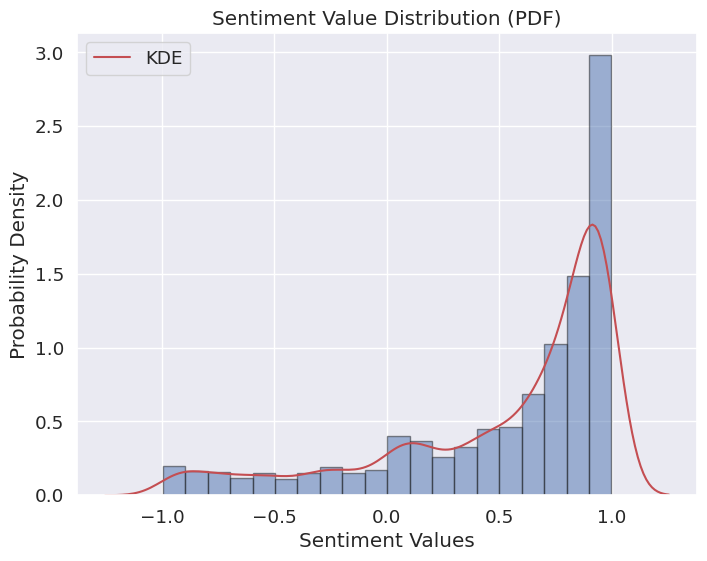

In [ ]:
sentiment_values = rel_df['finvader']

# Create a PDF plot
plt.figure(figsize=(8, 6))  # Set the figure size
plt.hist(sentiment_values, bins=20, density=True, alpha=0.5, color='b', edgecolor='k')  # Histogram
sns.kdeplot(sentiment_values, color='r', label='KDE')  # Kernel Density Estimate (KDE) plot
plt.xlabel('Sentiment Values')
plt.ylabel('Probability Density')
plt.title('Sentiment Value Distribution (PDF)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd

# Assuming you have a DataFrame named 'rel_df' with a 'compound' column
sentiment_values = rel_df['finvader']

# Define the custom bin edges
bin_edges = [-1, -0.5, 0, 0.5, 1]

# Use pandas.cut to categorize the values into the custom bins
binned_data = pd.cut(sentiment_values, bins=bin_edges, right=False)

# Calculate the frequency in each custom bin
bin_counts = binned_data.value_counts(sort=False)

# Create a DataFrame to display the frequency in each custom bin
bin_data = pd.DataFrame({
    'Interval': bin_edges[:-1],
    'Frequency': bin_counts
})

# Rename the intervals to match your desired format
bin_data['Interval'] = [f'[{bin_edges[i]},{bin_edges[i+1]})' for i in range(len(bin_edges) - 1)]

# Display the data for the custom class intervals
print(bin_data)


               Interval  Frequency
[-1.0, -0.5)  [-1,-0.5)        690
[-0.5, 0.0)    [-0.5,0)        676
[0.0, 0.5)      [0,0.5)       1586
[0.5, 1.0)      [0.5,1)       5789


In [ ]:
import pandas as pd

# Assuming you have a DataFrame named 'rel_df' with a 'compound' column
sentiment_values = rel_df['compound']

# Define the custom bin edges
bin_edges = [-1, -0.5, 0, 0.5, 1]

# Use pandas.cut to categorize the values into the custom bins
binned_data = pd.cut(sentiment_values, bins=bin_edges, right=False)

# Calculate the frequency in each custom bin
bin_counts = binned_data.value_counts(sort=False)

# Create a DataFrame to display the frequency in each custom bin
bin_data = pd.DataFrame({
    'Interval': bin_edges[:-1],
    'Frequency': bin_counts
})

# Rename the intervals to match your desired format
bin_data['Interval'] = [f'[{bin_edges[i]},{bin_edges[i+1]})' for i in range(len(bin_edges) - 1)]

# Display the data for the custom class intervals
print(bin_data)


               Interval  Frequency
[-1.0, -0.5)  [-1,-0.5)        206
[-0.5, 0.0)    [-0.5,0)       1291
[0.0, 0.5)      [0,0.5)       3187
[0.5, 1.0)      [0.5,1)       2806


In [ ]:
import pandas as pd

# Assuming you have a DataFrame named 'rel_df' with a 'compound' column
sentiment_values = rel_df['NetSentiment']

# Define the custom bin edges
bin_edges = [-1, -0.5, 0, 0.5, 1]

# Use pandas.cut to categorize the values into the custom bins
binned_data = pd.cut(sentiment_values, bins=bin_edges, right=False)

# Calculate the frequency in each custom bin
bin_counts = binned_data.value_counts(sort=False)

# Create a DataFrame to display the frequency in each custom bin
bin_data = pd.DataFrame({
    'Interval': bin_edges[:-1],
    'Frequency': bin_counts
})

# Rename the intervals to match your desired format
bin_data['Interval'] = [f'[{bin_edges[i]},{bin_edges[i+1]})' for i in range(len(bin_edges) - 1)]

# Display the data for the custom class intervals
print(bin_data)


               Interval  Frequency
[-1.0, -0.5)  [-1,-0.5)       1824
[-0.5, 0.0)    [-0.5,0)       2531
[0.0, 0.5)      [0,0.5)       2439
[0.5, 1.0)      [0.5,1)       1068


In [ ]:
import numpy as np

# Assuming you have a DataFrame named 'rel_df' with a 'sentiment' column

# Define the custom bin edges
bin_edges = [-1.0, -0.5, 0.0, 0.5, 1.0]

# Use numpy.digitize to assign classes based on the specified range intervals
rel_df['Sentiment_Label'] = np.digitize(rel_df['compound'], bin_edges, right=True)

# Map the bin indices to your desired labels
label_mapping = {
    1: 'label 1',
    2: 'label 2',
    3: 'label 3',
    4: 'label 4',
}

rel_df['Sentiment_Label'] = rel_df['Sentiment_Label'].map(label_mapping)


In [ ]:
import numpy as np

# Assuming you have a DataFrame named 'rel_df' with a 'sentiment' column

# Define the custom bin edges
bin_edges = [-1.0, -0.5, 0.0, 0.5, 1.0]

# Use numpy.digitize to assign classes based on the specified range intervals
rel_df['Sentiment_Label_LM'] = np.digitize(rel_df['NetSentiment'], bin_edges, right=True)

# Map the bin indices to your desired labels
label_mapping = {
    1: 'label 1',
    2: 'label 2',
    3: 'label 3',
    4: 'label 4',
}

rel_df['Sentiment_Label_LM'] = rel_df['Sentiment_Label_LM'].map(label_mapping)


In [ ]:
import pandas as pd

# Assuming you have a DataFrame named 'rel_df' with 'Sentiment_Label' and 'Sentiment_Label_LM' columns

# Calculate agreement count
agreement_count = (rel_df['Sentiment_Label'] == rel_df['Sentiment_Label_LM']).sum()

# Calculate disagreement count
disagreement_count = (rel_df['Sentiment_Label'] != rel_df['Sentiment_Label_LM']).sum()

print(f"Agreement Count: {agreement_count}")
print(f"Disagreement Count: {disagreement_count}")


Agreement Count: 2807
Disagreement Count: 5934


In [ ]:
rel_df.to_csv("1.csv")

In [ ]:
import pandas as pd
from textblob import TextBlob

# Assuming you already have a DataFrame named rel_df with a 'content' column

# Define a function to get the sentiment label and score using TextBlob
def get_sentiment(text):
    analysis = TextBlob(text)
    sentiment_score = analysis.sentiment.polarity
    # Define your sentiment labeling logic here
    if sentiment_score > 0:
        sentiment_label = 'Positive'
    elif sentiment_score < 0:
        sentiment_label = 'Negative'
    else:
        sentiment_label = 'Neutral'

    return sentiment_label, sentiment_score

# Apply the sentiment analysis function to the 'content' column and create new 'sentiment_label' and 'sentiment_score' columns
rel_df['Textblob_label'], rel_df['Textblob_score'] = zip(*rel_df['new_content'].apply(get_sentiment))



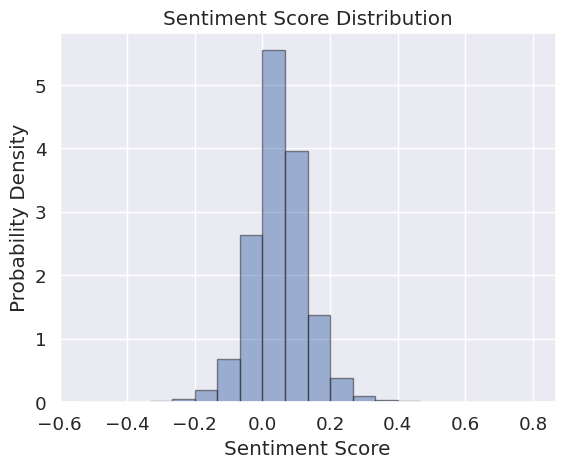

In [ ]:
plt.hist(rel_df['Textblob_score'], bins=20, alpha=0.5, color='b', edgecolor='k', density=True)
plt.xlabel('Sentiment Score')
plt.ylabel('Probability Density')
plt.title('Sentiment Score Distribution')
plt.grid(True)
plt.show()

In [ ]:
!pip install text_normalizer


  Preparing metadata (setup.py) ... done
  Created wheel for text_normalizer: filename=text_normalizer-0.1.3-cp310-cp310-linux_x86_64.whl size=247096 sha256=3be9d89746242e511dc3fc2e092ccb88c093644bd9a5545b6199f96d99c82ddd
  Stored in directory: /root/.cache/pip/wheels/fa/9f/80/4a4e7d2d6f6fc35b19993353c2c8f1f7ac48ac29c826d2e676
Successfully built text_normalizer


In [ ]:
import nltk
from nltk.corpus import sentiwordnet as swn
import pandas as pd

# Download SentiWordNet data if not already downloaded
nltk.download('sentiwordnet')
nltk.download('punkt')
nltk.download('wordnet')
# Tokenize the text using NLTK
#rel_df['new_content'] = rel_df['new_content'].apply(nltk.word_tokenize)

# Define a function to calculate sentiment scores and labels for a word
def get_sentiment(word):
    synsets = list(swn.senti_synsets(word))
    if synsets:
        # Assuming the first synset is the most common sense of the word
        sentiment = synsets[0]
        pos_score = sentiment.pos_score()
        neg_score = sentiment.neg_score()
        obj_score = sentiment.obj_score()
        if pos_score > neg_score:
            label = 'positive'
        elif neg_score > pos_score:
            label = 'negative'
        else:
            label = 'neutral'
        return pos_score, neg_score, obj_score, label
    else:
        return 0.0, 0.0, 1.0, 'neutral'  # Default to neutral

# Define a function to calculate sentiment scores and labels for a list of words
def get_sentiments(words):
    scores_and_labels = [get_sentiment(word) for word in words]
    pos_scores, neg_scores, obj_scores, labels = zip(*scores_and_labels)
    return pos_scores, neg_scores, obj_scores, labels

# Apply the sentiment analysis functions to the 'new_content' column
rel_df[['positive_score_SN', 'negative_score_SN', 'neutral_score_SN', 'sentiment_label_SN']] = rel_df['new_content'].apply(lambda x: get_sentiments(x)).apply(pd.Series)

# The 'positive_score', 'negative_score', 'neutral_score', and 'sentiment_label' columns will contain scores and labels for each sentiment type individually


[nltk_data] Downloading package sentiwordnet to /root/nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
rel_df.to_csv("1.csv")